In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Charger les données
prices = pd.read_csv(r'C:\Users\damia\Downloads\nyse dataset\prices.csv')
prices_split_adjusted = pd.read_csv(r'C:\Users\damia\Downloads\nyse dataset\prices-split-adjusted.csv')
securities = pd.read_csv(r'C:\Users\damia\Downloads\nyse dataset\securities.csv')
fundamentals = pd.read_csv(r'C:\Users\damia\Downloads\nyse dataset\fundamentals.csv')

In [6]:
# Afficher les premières lignes du fichier prices
print(prices.head())
# Afficher les premières lignes du fichier prices_split_adjusted
print(prices_split_adjusted.head())
# Afficher les premières lignes du fichier fundamentals
print(fundamentals.head())
# Afficher les premières lignes du fichier securities
print(securities.head())

                  date symbol        open       close         low        high  \
0  2016-01-05 00:00:00   WLTW  123.430000  125.839996  122.309998  126.250000   
1  2016-01-06 00:00:00   WLTW  125.239998  119.980003  119.940002  125.540001   
2  2016-01-07 00:00:00   WLTW  116.379997  114.949997  114.930000  119.739998   
3  2016-01-08 00:00:00   WLTW  115.480003  116.620003  113.500000  117.440002   
4  2016-01-11 00:00:00   WLTW  117.010002  114.970001  114.089996  117.330002   

      volume  
0  2163600.0  
1  2386400.0  
2  2489500.0  
3  2006300.0  
4  1408600.0  
         date symbol        open       close         low        high  \
0  2016-01-05   WLTW  123.430000  125.839996  122.309998  126.250000   
1  2016-01-06   WLTW  125.239998  119.980003  119.940002  125.540001   
2  2016-01-07   WLTW  116.379997  114.949997  114.930000  119.739998   
3  2016-01-08   WLTW  115.480003  116.620003  113.500000  117.440002   
4  2016-01-11   WLTW  117.010002  114.970001  114.089996  117.3

In [7]:
# Vérifier les valeurs manquantes pour les 4 fichiers
print("Missing values in Prices:")
print(prices.isnull().sum())

print("Missing values in Prices_split_adjusted:")
print(prices_split_adjusted.isnull().sum())

print("\nMissing values in Securities:")
print(securities.isnull().sum())

print("\nMissing values in Fundamentals:")
print(fundamentals.isnull().sum())


Missing values in Prices:
date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64
Missing values in Prices_split_adjusted:
date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

Missing values in Securities:
Ticker symbol                0
Security                     0
SEC filings                  0
GICS Sector                  0
GICS Sub Industry            0
Address of Headquarters      0
Date first added           198
CIK                          0
dtype: int64

Missing values in Fundamentals:
Unnamed: 0                        0
Ticker Symbol                     0
Period Ending                     0
Accounts Payable                  0
Accounts Receivable               0
                               ... 
Total Revenue                     0
Treasury Stock                    0
For Year                        173
Earnings Per Share              219
Estimated Shares Outstanding    219
Length: 79, dtype:

In [8]:
securities = securities.drop(columns=['Date first added'])


In [9]:
fundamentals = fundamentals.drop(columns=['For Year', 'Earnings Per Share', 'Estimated Shares Outstanding'])


In [7]:
# Afficher les statistiques descriptives
print("Statistics for Prices:")
print(prices.describe())

print("Statistics for Prices_split_adjusted:")
print(prices_split_adjusted.describe())

print("\nStatistics for Securities:")
print(securities.describe())

print("\nStatistics for Fundamentals:")
print(fundamentals.describe())



Statistics for Prices:
                open          close            low           high  \
count  851264.000000  851264.000000  851264.000000  851264.000000   
mean       70.836986      70.857109      70.118414      71.543476   
std        83.695876      83.689686      82.877294      84.465504   
min         0.850000       0.860000       0.830000       0.880000   
25%        33.840000      33.849998      33.480000      34.189999   
50%        52.770000      52.799999      52.230000      53.310001   
75%        79.879997      79.889999      79.110001      80.610001   
max      1584.439941    1578.130005    1549.939941    1600.930054   

             volume  
count  8.512640e+05  
mean   5.415113e+06  
std    1.249468e+07  
min    0.000000e+00  
25%    1.221500e+06  
50%    2.476250e+06  
75%    5.222500e+06  
max    8.596434e+08  
Statistics for Prices_split_adjusted:
                open          close            low           high  \
count  851264.000000  851264.000000  851264.000000

C:\Users\damia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


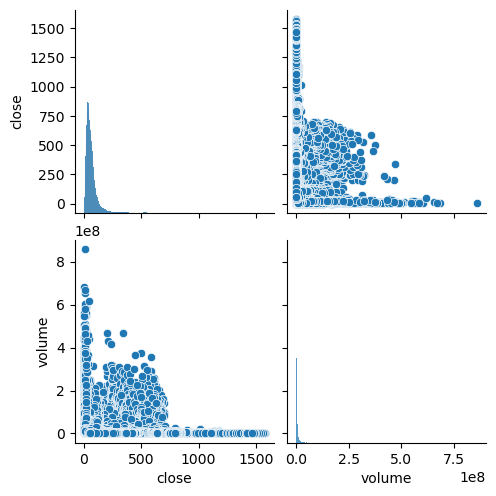

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(prices[['symbol', 'close', 'volume']])
plt.show()


In [ ]:
from numpy import vstack, sqrt
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from torch.utils.data import Dataset, DataLoader, random_split
from torch import Tensor
from torch.nn import Linear, ReLU, Module
from torch.optim import SGD
from torch.nn import MSELoss
from torch.nn.init import xavier_uniform_
from tqdm import tqdm
import torch
import matplotlib.pyplot as plt

# Définir la classe PricesDataset pour votre ensemble de données NYSE
class PricesDataset(Dataset):
    def __init__(self, path):
        df = read_csv(path)
        # Sélectionnez les colonnes nécessaires pour votre modèle
        self.X = df[['open', 'low', 'high', 'volume']].values.astype('float32')
        self.y = df['close'].values.astype('float32')
        self.y = self.y.reshape((len(self.y), 1))

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]

    def get_splits(self, n_test=0.33):
        test_size = round(n_test * len(self.X))
        train_size = len(self.X) - test_size
        return random_split(self, [train_size, test_size])

# Définir la classe MLP pour votre ensemble de données NYSE avec les nouvelles caractéristiques
class NYSEMLP(Module):
    def __init__(self, n_inputs):
        super(NYSEMLP, self).__init__()
        self.hidden1 = Linear(n_inputs, 10)
        xavier_uniform_(self.hidden1.weight)
        self.act1 = ReLU()
        self.hidden2 = Linear(10, 8)
        xavier_uniform_(self.hidden2.weight)
        self.act2 = ReLU()
        self.hidden3 = Linear(8, 1)
        xavier_uniform_(self.hidden3.weight)

    def forward(self, X):
        X = self.hidden1(X)
        X = self.act1(X)
        X = self.hidden2(X)
        X = self.act2(X)
        X = self.hidden3(X)
        return X

# Préparer les données
def prepare_data(path):
    dataset = PricesDataset(path)
    train, test = dataset.get_splits()
    train_dl = DataLoader(train, batch_size=32, shuffle=True)
    test_dl = DataLoader(test, batch_size=1024, shuffle=False)
    return train_dl, test_dl

# Entraîner le modèle
def train_model(train_dl, model):
    size = len(train_dl.dataset)
    criterion = MSELoss()
    optimizer = SGD(model.parameters(), lr=0.00001, momentum=0.9)  # Réduction du taux d'apprentissage

    train_losses = []
    test_losses = []

    for epoch in tqdm(range(10), desc='Training Epochs'):
        print(f"Epoch {epoch + 1}\n-------------------------------")
        for batch, (inputs, targets) in enumerate(train_dl):
            optimizer.zero_grad()
            yhat = model(inputs)
            
            # Vérifiez si les prédictions contiennent des valeurs nan ou inf
            if torch.isnan(yhat).any() or torch.isinf(yhat).any():
                continue
            
            loss = criterion(yhat, targets)
            
            # Calculer les gradients
            loss.backward()
            
            # Clippez l'ensemble des gradients pour éviter les explosions de gradient
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            
            optimizer.step()

            loss, current = loss.item(), batch * len(inputs)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
        
        # Ajouter la perte d'entraînement à la liste
        train_losses.append(loss)

        # Évaluer le modèle sur l'ensemble de test
        test_loss = evaluate_model(test_dl, model)
        # Ajouter la perte de test à la liste
        test_losses.append(test_loss)

    return train_losses, test_losses

# Évaluer le modèle
def evaluate_model(test_dl, model):
    predictions, actuals = list(), list()
    for i, (inputs, targets) in enumerate(test_dl):
        yhat = model(inputs).detach().numpy()
        actual = targets.numpy().reshape((len(targets), 1))
        predictions.append(yhat)
        actuals.append(actual)

    predictions, actuals = vstack(predictions), vstack(actuals)
    mse = mean_squared_error(actuals, predictions)
    return mse

# Faire une prédiction pour une nouvelle ligne de données
def predict(row, model):
    row = Tensor([row])
    yhat = model(row).detach().numpy()
    return yhat

# Préparer les données
train_dl, test_dl = prepare_data(r'C:\Users\damia\Downloads\nyse dataset\prices.csv')
print(len(train_dl.dataset), len(test_dl.dataset))

# Définir le modèle
model = NYSEMLP(4)  # Le nombre d'entrées dépend du nombre de caractéristiques sélectionnées

# Entraîner le modèle
train_losses, test_losses = train_model(train_dl, model)

# Évaluer le modèle
mse = evaluate_model(test_dl, model)
print('MSE: %.3f, RMSE: %.3f' % (mse, sqrt(mse)))

# Faire une prédiction pour une nouvelle ligne de données
new_data_row = [123.45, 120.00, 125.50, 2500000]  # Ajoutez les valeurs appropriées pour vos caractéristiques
prediction = predict(new_data_row, model)
print('Predicted: %.3f' % prediction)

# Visualiser les graphiques
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.show()


570347 280917


Training Epochs:   0%|                                                                          | 0/10 [00:00<?, ?it/s]

Epoch 1
-------------------------------
loss: 7909778391040.000000  [    0/570347]
loss: 9588809138176.000000  [   32/570347]
loss: 957055565824.000000  [   64/570347]
loss: 85836766904320.000000  [   96/570347]
loss: 9561666748416.000000  [  128/570347]
loss: 5891390701568.000000  [  160/570347]
loss: 122830259748864.000000  [  192/570347]
loss: 3874570633216.000000  [  224/570347]
loss: 5230973419520.000000  [  256/570347]
loss: 5610124869632.000000  [  288/570347]
loss: 23039431409664.000000  [  320/570347]
loss: 2522352451584.000000  [  352/570347]
loss: 6450069372928.000000  [  384/570347]
loss: 4718532755456.000000  [  416/570347]
loss: 1489104142336.000000  [  448/570347]
loss: 6898140053504.000000  [  480/570347]
loss: 16592816570368.000000  [  512/570347]
loss: 839121698816.000000  [  544/570347]
loss: 2038425976832.000000  [  576/570347]
loss: 6738802638848.000000  [  608/570347]
loss: 8843578834944.000000  [  640/570347]
loss: 1441525006336.000000  [  672/570347]
loss: 14673

loss: 3095669768192.000000  [ 6624/570347]
loss: 3182501822464.000000  [ 6656/570347]
loss: 949004533760.000000  [ 6688/570347]
loss: 41657886048256.000000  [ 6720/570347]
loss: 2824039825408.000000  [ 6752/570347]
loss: 569407242240.000000  [ 6784/570347]
loss: 9150404755456.000000  [ 6816/570347]
loss: 2989095387136.000000  [ 6848/570347]
loss: 2016544030720.000000  [ 6880/570347]
loss: 1227822202880.000000  [ 6912/570347]
loss: 3946781343744.000000  [ 6944/570347]
loss: 1201214980096.000000  [ 6976/570347]
loss: 90805339422720.000000  [ 7008/570347]
loss: 5541374984192.000000  [ 7040/570347]
loss: 4626331467776.000000  [ 7072/570347]
loss: 2708330512384.000000  [ 7104/570347]
loss: 1066544726016.000000  [ 7136/570347]
loss: 5101784662016.000000  [ 7168/570347]
loss: 9988595515392.000000  [ 7200/570347]
loss: 4177534124032.000000  [ 7232/570347]
loss: 3466798301184.000000  [ 7264/570347]
loss: 2945465188352.000000  [ 7296/570347]
loss: 4696000954368.000000  [ 7328/570347]
loss: 52432

loss: 40910561738752.000000  [15296/570347]
loss: 28739702358016.000000  [15328/570347]
loss: 1017165561987072.000000  [15360/570347]
loss: 6884511711232.000000  [15392/570347]
loss: 3774478548992.000000  [15424/570347]
loss: 5166821539840.000000  [15456/570347]
loss: 1088314540032.000000  [15488/570347]
loss: 20181069856768.000000  [15520/570347]
loss: 2454288596992.000000  [15552/570347]
loss: 4229958205440.000000  [15584/570347]
loss: 4570666762240.000000  [15616/570347]
loss: 2957631291392.000000  [15648/570347]
loss: 72166464815104.000000  [15680/570347]
loss: 1787518779392.000000  [15712/570347]
loss: 1828554014720.000000  [15744/570347]
loss: 6573529759744.000000  [15776/570347]
loss: 4371745603584.000000  [15808/570347]
loss: 5570365489152.000000  [15840/570347]
loss: 662073901056.000000  [15872/570347]
loss: 16064413958144.000000  [15904/570347]
loss: 5721118736384.000000  [15936/570347]
loss: 1390049886208.000000  [15968/570347]
loss: 11606189670400.000000  [16000/570347]
los

loss: 3492460625920.000000  [22464/570347]
loss: 6512821927936.000000  [22496/570347]
loss: 2330887454720.000000  [22528/570347]
loss: 1515789484032.000000  [22560/570347]
loss: 3607225696256.000000  [22592/570347]
loss: 33581275545600.000000  [22624/570347]
loss: 5775953494016.000000  [22656/570347]
loss: 10847035326464.000000  [22688/570347]
loss: 1257619062784.000000  [22720/570347]
loss: 5555604160512.000000  [22752/570347]
loss: 3550485938176.000000  [22784/570347]
loss: 23290124959744.000000  [22816/570347]
loss: 5629983850496.000000  [22848/570347]
loss: 579665723392.000000  [22880/570347]
loss: 1691481538560.000000  [22912/570347]
loss: 1458235113472.000000  [22944/570347]
loss: 4180834254848.000000  [22976/570347]
loss: 14644054851584.000000  [23008/570347]
loss: 3886602780672.000000  [23040/570347]
loss: 2780326264832.000000  [23072/570347]
loss: 1008922132480.000000  [23104/570347]
loss: 6819785211904.000000  [23136/570347]
loss: 1840715137024.000000  [23168/570347]
loss: 43

loss: 363001970688.000000  [30816/570347]
loss: 3298221096960.000000  [30848/570347]
loss: 717950418944.000000  [30880/570347]
loss: 27933750067200.000000  [30912/570347]
loss: 578111668224.000000  [30944/570347]
loss: 4226680619008.000000  [30976/570347]
loss: 2567551320064.000000  [31008/570347]
loss: 3697591975936.000000  [31040/570347]
loss: 14571725127680.000000  [31072/570347]
loss: 18008527339520.000000  [31104/570347]
loss: 1678932967424.000000  [31136/570347]
loss: 11137749876736.000000  [31168/570347]
loss: 2689076822016.000000  [31200/570347]
loss: 1602501738496.000000  [31232/570347]
loss: 1727665799168.000000  [31264/570347]
loss: 2567984381952.000000  [31296/570347]
loss: 107019151343616.000000  [31328/570347]
loss: 1352956248064.000000  [31360/570347]
loss: 904111652864.000000  [31392/570347]
loss: 555882184704.000000  [31424/570347]
loss: 700124889088.000000  [31456/570347]
loss: 10048800555008.000000  [31488/570347]
loss: 955465924608.000000  [31520/570347]
loss: 11096

loss: 961327202304.000000  [37824/570347]
loss: 3319585046528.000000  [37856/570347]
loss: 8932879761408.000000  [37888/570347]
loss: 2551990190080.000000  [37920/570347]
loss: 722546262016.000000  [37952/570347]
loss: 1337946669056.000000  [37984/570347]
loss: 1331665305600.000000  [38016/570347]
loss: 2383436578816.000000  [38048/570347]
loss: 4812187369472.000000  [38080/570347]
loss: 1035198595072.000000  [38112/570347]
loss: 880378052608.000000  [38144/570347]
loss: 1026194800640.000000  [38176/570347]
loss: 170498977693696.000000  [38208/570347]
loss: 4687923249152.000000  [38240/570347]
loss: 14310286819328.000000  [38272/570347]
loss: 889244286976.000000  [38304/570347]
loss: 816640032768.000000  [38336/570347]
loss: 5404853534720.000000  [38368/570347]
loss: 940555108352.000000  [38400/570347]
loss: 1824424722432.000000  [38432/570347]
loss: 593253826560.000000  [38464/570347]
loss: 1318428213248.000000  [38496/570347]
loss: 1133804388352.000000  [38528/570347]
loss: 128167627

loss: 2981790744576.000000  [44352/570347]
loss: 6741686747136.000000  [44384/570347]
loss: 1049177489408.000000  [44416/570347]
loss: 1661347037184.000000  [44448/570347]
loss: 477202874368.000000  [44480/570347]
loss: 16140693667840.000000  [44512/570347]
loss: 1851643789312.000000  [44544/570347]
loss: 2033684316160.000000  [44576/570347]
loss: 1209026478080.000000  [44608/570347]
loss: 644264230912.000000  [44640/570347]
loss: 10258674089984.000000  [44672/570347]
loss: 15894749118464.000000  [44704/570347]
loss: 5468471689216.000000  [44736/570347]
loss: 759783686144.000000  [44768/570347]
loss: 296642871296.000000  [44800/570347]
loss: 7697004494848.000000  [44832/570347]
loss: 948683538432.000000  [44864/570347]
loss: 468432748544.000000  [44896/570347]
loss: 1112189435904.000000  [44928/570347]
loss: 1206777151488.000000  [44960/570347]
loss: 12896587218944.000000  [44992/570347]
loss: 1289982181376.000000  [45024/570347]
loss: 14884672634880.000000  [45056/570347]
loss: 965006

loss: 382399184896.000000  [53216/570347]
loss: 858592641024.000000  [53248/570347]
loss: 503807770624.000000  [53280/570347]
loss: 1068255543296.000000  [53312/570347]
loss: 1343665864704.000000  [53344/570347]
loss: 2014721867776.000000  [53376/570347]
loss: 3139642064896.000000  [53408/570347]
loss: 366779170816.000000  [53440/570347]
loss: 1117842571264.000000  [53472/570347]
loss: 737586053120.000000  [53504/570347]
loss: 876967231488.000000  [53536/570347]
loss: 481969078272.000000  [53568/570347]
loss: 11493844189184.000000  [53600/570347]
loss: 1143975313408.000000  [53632/570347]
loss: 6919229538304.000000  [53664/570347]
loss: 1387991269376.000000  [53696/570347]
loss: 2886371115008.000000  [53728/570347]
loss: 526933688320.000000  [53760/570347]
loss: 6057558016000.000000  [53792/570347]
loss: 1446079365120.000000  [53824/570347]
loss: 13509118132224.000000  [53856/570347]
loss: 1968377298944.000000  [53888/570347]
loss: 419710566400.000000  [53920/570347]
loss: 278245330124

loss: 4127724142592.000000  [61920/570347]
loss: 1018099793920.000000  [61952/570347]
loss: 2209016184832.000000  [61984/570347]
loss: 564629995520.000000  [62016/570347]
loss: 679685259264.000000  [62048/570347]
loss: 566742876160.000000  [62080/570347]
loss: 1034436214784.000000  [62112/570347]
loss: 530316460032.000000  [62144/570347]
loss: 2343958216704.000000  [62176/570347]
loss: 1194117562368.000000  [62208/570347]
loss: 8108163727360.000000  [62240/570347]
loss: 870866616320.000000  [62272/570347]
loss: 469287436288.000000  [62304/570347]
loss: 254287364096.000000  [62336/570347]
loss: 7473119363072.000000  [62368/570347]
loss: 171732860928.000000  [62400/570347]
loss: 391097614336.000000  [62432/570347]
loss: 5534933057536.000000  [62464/570347]
loss: 351519899648.000000  [62496/570347]
loss: 417487519744.000000  [62528/570347]
loss: 664976293888.000000  [62560/570347]
loss: 792041095168.000000  [62592/570347]
loss: 492218482688.000000  [62624/570347]
loss: 4137152937984.00000

loss: 924559278080.000000  [70336/570347]
loss: 710227525632.000000  [70368/570347]
loss: 365635108864.000000  [70400/570347]
loss: 949946548224.000000  [70432/570347]
loss: 9097537650688.000000  [70464/570347]
loss: 897677524992.000000  [70496/570347]
loss: 129163550720.000000  [70528/570347]
loss: 105724502016.000000  [70560/570347]
loss: 779969363968.000000  [70592/570347]
loss: 3457798111232.000000  [70624/570347]
loss: 839943979008.000000  [70656/570347]
loss: 1130796154880.000000  [70688/570347]
loss: 162838282240.000000  [70720/570347]
loss: 336125919232.000000  [70752/570347]
loss: 239031156736.000000  [70784/570347]
loss: 3703443030016.000000  [70816/570347]
loss: 245411299328.000000  [70848/570347]
loss: 717487996928.000000  [70880/570347]
loss: 298520182784.000000  [70912/570347]
loss: 345086099456.000000  [70944/570347]
loss: 329081356288.000000  [70976/570347]
loss: 522189799424.000000  [71008/570347]
loss: 831795953664.000000  [71040/570347]
loss: 179017875456.000000  [71

loss: 74250567680.000000  [79424/570347]
loss: 80418127872.000000  [79456/570347]
loss: 345245712384.000000  [79488/570347]
loss: 296422998016.000000  [79520/570347]
loss: 397761708032.000000  [79552/570347]
loss: 63167246336.000000  [79584/570347]
loss: 651408441344.000000  [79616/570347]
loss: 78059716608.000000  [79648/570347]
loss: 425402892288.000000  [79680/570347]
loss: 433824235520.000000  [79712/570347]
loss: 433421451264.000000  [79744/570347]
loss: 146786713600.000000  [79776/570347]
loss: 620458278912.000000  [79808/570347]
loss: 193762230272.000000  [79840/570347]
loss: 833919975424.000000  [79872/570347]
loss: 639316328448.000000  [79904/570347]
loss: 510362943488.000000  [79936/570347]
loss: 1139155795968.000000  [79968/570347]
loss: 277301428224.000000  [80000/570347]
loss: 136181735424.000000  [80032/570347]
loss: 335942189056.000000  [80064/570347]
loss: 97271660544.000000  [80096/570347]
loss: 312531484672.000000  [80128/570347]
loss: 139547738112.000000  [80160/5703

loss: 497325735936.000000  [85856/570347]
loss: 1055949127680.000000  [85888/570347]
loss: 164437524480.000000  [85920/570347]
loss: 323121676288.000000  [85952/570347]
loss: 205871841280.000000  [85984/570347]
loss: 264785395712.000000  [86016/570347]
loss: 952043503616.000000  [86048/570347]
loss: 193306066944.000000  [86080/570347]
loss: 404930265088.000000  [86112/570347]
loss: 420231184384.000000  [86144/570347]
loss: 218884571136.000000  [86176/570347]
loss: 248334811136.000000  [86208/570347]
loss: 5587794395136.000000  [86240/570347]
loss: 186167296000.000000  [86272/570347]
loss: 217922027520.000000  [86304/570347]
loss: 213492400128.000000  [86336/570347]
loss: 803775184896.000000  [86368/570347]
loss: 46540939264.000000  [86400/570347]
loss: 83890544640.000000  [86432/570347]
loss: 292204380160.000000  [86464/570347]
loss: 392501624832.000000  [86496/570347]
loss: 3036737961984.000000  [86528/570347]
loss: 211498647552.000000  [86560/570347]
loss: 328593735680.000000  [86592

loss: 49959993344.000000  [93472/570347]
loss: 1463239704576.000000  [93504/570347]
loss: 278343680000.000000  [93536/570347]
loss: 148596719616.000000  [93568/570347]
loss: 252194455552.000000  [93600/570347]
loss: 159756763136.000000  [93632/570347]
loss: 185450905600.000000  [93664/570347]
loss: 91324637184.000000  [93696/570347]
loss: 241572347904.000000  [93728/570347]
loss: 57944260608.000000  [93760/570347]
loss: 1876640530432.000000  [93792/570347]
loss: 3098134708224.000000  [93824/570347]
loss: 1438058545152.000000  [93856/570347]
loss: 34826575872.000000  [93888/570347]
loss: 1296496197632.000000  [93920/570347]
loss: 39445200896.000000  [93952/570347]
loss: 141813530624.000000  [93984/570347]
loss: 3027060654080.000000  [94016/570347]
loss: 221151199232.000000  [94048/570347]
loss: 17556430848.000000  [94080/570347]
loss: 117216509952.000000  [94112/570347]
loss: 245711601664.000000  [94144/570347]
loss: 393927196672.000000  [94176/570347]
loss: 171305467904.000000  [94208/

loss: 31115419648.000000  [100896/570347]
loss: 44715343872.000000  [100928/570347]
loss: 62441590784.000000  [100960/570347]
loss: 62777417728.000000  [100992/570347]
loss: 129007706112.000000  [101024/570347]
loss: 78782259200.000000  [101056/570347]
loss: 50323017728.000000  [101088/570347]
loss: 15790348288.000000  [101120/570347]
loss: 381807394816.000000  [101152/570347]
loss: 7118470144.000000  [101184/570347]
loss: 12249772032.000000  [101216/570347]
loss: 19377555456.000000  [101248/570347]
loss: 985879805952.000000  [101280/570347]
loss: 106631020544.000000  [101312/570347]
loss: 135115161600.000000  [101344/570347]
loss: 41724243968.000000  [101376/570347]
loss: 68637630464.000000  [101408/570347]
loss: 12904419328.000000  [101440/570347]
loss: 61096574976.000000  [101472/570347]
loss: 1019669250048.000000  [101504/570347]
loss: 106076168192.000000  [101536/570347]
loss: 55412834304.000000  [101568/570347]
loss: 196734713856.000000  [101600/570347]
loss: 25938491392.000000  

loss: 13386288128.000000  [108864/570347]
loss: 13548792832.000000  [108896/570347]
loss: 8553830400.000000  [108928/570347]
loss: 69807390720.000000  [108960/570347]
loss: 137456353280.000000  [108992/570347]
loss: 30394644480.000000  [109024/570347]
loss: 200410710016.000000  [109056/570347]
loss: 64946266112.000000  [109088/570347]
loss: 6964434944.000000  [109120/570347]
loss: 7958034432.000000  [109152/570347]
loss: 115805495296.000000  [109184/570347]
loss: 19536211968.000000  [109216/570347]
loss: 6642862592.000000  [109248/570347]
loss: 54907981824.000000  [109280/570347]
loss: 37775097856.000000  [109312/570347]
loss: 13435641856.000000  [109344/570347]
loss: 29537562624.000000  [109376/570347]
loss: 18121019392.000000  [109408/570347]
loss: 32055799808.000000  [109440/570347]
loss: 3864157952.000000  [109472/570347]
loss: 8574712320.000000  [109504/570347]
loss: 258022178816.000000  [109536/570347]
loss: 12999391232.000000  [109568/570347]
loss: 35808587776.000000  [109600/57

loss: 2483404032.000000  [117280/570347]
loss: 26923307008.000000  [117312/570347]
loss: 4794022912.000000  [117344/570347]
loss: 4839679488.000000  [117376/570347]
loss: 14036066304.000000  [117408/570347]
loss: 24717578240.000000  [117440/570347]
loss: 16017242112.000000  [117472/570347]
loss: 2072691840.000000  [117504/570347]
loss: 3122040576.000000  [117536/570347]
loss: 120389869568.000000  [117568/570347]
loss: 12657126400.000000  [117600/570347]
loss: 4353996800.000000  [117632/570347]
loss: 20090875904.000000  [117664/570347]
loss: 109245612032.000000  [117696/570347]
loss: 2587783680.000000  [117728/570347]
loss: 7421736448.000000  [117760/570347]
loss: 12154823680.000000  [117792/570347]
loss: 6627657728.000000  [117824/570347]
loss: 29352224768.000000  [117856/570347]
loss: 12494464000.000000  [117888/570347]
loss: 5724163072.000000  [117920/570347]
loss: 17650296832.000000  [117952/570347]
loss: 6883741696.000000  [117984/570347]
loss: 2975664640.000000  [118016/570347]
lo

loss: 4701073.500000  [126720/570347]
loss: 10876708.000000  [126752/570347]
loss: 23279496.000000  [126784/570347]
loss: 9249189.000000  [126816/570347]
loss: 14250012.000000  [126848/570347]
loss: 15945249.000000  [126880/570347]
loss: 3193578.500000  [126912/570347]
loss: 5705721.500000  [126944/570347]
loss: 47579872.000000  [126976/570347]
loss: 1413658.375000  [127008/570347]
loss: 3070466.750000  [127040/570347]
loss: 949695.062500  [127072/570347]
loss: 2222685.500000  [127104/570347]
loss: 593433.625000  [127136/570347]
loss: 195688.500000  [127168/570347]
loss: 135366.671875  [127200/570347]
loss: 32545.660156  [127232/570347]
loss: 2558.577148  [127264/570347]
loss: 68763.515625  [127296/570347]
loss: 173635.937500  [127328/570347]
loss: 76122.382812  [127360/570347]
loss: 322237.656250  [127392/570347]
loss: 247415.515625  [127424/570347]
loss: 4716007.500000  [127456/570347]
loss: 449880.343750  [127488/570347]
loss: 212069.187500  [127520/570347]
loss: 6101822.500000  [12

loss: 261267.093750  [137152/570347]
loss: 7046.118652  [137184/570347]
loss: 38262.578125  [137216/570347]
loss: 14271.257812  [137248/570347]
loss: 16600.750000  [137280/570347]
loss: 17742.363281  [137312/570347]
loss: 32132.013672  [137344/570347]
loss: 14568.679688  [137376/570347]
loss: 66108.554688  [137408/570347]
loss: 37282.664062  [137440/570347]
loss: 6511.925293  [137472/570347]
loss: 116815.359375  [137504/570347]
loss: 68931.750000  [137536/570347]
loss: 8528.597656  [137568/570347]
loss: 14495.163086  [137600/570347]
loss: 12643.863281  [137632/570347]
loss: 18060.837891  [137664/570347]
loss: 18085.310547  [137696/570347]
loss: 4478.822754  [137728/570347]
loss: 4295.797363  [137760/570347]
loss: 23373.732422  [137792/570347]
loss: 195791.875000  [137824/570347]
loss: 26912.601562  [137856/570347]
loss: 111690.500000  [137888/570347]
loss: 29502.744141  [137920/570347]
loss: 13168.246094  [137952/570347]
loss: 18518.496094  [137984/570347]
loss: 18672.437500  [138016/5

loss: 35121.273438  [145696/570347]
loss: 12155.556641  [145728/570347]
loss: 38188.535156  [145760/570347]
loss: 4922.970215  [145792/570347]
loss: 4511.530762  [145824/570347]
loss: 8175.527832  [145856/570347]
loss: 12435.416016  [145888/570347]
loss: 34113.683594  [145920/570347]
loss: 5893.131348  [145952/570347]
loss: 8167.139160  [145984/570347]
loss: 22243.242188  [146016/570347]
loss: 79021.695312  [146048/570347]
loss: 27595.898438  [146080/570347]
loss: 60959.574219  [146112/570347]
loss: 8342.735352  [146144/570347]
loss: 5584.744141  [146176/570347]
loss: 31657.679688  [146208/570347]
loss: 7000.526367  [146240/570347]
loss: 9502.517578  [146272/570347]
loss: 6873.401855  [146304/570347]
loss: 16136.792969  [146336/570347]
loss: 35307.558594  [146368/570347]
loss: 20645.824219  [146400/570347]
loss: 11505.470703  [146432/570347]
loss: 11703.318359  [146464/570347]
loss: 14542.024414  [146496/570347]
loss: 14308.378906  [146528/570347]
loss: 44473.628906  [146560/570347]
lo

loss: 20073.300781  [156064/570347]
loss: 56129.058594  [156096/570347]
loss: 34058.765625  [156128/570347]
loss: 32563.322266  [156160/570347]
loss: 26290.824219  [156192/570347]
loss: 59290.105469  [156224/570347]
loss: 5490.689453  [156256/570347]
loss: 7204.037109  [156288/570347]
loss: 5299.117676  [156320/570347]
loss: 9240.425781  [156352/570347]
loss: 37037.078125  [156384/570347]
loss: 5844.300781  [156416/570347]
loss: 56909.808594  [156448/570347]
loss: 14107.636719  [156480/570347]
loss: 16701.824219  [156512/570347]
loss: 18968.357422  [156544/570347]
loss: 11505.619141  [156576/570347]
loss: 56482.460938  [156608/570347]
loss: 4661.742676  [156640/570347]
loss: 17351.931641  [156672/570347]
loss: 13483.445312  [156704/570347]
loss: 14163.416992  [156736/570347]
loss: 94814.171875  [156768/570347]
loss: 11956.398438  [156800/570347]
loss: 7507.631836  [156832/570347]
loss: 6765.625977  [156864/570347]
loss: 3997.830078  [156896/570347]
loss: 22848.480469  [156928/570347]
l

loss: 8339.653320  [166400/570347]
loss: 23763.814453  [166432/570347]
loss: 47259.996094  [166464/570347]
loss: 35974.964844  [166496/570347]
loss: 281200.781250  [166528/570347]
loss: 29461.140625  [166560/570347]
loss: 70510.476562  [166592/570347]
loss: 21392.537109  [166624/570347]
loss: 22299.109375  [166656/570347]
loss: 6365.760742  [166688/570347]
loss: 11032.325195  [166720/570347]
loss: 5719.108887  [166752/570347]
loss: 6077.104004  [166784/570347]
loss: 14055.117188  [166816/570347]
loss: 10700.529297  [166848/570347]
loss: 11880.991211  [166880/570347]
loss: 11108.134766  [166912/570347]
loss: 8209.348633  [166944/570347]
loss: 41501.039062  [166976/570347]
loss: 9026.528320  [167008/570347]
loss: 18601.052734  [167040/570347]
loss: 20467.806641  [167072/570347]
loss: 16842.820312  [167104/570347]
loss: 17241.269531  [167136/570347]
loss: 26889.851562  [167168/570347]
loss: 37805.871094  [167200/570347]
loss: 12401.588867  [167232/570347]
loss: 26879.082031  [167264/57034

loss: 6871.500488  [175136/570347]
loss: 48254.511719  [175168/570347]
loss: 17332.812500  [175200/570347]
loss: 28295.523438  [175232/570347]
loss: 11937.612305  [175264/570347]
loss: 15513.432617  [175296/570347]
loss: 35683.218750  [175328/570347]
loss: 107589.335938  [175360/570347]
loss: 11366.217773  [175392/570347]
loss: 34133.753906  [175424/570347]
loss: 23707.710938  [175456/570347]
loss: 18117.203125  [175488/570347]
loss: 18835.744141  [175520/570347]
loss: 10580.042969  [175552/570347]
loss: 45221.320312  [175584/570347]
loss: 42262.195312  [175616/570347]
loss: 4357.560547  [175648/570347]
loss: 26436.371094  [175680/570347]
loss: 16066.457031  [175712/570347]
loss: 15513.765625  [175744/570347]
loss: 28429.130859  [175776/570347]
loss: 7778.238770  [175808/570347]
loss: 15495.198242  [175840/570347]
loss: 5172.204102  [175872/570347]
loss: 3414.780518  [175904/570347]
loss: 6657.222656  [175936/570347]
loss: 3188.825195  [175968/570347]
loss: 44218.292969  [176000/570347

loss: 4080.341309  [185984/570347]
loss: 25536.464844  [186016/570347]
loss: 25569.882812  [186048/570347]
loss: 13882.116211  [186080/570347]
loss: 7334.311523  [186112/570347]
loss: 3265.803955  [186144/570347]
loss: 13179.316406  [186176/570347]
loss: 12031.332031  [186208/570347]
loss: 4702.570312  [186240/570347]
loss: 7213.072754  [186272/570347]
loss: 15646.988281  [186304/570347]
loss: 9216.081055  [186336/570347]
loss: 9121.826172  [186368/570347]
loss: 13606.106445  [186400/570347]
loss: 8565.359375  [186432/570347]
loss: 7767.665527  [186464/570347]
loss: 7609.734375  [186496/570347]
loss: 7953.913574  [186528/570347]
loss: 8474.370117  [186560/570347]
loss: 2382.626465  [186592/570347]
loss: 21153.005859  [186624/570347]
loss: 6861.803711  [186656/570347]
loss: 22251.771484  [186688/570347]
loss: 5839.885742  [186720/570347]
loss: 15578.241211  [186752/570347]
loss: 8273.640625  [186784/570347]
loss: 7194.072754  [186816/570347]
loss: 8601.330078  [186848/570347]
loss: 1120

loss: 9660.460938  [195552/570347]
loss: 24196.062500  [195584/570347]
loss: 8432.724609  [195616/570347]
loss: 4245.782227  [195648/570347]
loss: 19247.154297  [195680/570347]
loss: 5028.262207  [195712/570347]
loss: 27450.572266  [195744/570347]
loss: 16137.613281  [195776/570347]
loss: 8605.527344  [195808/570347]
loss: 67413.226562  [195840/570347]
loss: 4361.912598  [195872/570347]
loss: 26457.289062  [195904/570347]
loss: 60059.847656  [195936/570347]
loss: 28863.242188  [195968/570347]
loss: 16839.242188  [196000/570347]
loss: 12208.044922  [196032/570347]
loss: 18685.054688  [196064/570347]
loss: 22141.535156  [196096/570347]
loss: 9260.325195  [196128/570347]
loss: 41220.890625  [196160/570347]
loss: 31937.474609  [196192/570347]
loss: 31506.390625  [196224/570347]
loss: 15150.250977  [196256/570347]
loss: 47448.210938  [196288/570347]
loss: 39789.968750  [196320/570347]
loss: 10393.834961  [196352/570347]
loss: 258830.765625  [196384/570347]
loss: 139733.312500  [196416/57034

loss: 13962.258789  [203808/570347]
loss: 103040.781250  [203840/570347]
loss: 7085.284180  [203872/570347]
loss: 802853.375000  [203904/570347]
loss: 35654.375000  [203936/570347]
loss: 44631.296875  [203968/570347]
loss: 3916.625488  [204000/570347]
loss: 12708.612305  [204032/570347]
loss: 122629.609375  [204064/570347]
loss: 43181.585938  [204096/570347]
loss: 49682.281250  [204128/570347]
loss: 45043.421875  [204160/570347]
loss: 28009.488281  [204192/570347]
loss: 20875.537109  [204224/570347]
loss: 91775.804688  [204256/570347]
loss: 6959.943359  [204288/570347]
loss: 6537.905273  [204320/570347]
loss: 29967.615234  [204352/570347]
loss: 36608.726562  [204384/570347]
loss: 55020.015625  [204416/570347]
loss: 4593.743164  [204448/570347]
loss: 6000.246582  [204480/570347]
loss: 4919.038574  [204512/570347]
loss: 20675.589844  [204544/570347]
loss: 38131.492188  [204576/570347]
loss: 18436.097656  [204608/570347]
loss: 7665.808105  [204640/570347]
loss: 13484.748047  [204672/57034

loss: 8963.150391  [211584/570347]
loss: 5386.124023  [211616/570347]
loss: 5243.105469  [211648/570347]
loss: 22735.671875  [211680/570347]
loss: 27720.253906  [211712/570347]
loss: 9594.044922  [211744/570347]
loss: 14208.762695  [211776/570347]
loss: 20972.375000  [211808/570347]
loss: 34039.453125  [211840/570347]
loss: 16443.994141  [211872/570347]
loss: 39848.582031  [211904/570347]
loss: 10780.258789  [211936/570347]
loss: 6534.536133  [211968/570347]
loss: 42667.003906  [212000/570347]
loss: 37903.328125  [212032/570347]
loss: 20463.906250  [212064/570347]
loss: 37487.699219  [212096/570347]
loss: 53861.382812  [212128/570347]
loss: 82727.171875  [212160/570347]
loss: 555204.312500  [212192/570347]
loss: 188600.000000  [212224/570347]
loss: 36991.390625  [212256/570347]
loss: 10794.477539  [212288/570347]
loss: 2468.019531  [212320/570347]
loss: 7691.654785  [212352/570347]
loss: 19991.605469  [212384/570347]
loss: 27458.626953  [212416/570347]
loss: 104754.382812  [212448/5703

loss: 2016.006592  [219008/570347]
loss: 36620.312500  [219040/570347]
loss: 7386.757812  [219072/570347]
loss: 10288.126953  [219104/570347]
loss: 17934.269531  [219136/570347]
loss: 12088.557617  [219168/570347]
loss: 21181.234375  [219200/570347]
loss: 17996.630859  [219232/570347]
loss: 59705.863281  [219264/570347]
loss: 13380.163086  [219296/570347]
loss: 3450.638916  [219328/570347]
loss: 10471.474609  [219360/570347]
loss: 5835.631348  [219392/570347]
loss: 13952.271484  [219424/570347]
loss: 15567.946289  [219456/570347]
loss: 74469.187500  [219488/570347]
loss: 75729.671875  [219520/570347]
loss: 21623.054688  [219552/570347]
loss: 8900.149414  [219584/570347]
loss: 31175.230469  [219616/570347]
loss: 39272.253906  [219648/570347]
loss: 32303.783203  [219680/570347]
loss: 26892.191406  [219712/570347]
loss: 117693.359375  [219744/570347]
loss: 15099.467773  [219776/570347]
loss: 33654.824219  [219808/570347]
loss: 80474.820312  [219840/570347]
loss: 71472.250000  [219872/5703

loss: 11150.222656  [228128/570347]
loss: 22201.259766  [228160/570347]
loss: 18256.257812  [228192/570347]
loss: 42286.429688  [228224/570347]
loss: 162124.015625  [228256/570347]
loss: 30430.728516  [228288/570347]
loss: 65920.429688  [228320/570347]
loss: 12959.004883  [228352/570347]
loss: 6009.114746  [228384/570347]
loss: 46928.609375  [228416/570347]
loss: 58080.011719  [228448/570347]
loss: 10849.754883  [228480/570347]
loss: 26445.718750  [228512/570347]
loss: 8777.426758  [228544/570347]
loss: 11905.883789  [228576/570347]
loss: 36575.179688  [228608/570347]
loss: 11850.016602  [228640/570347]
loss: 3323.011475  [228672/570347]
loss: 5749.446289  [228704/570347]
loss: 11181.991211  [228736/570347]
loss: 5730.225098  [228768/570347]
loss: 8873.242188  [228800/570347]
loss: 18113.685547  [228832/570347]
loss: 18975.611328  [228864/570347]
loss: 4231.348145  [228896/570347]
loss: 7015.343750  [228928/570347]
loss: 5984.120117  [228960/570347]
loss: 8197.879883  [228992/570347]
l

loss: 5019.936035  [238304/570347]
loss: 4142.093262  [238336/570347]
loss: 2934.288086  [238368/570347]
loss: 10587.821289  [238400/570347]
loss: 18462.541016  [238432/570347]
loss: 8126.707031  [238464/570347]
loss: 8520.944336  [238496/570347]
loss: 8128.427734  [238528/570347]
loss: 19000.048828  [238560/570347]
loss: 7887.441895  [238592/570347]
loss: 5503.842285  [238624/570347]
loss: 14462.527344  [238656/570347]
loss: 10668.296875  [238688/570347]
loss: 12961.269531  [238720/570347]
loss: 9188.612305  [238752/570347]
loss: 4812.406738  [238784/570347]
loss: 17808.408203  [238816/570347]
loss: 4352.397461  [238848/570347]
loss: 45110.734375  [238880/570347]
loss: 8105.725586  [238912/570347]
loss: 19748.244141  [238944/570347]
loss: 4582.929199  [238976/570347]
loss: 15998.329102  [239008/570347]
loss: 6089.311523  [239040/570347]
loss: 51316.429688  [239072/570347]
loss: 4897.603027  [239104/570347]
loss: 5025.025879  [239136/570347]
loss: 21001.658203  [239168/570347]
loss: 59

loss: 30740.867188  [246272/570347]
loss: 6459.843262  [246304/570347]
loss: 9620.439453  [246336/570347]
loss: 16023.317383  [246368/570347]
loss: 15921.273438  [246400/570347]
loss: 5491.688477  [246432/570347]
loss: 7449.539062  [246464/570347]
loss: 21309.117188  [246496/570347]
loss: 20111.599609  [246528/570347]
loss: 15833.384766  [246560/570347]
loss: 17865.707031  [246592/570347]
loss: 6838.245117  [246624/570347]
loss: 40072.644531  [246656/570347]
loss: 46920.312500  [246688/570347]
loss: 11458.138672  [246720/570347]
loss: 14808.259766  [246752/570347]
loss: 17628.781250  [246784/570347]
loss: 5432.357910  [246816/570347]
loss: 5990.580566  [246848/570347]
loss: 14292.837891  [246880/570347]
loss: 10166.240234  [246912/570347]
loss: 8581.984375  [246944/570347]
loss: 5646.598633  [246976/570347]
loss: 9085.893555  [247008/570347]
loss: 18774.013672  [247040/570347]
loss: 4737.985840  [247072/570347]
loss: 10235.818359  [247104/570347]
loss: 4237.014648  [247136/570347]
loss

loss: 8360.057617  [256352/570347]
loss: 4084.512207  [256384/570347]
loss: 31415.593750  [256416/570347]
loss: 7068.050781  [256448/570347]
loss: 11326.656250  [256480/570347]
loss: 6508.779297  [256512/570347]
loss: 8820.010742  [256544/570347]
loss: 7050.695801  [256576/570347]
loss: 31570.181641  [256608/570347]
loss: 22535.367188  [256640/570347]
loss: 6281.213379  [256672/570347]
loss: 8125.480469  [256704/570347]
loss: 33988.875000  [256736/570347]
loss: 60152.031250  [256768/570347]
loss: 26891.539062  [256800/570347]
loss: 28987.876953  [256832/570347]
loss: 46918.300781  [256864/570347]
loss: 4190.121094  [256896/570347]
loss: 5301.150391  [256928/570347]
loss: 11310.923828  [256960/570347]
loss: 7704.420898  [256992/570347]
loss: 1928.118408  [257024/570347]
loss: 3082.551758  [257056/570347]
loss: 24528.031250  [257088/570347]
loss: 5313.732422  [257120/570347]
loss: 3063.724365  [257152/570347]
loss: 24000.955078  [257184/570347]
loss: 9101.336914  [257216/570347]
loss: 15

loss: 66996.062500  [264192/570347]
loss: 45932.605469  [264224/570347]
loss: 13697.869141  [264256/570347]
loss: 3810.690918  [264288/570347]
loss: 7154.724609  [264320/570347]
loss: 4658.211914  [264352/570347]
loss: 22214.412109  [264384/570347]
loss: 6840.492676  [264416/570347]
loss: 45854.960938  [264448/570347]
loss: 4533.552734  [264480/570347]
loss: 6297.871094  [264512/570347]
loss: 7035.850098  [264544/570347]
loss: 10506.934570  [264576/570347]
loss: 27314.722656  [264608/570347]
loss: 7147.965820  [264640/570347]
loss: 21662.451172  [264672/570347]
loss: 21487.587891  [264704/570347]
loss: 67994.484375  [264736/570347]
loss: 37333.960938  [264768/570347]
loss: 5524.599609  [264800/570347]
loss: 9091.232422  [264832/570347]
loss: 9718.943359  [264864/570347]
loss: 36962.027344  [264896/570347]
loss: 35469.101562  [264928/570347]
loss: 8798.426758  [264960/570347]
loss: 26998.097656  [264992/570347]
loss: 30363.333984  [265024/570347]
loss: 32695.462891  [265056/570347]
loss

loss: 15784.626953  [272352/570347]
loss: 7522.875000  [272384/570347]
loss: 18691.378906  [272416/570347]
loss: 20168.408203  [272448/570347]
loss: 5425.539062  [272480/570347]
loss: 14117.070312  [272512/570347]
loss: 5645.638672  [272544/570347]
loss: 32712.234375  [272576/570347]
loss: 24425.681641  [272608/570347]
loss: 4303.051270  [272640/570347]
loss: 42015.480469  [272672/570347]
loss: 19932.166016  [272704/570347]
loss: 34135.671875  [272736/570347]
loss: 2933.013672  [272768/570347]
loss: 5557.454102  [272800/570347]
loss: 8379.266602  [272832/570347]
loss: 8762.994141  [272864/570347]
loss: 4240.515137  [272896/570347]
loss: 51617.257812  [272928/570347]
loss: 4321.627441  [272960/570347]
loss: 66514.359375  [272992/570347]
loss: 8504.343750  [273024/570347]
loss: 15788.264648  [273056/570347]
loss: 24026.111328  [273088/570347]
loss: 17966.802734  [273120/570347]
loss: 7984.420410  [273152/570347]
loss: 12130.119141  [273184/570347]
loss: 8438.048828  [273216/570347]
loss:

loss: 116179.671875  [280704/570347]
loss: 47769.699219  [280736/570347]
loss: 7690.985352  [280768/570347]
loss: 18808.041016  [280800/570347]
loss: 4717.025879  [280832/570347]
loss: 19699.085938  [280864/570347]
loss: 55865.585938  [280896/570347]
loss: 24230.085938  [280928/570347]
loss: 52317.750000  [280960/570347]
loss: 7788.593262  [280992/570347]
loss: 23630.716797  [281024/570347]
loss: 4194.939941  [281056/570347]
loss: 4002.442627  [281088/570347]
loss: 58381.761719  [281120/570347]
loss: 4205.249023  [281152/570347]
loss: 24081.888672  [281184/570347]
loss: 5742.479004  [281216/570347]
loss: 6982.344238  [281248/570347]
loss: 5053.674805  [281280/570347]
loss: 10327.369141  [281312/570347]
loss: 13265.185547  [281344/570347]
loss: 5644.651367  [281376/570347]
loss: 4469.539062  [281408/570347]
loss: 7765.320312  [281440/570347]
loss: 6609.747070  [281472/570347]
loss: 7140.477539  [281504/570347]
loss: 14212.595703  [281536/570347]
loss: 12412.863281  [281568/570347]
loss:

loss: 7515.388184  [289824/570347]
loss: 30760.119141  [289856/570347]
loss: 14354.767578  [289888/570347]
loss: 5474.100098  [289920/570347]
loss: 7011.452637  [289952/570347]
loss: 12548.072266  [289984/570347]
loss: 27319.318359  [290016/570347]
loss: 12029.409180  [290048/570347]
loss: 3716.245605  [290080/570347]
loss: 6238.832520  [290112/570347]
loss: 17248.136719  [290144/570347]
loss: 14454.041992  [290176/570347]
loss: 26854.646484  [290208/570347]
loss: 17513.919922  [290240/570347]
loss: 10521.315430  [290272/570347]
loss: 24718.654297  [290304/570347]
loss: 23630.146484  [290336/570347]
loss: 8825.134766  [290368/570347]
loss: 6411.919922  [290400/570347]
loss: 13265.295898  [290432/570347]
loss: 4301.400391  [290464/570347]
loss: 17786.869141  [290496/570347]
loss: 5376.517578  [290528/570347]
loss: 8281.972656  [290560/570347]
loss: 162747.140625  [290592/570347]
loss: 32437.039062  [290624/570347]
loss: 5625.238770  [290656/570347]
loss: 7365.974121  [290688/570347]
los

loss: 11338.835938  [299168/570347]
loss: 10072.868164  [299200/570347]
loss: 5186.406250  [299232/570347]
loss: 8464.614258  [299264/570347]
loss: 40683.441406  [299296/570347]
loss: 6478.716797  [299328/570347]
loss: 6146.164551  [299360/570347]
loss: 5945.404785  [299392/570347]
loss: 5195.015137  [299424/570347]
loss: 5140.550293  [299456/570347]
loss: 14792.422852  [299488/570347]
loss: 4387.282715  [299520/570347]
loss: 19086.822266  [299552/570347]
loss: 33764.140625  [299584/570347]
loss: 10845.507812  [299616/570347]
loss: 3573.124756  [299648/570347]
loss: 16719.490234  [299680/570347]
loss: 13436.394531  [299712/570347]
loss: 25690.185547  [299744/570347]
loss: 136735.656250  [299776/570347]
loss: 7071.451660  [299808/570347]
loss: 14905.791016  [299840/570347]
loss: 17869.101562  [299872/570347]
loss: 120310.554688  [299904/570347]
loss: 67588.695312  [299936/570347]
loss: 13205.322266  [299968/570347]
loss: 16887.066406  [300000/570347]
loss: 80695.335938  [300032/570347]


loss: 6994.674316  [306752/570347]
loss: 6534.510742  [306784/570347]
loss: 9737.630859  [306816/570347]
loss: 10443.134766  [306848/570347]
loss: 4663.239258  [306880/570347]
loss: 4573.607422  [306912/570347]
loss: 8666.923828  [306944/570347]
loss: 4893.477539  [306976/570347]
loss: 24670.230469  [307008/570347]
loss: 20881.636719  [307040/570347]
loss: 14326.966797  [307072/570347]
loss: 50483.160156  [307104/570347]
loss: 19779.802734  [307136/570347]
loss: 17389.357422  [307168/570347]
loss: 4450.189453  [307200/570347]
loss: 8907.110352  [307232/570347]
loss: 4296.344238  [307264/570347]
loss: 10811.054688  [307296/570347]
loss: 6108.459473  [307328/570347]
loss: 9146.631836  [307360/570347]
loss: 12454.863281  [307392/570347]
loss: 5525.101074  [307424/570347]
loss: 14805.818359  [307456/570347]
loss: 11756.655273  [307488/570347]
loss: 16230.424805  [307520/570347]
loss: 11257.723633  [307552/570347]
loss: 6021.770508  [307584/570347]
loss: 25933.531250  [307616/570347]
loss: 

loss: 13214.868164  [315904/570347]
loss: 20654.654297  [315936/570347]
loss: 5714.366211  [315968/570347]
loss: 5981.299805  [316000/570347]
loss: 66275.445312  [316032/570347]
loss: 68273.632812  [316064/570347]
loss: 38557.921875  [316096/570347]
loss: 9854.586914  [316128/570347]
loss: 18153.453125  [316160/570347]
loss: 7976.256836  [316192/570347]
loss: 11776.840820  [316224/570347]
loss: 8930.024414  [316256/570347]
loss: 13157.991211  [316288/570347]
loss: 7298.127930  [316320/570347]
loss: 13773.844727  [316352/570347]
loss: 9628.191406  [316384/570347]
loss: 11010.078125  [316416/570347]
loss: 13521.003906  [316448/570347]
loss: 9893.118164  [316480/570347]
loss: 28272.925781  [316512/570347]
loss: 13367.457031  [316544/570347]
loss: 29441.132812  [316576/570347]
loss: 64931.167969  [316608/570347]
loss: 9085.986328  [316640/570347]
loss: 7689.503418  [316672/570347]
loss: 6958.466797  [316704/570347]
loss: 27757.150391  [316736/570347]
loss: 9750.237305  [316768/570347]
loss

loss: 28958.484375  [324896/570347]
loss: 6940.845215  [324928/570347]
loss: 13592.369141  [324960/570347]
loss: 7144.800293  [324992/570347]
loss: 10711.675781  [325024/570347]
loss: 5492.946777  [325056/570347]
loss: 3634.350830  [325088/570347]
loss: 6931.766113  [325120/570347]
loss: 5653.166992  [325152/570347]
loss: 3427.045410  [325184/570347]
loss: 3159.647217  [325216/570347]
loss: 10967.101562  [325248/570347]
loss: 7872.074219  [325280/570347]
loss: 4623.373047  [325312/570347]
loss: 20498.578125  [325344/570347]
loss: 18922.347656  [325376/570347]
loss: 17511.933594  [325408/570347]
loss: 15011.872070  [325440/570347]
loss: 23989.080078  [325472/570347]
loss: 8871.119141  [325504/570347]
loss: 19464.054688  [325536/570347]
loss: 19598.738281  [325568/570347]
loss: 6352.164062  [325600/570347]
loss: 5754.720703  [325632/570347]
loss: 6821.176270  [325664/570347]
loss: 16642.140625  [325696/570347]
loss: 8614.995117  [325728/570347]
loss: 5815.375488  [325760/570347]
loss: 30

loss: 11907.595703  [333568/570347]
loss: 5542.848145  [333600/570347]
loss: 6915.939453  [333632/570347]
loss: 50241.042969  [333664/570347]
loss: 51201.136719  [333696/570347]
loss: 43069.796875  [333728/570347]
loss: 8240.168945  [333760/570347]
loss: 3463.747803  [333792/570347]
loss: 5793.174805  [333824/570347]
loss: 6803.981934  [333856/570347]
loss: 7120.593262  [333888/570347]
loss: 6216.392578  [333920/570347]
loss: 6365.054199  [333952/570347]
loss: 10199.620117  [333984/570347]
loss: 3760.432617  [334016/570347]
loss: 11969.639648  [334048/570347]
loss: 30404.259766  [334080/570347]
loss: 25743.736328  [334112/570347]
loss: 3374.859863  [334144/570347]
loss: 6808.936523  [334176/570347]
loss: 5093.546875  [334208/570347]
loss: 16452.337891  [334240/570347]
loss: 11486.274414  [334272/570347]
loss: 6605.323242  [334304/570347]
loss: 28737.837891  [334336/570347]
loss: 6840.247070  [334368/570347]
loss: 16124.143555  [334400/570347]
loss: 41163.273438  [334432/570347]
loss: 1

loss: 8939.038086  [341920/570347]
loss: 6109.544922  [341952/570347]
loss: 3181.679199  [341984/570347]
loss: 49942.316406  [342016/570347]
loss: 4434.864258  [342048/570347]
loss: 6188.125977  [342080/570347]
loss: 3314.842529  [342112/570347]
loss: 9631.467773  [342144/570347]
loss: 19612.335938  [342176/570347]
loss: 10989.688477  [342208/570347]
loss: 8719.771484  [342240/570347]
loss: 4328.951172  [342272/570347]
loss: 24145.748047  [342304/570347]
loss: 68429.617188  [342336/570347]
loss: 4708.432617  [342368/570347]
loss: 4882.999512  [342400/570347]
loss: 32682.849609  [342432/570347]
loss: 6033.303223  [342464/570347]
loss: 6713.835449  [342496/570347]
loss: 6005.795898  [342528/570347]
loss: 10585.214844  [342560/570347]
loss: 5403.832031  [342592/570347]
loss: 14162.058594  [342624/570347]
loss: 8284.272461  [342656/570347]
loss: 5503.244629  [342688/570347]
loss: 2518.833496  [342720/570347]
loss: 12813.061523  [342752/570347]
loss: 13627.376953  [342784/570347]
loss: 7821

loss: 66167.281250  [349888/570347]
loss: 13625.684570  [349920/570347]
loss: 5703.514648  [349952/570347]
loss: 20604.564453  [349984/570347]
loss: 6436.830078  [350016/570347]
loss: 17148.455078  [350048/570347]
loss: 10996.887695  [350080/570347]
loss: 13547.375000  [350112/570347]
loss: 7391.127930  [350144/570347]
loss: 7749.617188  [350176/570347]
loss: 8057.089844  [350208/570347]
loss: 20648.103516  [350240/570347]
loss: 10713.874023  [350272/570347]
loss: 38408.855469  [350304/570347]
loss: 10529.103516  [350336/570347]
loss: 5708.293945  [350368/570347]
loss: 12490.063477  [350400/570347]
loss: 73891.500000  [350432/570347]
loss: 4742.824219  [350464/570347]
loss: 12393.679688  [350496/570347]
loss: 10099.561523  [350528/570347]
loss: 6992.565918  [350560/570347]
loss: 6476.985352  [350592/570347]
loss: 59392.750000  [350624/570347]
loss: 13012.564453  [350656/570347]
loss: 35935.128906  [350688/570347]
loss: 29324.666016  [350720/570347]
loss: 11763.843750  [350752/570347]
l

loss: 10297.286133  [357888/570347]
loss: 10139.137695  [357920/570347]
loss: 30993.835938  [357952/570347]
loss: 10750.589844  [357984/570347]
loss: 104893.390625  [358016/570347]
loss: 30851.833984  [358048/570347]
loss: 126099.242188  [358080/570347]
loss: 37989.117188  [358112/570347]
loss: 89407.375000  [358144/570347]
loss: 13295.147461  [358176/570347]
loss: 11636.384766  [358208/570347]
loss: 21778.710938  [358240/570347]
loss: 4458.889160  [358272/570347]
loss: 80490.257812  [358304/570347]
loss: 8961.182617  [358336/570347]
loss: 172838.296875  [358368/570347]
loss: 23757.316406  [358400/570347]
loss: 60598.695312  [358432/570347]
loss: 8247.006836  [358464/570347]
loss: 16700.017578  [358496/570347]
loss: 15520.656250  [358528/570347]
loss: 11778.820312  [358560/570347]
loss: 17099.171875  [358592/570347]
loss: 52227.382812  [358624/570347]
loss: 5199.712891  [358656/570347]
loss: 7651.510742  [358688/570347]
loss: 40456.320312  [358720/570347]
loss: 10237.297852  [358752/57

loss: 4741.647461  [366400/570347]
loss: 3922.009521  [366432/570347]
loss: 5228.892090  [366464/570347]
loss: 2928.156738  [366496/570347]
loss: 3891.170654  [366528/570347]
loss: 4345.666016  [366560/570347]
loss: 19996.812500  [366592/570347]
loss: 5752.946289  [366624/570347]
loss: 41007.640625  [366656/570347]
loss: 4142.948730  [366688/570347]
loss: 47453.312500  [366720/570347]
loss: 31971.212891  [366752/570347]
loss: 67810.742188  [366784/570347]
loss: 15207.544922  [366816/570347]
loss: 12706.797852  [366848/570347]
loss: 16217.699219  [366880/570347]
loss: 55221.632812  [366912/570347]
loss: 32066.222656  [366944/570347]
loss: 6634.830078  [366976/570347]
loss: 16449.494141  [367008/570347]
loss: 21401.636719  [367040/570347]
loss: 15058.651367  [367072/570347]
loss: 50576.437500  [367104/570347]
loss: 34010.441406  [367136/570347]
loss: 59848.421875  [367168/570347]
loss: 29716.716797  [367200/570347]
loss: 100578.046875  [367232/570347]
loss: 6560.764648  [367264/570347]
l

loss: 4898.448730  [375936/570347]
loss: 15800.664062  [375968/570347]
loss: 4543.414062  [376000/570347]
loss: 12188.572266  [376032/570347]
loss: 4146.640137  [376064/570347]
loss: 8490.175781  [376096/570347]
loss: 8822.328125  [376128/570347]
loss: 25173.777344  [376160/570347]
loss: 15218.964844  [376192/570347]
loss: 11954.576172  [376224/570347]
loss: 5127.155762  [376256/570347]
loss: 4010.473389  [376288/570347]
loss: 5243.212891  [376320/570347]
loss: 11798.144531  [376352/570347]
loss: 76036.804688  [376384/570347]
loss: 15665.364258  [376416/570347]
loss: 15587.047852  [376448/570347]
loss: 5398.337891  [376480/570347]
loss: 4659.639648  [376512/570347]
loss: 7352.397461  [376544/570347]
loss: 97270.828125  [376576/570347]
loss: 45888.425781  [376608/570347]
loss: 11600.233398  [376640/570347]
loss: 15497.227539  [376672/570347]
loss: 6252.844238  [376704/570347]
loss: 16748.228516  [376736/570347]
loss: 27646.296875  [376768/570347]
loss: 21842.322266  [376800/570347]
loss

loss: 15056.448242  [386176/570347]
loss: 4723.294922  [386208/570347]
loss: 5887.153320  [386240/570347]
loss: 33645.527344  [386272/570347]
loss: 69285.703125  [386304/570347]
loss: 47381.710938  [386336/570347]
loss: 47519.207031  [386368/570347]
loss: 67271.578125  [386400/570347]
loss: 10863.331055  [386432/570347]
loss: 6481.583984  [386464/570347]
loss: 6915.186035  [386496/570347]
loss: 11430.748047  [386528/570347]
loss: 12801.796875  [386560/570347]
loss: 7943.443848  [386592/570347]
loss: 10927.501953  [386624/570347]
loss: 6572.152344  [386656/570347]
loss: 3348.085693  [386688/570347]
loss: 28921.957031  [386720/570347]
loss: 4493.544922  [386752/570347]
loss: 16681.818359  [386784/570347]
loss: 8495.741211  [386816/570347]
loss: 3308.526855  [386848/570347]
loss: 5768.141113  [386880/570347]
loss: 26941.380859  [386912/570347]
loss: 7301.292480  [386944/570347]
loss: 10439.539062  [386976/570347]
loss: 6501.085449  [387008/570347]
loss: 12967.437500  [387040/570347]
loss:

loss: 21830.957031  [395264/570347]
loss: 15300.535156  [395296/570347]
loss: 12917.578125  [395328/570347]
loss: 16067.385742  [395360/570347]
loss: 6349.317383  [395392/570347]
loss: 6940.510742  [395424/570347]
loss: 4738.737305  [395456/570347]
loss: 3385.148193  [395488/570347]
loss: 9286.636719  [395520/570347]
loss: 83299.718750  [395552/570347]
loss: 6058.168457  [395584/570347]
loss: 30760.550781  [395616/570347]
loss: 5092.213379  [395648/570347]
loss: 3567.664551  [395680/570347]
loss: 3404.908203  [395712/570347]
loss: 41404.433594  [395744/570347]
loss: 13618.641602  [395776/570347]
loss: 7847.295898  [395808/570347]
loss: 26519.195312  [395840/570347]
loss: 4842.916504  [395872/570347]
loss: 22303.724609  [395904/570347]
loss: 8822.978516  [395936/570347]
loss: 15070.181641  [395968/570347]
loss: 18216.458984  [396000/570347]
loss: 33514.808594  [396032/570347]
loss: 8514.224609  [396064/570347]
loss: 10049.222656  [396096/570347]
loss: 42722.324219  [396128/570347]
loss:

loss: 4556.035156  [405408/570347]
loss: 17599.478516  [405440/570347]
loss: 52977.210938  [405472/570347]
loss: 27950.609375  [405504/570347]
loss: 16729.992188  [405536/570347]
loss: 59749.109375  [405568/570347]
loss: 12585.166992  [405600/570347]
loss: 8087.428711  [405632/570347]
loss: 13871.522461  [405664/570347]
loss: 4699.976074  [405696/570347]
loss: 13141.142578  [405728/570347]
loss: 19528.263672  [405760/570347]
loss: 23273.759766  [405792/570347]
loss: 111740.757812  [405824/570347]
loss: 9864.791016  [405856/570347]
loss: 4812.375977  [405888/570347]
loss: 109518.726562  [405920/570347]
loss: 149593.250000  [405952/570347]
loss: 62572.648438  [405984/570347]
loss: 21228.876953  [406016/570347]
loss: 134583.234375  [406048/570347]
loss: 7508.981934  [406080/570347]
loss: 8051.113770  [406112/570347]
loss: 16075.310547  [406144/570347]
loss: 25815.519531  [406176/570347]
loss: 26459.765625  [406208/570347]
loss: 12773.237305  [406240/570347]
loss: 7784.432617  [406272/5703

loss: 11775.080078  [414688/570347]
loss: 11223.261719  [414720/570347]
loss: 4661.813477  [414752/570347]
loss: 6759.002930  [414784/570347]
loss: 11235.606445  [414816/570347]
loss: 112640.890625  [414848/570347]
loss: 9228.651367  [414880/570347]
loss: 13208.207031  [414912/570347]
loss: 16071.697266  [414944/570347]
loss: 13651.123047  [414976/570347]
loss: 6304.069336  [415008/570347]
loss: 6968.020996  [415040/570347]
loss: 4924.578125  [415072/570347]
loss: 5728.676758  [415104/570347]
loss: 8887.410156  [415136/570347]
loss: 3957.376953  [415168/570347]
loss: 7315.854980  [415200/570347]
loss: 8614.936523  [415232/570347]
loss: 5072.552734  [415264/570347]
loss: 60123.750000  [415296/570347]
loss: 17086.871094  [415328/570347]
loss: 16013.150391  [415360/570347]
loss: 12750.807617  [415392/570347]
loss: 26037.919922  [415424/570347]
loss: 8448.605469  [415456/570347]
loss: 7207.757812  [415488/570347]
loss: 14497.533203  [415520/570347]
loss: 4205.932617  [415552/570347]
loss: 

loss: 6309.229492  [423008/570347]
loss: 16906.554688  [423040/570347]
loss: 19594.062500  [423072/570347]
loss: 4551.244141  [423104/570347]
loss: 14839.485352  [423136/570347]
loss: 21102.603516  [423168/570347]
loss: 40703.960938  [423200/570347]
loss: 52586.882812  [423232/570347]
loss: 12318.846680  [423264/570347]
loss: 11308.690430  [423296/570347]
loss: 12709.897461  [423328/570347]
loss: 21734.669922  [423360/570347]
loss: 26620.390625  [423392/570347]
loss: 28871.074219  [423424/570347]
loss: 60738.527344  [423456/570347]
loss: 11099.015625  [423488/570347]
loss: 23030.759766  [423520/570347]
loss: 35974.261719  [423552/570347]
loss: 6512.386230  [423584/570347]
loss: 27971.962891  [423616/570347]
loss: 7273.073730  [423648/570347]
loss: 6422.173340  [423680/570347]
loss: 4371.400879  [423712/570347]
loss: 24978.929688  [423744/570347]
loss: 5563.181641  [423776/570347]
loss: 70366.500000  [423808/570347]
loss: 48618.265625  [423840/570347]
loss: 20430.244141  [423872/570347]

loss: 20025.875000  [430688/570347]
loss: 8117.616699  [430720/570347]
loss: 14768.406250  [430752/570347]
loss: 54648.734375  [430784/570347]
loss: 12992.912109  [430816/570347]
loss: 37834.062500  [430848/570347]
loss: 23213.753906  [430880/570347]
loss: 4890.983887  [430912/570347]
loss: 10421.844727  [430944/570347]
loss: 32129.197266  [430976/570347]
loss: 4768.053711  [431008/570347]
loss: 5364.917969  [431040/570347]
loss: 6895.344727  [431072/570347]
loss: 5532.823242  [431104/570347]
loss: 8932.747070  [431136/570347]
loss: 3443.299561  [431168/570347]
loss: 5833.420410  [431200/570347]
loss: 5917.800293  [431232/570347]
loss: 7835.909180  [431264/570347]
loss: 9475.328125  [431296/570347]
loss: 6869.575684  [431328/570347]
loss: 6738.299316  [431360/570347]
loss: 7503.485352  [431392/570347]
loss: 9903.711914  [431424/570347]
loss: 3459.689209  [431456/570347]
loss: 12655.677734  [431488/570347]
loss: 56179.324219  [431520/570347]
loss: 29168.859375  [431552/570347]
loss: 445

loss: 32016.562500  [438176/570347]
loss: 8405.140625  [438208/570347]
loss: 5826.264160  [438240/570347]
loss: 4944.684082  [438272/570347]
loss: 3415.327148  [438304/570347]
loss: 7178.986816  [438336/570347]
loss: 54128.929688  [438368/570347]
loss: 9020.635742  [438400/570347]
loss: 5358.034668  [438432/570347]
loss: 6680.149414  [438464/570347]
loss: 4470.981445  [438496/570347]
loss: 24422.640625  [438528/570347]
loss: 14988.697266  [438560/570347]
loss: 38972.101562  [438592/570347]
loss: 27611.228516  [438624/570347]
loss: 13673.116211  [438656/570347]
loss: 4752.402344  [438688/570347]
loss: 13994.786133  [438720/570347]
loss: 20974.896484  [438752/570347]
loss: 14616.619141  [438784/570347]
loss: 46553.613281  [438816/570347]
loss: 13543.201172  [438848/570347]
loss: 16666.693359  [438880/570347]
loss: 19981.447266  [438912/570347]
loss: 41285.128906  [438944/570347]
loss: 18141.757812  [438976/570347]
loss: 6814.507812  [439008/570347]
loss: 8208.088867  [439040/570347]
loss

loss: 13857.974609  [447040/570347]
loss: 15823.417969  [447072/570347]
loss: 32651.230469  [447104/570347]
loss: 5016.218262  [447136/570347]
loss: 27101.109375  [447168/570347]
loss: 4092.771240  [447200/570347]
loss: 13777.959961  [447232/570347]
loss: 6031.787598  [447264/570347]
loss: 62445.531250  [447296/570347]
loss: 11977.843750  [447328/570347]
loss: 22756.638672  [447360/570347]
loss: 19287.484375  [447392/570347]
loss: 7183.739746  [447424/570347]
loss: 73543.695312  [447456/570347]
loss: 4669.114258  [447488/570347]
loss: 5651.861816  [447520/570347]
loss: 6496.200684  [447552/570347]
loss: 7516.432129  [447584/570347]
loss: 4949.286133  [447616/570347]
loss: 51815.097656  [447648/570347]
loss: 4689.557617  [447680/570347]
loss: 4976.555664  [447712/570347]
loss: 11157.075195  [447744/570347]
loss: 37091.234375  [447776/570347]
loss: 3714.130859  [447808/570347]
loss: 9931.841797  [447840/570347]
loss: 33861.226562  [447872/570347]
loss: 70657.789062  [447904/570347]
loss:

loss: 15757.860352  [454592/570347]
loss: 11376.002930  [454624/570347]
loss: 43439.027344  [454656/570347]
loss: 29302.560547  [454688/570347]
loss: 13170.002930  [454720/570347]
loss: 5819.366211  [454752/570347]
loss: 93673.250000  [454784/570347]
loss: 3945.921875  [454816/570347]
loss: 21676.154297  [454848/570347]
loss: 29192.789062  [454880/570347]
loss: 17087.830078  [454912/570347]
loss: 19359.140625  [454944/570347]
loss: 19001.740234  [454976/570347]
loss: 23723.753906  [455008/570347]
loss: 25387.115234  [455040/570347]
loss: 5874.587891  [455072/570347]
loss: 4754.599609  [455104/570347]
loss: 64544.179688  [455136/570347]
loss: 17206.312500  [455168/570347]
loss: 1159091.375000  [455200/570347]
loss: 21747.060547  [455232/570347]
loss: 19714.601562  [455264/570347]
loss: 11744.442383  [455296/570347]
loss: 6226.824219  [455328/570347]
loss: 33310.351562  [455360/570347]
loss: 14115.134766  [455392/570347]
loss: 14931.646484  [455424/570347]
loss: 7859.783203  [455456/5703

loss: 6091.105957  [462464/570347]
loss: 52050.300781  [462496/570347]
loss: 25591.281250  [462528/570347]
loss: 166634.500000  [462560/570347]
loss: 14866.454102  [462592/570347]
loss: 9098.204102  [462624/570347]
loss: 3930.927246  [462656/570347]
loss: 78469.593750  [462688/570347]
loss: 49790.320312  [462720/570347]
loss: 29640.636719  [462752/570347]
loss: 13205.109375  [462784/570347]
loss: 16023.693359  [462816/570347]
loss: 6204.898926  [462848/570347]
loss: 10910.571289  [462880/570347]
loss: 18574.574219  [462912/570347]
loss: 29957.185547  [462944/570347]
loss: 16833.898438  [462976/570347]
loss: 17770.777344  [463008/570347]
loss: 47420.250000  [463040/570347]
loss: 7068.842773  [463072/570347]
loss: 3509.424805  [463104/570347]
loss: 14287.288086  [463136/570347]
loss: 16432.388672  [463168/570347]
loss: 12594.945312  [463200/570347]
loss: 6558.122070  [463232/570347]
loss: 6241.308594  [463264/570347]
loss: 10908.545898  [463296/570347]
loss: 6759.968750  [463328/570347]


loss: 6878.973633  [470880/570347]
loss: 7451.780762  [470912/570347]
loss: 6052.688965  [470944/570347]
loss: 6824.016113  [470976/570347]
loss: 15223.900391  [471008/570347]
loss: 52637.253906  [471040/570347]
loss: 38231.960938  [471072/570347]
loss: 99994.000000  [471104/570347]
loss: 51953.437500  [471136/570347]
loss: 5714.758789  [471168/570347]
loss: 11275.101562  [471200/570347]
loss: 22545.472656  [471232/570347]
loss: 8354.572266  [471264/570347]
loss: 18197.564453  [471296/570347]
loss: 7715.836914  [471328/570347]
loss: 3917.972900  [471360/570347]
loss: 6906.028320  [471392/570347]
loss: 7237.853516  [471424/570347]
loss: 6154.377930  [471456/570347]
loss: 55339.578125  [471488/570347]
loss: 105060.953125  [471520/570347]
loss: 14064.666992  [471552/570347]
loss: 4236.114258  [471584/570347]
loss: 76242.390625  [471616/570347]
loss: 50416.597656  [471648/570347]
loss: 18225.707031  [471680/570347]
loss: 6225.002930  [471712/570347]
loss: 4165.548340  [471744/570347]
loss:

loss: 42206.492188  [481696/570347]
loss: 11107.993164  [481728/570347]
loss: 8016.292480  [481760/570347]
loss: 5710.023926  [481792/570347]
loss: 27497.560547  [481824/570347]
loss: 55196.574219  [481856/570347]
loss: 6903.667480  [481888/570347]
loss: 14578.313477  [481920/570347]
loss: 48949.460938  [481952/570347]
loss: 10293.396484  [481984/570347]
loss: 67800.882812  [482016/570347]
loss: 3183.949707  [482048/570347]
loss: 4500.300781  [482080/570347]
loss: 4387.340332  [482112/570347]
loss: 27269.103516  [482144/570347]
loss: 65933.500000  [482176/570347]
loss: 71107.187500  [482208/570347]
loss: 17881.583984  [482240/570347]
loss: 21526.269531  [482272/570347]
loss: 19577.974609  [482304/570347]
loss: 13916.101562  [482336/570347]
loss: 5398.426270  [482368/570347]
loss: 40928.476562  [482400/570347]
loss: 215413.343750  [482432/570347]
loss: 26481.232422  [482464/570347]
loss: 3587.290039  [482496/570347]
loss: 8317.125000  [482528/570347]
loss: 49603.539062  [482560/570347]


loss: 49302.769531  [490656/570347]
loss: 10160.635742  [490688/570347]
loss: 5925.598145  [490720/570347]
loss: 3072.374512  [490752/570347]
loss: 5645.308594  [490784/570347]
loss: 28051.511719  [490816/570347]
loss: 39226.445312  [490848/570347]
loss: 24153.064453  [490880/570347]
loss: 93776.796875  [490912/570347]
loss: 4479.427734  [490944/570347]
loss: 10454.541016  [490976/570347]
loss: 16463.347656  [491008/570347]
loss: 31900.044922  [491040/570347]
loss: 38776.273438  [491072/570347]
loss: 13554.747070  [491104/570347]
loss: 2909.271240  [491136/570347]
loss: 6094.343750  [491168/570347]
loss: 852932.750000  [491200/570347]
loss: 40707.207031  [491232/570347]
loss: 67985.140625  [491264/570347]
loss: 3826.451904  [491296/570347]
loss: 7858.877441  [491328/570347]
loss: 5443.031250  [491360/570347]
loss: 12015.461914  [491392/570347]
loss: 30545.638672  [491424/570347]
loss: 31469.505859  [491456/570347]
loss: 6413.168457  [491488/570347]
loss: 50143.765625  [491520/570347]
l

loss: 11616.457031  [501024/570347]
loss: 16277.571289  [501056/570347]
loss: 34344.281250  [501088/570347]
loss: 47041.410156  [501120/570347]
loss: 7586.868652  [501152/570347]
loss: 4330.139648  [501184/570347]
loss: 60665.738281  [501216/570347]
loss: 17357.066406  [501248/570347]
loss: 5729.089844  [501280/570347]
loss: 8296.020508  [501312/570347]
loss: 28114.667969  [501344/570347]
loss: 59023.507812  [501376/570347]
loss: 3053.920654  [501408/570347]
loss: 119329.929688  [501440/570347]
loss: 19418.224609  [501472/570347]
loss: 30470.306641  [501504/570347]
loss: 19943.037109  [501536/570347]
loss: 4733.068848  [501568/570347]
loss: 5707.122070  [501600/570347]
loss: 4524.616699  [501632/570347]
loss: 5382.053711  [501664/570347]
loss: 65261.128906  [501696/570347]
loss: 8856.701172  [501728/570347]
loss: 20602.015625  [501760/570347]
loss: 6842.957031  [501792/570347]
loss: 32466.628906  [501824/570347]
loss: 5354.428711  [501856/570347]
loss: 5412.120605  [501888/570347]
loss

loss: 84871.039062  [509632/570347]
loss: 29103.218750  [509664/570347]
loss: 29153.537109  [509696/570347]
loss: 5246.274414  [509728/570347]
loss: 17861.789062  [509760/570347]
loss: 83450.203125  [509792/570347]
loss: 56327.753906  [509824/570347]
loss: 49225.687500  [509856/570347]
loss: 23221.162109  [509888/570347]
loss: 57544.828125  [509920/570347]
loss: 10735.766602  [509952/570347]
loss: 8929.994141  [509984/570347]
loss: 19561.050781  [510016/570347]
loss: 135100.343750  [510048/570347]
loss: 44086.957031  [510080/570347]
loss: 28176.892578  [510112/570347]
loss: 6659.328613  [510144/570347]
loss: 18141.097656  [510176/570347]
loss: 19337.976562  [510208/570347]
loss: 15185.537109  [510240/570347]
loss: 16805.679688  [510272/570347]
loss: 14568.835938  [510304/570347]
loss: 6561.347168  [510336/570347]
loss: 55586.691406  [510368/570347]
loss: 10729.620117  [510400/570347]
loss: 25116.458984  [510432/570347]
loss: 45924.632812  [510464/570347]
loss: 6927.757812  [510496/5703

loss: 51550.277344  [517632/570347]
loss: 17295.937500  [517664/570347]
loss: 19247.839844  [517696/570347]
loss: 5308.600586  [517728/570347]
loss: 6266.178711  [517760/570347]
loss: 27661.152344  [517792/570347]
loss: 5061.844238  [517824/570347]
loss: 19122.363281  [517856/570347]
loss: 55118.820312  [517888/570347]
loss: 6757.815430  [517920/570347]
loss: 10378.475586  [517952/570347]
loss: 10572.986328  [517984/570347]
loss: 4591.651855  [518016/570347]
loss: 7195.247559  [518048/570347]
loss: 43527.941406  [518080/570347]
loss: 58814.636719  [518112/570347]
loss: 53098.640625  [518144/570347]
loss: 64195.406250  [518176/570347]
loss: 4786.976074  [518208/570347]
loss: 18887.693359  [518240/570347]
loss: 15088.898438  [518272/570347]
loss: 29277.029297  [518304/570347]
loss: 4701.907227  [518336/570347]
loss: 5538.603516  [518368/570347]
loss: 25078.460938  [518400/570347]
loss: 8963.756836  [518432/570347]
loss: 10367.267578  [518464/570347]
loss: 2327.751221  [518496/570347]
los

loss: 4367.398438  [528352/570347]
loss: 15360.482422  [528384/570347]
loss: 9474.166016  [528416/570347]
loss: 14435.499023  [528448/570347]
loss: 7141.861816  [528480/570347]
loss: 15946.392578  [528512/570347]
loss: 51287.558594  [528544/570347]
loss: 17223.460938  [528576/570347]
loss: 18204.599609  [528608/570347]
loss: 5978.990234  [528640/570347]
loss: 6253.172363  [528672/570347]
loss: 35925.843750  [528704/570347]
loss: 21927.246094  [528736/570347]
loss: 4402.494141  [528768/570347]
loss: 5856.373535  [528800/570347]
loss: 24226.902344  [528832/570347]
loss: 5567.537109  [528864/570347]
loss: 27224.974609  [528896/570347]
loss: 8547.218750  [528928/570347]
loss: 9385.572266  [528960/570347]
loss: 17397.250000  [528992/570347]
loss: 20365.316406  [529024/570347]
loss: 4092.456299  [529056/570347]
loss: 20373.417969  [529088/570347]
loss: 35922.769531  [529120/570347]
loss: 40768.675781  [529152/570347]
loss: 3230.428467  [529184/570347]
loss: 8946.369141  [529216/570347]
loss:

loss: 8970.765625  [537024/570347]
loss: 9297.898438  [537056/570347]
loss: 7709.663574  [537088/570347]
loss: 47889.164062  [537120/570347]
loss: 6469.663086  [537152/570347]
loss: 28396.779297  [537184/570347]
loss: 5284.309082  [537216/570347]
loss: 2589.049561  [537248/570347]
loss: 6703.254883  [537280/570347]
loss: 13185.504883  [537312/570347]
loss: 14826.001953  [537344/570347]
loss: 15284.001953  [537376/570347]
loss: 82393.445312  [537408/570347]
loss: 29372.898438  [537440/570347]
loss: 7818.846680  [537472/570347]
loss: 5351.834473  [537504/570347]
loss: 123481.125000  [537536/570347]
loss: 5500.312012  [537568/570347]
loss: 46602.867188  [537600/570347]
loss: 5961.803223  [537632/570347]
loss: 8367.500000  [537664/570347]
loss: 11883.280273  [537696/570347]
loss: 11999.820312  [537728/570347]
loss: 16655.521484  [537760/570347]
loss: 47414.531250  [537792/570347]
loss: 15802.644531  [537824/570347]
loss: 8972.685547  [537856/570347]
loss: 11018.813477  [537888/570347]
loss

loss: 8619.763672  [545984/570347]
loss: 10774.466797  [546016/570347]
loss: 9945.391602  [546048/570347]
loss: 15399.714844  [546080/570347]
loss: 2979.862793  [546112/570347]
loss: 17182.298828  [546144/570347]
loss: 386035.906250  [546176/570347]
loss: 6903.393555  [546208/570347]
loss: 32245.091797  [546240/570347]
loss: 8504.607422  [546272/570347]
loss: 43622.691406  [546304/570347]
loss: 24756.791016  [546336/570347]
loss: 4557.189453  [546368/570347]
loss: 4282.720215  [546400/570347]
loss: 3865.721191  [546432/570347]
loss: 18318.222656  [546464/570347]
loss: 58663.691406  [546496/570347]
loss: 6258.241699  [546528/570347]
loss: 27047.662109  [546560/570347]
loss: 9611.501953  [546592/570347]
loss: 38248.265625  [546624/570347]
loss: 35467.656250  [546656/570347]
loss: 11744.291016  [546688/570347]
loss: 7446.289551  [546720/570347]
loss: 8404.314453  [546752/570347]
loss: 3889.032227  [546784/570347]
loss: 12557.802734  [546816/570347]
loss: 18536.742188  [546848/570347]
loss

loss: 14229.996094  [556000/570347]
loss: 18379.515625  [556032/570347]
loss: 12880.280273  [556064/570347]
loss: 5295.482422  [556096/570347]
loss: 2634.646973  [556128/570347]
loss: 30546.960938  [556160/570347]
loss: 4999.521484  [556192/570347]
loss: 13730.851562  [556224/570347]
loss: 9887.630859  [556256/570347]
loss: 62778.726562  [556288/570347]
loss: 4808.891602  [556320/570347]
loss: 8101.143555  [556352/570347]
loss: 135797.593750  [556384/570347]
loss: 29453.320312  [556416/570347]
loss: 15675.557617  [556448/570347]
loss: 12531.508789  [556480/570347]
loss: 12208.796875  [556512/570347]
loss: 9145.818359  [556544/570347]
loss: 9029.266602  [556576/570347]
loss: 37378.894531  [556608/570347]
loss: 3484.375244  [556640/570347]
loss: 10726.799805  [556672/570347]
loss: 12813.771484  [556704/570347]
loss: 26304.617188  [556736/570347]
loss: 59415.039062  [556768/570347]
loss: 22766.716797  [556800/570347]
loss: 14271.078125  [556832/570347]
loss: 3867.791748  [556864/570347]
l

loss: 5266.650879  [563616/570347]
loss: 10648.303711  [563648/570347]
loss: 7091.590820  [563680/570347]
loss: 20120.994141  [563712/570347]
loss: 5112.166504  [563744/570347]
loss: 24264.720703  [563776/570347]
loss: 21089.746094  [563808/570347]
loss: 18842.818359  [563840/570347]
loss: 39946.179688  [563872/570347]
loss: 5839.948242  [563904/570347]
loss: 47192.984375  [563936/570347]
loss: 50351.960938  [563968/570347]
loss: 26272.566406  [564000/570347]
loss: 13951.235352  [564032/570347]
loss: 13065.585938  [564064/570347]
loss: 4007.534668  [564096/570347]
loss: 11627.709961  [564128/570347]
loss: 4219.198730  [564160/570347]
loss: 60120.742188  [564192/570347]
loss: 15853.102539  [564224/570347]
loss: 18796.953125  [564256/570347]
loss: 16519.998047  [564288/570347]
loss: 9672.735352  [564320/570347]
loss: 10557.530273  [564352/570347]
loss: 41689.800781  [564384/570347]
loss: 23196.611328  [564416/570347]
loss: 5544.665039  [564448/570347]
loss: 9435.708008  [564480/570347]
l

Training Epochs:  10%|██████▌                                                           | 1/10 [00:42<06:22, 42.53s/it]

Epoch 2
-------------------------------
loss: 25547.492188  [    0/570347]
loss: 13401.375977  [   32/570347]
loss: 19216.519531  [   64/570347]
loss: 36169.511719  [   96/570347]
loss: 7403.764160  [  128/570347]
loss: 9883.934570  [  160/570347]
loss: 7518.259766  [  192/570347]
loss: 3819.687988  [  224/570347]
loss: 29100.289062  [  256/570347]
loss: 42904.636719  [  288/570347]
loss: 61270.351562  [  320/570347]
loss: 22206.003906  [  352/570347]
loss: 17202.785156  [  384/570347]
loss: 4989.269043  [  416/570347]
loss: 6377.845703  [  448/570347]
loss: 8931.271484  [  480/570347]
loss: 25063.021484  [  512/570347]
loss: 13229.074219  [  544/570347]
loss: 56979.664062  [  576/570347]
loss: 255478.296875  [  608/570347]
loss: 6796.727051  [  640/570347]
loss: 12307.057617  [  672/570347]
loss: 10913.744141  [  704/570347]
loss: 5796.307129  [  736/570347]
loss: 16570.984375  [  768/570347]
loss: 6374.488281  [  800/570347]
loss: 10859.403320  [  832/570347]
loss: 13211.944336  [  8

loss: 9487.955078  [11040/570347]
loss: 4835.842285  [11072/570347]
loss: 18905.173828  [11104/570347]
loss: 33945.363281  [11136/570347]
loss: 77406.515625  [11168/570347]
loss: 17128.634766  [11200/570347]
loss: 10013.958984  [11232/570347]
loss: 10910.093750  [11264/570347]
loss: 11770.351562  [11296/570347]
loss: 23865.544922  [11328/570347]
loss: 16593.746094  [11360/570347]
loss: 17669.267578  [11392/570347]
loss: 7360.206543  [11424/570347]
loss: 5229.939941  [11456/570347]
loss: 8633.618164  [11488/570347]
loss: 45043.062500  [11520/570347]
loss: 11104.507812  [11552/570347]
loss: 9727.645508  [11584/570347]
loss: 19783.410156  [11616/570347]
loss: 25138.691406  [11648/570347]
loss: 21490.078125  [11680/570347]
loss: 6125.943848  [11712/570347]
loss: 13830.696289  [11744/570347]
loss: 44360.750000  [11776/570347]
loss: 89208.984375  [11808/570347]
loss: 6935.089355  [11840/570347]
loss: 4274.025879  [11872/570347]
loss: 3135.478516  [11904/570347]
loss: 5464.065918  [11936/5703

loss: 7481.569336  [21376/570347]
loss: 3813.695312  [21408/570347]
loss: 9602.359375  [21440/570347]
loss: 15091.625000  [21472/570347]
loss: 10436.211914  [21504/570347]
loss: 15103.566406  [21536/570347]
loss: 5041.458984  [21568/570347]
loss: 7326.822266  [21600/570347]
loss: 7774.520996  [21632/570347]
loss: 19030.314453  [21664/570347]
loss: 13314.013672  [21696/570347]
loss: 27625.632812  [21728/570347]
loss: 35875.296875  [21760/570347]
loss: 13932.223633  [21792/570347]
loss: 4066.675781  [21824/570347]
loss: 35472.070312  [21856/570347]
loss: 15312.994141  [21888/570347]
loss: 9721.865234  [21920/570347]
loss: 11695.661133  [21952/570347]
loss: 8986.373047  [21984/570347]
loss: 88955.695312  [22016/570347]
loss: 16924.201172  [22048/570347]
loss: 6141.550781  [22080/570347]
loss: 4589.762695  [22112/570347]
loss: 11561.916992  [22144/570347]
loss: 5317.843750  [22176/570347]
loss: 8575.203125  [22208/570347]
loss: 4007.330322  [22240/570347]
loss: 10201.177734  [22272/570347]

loss: 15417.635742  [33120/570347]
loss: 24589.164062  [33152/570347]
loss: 4143.818848  [33184/570347]
loss: 5808.379395  [33216/570347]
loss: 11000.580078  [33248/570347]
loss: 97063.601562  [33280/570347]
loss: 9041.039062  [33312/570347]
loss: 4048.855957  [33344/570347]
loss: 5423.541016  [33376/570347]
loss: 13039.213867  [33408/570347]
loss: 21864.191406  [33440/570347]
loss: 5343.358398  [33472/570347]
loss: 7141.164062  [33504/570347]
loss: 30452.875000  [33536/570347]
loss: 5965.133789  [33568/570347]
loss: 5148.419434  [33600/570347]
loss: 6040.905762  [33632/570347]
loss: 8176.672363  [33664/570347]
loss: 9421.077148  [33696/570347]
loss: 25355.789062  [33728/570347]
loss: 8249.134766  [33760/570347]
loss: 64170.710938  [33792/570347]
loss: 8311.565430  [33824/570347]
loss: 9771.902344  [33856/570347]
loss: 5803.826660  [33888/570347]
loss: 5984.146973  [33920/570347]
loss: 16695.978516  [33952/570347]
loss: 4231.937988  [33984/570347]
loss: 5469.742188  [34016/570347]
loss

loss: 14675.209961  [43360/570347]
loss: 13744.003906  [43392/570347]
loss: 20623.941406  [43424/570347]
loss: 4705.893066  [43456/570347]
loss: 9287.100586  [43488/570347]
loss: 4616.863281  [43520/570347]
loss: 27195.490234  [43552/570347]
loss: 6702.611816  [43584/570347]
loss: 2944.983643  [43616/570347]
loss: 4536.278320  [43648/570347]
loss: 4909.780762  [43680/570347]
loss: 7579.709473  [43712/570347]
loss: 4035.826416  [43744/570347]
loss: 7414.058594  [43776/570347]
loss: 21205.486328  [43808/570347]
loss: 16655.011719  [43840/570347]
loss: 13390.171875  [43872/570347]
loss: 15185.630859  [43904/570347]
loss: 4205.624023  [43936/570347]
loss: 10565.729492  [43968/570347]
loss: 8914.833008  [44000/570347]
loss: 15466.257812  [44032/570347]
loss: 20784.091797  [44064/570347]
loss: 9198.859375  [44096/570347]
loss: 9549.499023  [44128/570347]
loss: 9609.462891  [44160/570347]
loss: 5906.241699  [44192/570347]
loss: 5062.115234  [44224/570347]
loss: 18059.652344  [44256/570347]
lo

loss: 12443.267578  [51616/570347]
loss: 6388.660156  [51648/570347]
loss: 11908.859375  [51680/570347]
loss: 36736.480469  [51712/570347]
loss: 663233.562500  [51744/570347]
loss: 44964.843750  [51776/570347]
loss: 31011.986328  [51808/570347]
loss: 20520.320312  [51840/570347]
loss: 4062.844971  [51872/570347]
loss: 15913.848633  [51904/570347]
loss: 15398.242188  [51936/570347]
loss: 16700.703125  [51968/570347]
loss: 4376.414062  [52000/570347]
loss: 3318.167969  [52032/570347]
loss: 20125.500000  [52064/570347]
loss: 36371.273438  [52096/570347]
loss: 26970.912109  [52128/570347]
loss: 37614.085938  [52160/570347]
loss: 42253.484375  [52192/570347]
loss: 3993.499756  [52224/570347]
loss: 33156.859375  [52256/570347]
loss: 14353.361328  [52288/570347]
loss: 19059.906250  [52320/570347]
loss: 33750.347656  [52352/570347]
loss: 11862.243164  [52384/570347]
loss: 9239.156250  [52416/570347]
loss: 12389.889648  [52448/570347]
loss: 27020.496094  [52480/570347]
loss: 8163.366211  [52512

loss: 15430.118164  [60928/570347]
loss: 6908.563965  [60960/570347]
loss: 27433.750000  [60992/570347]
loss: 18779.664062  [61024/570347]
loss: 24251.619141  [61056/570347]
loss: 18801.703125  [61088/570347]
loss: 10829.221680  [61120/570347]
loss: 9165.796875  [61152/570347]
loss: 13638.604492  [61184/570347]
loss: 41677.671875  [61216/570347]
loss: 11044.517578  [61248/570347]
loss: 4798.346191  [61280/570347]
loss: 7501.755371  [61312/570347]
loss: 9659.152344  [61344/570347]
loss: 238814.218750  [61376/570347]
loss: 161417.421875  [61408/570347]
loss: 65409.355469  [61440/570347]
loss: 19199.167969  [61472/570347]
loss: 55179.957031  [61504/570347]
loss: 3754.012207  [61536/570347]
loss: 43616.011719  [61568/570347]
loss: 23443.917969  [61600/570347]
loss: 9821.949219  [61632/570347]
loss: 6693.360352  [61664/570347]
loss: 5099.062012  [61696/570347]
loss: 10402.589844  [61728/570347]
loss: 20065.099609  [61760/570347]
loss: 11979.897461  [61792/570347]
loss: 5468.063965  [61824/5

loss: 9012.502930  [69472/570347]
loss: 16768.644531  [69504/570347]
loss: 82909.023438  [69536/570347]
loss: 21373.949219  [69568/570347]
loss: 10157.583008  [69600/570347]
loss: 5141.236816  [69632/570347]
loss: 7139.497070  [69664/570347]
loss: 16128.208984  [69696/570347]
loss: 17265.900391  [69728/570347]
loss: 14722.859375  [69760/570347]
loss: 28825.478516  [69792/570347]
loss: 55264.343750  [69824/570347]
loss: 17218.560547  [69856/570347]
loss: 15174.445312  [69888/570347]
loss: 58711.085938  [69920/570347]
loss: 88425.984375  [69952/570347]
loss: 491393.312500  [69984/570347]
loss: 26995.466797  [70016/570347]
loss: 15084.490234  [70048/570347]
loss: 23525.408203  [70080/570347]
loss: 11568.046875  [70112/570347]
loss: 9146.633789  [70144/570347]
loss: 7908.401367  [70176/570347]
loss: 9819.640625  [70208/570347]
loss: 19472.546875  [70240/570347]
loss: 15194.004883  [70272/570347]
loss: 113687.890625  [70304/570347]
loss: 30304.095703  [70336/570347]
loss: 32973.550781  [703

loss: 7734.196289  [81120/570347]
loss: 7464.425293  [81152/570347]
loss: 88685.656250  [81184/570347]
loss: 19199.789062  [81216/570347]
loss: 8127.893555  [81248/570347]
loss: 9837.978516  [81280/570347]
loss: 4977.112305  [81312/570347]
loss: 6914.519531  [81344/570347]
loss: 12471.894531  [81376/570347]
loss: 11887.642578  [81408/570347]
loss: 17406.207031  [81440/570347]
loss: 13440.211914  [81472/570347]
loss: 10551.316406  [81504/570347]
loss: 18471.222656  [81536/570347]
loss: 3720.641357  [81568/570347]
loss: 6976.150391  [81600/570347]
loss: 25341.791016  [81632/570347]
loss: 60316.863281  [81664/570347]
loss: 12684.835938  [81696/570347]
loss: 5187.566406  [81728/570347]
loss: 66298.632812  [81760/570347]
loss: 24831.912109  [81792/570347]
loss: 2375.388916  [81824/570347]
loss: 96032.695312  [81856/570347]
loss: 9401.820312  [81888/570347]
loss: 21431.267578  [81920/570347]
loss: 19290.097656  [81952/570347]
loss: 3958.826416  [81984/570347]
loss: 5513.946777  [82016/570347

loss: 83768.148438  [89472/570347]
loss: 91555.195312  [89504/570347]
loss: 11390.587891  [89536/570347]
loss: 8340.349609  [89568/570347]
loss: 12475.115234  [89600/570347]
loss: 30521.892578  [89632/570347]
loss: 29641.515625  [89664/570347]
loss: 5209.819336  [89696/570347]
loss: 24067.695312  [89728/570347]
loss: 103141.953125  [89760/570347]
loss: 56846.042969  [89792/570347]
loss: 4944.338867  [89824/570347]
loss: 15009.750000  [89856/570347]
loss: 39157.289062  [89888/570347]
loss: 7753.260742  [89920/570347]
loss: 37164.691406  [89952/570347]
loss: 77224.664062  [89984/570347]
loss: 12458.534180  [90016/570347]
loss: 14596.154297  [90048/570347]
loss: 33513.824219  [90080/570347]
loss: 21909.773438  [90112/570347]
loss: 3292.903076  [90144/570347]
loss: 8815.737305  [90176/570347]
loss: 21420.634766  [90208/570347]
loss: 9318.184570  [90240/570347]
loss: 9289.838867  [90272/570347]
loss: 10393.226562  [90304/570347]
loss: 30051.507812  [90336/570347]
loss: 38585.937500  [90368/

loss: 7730.139160  [99872/570347]
loss: 25659.289062  [99904/570347]
loss: 53958.925781  [99936/570347]
loss: 4654.654785  [99968/570347]
loss: 48588.828125  [100000/570347]
loss: 7283.919922  [100032/570347]
loss: 13600.175781  [100064/570347]
loss: 70738.234375  [100096/570347]
loss: 25073.517578  [100128/570347]
loss: 82306.882812  [100160/570347]
loss: 8626.943359  [100192/570347]
loss: 17175.232422  [100224/570347]
loss: 43369.054688  [100256/570347]
loss: 37148.976562  [100288/570347]
loss: 163190.437500  [100320/570347]
loss: 29324.316406  [100352/570347]
loss: 5381.598145  [100384/570347]
loss: 3669.311523  [100416/570347]
loss: 4939.576172  [100448/570347]
loss: 34293.000000  [100480/570347]
loss: 28944.263672  [100512/570347]
loss: 11453.793945  [100544/570347]
loss: 13572.221680  [100576/570347]
loss: 13904.249023  [100608/570347]
loss: 4123.923828  [100640/570347]
loss: 556803.312500  [100672/570347]
loss: 103125.851562  [100704/570347]
loss: 8470.523438  [100736/570347]
lo

loss: 14563.210938  [109696/570347]
loss: 23829.441406  [109728/570347]
loss: 3796.029053  [109760/570347]
loss: 37598.839844  [109792/570347]
loss: 12267.007812  [109824/570347]
loss: 15814.519531  [109856/570347]
loss: 79172.578125  [109888/570347]
loss: 47167.945312  [109920/570347]
loss: 6797.214355  [109952/570347]
loss: 7679.544434  [109984/570347]
loss: 12527.954102  [110016/570347]
loss: 108199.304688  [110048/570347]
loss: 23784.693359  [110080/570347]
loss: 17754.542969  [110112/570347]
loss: 5569.614258  [110144/570347]
loss: 63806.750000  [110176/570347]
loss: 37581.500000  [110208/570347]
loss: 12401.071289  [110240/570347]
loss: 13404.380859  [110272/570347]
loss: 10328.519531  [110304/570347]
loss: 9480.429688  [110336/570347]
loss: 10538.759766  [110368/570347]
loss: 6107.599609  [110400/570347]
loss: 39866.996094  [110432/570347]
loss: 25547.214844  [110464/570347]
loss: 4099.386230  [110496/570347]
loss: 32683.976562  [110528/570347]
loss: 2759.484863  [110560/570347]

loss: 12140.439453  [118080/570347]
loss: 68748.843750  [118112/570347]
loss: 14008.800781  [118144/570347]
loss: 7114.553711  [118176/570347]
loss: 6215.405762  [118208/570347]
loss: 5357.867188  [118240/570347]
loss: 11574.012695  [118272/570347]
loss: 6385.604492  [118304/570347]
loss: 15947.958008  [118336/570347]
loss: 11442.324219  [118368/570347]
loss: 2771.408203  [118400/570347]
loss: 4436.547852  [118432/570347]
loss: 7274.310547  [118464/570347]
loss: 162811.312500  [118496/570347]
loss: 111584.890625  [118528/570347]
loss: 10946.045898  [118560/570347]
loss: 6852.407227  [118592/570347]
loss: 6338.187500  [118624/570347]
loss: 9418.378906  [118656/570347]
loss: 3483.597412  [118688/570347]
loss: 26213.794922  [118720/570347]
loss: 6674.262695  [118752/570347]
loss: 93136.765625  [118784/570347]
loss: 11412.889648  [118816/570347]
loss: 20015.923828  [118848/570347]
loss: 21601.060547  [118880/570347]
loss: 38648.707031  [118912/570347]
loss: 3315.879883  [118944/570347]
los

loss: 13679.740234  [128512/570347]
loss: 46106.742188  [128544/570347]
loss: 36641.343750  [128576/570347]
loss: 4143.548828  [128608/570347]
loss: 8303.561523  [128640/570347]
loss: 35278.406250  [128672/570347]
loss: 60839.542969  [128704/570347]
loss: 15044.099609  [128736/570347]
loss: 202347.531250  [128768/570347]
loss: 6404.781250  [128800/570347]
loss: 58389.734375  [128832/570347]
loss: 9423.179688  [128864/570347]
loss: 47438.328125  [128896/570347]
loss: 10113.310547  [128928/570347]
loss: 8539.867188  [128960/570347]
loss: 7248.177734  [128992/570347]
loss: 7356.099121  [129024/570347]
loss: 5391.341309  [129056/570347]
loss: 70699.375000  [129088/570347]
loss: 32954.871094  [129120/570347]
loss: 29584.365234  [129152/570347]
loss: 77237.492188  [129184/570347]
loss: 7432.567383  [129216/570347]
loss: 10018.895508  [129248/570347]
loss: 28362.255859  [129280/570347]
loss: 3443.625732  [129312/570347]
loss: 11795.592773  [129344/570347]
loss: 21467.037109  [129376/570347]
l

loss: 7871.462891  [139040/570347]
loss: 7065.681152  [139072/570347]
loss: 5575.794922  [139104/570347]
loss: 29593.492188  [139136/570347]
loss: 13221.827148  [139168/570347]
loss: 4332.021973  [139200/570347]
loss: 27317.423828  [139232/570347]
loss: 13028.346680  [139264/570347]
loss: 27499.429688  [139296/570347]
loss: 19679.816406  [139328/570347]
loss: 4727.831055  [139360/570347]
loss: 7445.979004  [139392/570347]
loss: 105471.906250  [139424/570347]
loss: 34639.855469  [139456/570347]
loss: 42959.597656  [139488/570347]
loss: 22967.273438  [139520/570347]
loss: 15622.043945  [139552/570347]
loss: 4585.298828  [139584/570347]
loss: 12365.732422  [139616/570347]
loss: 113925.359375  [139648/570347]
loss: 44416.953125  [139680/570347]
loss: 40392.992188  [139712/570347]
loss: 8901.018555  [139744/570347]
loss: 8749.738281  [139776/570347]
loss: 6640.570801  [139808/570347]
loss: 7844.020020  [139840/570347]
loss: 3990.113770  [139872/570347]
loss: 10710.287109  [139904/570347]
lo

loss: 7100.977539  [149216/570347]
loss: 5186.527344  [149248/570347]
loss: 5026.575195  [149280/570347]
loss: 7454.829102  [149312/570347]
loss: 5765.231445  [149344/570347]
loss: 17372.859375  [149376/570347]
loss: 11296.329102  [149408/570347]
loss: 34185.339844  [149440/570347]
loss: 10201.819336  [149472/570347]
loss: 26759.248047  [149504/570347]
loss: 4210.142090  [149536/570347]
loss: 38658.546875  [149568/570347]
loss: 7777.605469  [149600/570347]
loss: 9238.681641  [149632/570347]
loss: 12608.824219  [149664/570347]
loss: 7655.781738  [149696/570347]
loss: 7746.593750  [149728/570347]
loss: 11346.237305  [149760/570347]
loss: 24349.572266  [149792/570347]
loss: 5902.846680  [149824/570347]
loss: 4071.072754  [149856/570347]
loss: 4219.587891  [149888/570347]
loss: 7258.794922  [149920/570347]
loss: 10169.105469  [149952/570347]
loss: 12671.812500  [149984/570347]
loss: 27422.994141  [150016/570347]
loss: 5396.919434  [150048/570347]
loss: 17667.486328  [150080/570347]
loss: 1

loss: 14214.871094  [157760/570347]
loss: 7238.486816  [157792/570347]
loss: 13558.320312  [157824/570347]
loss: 4979.308594  [157856/570347]
loss: 5967.381836  [157888/570347]
loss: 10773.604492  [157920/570347]
loss: 40961.667969  [157952/570347]
loss: 12584.011719  [157984/570347]
loss: 28079.724609  [158016/570347]
loss: 79152.703125  [158048/570347]
loss: 22371.386719  [158080/570347]
loss: 42996.500000  [158112/570347]
loss: 35842.300781  [158144/570347]
loss: 20104.476562  [158176/570347]
loss: 21170.083984  [158208/570347]
loss: 611892.062500  [158240/570347]
loss: 10440.636719  [158272/570347]
loss: 26779.511719  [158304/570347]
loss: 67648.390625  [158336/570347]
loss: 65622.593750  [158368/570347]
loss: 3850.913330  [158400/570347]
loss: 4060.743896  [158432/570347]
loss: 6183.553711  [158464/570347]
loss: 9461.833008  [158496/570347]
loss: 5603.812012  [158528/570347]
loss: 7208.640137  [158560/570347]
loss: 210296.828125  [158592/570347]
loss: 8217.953125  [158624/570347]


loss: 14834.565430  [166560/570347]
loss: 24046.675781  [166592/570347]
loss: 9007.475586  [166624/570347]
loss: 6566.710938  [166656/570347]
loss: 87061.367188  [166688/570347]
loss: 19496.298828  [166720/570347]
loss: 54116.929688  [166752/570347]
loss: 817360.062500  [166784/570347]
loss: 17626.617188  [166816/570347]
loss: 8192.864258  [166848/570347]
loss: 5044.278809  [166880/570347]
loss: 22961.048828  [166912/570347]
loss: 18461.316406  [166944/570347]
loss: 24808.855469  [166976/570347]
loss: 5836.969238  [167008/570347]
loss: 20975.933594  [167040/570347]
loss: 11617.605469  [167072/570347]
loss: 10607.780273  [167104/570347]
loss: 5732.304199  [167136/570347]
loss: 9547.345703  [167168/570347]
loss: 34053.578125  [167200/570347]
loss: 38594.894531  [167232/570347]
loss: 8271.369141  [167264/570347]
loss: 16091.096680  [167296/570347]
loss: 39194.464844  [167328/570347]
loss: 13735.831055  [167360/570347]
loss: 128448.695312  [167392/570347]
loss: 7139.735840  [167424/570347]

loss: 8241.850586  [175680/570347]
loss: 5846.173340  [175712/570347]
loss: 14880.291992  [175744/570347]
loss: 25897.101562  [175776/570347]
loss: 31037.195312  [175808/570347]
loss: 6548.706543  [175840/570347]
loss: 5908.094238  [175872/570347]
loss: 31005.865234  [175904/570347]
loss: 22001.955078  [175936/570347]
loss: 33319.519531  [175968/570347]
loss: 5068.403320  [176000/570347]
loss: 21698.560547  [176032/570347]
loss: 7434.805664  [176064/570347]
loss: 5954.752441  [176096/570347]
loss: 11353.663086  [176128/570347]
loss: 29847.722656  [176160/570347]
loss: 3906.029785  [176192/570347]
loss: 9996.579102  [176224/570347]
loss: 5477.856934  [176256/570347]
loss: 6420.091797  [176288/570347]
loss: 7758.871582  [176320/570347]
loss: 29569.412109  [176352/570347]
loss: 6814.072754  [176384/570347]
loss: 41754.746094  [176416/570347]
loss: 6809.284180  [176448/570347]
loss: 26443.820312  [176480/570347]
loss: 13128.970703  [176512/570347]
loss: 9669.101562  [176544/570347]
loss: 1

loss: 49533.109375  [185760/570347]
loss: 36914.542969  [185792/570347]
loss: 4494.002441  [185824/570347]
loss: 10132.508789  [185856/570347]
loss: 14352.797852  [185888/570347]
loss: 7692.897461  [185920/570347]
loss: 5787.164551  [185952/570347]
loss: 4618.762695  [185984/570347]
loss: 119479.890625  [186016/570347]
loss: 134879.281250  [186048/570347]
loss: 50398.742188  [186080/570347]
loss: 10985.514648  [186112/570347]
loss: 48959.875000  [186144/570347]
loss: 11393.898438  [186176/570347]
loss: 4892.207520  [186208/570347]
loss: 8307.632812  [186240/570347]
loss: 7229.636719  [186272/570347]
loss: 21726.412109  [186304/570347]
loss: 19622.072266  [186336/570347]
loss: 19155.150391  [186368/570347]
loss: 5231.033203  [186400/570347]
loss: 30757.371094  [186432/570347]
loss: 11920.986328  [186464/570347]
loss: 8505.969727  [186496/570347]
loss: 15475.348633  [186528/570347]
loss: 10025.613281  [186560/570347]
loss: 17734.685547  [186592/570347]
loss: 12872.700195  [186624/570347]

loss: 8816.644531  [194944/570347]
loss: 28270.724609  [194976/570347]
loss: 12953.504883  [195008/570347]
loss: 7190.210938  [195040/570347]
loss: 10270.063477  [195072/570347]
loss: 9429.456055  [195104/570347]
loss: 13469.504883  [195136/570347]
loss: 14323.239258  [195168/570347]
loss: 41386.855469  [195200/570347]
loss: 17473.660156  [195232/570347]
loss: 24837.593750  [195264/570347]
loss: 19053.564453  [195296/570347]
loss: 15921.871094  [195328/570347]
loss: 3607.568848  [195360/570347]
loss: 84768.289062  [195392/570347]
loss: 11062.630859  [195424/570347]
loss: 118933.226562  [195456/570347]
loss: 12625.584961  [195488/570347]
loss: 23549.693359  [195520/570347]
loss: 10295.059570  [195552/570347]
loss: 12678.710938  [195584/570347]
loss: 15160.392578  [195616/570347]
loss: 8211.726562  [195648/570347]
loss: 19029.066406  [195680/570347]
loss: 38147.285156  [195712/570347]
loss: 32796.804688  [195744/570347]
loss: 15569.246094  [195776/570347]
loss: 55758.605469  [195808/5703

loss: 14684.270508  [203968/570347]
loss: 61835.398438  [204000/570347]
loss: 17973.837891  [204032/570347]
loss: 10844.537109  [204064/570347]
loss: 8244.845703  [204096/570347]
loss: 3388.266113  [204128/570347]
loss: 4302.001465  [204160/570347]
loss: 22570.714844  [204192/570347]
loss: 3599.809082  [204224/570347]
loss: 6303.492676  [204256/570347]
loss: 10889.272461  [204288/570347]
loss: 26997.382812  [204320/570347]
loss: 8934.414062  [204352/570347]
loss: 29066.521484  [204384/570347]
loss: 12972.855469  [204416/570347]
loss: 11896.842773  [204448/570347]
loss: 72593.085938  [204480/570347]
loss: 9570.111328  [204512/570347]
loss: 6443.412598  [204544/570347]
loss: 4620.441406  [204576/570347]
loss: 3981.806641  [204608/570347]
loss: 7311.858398  [204640/570347]
loss: 286096.468750  [204672/570347]
loss: 20133.451172  [204704/570347]
loss: 15428.984375  [204736/570347]
loss: 4638.838379  [204768/570347]
loss: 8311.593750  [204800/570347]
loss: 29562.167969  [204832/570347]
loss

loss: 15335.715820  [213472/570347]
loss: 24546.798828  [213504/570347]
loss: 25521.462891  [213536/570347]
loss: 23547.074219  [213568/570347]
loss: 22862.484375  [213600/570347]
loss: 9522.242188  [213632/570347]
loss: 4824.639648  [213664/570347]
loss: 19530.757812  [213696/570347]
loss: 87426.687500  [213728/570347]
loss: 16308.465820  [213760/570347]
loss: 19359.388672  [213792/570347]
loss: 28874.625000  [213824/570347]
loss: 30989.281250  [213856/570347]
loss: 13952.934570  [213888/570347]
loss: 6783.186523  [213920/570347]
loss: 20039.558594  [213952/570347]
loss: 20038.558594  [213984/570347]
loss: 17874.345703  [214016/570347]
loss: 11040.953125  [214048/570347]
loss: 4660.748047  [214080/570347]
loss: 40986.824219  [214112/570347]
loss: 71852.125000  [214144/570347]
loss: 37005.156250  [214176/570347]
loss: 32302.064453  [214208/570347]
loss: 12134.403320  [214240/570347]
loss: 8374.803711  [214272/570347]
loss: 6612.970215  [214304/570347]
loss: 10434.288086  [214336/570347

loss: 14800.499023  [221792/570347]
loss: 7110.427734  [221824/570347]
loss: 17218.035156  [221856/570347]
loss: 7077.632812  [221888/570347]
loss: 6299.405762  [221920/570347]
loss: 5721.930664  [221952/570347]
loss: 23745.363281  [221984/570347]
loss: 10498.875977  [222016/570347]
loss: 8070.261719  [222048/570347]
loss: 8425.192383  [222080/570347]
loss: 5046.970215  [222112/570347]
loss: 19035.501953  [222144/570347]
loss: 3821.644531  [222176/570347]
loss: 6263.170898  [222208/570347]
loss: 19108.312500  [222240/570347]
loss: 4877.674316  [222272/570347]
loss: 67656.054688  [222304/570347]
loss: 11497.828125  [222336/570347]
loss: 3582.962891  [222368/570347]
loss: 5585.842773  [222400/570347]
loss: 5083.596191  [222432/570347]
loss: 71191.796875  [222464/570347]
loss: 69489.562500  [222496/570347]
loss: 8655.492188  [222528/570347]
loss: 8646.927734  [222560/570347]
loss: 6418.504395  [222592/570347]
loss: 8734.796875  [222624/570347]
loss: 7251.908203  [222656/570347]
loss: 4269

loss: 39228.570312  [229216/570347]
loss: 14911.568359  [229248/570347]
loss: 96721.390625  [229280/570347]
loss: 8201.414062  [229312/570347]
loss: 4964.235840  [229344/570347]
loss: 20017.847656  [229376/570347]
loss: 24140.230469  [229408/570347]
loss: 11613.208008  [229440/570347]
loss: 9081.177734  [229472/570347]
loss: 12970.081055  [229504/570347]
loss: 22387.644531  [229536/570347]
loss: 10596.901367  [229568/570347]
loss: 29143.976562  [229600/570347]
loss: 23169.212891  [229632/570347]
loss: 68396.023438  [229664/570347]
loss: 6226.122070  [229696/570347]
loss: 10335.928711  [229728/570347]
loss: 45369.218750  [229760/570347]
loss: 40948.867188  [229792/570347]
loss: 16227.394531  [229824/570347]
loss: 8929.791016  [229856/570347]
loss: 8079.716309  [229888/570347]
loss: 10943.528320  [229920/570347]
loss: 11366.065430  [229952/570347]
loss: 102411.476562  [229984/570347]
loss: 96493.617188  [230016/570347]
loss: 30905.558594  [230048/570347]
loss: 4720.429688  [230080/570347

loss: 22901.361328  [237728/570347]
loss: 24729.843750  [237760/570347]
loss: 7704.421387  [237792/570347]
loss: 18621.679688  [237824/570347]
loss: 69877.523438  [237856/570347]
loss: 36495.230469  [237888/570347]
loss: 9429.007812  [237920/570347]
loss: 3845.566406  [237952/570347]
loss: 21543.255859  [237984/570347]
loss: 6365.731445  [238016/570347]
loss: 26794.617188  [238048/570347]
loss: 8785.361328  [238080/570347]
loss: 26898.214844  [238112/570347]
loss: 92891.070312  [238144/570347]
loss: 3935.412354  [238176/570347]
loss: 8232.577148  [238208/570347]
loss: 6318.152344  [238240/570347]
loss: 11322.624023  [238272/570347]
loss: 6681.964844  [238304/570347]
loss: 16151.075195  [238336/570347]
loss: 19721.824219  [238368/570347]
loss: 4825.837402  [238400/570347]
loss: 2486.018555  [238432/570347]
loss: 4487.847656  [238464/570347]
loss: 29456.144531  [238496/570347]
loss: 66307.750000  [238528/570347]
loss: 13992.713867  [238560/570347]
loss: 24814.988281  [238592/570347]
loss

loss: 53749.226562  [248928/570347]
loss: 6184.560059  [248960/570347]
loss: 18391.482422  [248992/570347]
loss: 50951.664062  [249024/570347]
loss: 8916.385742  [249056/570347]
loss: 13817.665039  [249088/570347]
loss: 12503.587891  [249120/570347]
loss: 5723.848633  [249152/570347]
loss: 28074.810547  [249184/570347]
loss: 21845.628906  [249216/570347]
loss: 41787.246094  [249248/570347]
loss: 262081.312500  [249280/570347]
loss: 21658.146484  [249312/570347]
loss: 6454.209473  [249344/570347]
loss: 6021.631348  [249376/570347]
loss: 23421.873047  [249408/570347]
loss: 7462.892578  [249440/570347]
loss: 88487.890625  [249472/570347]
loss: 7105.728516  [249504/570347]
loss: 12037.994141  [249536/570347]
loss: 15620.782227  [249568/570347]
loss: 8240.371094  [249600/570347]
loss: 23405.652344  [249632/570347]
loss: 10665.946289  [249664/570347]
loss: 17047.880859  [249696/570347]
loss: 49768.585938  [249728/570347]
loss: 11781.256836  [249760/570347]
loss: 7338.433594  [249792/570347]


loss: 6626.497070  [257216/570347]
loss: 10965.077148  [257248/570347]
loss: 7602.436035  [257280/570347]
loss: 6556.877930  [257312/570347]
loss: 12907.984375  [257344/570347]
loss: 2813.477051  [257376/570347]
loss: 6776.274902  [257408/570347]
loss: 7775.030273  [257440/570347]
loss: 4119.141113  [257472/570347]
loss: 17287.218750  [257504/570347]
loss: 13594.619141  [257536/570347]
loss: 6168.695312  [257568/570347]
loss: 17900.128906  [257600/570347]
loss: 11430.780273  [257632/570347]
loss: 9137.708008  [257664/570347]
loss: 6423.218262  [257696/570347]
loss: 4687.712891  [257728/570347]
loss: 11007.816406  [257760/570347]
loss: 5314.502930  [257792/570347]
loss: 23584.861328  [257824/570347]
loss: 7869.976562  [257856/570347]
loss: 5973.130859  [257888/570347]
loss: 23379.736328  [257920/570347]
loss: 6922.398926  [257952/570347]
loss: 13898.562500  [257984/570347]
loss: 12055.537109  [258016/570347]
loss: 8808.242188  [258048/570347]
loss: 44541.316406  [258080/570347]
loss: 68

loss: 3133.798828  [264864/570347]
loss: 8876.829102  [264896/570347]
loss: 5241.902344  [264928/570347]
loss: 9808.701172  [264960/570347]
loss: 19704.369141  [264992/570347]
loss: 6224.701172  [265024/570347]
loss: 7974.512695  [265056/570347]
loss: 23277.835938  [265088/570347]
loss: 59357.750000  [265120/570347]
loss: 6926.748535  [265152/570347]
loss: 4895.882812  [265184/570347]
loss: 27652.046875  [265216/570347]
loss: 3012.262207  [265248/570347]
loss: 3306.254395  [265280/570347]
loss: 8970.473633  [265312/570347]
loss: 13060.096680  [265344/570347]
loss: 15398.445312  [265376/570347]
loss: 5327.957520  [265408/570347]
loss: 5647.209473  [265440/570347]
loss: 8713.587891  [265472/570347]
loss: 3441.978271  [265504/570347]
loss: 47404.328125  [265536/570347]
loss: 5696.597656  [265568/570347]
loss: 6709.638672  [265600/570347]
loss: 7316.007812  [265632/570347]
loss: 10827.293945  [265664/570347]
loss: 8380.579102  [265696/570347]
loss: 20421.443359  [265728/570347]
loss: 36450

loss: 5352.319336  [272800/570347]
loss: 8079.794922  [272832/570347]
loss: 7732.644531  [272864/570347]
loss: 44119.859375  [272896/570347]
loss: 25363.087891  [272928/570347]
loss: 10677.193359  [272960/570347]
loss: 4831.175781  [272992/570347]
loss: 53302.039062  [273024/570347]
loss: 9580.266602  [273056/570347]
loss: 4619.302734  [273088/570347]
loss: 99643.828125  [273120/570347]
loss: 17159.705078  [273152/570347]
loss: 20287.667969  [273184/570347]
loss: 4521.370605  [273216/570347]
loss: 24580.986328  [273248/570347]
loss: 38992.523438  [273280/570347]
loss: 305029.781250  [273312/570347]
loss: 38642.691406  [273344/570347]
loss: 22329.394531  [273376/570347]
loss: 12745.989258  [273408/570347]
loss: 22069.802734  [273440/570347]
loss: 20958.826172  [273472/570347]
loss: 59841.371094  [273504/570347]
loss: 6676.160645  [273536/570347]
loss: 12147.625000  [273568/570347]
loss: 3606.220215  [273600/570347]
loss: 16406.578125  [273632/570347]
loss: 7978.974609  [273664/570347]
l

loss: 8711.202148  [281376/570347]
loss: 18790.753906  [281408/570347]
loss: 4451.113770  [281440/570347]
loss: 20830.892578  [281472/570347]
loss: 7622.551758  [281504/570347]
loss: 15191.066406  [281536/570347]
loss: 19338.283203  [281568/570347]
loss: 6410.384766  [281600/570347]
loss: 3272.918213  [281632/570347]
loss: 6040.639648  [281664/570347]
loss: 10311.902344  [281696/570347]
loss: 9745.287109  [281728/570347]
loss: 4414.925293  [281760/570347]
loss: 6767.569336  [281792/570347]
loss: 14071.592773  [281824/570347]
loss: 8515.564453  [281856/570347]
loss: 15902.972656  [281888/570347]
loss: 19376.500000  [281920/570347]
loss: 8406.514648  [281952/570347]
loss: 4365.453125  [281984/570347]
loss: 84616.968750  [282016/570347]
loss: 74165.851562  [282048/570347]
loss: 43307.406250  [282080/570347]
loss: 157128.203125  [282112/570347]
loss: 103136.890625  [282144/570347]
loss: 34562.097656  [282176/570347]
loss: 1872582.500000  [282208/570347]
loss: 15930.900391  [282240/570347]


loss: 29303.718750  [288704/570347]
loss: 4440.301270  [288736/570347]
loss: 17520.863281  [288768/570347]
loss: 12157.286133  [288800/570347]
loss: 5088.675781  [288832/570347]
loss: 8912.134766  [288864/570347]
loss: 4938.001953  [288896/570347]
loss: 16914.406250  [288928/570347]
loss: 12743.182617  [288960/570347]
loss: 25972.341797  [288992/570347]
loss: 16221.441406  [289024/570347]
loss: 4203.631348  [289056/570347]
loss: 88819.523438  [289088/570347]
loss: 50510.847656  [289120/570347]
loss: 14096.883789  [289152/570347]
loss: 40654.136719  [289184/570347]
loss: 14127.781250  [289216/570347]
loss: 22906.835938  [289248/570347]
loss: 14550.774414  [289280/570347]
loss: 25079.576172  [289312/570347]
loss: 7782.692383  [289344/570347]
loss: 5102.025879  [289376/570347]
loss: 686135.250000  [289408/570347]
loss: 10542.002930  [289440/570347]
loss: 34858.625000  [289472/570347]
loss: 106953.718750  [289504/570347]
loss: 14719.365234  [289536/570347]
loss: 20122.343750  [289568/57034

loss: 16110.501953  [297600/570347]
loss: 7383.578125  [297632/570347]
loss: 6132.659668  [297664/570347]
loss: 5669.722656  [297696/570347]
loss: 4275.250000  [297728/570347]
loss: 3766.328857  [297760/570347]
loss: 7301.752930  [297792/570347]
loss: 3787.555420  [297824/570347]
loss: 33549.402344  [297856/570347]
loss: 30730.343750  [297888/570347]
loss: 34143.769531  [297920/570347]
loss: 4775.549805  [297952/570347]
loss: 11013.744141  [297984/570347]
loss: 2926.303711  [298016/570347]
loss: 2798.359375  [298048/570347]
loss: 16115.906250  [298080/570347]
loss: 5271.006348  [298112/570347]
loss: 32654.833984  [298144/570347]
loss: 14039.265625  [298176/570347]
loss: 20045.316406  [298208/570347]
loss: 8146.025879  [298240/570347]
loss: 94012.492188  [298272/570347]
loss: 8196.641602  [298304/570347]
loss: 27974.976562  [298336/570347]
loss: 46051.738281  [298368/570347]
loss: 32590.462891  [298400/570347]
loss: 5991.840820  [298432/570347]
loss: 18172.062500  [298464/570347]
loss: 

loss: 39184.339844  [307200/570347]
loss: 9535.158203  [307232/570347]
loss: 33829.531250  [307264/570347]
loss: 4717.866211  [307296/570347]
loss: 5763.268066  [307328/570347]
loss: 68821.695312  [307360/570347]
loss: 19029.976562  [307392/570347]
loss: 53431.394531  [307424/570347]
loss: 174458.234375  [307456/570347]
loss: 6433.454590  [307488/570347]
loss: 8839.626953  [307520/570347]
loss: 10327.271484  [307552/570347]
loss: 13183.087891  [307584/570347]
loss: 145288.484375  [307616/570347]
loss: 18084.029297  [307648/570347]
loss: 39834.238281  [307680/570347]
loss: 6796.698242  [307712/570347]
loss: 19306.568359  [307744/570347]
loss: 16646.974609  [307776/570347]
loss: 31712.414062  [307808/570347]
loss: 20302.009766  [307840/570347]
loss: 9184.791016  [307872/570347]
loss: 9122.646484  [307904/570347]
loss: 20128.179688  [307936/570347]
loss: 5228.146484  [307968/570347]
loss: 101553.796875  [308000/570347]
loss: 60369.031250  [308032/570347]
loss: 20435.917969  [308064/570347

loss: 9501.598633  [316736/570347]
loss: 18386.382812  [316768/570347]
loss: 9565.626953  [316800/570347]
loss: 22841.130859  [316832/570347]
loss: 9201.283203  [316864/570347]
loss: 18292.335938  [316896/570347]
loss: 6816.769531  [316928/570347]
loss: 7022.742676  [316960/570347]
loss: 7582.493652  [316992/570347]
loss: 19986.216797  [317024/570347]
loss: 5434.048828  [317056/570347]
loss: 16010.530273  [317088/570347]
loss: 9363.930664  [317120/570347]
loss: 23289.765625  [317152/570347]
loss: 30194.541016  [317184/570347]
loss: 29046.826172  [317216/570347]
loss: 7826.301758  [317248/570347]
loss: 4082.163086  [317280/570347]
loss: 6220.106934  [317312/570347]
loss: 12563.405273  [317344/570347]
loss: 7390.771484  [317376/570347]
loss: 2283.685059  [317408/570347]
loss: 22279.886719  [317440/570347]
loss: 85984.460938  [317472/570347]
loss: 16976.082031  [317504/570347]
loss: 4293.191406  [317536/570347]
loss: 5763.830566  [317568/570347]
loss: 63706.800781  [317600/570347]
loss: 6

loss: 17690.464844  [325440/570347]
loss: 3407.738525  [325472/570347]
loss: 8378.849609  [325504/570347]
loss: 3532.237305  [325536/570347]
loss: 10792.879883  [325568/570347]
loss: 3589.793701  [325600/570347]
loss: 17584.496094  [325632/570347]
loss: 14803.093750  [325664/570347]
loss: 8102.278809  [325696/570347]
loss: 5340.537598  [325728/570347]
loss: 17007.529297  [325760/570347]
loss: 24938.404297  [325792/570347]
loss: 9034.100586  [325824/570347]
loss: 6287.133789  [325856/570347]
loss: 6888.775391  [325888/570347]
loss: 5028.971680  [325920/570347]
loss: 4209.999023  [325952/570347]
loss: 6815.035156  [325984/570347]
loss: 23020.632812  [326016/570347]
loss: 6642.356934  [326048/570347]
loss: 43276.941406  [326080/570347]
loss: 10097.094727  [326112/570347]
loss: 19143.087891  [326144/570347]
loss: 21285.359375  [326176/570347]
loss: 9460.776367  [326208/570347]
loss: 8506.062500  [326240/570347]
loss: 26487.992188  [326272/570347]
loss: 53040.042969  [326304/570347]
loss: 1

loss: 4132.301270  [336640/570347]
loss: 16552.132812  [336672/570347]
loss: 116209.226562  [336704/570347]
loss: 13633.244141  [336736/570347]
loss: 44561.023438  [336768/570347]
loss: 11615.862305  [336800/570347]
loss: 23527.900391  [336832/570347]
loss: 9138.462891  [336864/570347]
loss: 23082.466797  [336896/570347]
loss: 40805.023438  [336928/570347]
loss: 35628.500000  [336960/570347]
loss: 14513.050781  [336992/570347]
loss: 6419.111816  [337024/570347]
loss: 71459.671875  [337056/570347]
loss: 125158.812500  [337088/570347]
loss: 9575.939453  [337120/570347]
loss: 17126.111328  [337152/570347]
loss: 45394.707031  [337184/570347]
loss: 37110.847656  [337216/570347]
loss: 17518.958984  [337248/570347]
loss: 19395.863281  [337280/570347]
loss: 20426.050781  [337312/570347]
loss: 13429.511719  [337344/570347]
loss: 28593.642578  [337376/570347]
loss: 5797.416992  [337408/570347]
loss: 13470.816406  [337440/570347]
loss: 5016.969727  [337472/570347]
loss: 28650.660156  [337504/5703

loss: 5829.638184  [346432/570347]
loss: 6053.258789  [346464/570347]
loss: 6032.303223  [346496/570347]
loss: 2779.759521  [346528/570347]
loss: 4318.688965  [346560/570347]
loss: 10322.750000  [346592/570347]
loss: 4467.725586  [346624/570347]
loss: 6794.181152  [346656/570347]
loss: 61098.738281  [346688/570347]
loss: 7586.691406  [346720/570347]
loss: 10684.077148  [346752/570347]
loss: 36812.007812  [346784/570347]
loss: 10572.431641  [346816/570347]
loss: 5957.285156  [346848/570347]
loss: 54943.667969  [346880/570347]
loss: 9118.983398  [346912/570347]
loss: 12190.755859  [346944/570347]
loss: 25167.234375  [346976/570347]
loss: 15123.383789  [347008/570347]
loss: 6947.511719  [347040/570347]
loss: 97701.437500  [347072/570347]
loss: 71588.398438  [347104/570347]
loss: 557045.062500  [347136/570347]
loss: 7734.293945  [347168/570347]
loss: 85893.328125  [347200/570347]
loss: 15030.637695  [347232/570347]
loss: 11975.117188  [347264/570347]
loss: 36656.984375  [347296/570347]
los

loss: 9443.390625  [356544/570347]
loss: 65268.312500  [356576/570347]
loss: 12365.935547  [356608/570347]
loss: 26473.744141  [356640/570347]
loss: 34896.718750  [356672/570347]
loss: 22198.673828  [356704/570347]
loss: 17391.203125  [356736/570347]
loss: 215463.140625  [356768/570347]
loss: 14042.417969  [356800/570347]
loss: 9230.050781  [356832/570347]
loss: 41936.777344  [356864/570347]
loss: 37774.281250  [356896/570347]
loss: 48771.070312  [356928/570347]
loss: 19373.421875  [356960/570347]
loss: 26470.710938  [356992/570347]
loss: 10427.703125  [357024/570347]
loss: 18403.736328  [357056/570347]
loss: 59177.511719  [357088/570347]
loss: 12482.790039  [357120/570347]
loss: 26019.203125  [357152/570347]
loss: 7391.856934  [357184/570347]
loss: 5146.460938  [357216/570347]
loss: 17593.283203  [357248/570347]
loss: 7191.635254  [357280/570347]
loss: 3110.227539  [357312/570347]
loss: 5058.947266  [357344/570347]
loss: 9599.081055  [357376/570347]
loss: 5323.386719  [357408/570347]


loss: 13859.473633  [367744/570347]
loss: 6951.959473  [367776/570347]
loss: 4370.144043  [367808/570347]
loss: 29751.919922  [367840/570347]
loss: 86917.546875  [367872/570347]
loss: 9732.756836  [367904/570347]
loss: 12472.406250  [367936/570347]
loss: 4147.487305  [367968/570347]
loss: 8916.734375  [368000/570347]
loss: 11421.249023  [368032/570347]
loss: 5896.157227  [368064/570347]
loss: 6211.683105  [368096/570347]
loss: 11604.098633  [368128/570347]
loss: 5916.751953  [368160/570347]
loss: 7962.619141  [368192/570347]
loss: 3960.581787  [368224/570347]
loss: 10161.853516  [368256/570347]
loss: 4715.764648  [368288/570347]
loss: 5426.957031  [368320/570347]
loss: 26882.601562  [368352/570347]
loss: 8939.522461  [368384/570347]
loss: 5205.128418  [368416/570347]
loss: 24046.005859  [368448/570347]
loss: 45302.406250  [368480/570347]
loss: 3303.883789  [368512/570347]
loss: 13651.379883  [368544/570347]
loss: 24416.402344  [368576/570347]
loss: 6611.663086  [368608/570347]
loss: 31

loss: 9398.597656  [375360/570347]
loss: 5904.363770  [375392/570347]
loss: 4402.083008  [375424/570347]
loss: 36335.074219  [375456/570347]
loss: 45686.976562  [375488/570347]
loss: 33930.726562  [375520/570347]
loss: 49736.609375  [375552/570347]
loss: 22605.630859  [375584/570347]
loss: 14270.976562  [375616/570347]
loss: 14570.680664  [375648/570347]
loss: 19129.982422  [375680/570347]
loss: 22222.931641  [375712/570347]
loss: 23754.455078  [375744/570347]
loss: 12514.495117  [375776/570347]
loss: 33481.671875  [375808/570347]
loss: 10692.925781  [375840/570347]
loss: 43399.316406  [375872/570347]
loss: 305130.781250  [375904/570347]
loss: 6585.019531  [375936/570347]
loss: 7465.874023  [375968/570347]
loss: 7824.935547  [376000/570347]
loss: 14535.086914  [376032/570347]
loss: 32125.718750  [376064/570347]
loss: 38458.402344  [376096/570347]
loss: 7362.607422  [376128/570347]
loss: 13146.869141  [376160/570347]
loss: 144758.796875  [376192/570347]
loss: 10419.232422  [376224/57034

loss: 12447.016602  [383840/570347]
loss: 15407.975586  [383872/570347]
loss: 2318.087891  [383904/570347]
loss: 6688.818848  [383936/570347]
loss: 6977.166992  [383968/570347]
loss: 4819.642090  [384000/570347]
loss: 9296.188477  [384032/570347]
loss: 10577.744141  [384064/570347]
loss: 12695.058594  [384096/570347]
loss: 5110.967773  [384128/570347]
loss: 55457.332031  [384160/570347]
loss: 18568.839844  [384192/570347]
loss: 106430.734375  [384224/570347]
loss: 5580.295898  [384256/570347]
loss: 7118.520508  [384288/570347]
loss: 12211.889648  [384320/570347]
loss: 4559.611328  [384352/570347]
loss: 5585.944336  [384384/570347]
loss: 4924.127930  [384416/570347]
loss: 19530.261719  [384448/570347]
loss: 26422.343750  [384480/570347]
loss: 7584.362793  [384512/570347]
loss: 6973.444336  [384544/570347]
loss: 3691.663330  [384576/570347]
loss: 7829.629883  [384608/570347]
loss: 12105.770508  [384640/570347]
loss: 43839.574219  [384672/570347]
loss: 6119.281250  [384704/570347]
loss: 9

loss: 3558.291504  [393952/570347]
loss: 6476.622070  [393984/570347]
loss: 11952.829102  [394016/570347]
loss: 14600.301758  [394048/570347]
loss: 20255.230469  [394080/570347]
loss: 13999.158203  [394112/570347]
loss: 4067.579590  [394144/570347]
loss: 34546.562500  [394176/570347]
loss: 17432.029297  [394208/570347]
loss: 25103.906250  [394240/570347]
loss: 23883.898438  [394272/570347]
loss: 9357.808594  [394304/570347]
loss: 5539.630371  [394336/570347]
loss: 17271.693359  [394368/570347]
loss: 66897.500000  [394400/570347]
loss: 5303.840820  [394432/570347]
loss: 4571.207031  [394464/570347]
loss: 11806.070312  [394496/570347]
loss: 7986.915039  [394528/570347]
loss: 18787.490234  [394560/570347]
loss: 5984.333008  [394592/570347]
loss: 27273.619141  [394624/570347]
loss: 20616.746094  [394656/570347]
loss: 6560.161133  [394688/570347]
loss: 25504.732422  [394720/570347]
loss: 9581.817383  [394752/570347]
loss: 36515.515625  [394784/570347]
loss: 18467.558594  [394816/570347]
los

loss: 6455.221680  [402720/570347]
loss: 280989.718750  [402752/570347]
loss: 23028.685547  [402784/570347]
loss: 224840.031250  [402816/570347]
loss: 167821.687500  [402848/570347]
loss: 8236.330078  [402880/570347]
loss: 11753.375000  [402912/570347]
loss: 4050.952637  [402944/570347]
loss: 26340.085938  [402976/570347]
loss: 30315.050781  [403008/570347]
loss: 18386.519531  [403040/570347]
loss: 8426.666016  [403072/570347]
loss: 23346.177734  [403104/570347]
loss: 42168.500000  [403136/570347]
loss: 10689.481445  [403168/570347]
loss: 7442.663574  [403200/570347]
loss: 7404.532715  [403232/570347]
loss: 5908.320801  [403264/570347]
loss: 11660.091797  [403296/570347]
loss: 25739.910156  [403328/570347]
loss: 21140.376953  [403360/570347]
loss: 21205.806641  [403392/570347]
loss: 72361.703125  [403424/570347]
loss: 61436.261719  [403456/570347]
loss: 6781.959473  [403488/570347]
loss: 8129.959961  [403520/570347]
loss: 8789.427734  [403552/570347]
loss: 36828.859375  [403584/570347]

loss: 4716.433594  [411328/570347]
loss: 13046.796875  [411360/570347]
loss: 13219.919922  [411392/570347]
loss: 2748.705322  [411424/570347]
loss: 8551.298828  [411456/570347]
loss: 7126.332520  [411488/570347]
loss: 18160.667969  [411520/570347]
loss: 19269.537109  [411552/570347]
loss: 10360.543945  [411584/570347]
loss: 86841.781250  [411616/570347]
loss: 62537.226562  [411648/570347]
loss: 4166.013184  [411680/570347]
loss: 4598.650879  [411712/570347]
loss: 7451.034180  [411744/570347]
loss: 6568.500000  [411776/570347]
loss: 6406.725098  [411808/570347]
loss: 7097.584961  [411840/570347]
loss: 20236.357422  [411872/570347]
loss: 45927.324219  [411904/570347]
loss: 5788.760742  [411936/570347]
loss: 4515.472656  [411968/570347]
loss: 8226.220703  [412000/570347]
loss: 8223.499023  [412032/570347]
loss: 18831.070312  [412064/570347]
loss: 7582.344238  [412096/570347]
loss: 29026.671875  [412128/570347]
loss: 40581.105469  [412160/570347]
loss: 126039.343750  [412192/570347]
loss: 

loss: 12947.921875  [418816/570347]
loss: 7215.731445  [418848/570347]
loss: 6390.271484  [418880/570347]
loss: 4071.017334  [418912/570347]
loss: 2853.445557  [418944/570347]
loss: 4482.770020  [418976/570347]
loss: 7856.078125  [419008/570347]
loss: 18198.853516  [419040/570347]
loss: 83741.234375  [419072/570347]
loss: 97770.398438  [419104/570347]
loss: 4987.967285  [419136/570347]
loss: 38310.089844  [419168/570347]
loss: 4733.065918  [419200/570347]
loss: 4372.367188  [419232/570347]
loss: 8219.083008  [419264/570347]
loss: 6671.126953  [419296/570347]
loss: 13874.488281  [419328/570347]
loss: 18072.148438  [419360/570347]
loss: 13784.191406  [419392/570347]
loss: 8108.766113  [419424/570347]
loss: 11664.514648  [419456/570347]
loss: 19455.492188  [419488/570347]
loss: 52292.320312  [419520/570347]
loss: 11471.886719  [419552/570347]
loss: 4404.395508  [419584/570347]
loss: 8765.722656  [419616/570347]
loss: 18585.664062  [419648/570347]
loss: 5178.082520  [419680/570347]
loss: 3

loss: 8600.794922  [429824/570347]
loss: 34396.238281  [429856/570347]
loss: 5589.120605  [429888/570347]
loss: 13981.439453  [429920/570347]
loss: 21059.980469  [429952/570347]
loss: 28158.101562  [429984/570347]
loss: 9644.875977  [430016/570347]
loss: 7692.916016  [430048/570347]
loss: 29018.742188  [430080/570347]
loss: 4294.455078  [430112/570347]
loss: 59643.343750  [430144/570347]
loss: 13047.535156  [430176/570347]
loss: 16830.029297  [430208/570347]
loss: 14381.028320  [430240/570347]
loss: 10165.502930  [430272/570347]
loss: 9363.998047  [430304/570347]
loss: 11392.930664  [430336/570347]
loss: 10222.207031  [430368/570347]
loss: 16568.316406  [430400/570347]
loss: 10252.028320  [430432/570347]
loss: 19879.367188  [430464/570347]
loss: 50630.925781  [430496/570347]
loss: 5636.529785  [430528/570347]
loss: 6224.542969  [430560/570347]
loss: 8185.594238  [430592/570347]
loss: 15064.708984  [430624/570347]
loss: 5666.886230  [430656/570347]
loss: 5967.516113  [430688/570347]
los

loss: 28690.421875  [438848/570347]
loss: 6331.740723  [438880/570347]
loss: 40587.464844  [438912/570347]
loss: 10967.476562  [438944/570347]
loss: 4678.690430  [438976/570347]
loss: 23149.792969  [439008/570347]
loss: 5146.822754  [439040/570347]
loss: 63490.824219  [439072/570347]
loss: 3686.562012  [439104/570347]
loss: 13124.428711  [439136/570347]
loss: 6191.208496  [439168/570347]
loss: 9194.741211  [439200/570347]
loss: 7154.513184  [439232/570347]
loss: 9734.551758  [439264/570347]
loss: 4911.423340  [439296/570347]
loss: 12613.015625  [439328/570347]
loss: 23469.878906  [439360/570347]
loss: 3610.615479  [439392/570347]
loss: 9313.302734  [439424/570347]
loss: 9326.413086  [439456/570347]
loss: 15096.849609  [439488/570347]
loss: 8309.014648  [439520/570347]
loss: 5015.842773  [439552/570347]
loss: 15782.598633  [439584/570347]
loss: 18186.738281  [439616/570347]
loss: 4789.563965  [439648/570347]
loss: 23129.707031  [439680/570347]
loss: 7649.924805  [439712/570347]
loss: 25

loss: 22561.714844  [450496/570347]
loss: 4714.890625  [450528/570347]
loss: 12043.244141  [450560/570347]
loss: 8057.908691  [450592/570347]
loss: 4797.416016  [450624/570347]
loss: 7585.233887  [450656/570347]
loss: 101118.031250  [450688/570347]
loss: 5266.526367  [450720/570347]
loss: 6231.026855  [450752/570347]
loss: 7934.907227  [450784/570347]
loss: 3316.494385  [450816/570347]
loss: 7603.822754  [450848/570347]
loss: 14270.050781  [450880/570347]
loss: 10592.650391  [450912/570347]
loss: 14815.792969  [450944/570347]
loss: 27851.572266  [450976/570347]
loss: 11316.296875  [451008/570347]
loss: 29305.876953  [451040/570347]
loss: 39220.625000  [451072/570347]
loss: 104257.562500  [451104/570347]
loss: 14826.764648  [451136/570347]
loss: 20850.824219  [451168/570347]
loss: 49329.253906  [451200/570347]
loss: 20159.142578  [451232/570347]
loss: 15944.745117  [451264/570347]
loss: 10427.072266  [451296/570347]
loss: 7714.212402  [451328/570347]
loss: 9552.191406  [451360/570347]
l

loss: 840401.937500  [458592/570347]
loss: 5934.860352  [458624/570347]
loss: 24283.248047  [458656/570347]
loss: 27217.792969  [458688/570347]
loss: 34451.238281  [458720/570347]
loss: 8729.616211  [458752/570347]
loss: 3768.126221  [458784/570347]
loss: 6860.231445  [458816/570347]
loss: 12529.034180  [458848/570347]
loss: 12719.343750  [458880/570347]
loss: 10938.570312  [458912/570347]
loss: 38537.171875  [458944/570347]
loss: 11096.642578  [458976/570347]
loss: 9750.740234  [459008/570347]
loss: 29459.154297  [459040/570347]
loss: 11834.041016  [459072/570347]
loss: 27357.302734  [459104/570347]
loss: 14636.590820  [459136/570347]
loss: 28990.628906  [459168/570347]
loss: 40215.199219  [459200/570347]
loss: 4143.522461  [459232/570347]
loss: 15897.795898  [459264/570347]
loss: 12080.475586  [459296/570347]
loss: 11318.707031  [459328/570347]
loss: 5421.066895  [459360/570347]
loss: 11502.137695  [459392/570347]
loss: 6966.806152  [459424/570347]
loss: 19258.714844  [459456/570347]

loss: 5800.282715  [466784/570347]
loss: 31655.646484  [466816/570347]
loss: 9026.170898  [466848/570347]
loss: 7634.508789  [466880/570347]
loss: 5656.213379  [466912/570347]
loss: 4074.931885  [466944/570347]
loss: 10500.590820  [466976/570347]
loss: 3994.860352  [467008/570347]
loss: 28718.056641  [467040/570347]
loss: 67290.242188  [467072/570347]
loss: 10128.984375  [467104/570347]
loss: 57328.683594  [467136/570347]
loss: 4839.185547  [467168/570347]
loss: 7378.341309  [467200/570347]
loss: 15111.918945  [467232/570347]
loss: 42171.570312  [467264/570347]
loss: 14079.622070  [467296/570347]
loss: 10965.957031  [467328/570347]
loss: 19854.412109  [467360/570347]
loss: 5340.807617  [467392/570347]
loss: 24452.558594  [467424/570347]
loss: 61061.484375  [467456/570347]
loss: 11524.867188  [467488/570347]
loss: 11522.017578  [467520/570347]
loss: 10508.897461  [467552/570347]
loss: 21294.460938  [467584/570347]
loss: 17681.224609  [467616/570347]
loss: 12474.532227  [467648/570347]
l

loss: 35353.132812  [474304/570347]
loss: 313961.906250  [474336/570347]
loss: 39144.367188  [474368/570347]
loss: 6121.275391  [474400/570347]
loss: 5823.829590  [474432/570347]
loss: 17133.248047  [474464/570347]
loss: 10646.100586  [474496/570347]
loss: 16132.953125  [474528/570347]
loss: 45798.273438  [474560/570347]
loss: 14801.122070  [474592/570347]
loss: 28214.421875  [474624/570347]
loss: 4251.642578  [474656/570347]
loss: 39430.128906  [474688/570347]
loss: 3991.801758  [474720/570347]
loss: 9909.809570  [474752/570347]
loss: 11029.202148  [474784/570347]
loss: 4347.013184  [474816/570347]
loss: 14074.468750  [474848/570347]
loss: 53756.789062  [474880/570347]
loss: 36561.757812  [474912/570347]
loss: 159371.875000  [474944/570347]
loss: 36955.132812  [474976/570347]
loss: 27303.441406  [475008/570347]
loss: 9220.986328  [475040/570347]
loss: 7967.616699  [475072/570347]
loss: 9456.940430  [475104/570347]
loss: 12669.625000  [475136/570347]
loss: 14652.640625  [475168/570347]

loss: 16348.014648  [485632/570347]
loss: 9153.495117  [485664/570347]
loss: 30958.613281  [485696/570347]
loss: 13001.261719  [485728/570347]
loss: 94087.859375  [485760/570347]
loss: 112523.906250  [485792/570347]
loss: 9992.201172  [485824/570347]
loss: 33608.785156  [485856/570347]
loss: 158528.921875  [485888/570347]
loss: 23205.333984  [485920/570347]
loss: 21423.910156  [485952/570347]
loss: 3782.733887  [485984/570347]
loss: 3428.447021  [486016/570347]
loss: 9842.088867  [486048/570347]
loss: 40210.832031  [486080/570347]
loss: 25164.888672  [486112/570347]
loss: 10396.836914  [486144/570347]
loss: 7480.283691  [486176/570347]
loss: 3520.218506  [486208/570347]
loss: 5245.625488  [486240/570347]
loss: 11480.119141  [486272/570347]
loss: 23839.482422  [486304/570347]
loss: 6563.006836  [486336/570347]
loss: 9673.097656  [486368/570347]
loss: 5795.679199  [486400/570347]
loss: 12154.212891  [486432/570347]
loss: 8937.649414  [486464/570347]
loss: 4976.328125  [486496/570347]
los

loss: 4158.179688  [495136/570347]
loss: 10692.004883  [495168/570347]
loss: 13698.217773  [495200/570347]
loss: 4025.964844  [495232/570347]
loss: 13160.715820  [495264/570347]
loss: 6266.077148  [495296/570347]
loss: 44794.132812  [495328/570347]
loss: 7309.408203  [495360/570347]
loss: 29385.792969  [495392/570347]
loss: 27824.621094  [495424/570347]
loss: 2076.946289  [495456/570347]
loss: 8799.658203  [495488/570347]
loss: 15611.913086  [495520/570347]
loss: 6213.349121  [495552/570347]
loss: 14317.155273  [495584/570347]
loss: 7577.713867  [495616/570347]
loss: 23057.597656  [495648/570347]
loss: 10524.673828  [495680/570347]
loss: 11554.295898  [495712/570347]
loss: 29510.908203  [495744/570347]
loss: 11943.763672  [495776/570347]
loss: 6586.795898  [495808/570347]
loss: 4411.152832  [495840/570347]
loss: 51343.695312  [495872/570347]
loss: 20918.751953  [495904/570347]
loss: 3331.539551  [495936/570347]
loss: 3896.488525  [495968/570347]
loss: 49236.875000  [496000/570347]
loss

loss: 15366.576172  [506272/570347]
loss: 28169.570312  [506304/570347]
loss: 26609.792969  [506336/570347]
loss: 7956.103027  [506368/570347]
loss: 4408.435059  [506400/570347]
loss: 43167.203125  [506432/570347]
loss: 5829.638184  [506464/570347]
loss: 9885.807617  [506496/570347]
loss: 7792.571289  [506528/570347]
loss: 41246.585938  [506560/570347]
loss: 21669.873047  [506592/570347]
loss: 5801.363770  [506624/570347]
loss: 5072.043945  [506656/570347]
loss: 5357.167480  [506688/570347]
loss: 4701.122559  [506720/570347]
loss: 17006.798828  [506752/570347]
loss: 5129.495117  [506784/570347]
loss: 24204.322266  [506816/570347]
loss: 8055.846680  [506848/570347]
loss: 3770.050781  [506880/570347]
loss: 20384.476562  [506912/570347]
loss: 10167.392578  [506944/570347]
loss: 8102.995117  [506976/570347]
loss: 4934.791992  [507008/570347]
loss: 4473.762207  [507040/570347]
loss: 52463.167969  [507072/570347]
loss: 61922.687500  [507104/570347]
loss: 4372.406250  [507136/570347]
loss: 33

loss: 24254.619141  [513920/570347]
loss: 19877.886719  [513952/570347]
loss: 24753.878906  [513984/570347]
loss: 14337.017578  [514016/570347]
loss: 19405.664062  [514048/570347]
loss: 12803.953125  [514080/570347]
loss: 25310.740234  [514112/570347]
loss: 11297.821289  [514144/570347]
loss: 34336.121094  [514176/570347]
loss: 7977.198242  [514208/570347]
loss: 5358.001953  [514240/570347]
loss: 10043.002930  [514272/570347]
loss: 6782.358398  [514304/570347]
loss: 4292.454590  [514336/570347]
loss: 14165.188477  [514368/570347]
loss: 8065.154785  [514400/570347]
loss: 41302.011719  [514432/570347]
loss: 9780.166016  [514464/570347]
loss: 7734.377930  [514496/570347]
loss: 4505.544434  [514528/570347]
loss: 6357.555664  [514560/570347]
loss: 4602.761719  [514592/570347]
loss: 2677.280762  [514624/570347]
loss: 6539.130859  [514656/570347]
loss: 3986.096191  [514688/570347]
loss: 6547.581055  [514720/570347]
loss: 7738.662598  [514752/570347]
loss: 18955.570312  [514784/570347]
loss: 5

loss: 6093.230957  [522432/570347]
loss: 2735.661621  [522464/570347]
loss: 3290.145752  [522496/570347]
loss: 9424.804688  [522528/570347]
loss: 5325.268555  [522560/570347]
loss: 8853.806641  [522592/570347]
loss: 24049.271484  [522624/570347]
loss: 8883.598633  [522656/570347]
loss: 4790.365723  [522688/570347]
loss: 9322.570312  [522720/570347]
loss: 90660.812500  [522752/570347]
loss: 22277.878906  [522784/570347]
loss: 5480.022949  [522816/570347]
loss: 6296.437988  [522848/570347]
loss: 7980.010254  [522880/570347]
loss: 9431.055664  [522912/570347]
loss: 9327.452148  [522944/570347]
loss: 17850.548828  [522976/570347]
loss: 45044.667969  [523008/570347]
loss: 10801.239258  [523040/570347]
loss: 32984.804688  [523072/570347]
loss: 5353.860352  [523104/570347]
loss: 20689.710938  [523136/570347]
loss: 5847.803711  [523168/570347]
loss: 1766.572144  [523200/570347]
loss: 4293.241699  [523232/570347]
loss: 664664.750000  [523264/570347]
loss: 44174.070312  [523296/570347]
loss: 843

loss: 28448.835938  [530336/570347]
loss: 5083.334473  [530368/570347]
loss: 7327.733398  [530400/570347]
loss: 24433.167969  [530432/570347]
loss: 9034.569336  [530464/570347]
loss: 22101.113281  [530496/570347]
loss: 20105.482422  [530528/570347]
loss: 26144.513672  [530560/570347]
loss: 32322.273438  [530592/570347]
loss: 11457.956055  [530624/570347]
loss: 6430.950195  [530656/570347]
loss: 5950.548828  [530688/570347]
loss: 11001.792969  [530720/570347]
loss: 25158.609375  [530752/570347]
loss: 3872.879883  [530784/570347]
loss: 16658.906250  [530816/570347]
loss: 23073.375000  [530848/570347]
loss: 8567.494141  [530880/570347]
loss: 4741.581055  [530912/570347]
loss: 34644.003906  [530944/570347]
loss: 21090.960938  [530976/570347]
loss: 7477.985840  [531008/570347]
loss: 3333.051270  [531040/570347]
loss: 5382.498535  [531072/570347]
loss: 8474.374023  [531104/570347]
loss: 8123.856934  [531136/570347]
loss: 43302.304688  [531168/570347]
loss: 23779.847656  [531200/570347]
loss:

loss: 3969.023438  [539808/570347]
loss: 28788.199219  [539840/570347]
loss: 47951.164062  [539872/570347]
loss: 3354.902832  [539904/570347]
loss: 8704.803711  [539936/570347]
loss: 31831.853516  [539968/570347]
loss: 11349.253906  [540000/570347]
loss: 22942.201172  [540032/570347]
loss: 34127.054688  [540064/570347]
loss: 4478.189453  [540096/570347]
loss: 41141.402344  [540128/570347]
loss: 13918.120117  [540160/570347]
loss: 10488.240234  [540192/570347]
loss: 73966.695312  [540224/570347]
loss: 158786.031250  [540256/570347]
loss: 19398.716797  [540288/570347]
loss: 19344.275391  [540320/570347]
loss: 60662.250000  [540352/570347]
loss: 4785.854492  [540384/570347]
loss: 6797.427246  [540416/570347]
loss: 19152.080078  [540448/570347]
loss: 646729.875000  [540480/570347]
loss: 191232.765625  [540512/570347]
loss: 299612.750000  [540544/570347]
loss: 145159.484375  [540576/570347]
loss: 47368.824219  [540608/570347]
loss: 71915.593750  [540640/570347]
loss: 57047.410156  [540672/5

loss: 29933.367188  [548352/570347]
loss: 16257.669922  [548384/570347]
loss: 25195.228516  [548416/570347]
loss: 5752.623047  [548448/570347]
loss: 4879.708984  [548480/570347]
loss: 9043.652344  [548512/570347]
loss: 6492.312500  [548544/570347]
loss: 6906.999512  [548576/570347]
loss: 3834.525391  [548608/570347]
loss: 19025.054688  [548640/570347]
loss: 48424.304688  [548672/570347]
loss: 22432.724609  [548704/570347]
loss: 16226.929688  [548736/570347]
loss: 27853.792969  [548768/570347]
loss: 221350.750000  [548800/570347]
loss: 46018.046875  [548832/570347]
loss: 7308.464355  [548864/570347]
loss: 18808.873047  [548896/570347]
loss: 66226.820312  [548928/570347]
loss: 10725.288086  [548960/570347]
loss: 20281.142578  [548992/570347]
loss: 13081.981445  [549024/570347]
loss: 52894.125000  [549056/570347]
loss: 17555.775391  [549088/570347]
loss: 110467.296875  [549120/570347]
loss: 9748.685547  [549152/570347]
loss: 12391.357422  [549184/570347]
loss: 1883.911255  [549216/570347]

loss: 5224.339844  [555904/570347]
loss: 8449.324219  [555936/570347]
loss: 3818.249268  [555968/570347]
loss: 7933.430664  [556000/570347]
loss: 20143.576172  [556032/570347]
loss: 4493.191895  [556064/570347]
loss: 5414.188477  [556096/570347]
loss: 8526.235352  [556128/570347]
loss: 5093.364258  [556160/570347]
loss: 15384.708984  [556192/570347]
loss: 6627.994141  [556224/570347]
loss: 3423.411377  [556256/570347]
loss: 9820.539062  [556288/570347]
loss: 8832.478516  [556320/570347]
loss: 7706.717285  [556352/570347]
loss: 59820.500000  [556384/570347]
loss: 6273.755859  [556416/570347]
loss: 4907.125000  [556448/570347]
loss: 7740.418945  [556480/570347]
loss: 29405.960938  [556512/570347]
loss: 6068.854492  [556544/570347]
loss: 8441.054688  [556576/570347]
loss: 5192.376953  [556608/570347]
loss: 5484.753906  [556640/570347]
loss: 9297.231445  [556672/570347]
loss: 2578.035645  [556704/570347]
loss: 8747.315430  [556736/570347]
loss: 13196.496094  [556768/570347]
loss: 7247.2304

loss: 6524.668457  [563904/570347]
loss: 60127.523438  [563936/570347]
loss: 26845.382812  [563968/570347]
loss: 6948.223145  [564000/570347]
loss: 17390.898438  [564032/570347]
loss: 6955.740234  [564064/570347]
loss: 9250.495117  [564096/570347]
loss: 22911.054688  [564128/570347]
loss: 6185.265625  [564160/570347]
loss: 8847.344727  [564192/570347]
loss: 9373.925781  [564224/570347]
loss: 12199.060547  [564256/570347]
loss: 52040.484375  [564288/570347]
loss: 4201.760254  [564320/570347]
loss: 3747.080566  [564352/570347]
loss: 5758.093750  [564384/570347]
loss: 5925.069336  [564416/570347]
loss: 20244.689453  [564448/570347]
loss: 61857.804688  [564480/570347]
loss: 7003.652344  [564512/570347]
loss: 9215.140625  [564544/570347]
loss: 22564.845703  [564576/570347]
loss: 8079.817383  [564608/570347]
loss: 15025.419922  [564640/570347]
loss: 24660.933594  [564672/570347]
loss: 8063.110352  [564704/570347]
loss: 12035.708008  [564736/570347]
loss: 4837.085449  [564768/570347]
loss: 92

Training Epochs:  20%|█████████████▏                                                    | 2/10 [01:26<05:45, 43.15s/it]

Epoch 3
-------------------------------
loss: 209437.187500  [    0/570347]
loss: 20439.560547  [   32/570347]
loss: 7823.488770  [   64/570347]
loss: 6148.230469  [   96/570347]
loss: 4540.103516  [  128/570347]
loss: 10800.568359  [  160/570347]
loss: 3971.213135  [  192/570347]
loss: 7882.533203  [  224/570347]
loss: 13679.108398  [  256/570347]
loss: 18713.089844  [  288/570347]
loss: 33831.136719  [  320/570347]
loss: 14285.210938  [  352/570347]
loss: 10828.736328  [  384/570347]
loss: 31355.935547  [  416/570347]
loss: 32713.164062  [  448/570347]
loss: 84912.226562  [  480/570347]
loss: 50452.511719  [  512/570347]
loss: 16724.968750  [  544/570347]
loss: 19785.093750  [  576/570347]
loss: 12015.373047  [  608/570347]
loss: 71114.859375  [  640/570347]
loss: 78187.265625  [  672/570347]
loss: 3476.322754  [  704/570347]
loss: 8379.562500  [  736/570347]
loss: 67243.398438  [  768/570347]
loss: 15019.822266  [  800/570347]
loss: 11405.119141  [  832/570347]
loss: 17523.822266  [

loss: 66334.453125  [ 9696/570347]
loss: 4533.951660  [ 9728/570347]
loss: 3309.095703  [ 9760/570347]
loss: 8170.637695  [ 9792/570347]
loss: 5438.727539  [ 9824/570347]
loss: 10735.656250  [ 9856/570347]
loss: 7094.822266  [ 9888/570347]
loss: 8661.747070  [ 9920/570347]
loss: 7668.669434  [ 9952/570347]
loss: 5099.816895  [ 9984/570347]
loss: 122301.750000  [10016/570347]
loss: 5873.401855  [10048/570347]
loss: 25872.314453  [10080/570347]
loss: 3532.955322  [10112/570347]
loss: 16792.369141  [10144/570347]
loss: 12753.234375  [10176/570347]
loss: 9951.292969  [10208/570347]
loss: 7509.395996  [10240/570347]
loss: 7890.074707  [10272/570347]
loss: 37990.656250  [10304/570347]
loss: 10704.058594  [10336/570347]
loss: 11001.772461  [10368/570347]
loss: 4303.739746  [10400/570347]
loss: 48513.292969  [10432/570347]
loss: 7348.937012  [10464/570347]
loss: 7002.774414  [10496/570347]
loss: 7056.525391  [10528/570347]
loss: 3365.987793  [10560/570347]
loss: 6425.143555  [10592/570347]
los

loss: 7304.250488  [20160/570347]
loss: 9345.413086  [20192/570347]
loss: 10973.017578  [20224/570347]
loss: 2564.361572  [20256/570347]
loss: 15741.882812  [20288/570347]
loss: 31348.744141  [20320/570347]
loss: 15250.847656  [20352/570347]
loss: 30543.433594  [20384/570347]
loss: 11921.870117  [20416/570347]
loss: 5641.645996  [20448/570347]
loss: 20182.992188  [20480/570347]
loss: 37412.222656  [20512/570347]
loss: 7129.777832  [20544/570347]
loss: 15606.917969  [20576/570347]
loss: 3894.623047  [20608/570347]
loss: 5700.645020  [20640/570347]
loss: 8207.814453  [20672/570347]
loss: 15467.080078  [20704/570347]
loss: 4343.497070  [20736/570347]
loss: 5982.518555  [20768/570347]
loss: 5087.375488  [20800/570347]
loss: 25181.310547  [20832/570347]
loss: 7656.739746  [20864/570347]
loss: 4844.809082  [20896/570347]
loss: 74963.531250  [20928/570347]
loss: 5175.732422  [20960/570347]
loss: 10163.448242  [20992/570347]
loss: 4845.110840  [21024/570347]
loss: 175084.531250  [21056/570347]

loss: 5272.202148  [28704/570347]
loss: 9479.653320  [28736/570347]
loss: 9962.210938  [28768/570347]
loss: 20666.214844  [28800/570347]
loss: 17776.730469  [28832/570347]
loss: 8546.250000  [28864/570347]
loss: 3034.518311  [28896/570347]
loss: 4707.024414  [28928/570347]
loss: 21289.628906  [28960/570347]
loss: 13340.255859  [28992/570347]
loss: 42757.464844  [29024/570347]
loss: 3469.531006  [29056/570347]
loss: 34336.710938  [29088/570347]
loss: 11698.486328  [29120/570347]
loss: 30451.421875  [29152/570347]
loss: 8183.843750  [29184/570347]
loss: 7009.740723  [29216/570347]
loss: 29986.033203  [29248/570347]
loss: 56553.539062  [29280/570347]
loss: 276087.562500  [29312/570347]
loss: 15240.230469  [29344/570347]
loss: 7460.790039  [29376/570347]
loss: 16839.572266  [29408/570347]
loss: 6414.605469  [29440/570347]
loss: 31910.648438  [29472/570347]
loss: 103384.656250  [29504/570347]
loss: 115483.703125  [29536/570347]
loss: 61973.964844  [29568/570347]
loss: 64457.570312  [29600/5

loss: 6752.308105  [37248/570347]
loss: 7335.537598  [37280/570347]
loss: 3738.304199  [37312/570347]
loss: 62725.597656  [37344/570347]
loss: 8112.742676  [37376/570347]
loss: 18438.269531  [37408/570347]
loss: 6109.882812  [37440/570347]
loss: 49114.007812  [37472/570347]
loss: 25061.509766  [37504/570347]
loss: 6577.462891  [37536/570347]
loss: 3580.532715  [37568/570347]
loss: 4972.514648  [37600/570347]
loss: 8146.423828  [37632/570347]
loss: 3977.586914  [37664/570347]
loss: 20628.150391  [37696/570347]
loss: 13153.375977  [37728/570347]
loss: 14414.305664  [37760/570347]
loss: 30406.535156  [37792/570347]
loss: 18922.238281  [37824/570347]
loss: 10147.969727  [37856/570347]
loss: 20882.466797  [37888/570347]
loss: 6114.239258  [37920/570347]
loss: 2814.000977  [37952/570347]
loss: 13899.721680  [37984/570347]
loss: 84308.031250  [38016/570347]
loss: 208249.031250  [38048/570347]
loss: 27855.365234  [38080/570347]
loss: 106331.789062  [38112/570347]
loss: 29452.289062  [38144/570

loss: 7951.186523  [45344/570347]
loss: 15136.228516  [45376/570347]
loss: 20627.246094  [45408/570347]
loss: 4849.333008  [45440/570347]
loss: 7708.802246  [45472/570347]
loss: 11440.992188  [45504/570347]
loss: 9279.568359  [45536/570347]
loss: 76618.257812  [45568/570347]
loss: 4904.354492  [45600/570347]
loss: 5596.571289  [45632/570347]
loss: 12233.357422  [45664/570347]
loss: 5796.128906  [45696/570347]
loss: 9051.127930  [45728/570347]
loss: 19117.830078  [45760/570347]
loss: 11123.558594  [45792/570347]
loss: 46200.945312  [45824/570347]
loss: 10754.833984  [45856/570347]
loss: 4682.261719  [45888/570347]
loss: 2803.927490  [45920/570347]
loss: 20518.421875  [45952/570347]
loss: 13242.148438  [45984/570347]
loss: 6697.214355  [46016/570347]
loss: 24197.597656  [46048/570347]
loss: 28602.509766  [46080/570347]
loss: 7265.081055  [46112/570347]
loss: 5578.280762  [46144/570347]
loss: 12767.077148  [46176/570347]
loss: 6503.385254  [46208/570347]
loss: 32836.335938  [46240/570347]

loss: 24663.658203  [54016/570347]
loss: 16239.445312  [54048/570347]
loss: 71409.562500  [54080/570347]
loss: 21404.412109  [54112/570347]
loss: 11523.485352  [54144/570347]
loss: 16451.351562  [54176/570347]
loss: 5007.141602  [54208/570347]
loss: 59317.558594  [54240/570347]
loss: 20945.105469  [54272/570347]
loss: 81530.148438  [54304/570347]
loss: 5361.141113  [54336/570347]
loss: 23629.908203  [54368/570347]
loss: 11359.330078  [54400/570347]
loss: 4295.912109  [54432/570347]
loss: 3290.523926  [54464/570347]
loss: 12664.061523  [54496/570347]
loss: 28854.578125  [54528/570347]
loss: 11161.206055  [54560/570347]
loss: 6173.633789  [54592/570347]
loss: 11990.590820  [54624/570347]
loss: 5234.117676  [54656/570347]
loss: 14685.275391  [54688/570347]
loss: 14317.540039  [54720/570347]
loss: 16709.650391  [54752/570347]
loss: 6628.512207  [54784/570347]
loss: 19644.361328  [54816/570347]
loss: 27038.982422  [54848/570347]
loss: 17359.800781  [54880/570347]
loss: 23664.578125  [54912/

loss: 61937.074219  [62048/570347]
loss: 144426.109375  [62080/570347]
loss: 13413.750000  [62112/570347]
loss: 5824.428711  [62144/570347]
loss: 4060.038086  [62176/570347]
loss: 4010.620605  [62208/570347]
loss: 15298.542969  [62240/570347]
loss: 31943.386719  [62272/570347]
loss: 21461.935547  [62304/570347]
loss: 70149.265625  [62336/570347]
loss: 64276.027344  [62368/570347]
loss: 8755.284180  [62400/570347]
loss: 18348.378906  [62432/570347]
loss: 15273.502930  [62464/570347]
loss: 8908.330078  [62496/570347]
loss: 4878.587891  [62528/570347]
loss: 13903.528320  [62560/570347]
loss: 84364.906250  [62592/570347]
loss: 7884.565430  [62624/570347]
loss: 5875.706055  [62656/570347]
loss: 5693.580078  [62688/570347]
loss: 6002.941406  [62720/570347]
loss: 6224.332520  [62752/570347]
loss: 10867.693359  [62784/570347]
loss: 23437.166016  [62816/570347]
loss: 52163.882812  [62848/570347]
loss: 28517.984375  [62880/570347]
loss: 22488.085938  [62912/570347]
loss: 16006.273438  [62944/570

loss: 4982.101074  [73152/570347]
loss: 6594.727539  [73184/570347]
loss: 7952.713867  [73216/570347]
loss: 10477.565430  [73248/570347]
loss: 6322.615234  [73280/570347]
loss: 38843.070312  [73312/570347]
loss: 18633.902344  [73344/570347]
loss: 4406.188965  [73376/570347]
loss: 12782.411133  [73408/570347]
loss: 3796.843506  [73440/570347]
loss: 7372.886230  [73472/570347]
loss: 19425.558594  [73504/570347]
loss: 6189.187012  [73536/570347]
loss: 18070.941406  [73568/570347]
loss: 7401.572266  [73600/570347]
loss: 25300.603516  [73632/570347]
loss: 17144.917969  [73664/570347]
loss: 7171.021484  [73696/570347]
loss: 33912.558594  [73728/570347]
loss: 13484.679688  [73760/570347]
loss: 26116.705078  [73792/570347]
loss: 29407.650391  [73824/570347]
loss: 21590.855469  [73856/570347]
loss: 16930.958984  [73888/570347]
loss: 63543.492188  [73920/570347]
loss: 6666.746582  [73952/570347]
loss: 27873.691406  [73984/570347]
loss: 104010.531250  [74016/570347]
loss: 54628.949219  [74048/570

loss: 15005.666016  [82624/570347]
loss: 31516.291016  [82656/570347]
loss: 4597.820801  [82688/570347]
loss: 5525.718750  [82720/570347]
loss: 12670.142578  [82752/570347]
loss: 5822.696777  [82784/570347]
loss: 6976.095703  [82816/570347]
loss: 5538.827148  [82848/570347]
loss: 7777.911621  [82880/570347]
loss: 5241.034668  [82912/570347]
loss: 1828.384277  [82944/570347]
loss: 6055.449219  [82976/570347]
loss: 17249.775391  [83008/570347]
loss: 17683.228516  [83040/570347]
loss: 22564.855469  [83072/570347]
loss: 4199.792480  [83104/570347]
loss: 44903.367188  [83136/570347]
loss: 48583.699219  [83168/570347]
loss: 37237.476562  [83200/570347]
loss: 22706.236328  [83232/570347]
loss: 6686.120117  [83264/570347]
loss: 13650.687500  [83296/570347]
loss: 14715.863281  [83328/570347]
loss: 26020.126953  [83360/570347]
loss: 89212.203125  [83392/570347]
loss: 11223.625977  [83424/570347]
loss: 25805.679688  [83456/570347]
loss: 11153.914062  [83488/570347]
loss: 6495.068848  [83520/57034

loss: 13845.033203  [93664/570347]
loss: 16442.468750  [93696/570347]
loss: 13527.980469  [93728/570347]
loss: 2697.036377  [93760/570347]
loss: 10230.454102  [93792/570347]
loss: 13327.905273  [93824/570347]
loss: 13247.679688  [93856/570347]
loss: 23410.412109  [93888/570347]
loss: 64672.660156  [93920/570347]
loss: 4566.412109  [93952/570347]
loss: 9775.211914  [93984/570347]
loss: 5140.482422  [94016/570347]
loss: 7039.449219  [94048/570347]
loss: 2248.648193  [94080/570347]
loss: 49835.898438  [94112/570347]
loss: 38921.617188  [94144/570347]
loss: 26489.308594  [94176/570347]
loss: 104822.281250  [94208/570347]
loss: 48668.851562  [94240/570347]
loss: 37633.359375  [94272/570347]
loss: 36917.902344  [94304/570347]
loss: 23308.589844  [94336/570347]
loss: 5641.607422  [94368/570347]
loss: 22578.214844  [94400/570347]
loss: 8674.803711  [94432/570347]
loss: 10911.287109  [94464/570347]
loss: 24022.722656  [94496/570347]
loss: 5365.959473  [94528/570347]
loss: 13119.218750  [94560/5

loss: 5897.638672  [105120/570347]
loss: 4488.442871  [105152/570347]
loss: 15633.000000  [105184/570347]
loss: 23266.287109  [105216/570347]
loss: 6081.905273  [105248/570347]
loss: 6746.883789  [105280/570347]
loss: 5626.843750  [105312/570347]
loss: 12331.341797  [105344/570347]
loss: 38600.101562  [105376/570347]
loss: 137777.890625  [105408/570347]
loss: 4974.240234  [105440/570347]
loss: 53475.742188  [105472/570347]
loss: 11732.808594  [105504/570347]
loss: 3430.503662  [105536/570347]
loss: 4041.124023  [105568/570347]
loss: 6679.973145  [105600/570347]
loss: 15509.686523  [105632/570347]
loss: 10326.690430  [105664/570347]
loss: 33563.140625  [105696/570347]
loss: 5083.573242  [105728/570347]
loss: 19089.347656  [105760/570347]
loss: 12059.571289  [105792/570347]
loss: 46931.269531  [105824/570347]
loss: 13661.801758  [105856/570347]
loss: 7776.841797  [105888/570347]
loss: 66187.992188  [105920/570347]
loss: 44256.382812  [105952/570347]
loss: 20813.068359  [105984/570347]
lo

loss: 78734.328125  [112768/570347]
loss: 17642.806641  [112800/570347]
loss: 9294.699219  [112832/570347]
loss: 57149.375000  [112864/570347]
loss: 5503.610840  [112896/570347]
loss: 4468.564941  [112928/570347]
loss: 19660.373047  [112960/570347]
loss: 10559.900391  [112992/570347]
loss: 8002.980469  [113024/570347]
loss: 20438.597656  [113056/570347]
loss: 6860.487305  [113088/570347]
loss: 43684.914062  [113120/570347]
loss: 5117.114258  [113152/570347]
loss: 6428.730469  [113184/570347]
loss: 6149.747070  [113216/570347]
loss: 6698.926270  [113248/570347]
loss: 12719.462891  [113280/570347]
loss: 7237.719238  [113312/570347]
loss: 11663.618164  [113344/570347]
loss: 7947.871094  [113376/570347]
loss: 35650.046875  [113408/570347]
loss: 7489.710449  [113440/570347]
loss: 4577.163086  [113472/570347]
loss: 23581.923828  [113504/570347]
loss: 19447.279297  [113536/570347]
loss: 25761.056641  [113568/570347]
loss: 20735.400391  [113600/570347]
loss: 9980.477539  [113632/570347]
loss: 

loss: 109072.703125  [121344/570347]
loss: 15149.769531  [121376/570347]
loss: 9233.648438  [121408/570347]
loss: 21956.544922  [121440/570347]
loss: 7396.506348  [121472/570347]
loss: 26152.552734  [121504/570347]
loss: 22444.404297  [121536/570347]
loss: 10294.049805  [121568/570347]
loss: 5679.211426  [121600/570347]
loss: 3629.047852  [121632/570347]
loss: 12532.985352  [121664/570347]
loss: 45270.808594  [121696/570347]
loss: 165730.203125  [121728/570347]
loss: 80206.179688  [121760/570347]
loss: 7966.137207  [121792/570347]
loss: 20765.919922  [121824/570347]
loss: 7157.572266  [121856/570347]
loss: 50608.566406  [121888/570347]
loss: 12633.969727  [121920/570347]
loss: 135901.296875  [121952/570347]
loss: 6238.632324  [121984/570347]
loss: 15959.675781  [122016/570347]
loss: 22021.046875  [122048/570347]
loss: 10647.358398  [122080/570347]
loss: 6909.212891  [122112/570347]
loss: 6261.563477  [122144/570347]
loss: 12999.257812  [122176/570347]
loss: 4045.539062  [122208/570347]

loss: 22659.982422  [130240/570347]
loss: 7940.836914  [130272/570347]
loss: 18084.203125  [130304/570347]
loss: 10794.119141  [130336/570347]
loss: 5079.476074  [130368/570347]
loss: 54677.753906  [130400/570347]
loss: 6601.668945  [130432/570347]
loss: 7433.471680  [130464/570347]
loss: 5811.619141  [130496/570347]
loss: 27774.830078  [130528/570347]
loss: 25219.621094  [130560/570347]
loss: 7991.890137  [130592/570347]
loss: 28250.851562  [130624/570347]
loss: 5551.013672  [130656/570347]
loss: 13681.080078  [130688/570347]
loss: 27245.093750  [130720/570347]
loss: 7237.565918  [130752/570347]
loss: 5463.540039  [130784/570347]
loss: 7446.301758  [130816/570347]
loss: 29261.312500  [130848/570347]
loss: 4898.789551  [130880/570347]
loss: 150020.328125  [130912/570347]
loss: 28419.042969  [130944/570347]
loss: 6551.458008  [130976/570347]
loss: 6612.188477  [131008/570347]
loss: 18100.474609  [131040/570347]
loss: 6189.638672  [131072/570347]
loss: 9843.790039  [131104/570347]
loss: 

loss: 17327.039062  [137760/570347]
loss: 8252.902344  [137792/570347]
loss: 9350.077148  [137824/570347]
loss: 10003.567383  [137856/570347]
loss: 7841.368652  [137888/570347]
loss: 56782.687500  [137920/570347]
loss: 8099.343750  [137952/570347]
loss: 10956.962891  [137984/570347]
loss: 6521.442871  [138016/570347]
loss: 5298.572754  [138048/570347]
loss: 4240.470703  [138080/570347]
loss: 3824.129883  [138112/570347]
loss: 11800.887695  [138144/570347]
loss: 49219.253906  [138176/570347]
loss: 8778.399414  [138208/570347]
loss: 13015.376953  [138240/570347]
loss: 4138.466309  [138272/570347]
loss: 5253.983398  [138304/570347]
loss: 7150.108398  [138336/570347]
loss: 9115.440430  [138368/570347]
loss: 10615.178711  [138400/570347]
loss: 6189.047852  [138432/570347]
loss: 4683.080078  [138464/570347]
loss: 26890.179688  [138496/570347]
loss: 5404.192871  [138528/570347]
loss: 6886.189941  [138560/570347]
loss: 9934.655273  [138592/570347]
loss: 58735.539062  [138624/570347]
loss: 1697

loss: 2789.164062  [149536/570347]
loss: 5258.245605  [149568/570347]
loss: 4408.021484  [149600/570347]
loss: 7133.432617  [149632/570347]
loss: 35003.027344  [149664/570347]
loss: 9069.766602  [149696/570347]
loss: 6471.486328  [149728/570347]
loss: 4216.066406  [149760/570347]
loss: 22363.490234  [149792/570347]
loss: 12526.692383  [149824/570347]
loss: 10256.647461  [149856/570347]
loss: 289841.156250  [149888/570347]
loss: 5760.708984  [149920/570347]
loss: 28537.337891  [149952/570347]
loss: 174929.609375  [149984/570347]
loss: 14239.740234  [150016/570347]
loss: 23224.205078  [150048/570347]
loss: 7307.832520  [150080/570347]
loss: 22688.580078  [150112/570347]
loss: 22749.865234  [150144/570347]
loss: 6908.356445  [150176/570347]
loss: 14445.423828  [150208/570347]
loss: 570671.687500  [150240/570347]
loss: 24802.332031  [150272/570347]
loss: 7342.102051  [150304/570347]
loss: 8418.430664  [150336/570347]
loss: 13779.647461  [150368/570347]
loss: 27521.591797  [150400/570347]
l

loss: 5496.270508  [157632/570347]
loss: 2209.071045  [157664/570347]
loss: 25710.007812  [157696/570347]
loss: 11467.444336  [157728/570347]
loss: 10889.767578  [157760/570347]
loss: 16039.821289  [157792/570347]
loss: 25922.558594  [157824/570347]
loss: 28958.052734  [157856/570347]
loss: 4294.570312  [157888/570347]
loss: 31230.576172  [157920/570347]
loss: 15373.624023  [157952/570347]
loss: 6011.403809  [157984/570347]
loss: 6515.722168  [158016/570347]
loss: 5098.833008  [158048/570347]
loss: 19983.248047  [158080/570347]
loss: 11878.881836  [158112/570347]
loss: 28784.544922  [158144/570347]
loss: 14783.300781  [158176/570347]
loss: 3962.417480  [158208/570347]
loss: 4048.250000  [158240/570347]
loss: 6153.078125  [158272/570347]
loss: 17974.330078  [158304/570347]
loss: 21086.468750  [158336/570347]
loss: 61943.886719  [158368/570347]
loss: 12406.741211  [158400/570347]
loss: 12588.347656  [158432/570347]
loss: 16818.574219  [158464/570347]
loss: 15020.558594  [158496/570347]
l

loss: 7882.899902  [166336/570347]
loss: 4853.130371  [166368/570347]
loss: 10626.750977  [166400/570347]
loss: 3934.194336  [166432/570347]
loss: 10307.302734  [166464/570347]
loss: 7686.051758  [166496/570347]
loss: 13926.376953  [166528/570347]
loss: 10724.016602  [166560/570347]
loss: 61481.109375  [166592/570347]
loss: 6042.671875  [166624/570347]
loss: 15740.855469  [166656/570347]
loss: 4386.120605  [166688/570347]
loss: 10555.004883  [166720/570347]
loss: 93147.171875  [166752/570347]
loss: 17193.904297  [166784/570347]
loss: 30358.839844  [166816/570347]
loss: 9455.230469  [166848/570347]
loss: 4408.824707  [166880/570347]
loss: 11620.817383  [166912/570347]
loss: 5242.175293  [166944/570347]
loss: 4643.310059  [166976/570347]
loss: 11956.521484  [167008/570347]
loss: 30394.919922  [167040/570347]
loss: 16506.468750  [167072/570347]
loss: 5562.531738  [167104/570347]
loss: 3356.397705  [167136/570347]
loss: 7360.613281  [167168/570347]
loss: 5199.918457  [167200/570347]
loss: 

loss: 4548.788574  [176896/570347]
loss: 6920.337891  [176928/570347]
loss: 3450.750244  [176960/570347]
loss: 31304.951172  [176992/570347]
loss: 43198.484375  [177024/570347]
loss: 5282.897461  [177056/570347]
loss: 3333.523193  [177088/570347]
loss: 31500.591797  [177120/570347]
loss: 22344.503906  [177152/570347]
loss: 22775.958984  [177184/570347]
loss: 23563.099609  [177216/570347]
loss: 29673.121094  [177248/570347]
loss: 22730.027344  [177280/570347]
loss: 6416.942383  [177312/570347]
loss: 26841.160156  [177344/570347]
loss: 48018.179688  [177376/570347]
loss: 17194.410156  [177408/570347]
loss: 33020.851562  [177440/570347]
loss: 10844.522461  [177472/570347]
loss: 34706.140625  [177504/570347]
loss: 17885.101562  [177536/570347]
loss: 13718.878906  [177568/570347]
loss: 12581.873047  [177600/570347]
loss: 110027.867188  [177632/570347]
loss: 85563.054688  [177664/570347]
loss: 16056.856445  [177696/570347]
loss: 12446.726562  [177728/570347]
loss: 9002.494141  [177760/570347

loss: 26354.437500  [185760/570347]
loss: 65063.945312  [185792/570347]
loss: 17638.984375  [185824/570347]
loss: 23526.273438  [185856/570347]
loss: 6831.051758  [185888/570347]
loss: 10929.680664  [185920/570347]
loss: 25675.087891  [185952/570347]
loss: 3380.415039  [185984/570347]
loss: 26749.699219  [186016/570347]
loss: 3604.222412  [186048/570347]
loss: 7945.441406  [186080/570347]
loss: 17164.634766  [186112/570347]
loss: 54862.601562  [186144/570347]
loss: 19508.244141  [186176/570347]
loss: 13455.247070  [186208/570347]
loss: 26877.359375  [186240/570347]
loss: 14256.555664  [186272/570347]
loss: 208919.437500  [186304/570347]
loss: 104108.289062  [186336/570347]
loss: 8901.309570  [186368/570347]
loss: 19638.775391  [186400/570347]
loss: 9861.744141  [186432/570347]
loss: 17789.595703  [186464/570347]
loss: 31880.322266  [186496/570347]
loss: 33976.882812  [186528/570347]
loss: 6557.973633  [186560/570347]
loss: 7344.758301  [186592/570347]
loss: 14798.966797  [186624/570347

loss: 26311.242188  [193696/570347]
loss: 11489.411133  [193728/570347]
loss: 31646.363281  [193760/570347]
loss: 60756.953125  [193792/570347]
loss: 16425.183594  [193824/570347]
loss: 3352.257324  [193856/570347]
loss: 4317.235840  [193888/570347]
loss: 25813.515625  [193920/570347]
loss: 24712.345703  [193952/570347]
loss: 17329.468750  [193984/570347]
loss: 17946.248047  [194016/570347]
loss: 19147.046875  [194048/570347]
loss: 13867.919922  [194080/570347]
loss: 95190.015625  [194112/570347]
loss: 19072.492188  [194144/570347]
loss: 8874.955078  [194176/570347]
loss: 4800.132812  [194208/570347]
loss: 4051.889160  [194240/570347]
loss: 76011.250000  [194272/570347]
loss: 737049.750000  [194304/570347]
loss: 28683.306641  [194336/570347]
loss: 31104.490234  [194368/570347]
loss: 18628.546875  [194400/570347]
loss: 9160.129883  [194432/570347]
loss: 11245.887695  [194464/570347]
loss: 12857.738281  [194496/570347]
loss: 15269.693359  [194528/570347]
loss: 6762.538086  [194560/570347

loss: 3298.227051  [202368/570347]
loss: 9047.673828  [202400/570347]
loss: 5076.229492  [202432/570347]
loss: 7353.463867  [202464/570347]
loss: 2813.362793  [202496/570347]
loss: 24309.046875  [202528/570347]
loss: 6109.600098  [202560/570347]
loss: 49482.562500  [202592/570347]
loss: 10238.221680  [202624/570347]
loss: 12704.358398  [202656/570347]
loss: 9274.265625  [202688/570347]
loss: 10449.469727  [202720/570347]
loss: 53186.777344  [202752/570347]
loss: 30963.728516  [202784/570347]
loss: 14231.343750  [202816/570347]
loss: 15188.162109  [202848/570347]
loss: 8029.495605  [202880/570347]
loss: 16241.502930  [202912/570347]
loss: 10124.503906  [202944/570347]
loss: 18668.115234  [202976/570347]
loss: 8112.502930  [203008/570347]
loss: 6457.700195  [203040/570347]
loss: 5485.406250  [203072/570347]
loss: 27208.542969  [203104/570347]
loss: 5358.312988  [203136/570347]
loss: 43376.480469  [203168/570347]
loss: 8207.151367  [203200/570347]
loss: 5706.254395  [203232/570347]
loss: 

loss: 11226.158203  [213216/570347]
loss: 5979.603027  [213248/570347]
loss: 48304.804688  [213280/570347]
loss: 3759.264893  [213312/570347]
loss: 5176.708008  [213344/570347]
loss: 11488.084961  [213376/570347]
loss: 9520.083008  [213408/570347]
loss: 4864.713867  [213440/570347]
loss: 27982.589844  [213472/570347]
loss: 26102.796875  [213504/570347]
loss: 23564.628906  [213536/570347]
loss: 9866.135742  [213568/570347]
loss: 52052.476562  [213600/570347]
loss: 19095.359375  [213632/570347]
loss: 34503.527344  [213664/570347]
loss: 25375.089844  [213696/570347]
loss: 9505.893555  [213728/570347]
loss: 7263.694824  [213760/570347]
loss: 46869.140625  [213792/570347]
loss: 3887.513184  [213824/570347]
loss: 15264.956055  [213856/570347]
loss: 6292.124023  [213888/570347]
loss: 6311.153320  [213920/570347]
loss: 5354.604980  [213952/570347]
loss: 7157.651855  [213984/570347]
loss: 8241.212891  [214016/570347]
loss: 7101.209473  [214048/570347]
loss: 7793.656250  [214080/570347]
loss: 96

loss: 83238.171875  [222208/570347]
loss: 11782.454102  [222240/570347]
loss: 25923.662109  [222272/570347]
loss: 10733.367188  [222304/570347]
loss: 12471.647461  [222336/570347]
loss: 16686.589844  [222368/570347]
loss: 9454.643555  [222400/570347]
loss: 6206.236328  [222432/570347]
loss: 6476.448242  [222464/570347]
loss: 3741.455811  [222496/570347]
loss: 14891.917969  [222528/570347]
loss: 10359.715820  [222560/570347]
loss: 8205.624023  [222592/570347]
loss: 7381.475098  [222624/570347]
loss: 4792.754395  [222656/570347]
loss: 13890.240234  [222688/570347]
loss: 121562.125000  [222720/570347]
loss: 60340.964844  [222752/570347]
loss: 8280.529297  [222784/570347]
loss: 5363.427246  [222816/570347]
loss: 37357.046875  [222848/570347]
loss: 12883.291016  [222880/570347]
loss: 15241.325195  [222912/570347]
loss: 15795.480469  [222944/570347]
loss: 7794.472656  [222976/570347]
loss: 2189.163086  [223008/570347]
loss: 14873.153320  [223040/570347]
loss: 79756.710938  [223072/570347]
lo

loss: 10435.860352  [232192/570347]
loss: 27971.312500  [232224/570347]
loss: 22143.332031  [232256/570347]
loss: 28893.814453  [232288/570347]
loss: 13217.774414  [232320/570347]
loss: 8007.228516  [232352/570347]
loss: 19069.287109  [232384/570347]
loss: 15880.722656  [232416/570347]
loss: 29110.816406  [232448/570347]
loss: 19742.650391  [232480/570347]
loss: 50385.007812  [232512/570347]
loss: 56929.812500  [232544/570347]
loss: 5322.693359  [232576/570347]
loss: 22595.316406  [232608/570347]
loss: 12132.768555  [232640/570347]
loss: 9658.719727  [232672/570347]
loss: 7803.134766  [232704/570347]
loss: 11930.175781  [232736/570347]
loss: 5749.896973  [232768/570347]
loss: 24074.703125  [232800/570347]
loss: 9687.624023  [232832/570347]
loss: 9188.382812  [232864/570347]
loss: 63404.777344  [232896/570347]
loss: 4918.566406  [232928/570347]
loss: 8774.257812  [232960/570347]
loss: 4010.893066  [232992/570347]
loss: 7724.502441  [233024/570347]
loss: 37943.699219  [233056/570347]
los

loss: 3040.320557  [242304/570347]
loss: 5236.038574  [242336/570347]
loss: 10114.747070  [242368/570347]
loss: 6124.691406  [242400/570347]
loss: 5155.236328  [242432/570347]
loss: 77296.515625  [242464/570347]
loss: 8943.441406  [242496/570347]
loss: 10681.219727  [242528/570347]
loss: 31920.402344  [242560/570347]
loss: 3412.881348  [242592/570347]
loss: 8379.711914  [242624/570347]
loss: 39381.480469  [242656/570347]
loss: 8184.180176  [242688/570347]
loss: 16225.790039  [242720/570347]
loss: 1655.466064  [242752/570347]
loss: 8165.826172  [242784/570347]
loss: 11706.733398  [242816/570347]
loss: 23020.505859  [242848/570347]
loss: 23137.314453  [242880/570347]
loss: 19473.123047  [242912/570347]
loss: 7731.653809  [242944/570347]
loss: 23193.585938  [242976/570347]
loss: 31449.728516  [243008/570347]
loss: 283130.781250  [243040/570347]
loss: 24389.982422  [243072/570347]
loss: 5196.051270  [243104/570347]
loss: 25704.277344  [243136/570347]
loss: 14489.710938  [243168/570347]
los

loss: 30744.980469  [252992/570347]
loss: 46344.371094  [253024/570347]
loss: 6266.338867  [253056/570347]
loss: 7121.628906  [253088/570347]
loss: 20815.451172  [253120/570347]
loss: 12278.000000  [253152/570347]
loss: 45790.578125  [253184/570347]
loss: 10069.606445  [253216/570347]
loss: 19685.494141  [253248/570347]
loss: 12134.531250  [253280/570347]
loss: 22898.968750  [253312/570347]
loss: 134106.765625  [253344/570347]
loss: 24981.763672  [253376/570347]
loss: 9630.207031  [253408/570347]
loss: 8287.331055  [253440/570347]
loss: 6596.071289  [253472/570347]
loss: 9766.646484  [253504/570347]
loss: 7769.138672  [253536/570347]
loss: 2159.501953  [253568/570347]
loss: 10962.059570  [253600/570347]
loss: 7165.443359  [253632/570347]
loss: 6065.278320  [253664/570347]
loss: 13280.845703  [253696/570347]
loss: 6222.193359  [253728/570347]
loss: 39811.062500  [253760/570347]
loss: 5531.718262  [253792/570347]
loss: 6908.520996  [253824/570347]
loss: 19873.511719  [253856/570347]
loss

loss: 14222.519531  [262368/570347]
loss: 24408.519531  [262400/570347]
loss: 28447.750000  [262432/570347]
loss: 18216.623047  [262464/570347]
loss: 6902.238281  [262496/570347]
loss: 17638.734375  [262528/570347]
loss: 7315.528809  [262560/570347]
loss: 3608.523438  [262592/570347]
loss: 10528.055664  [262624/570347]
loss: 12710.138672  [262656/570347]
loss: 12987.107422  [262688/570347]
loss: 16429.330078  [262720/570347]
loss: 21969.687500  [262752/570347]
loss: 19392.326172  [262784/570347]
loss: 13270.937500  [262816/570347]
loss: 9395.150391  [262848/570347]
loss: 8181.480469  [262880/570347]
loss: 61134.800781  [262912/570347]
loss: 17254.681641  [262944/570347]
loss: 16139.279297  [262976/570347]
loss: 11246.228516  [263008/570347]
loss: 19885.400391  [263040/570347]
loss: 20596.693359  [263072/570347]
loss: 102652.046875  [263104/570347]
loss: 118023.226562  [263136/570347]
loss: 28965.021484  [263168/570347]
loss: 6905.262695  [263200/570347]
loss: 4887.208984  [263232/57034

loss: 5258.744141  [270816/570347]
loss: 16705.658203  [270848/570347]
loss: 4313.438477  [270880/570347]
loss: 14532.026367  [270912/570347]
loss: 5096.896484  [270944/570347]
loss: 5098.248535  [270976/570347]
loss: 4572.770508  [271008/570347]
loss: 6669.777832  [271040/570347]
loss: 12078.123047  [271072/570347]
loss: 78931.500000  [271104/570347]
loss: 12998.823242  [271136/570347]
loss: 7150.584473  [271168/570347]
loss: 4528.415039  [271200/570347]
loss: 6579.654785  [271232/570347]
loss: 29945.601562  [271264/570347]
loss: 43707.636719  [271296/570347]
loss: 9265.392578  [271328/570347]
loss: 8676.347656  [271360/570347]
loss: 3380.565918  [271392/570347]
loss: 7528.605469  [271424/570347]
loss: 35745.667969  [271456/570347]
loss: 574848.187500  [271488/570347]
loss: 4493.958008  [271520/570347]
loss: 8836.831055  [271552/570347]
loss: 7239.757324  [271584/570347]
loss: 10859.581055  [271616/570347]
loss: 13443.138672  [271648/570347]
loss: 12460.798828  [271680/570347]
loss: 3

loss: 21214.701172  [281312/570347]
loss: 5256.737793  [281344/570347]
loss: 56541.632812  [281376/570347]
loss: 6283.062500  [281408/570347]
loss: 5692.353516  [281440/570347]
loss: 11004.538086  [281472/570347]
loss: 7941.511719  [281504/570347]
loss: 4780.169434  [281536/570347]
loss: 26610.773438  [281568/570347]
loss: 20895.546875  [281600/570347]
loss: 78481.507812  [281632/570347]
loss: 19043.414062  [281664/570347]
loss: 4955.218262  [281696/570347]
loss: 5649.667480  [281728/570347]
loss: 16611.224609  [281760/570347]
loss: 9563.319336  [281792/570347]
loss: 15049.638672  [281824/570347]
loss: 12735.096680  [281856/570347]
loss: 8482.109375  [281888/570347]
loss: 25764.314453  [281920/570347]
loss: 12755.107422  [281952/570347]
loss: 5239.738770  [281984/570347]
loss: 12064.939453  [282016/570347]
loss: 40303.398438  [282048/570347]
loss: 19067.025391  [282080/570347]
loss: 46569.902344  [282112/570347]
loss: 4241.361328  [282144/570347]
loss: 26279.277344  [282176/570347]
los

loss: 43184.507812  [289824/570347]
loss: 5445.390137  [289856/570347]
loss: 21316.851562  [289888/570347]
loss: 8314.051758  [289920/570347]
loss: 18367.064453  [289952/570347]
loss: 11031.849609  [289984/570347]
loss: 306646.875000  [290016/570347]
loss: 70670.992188  [290048/570347]
loss: 25295.525391  [290080/570347]
loss: 12264.104492  [290112/570347]
loss: 4318.722656  [290144/570347]
loss: 21627.843750  [290176/570347]
loss: 16019.603516  [290208/570347]
loss: 35108.695312  [290240/570347]
loss: 46548.734375  [290272/570347]
loss: 554627.000000  [290304/570347]
loss: 96545.265625  [290336/570347]
loss: 19068.000000  [290368/570347]
loss: 7284.606934  [290400/570347]
loss: 11932.513672  [290432/570347]
loss: 13783.257812  [290464/570347]
loss: 6794.241699  [290496/570347]
loss: 12834.972656  [290528/570347]
loss: 20127.804688  [290560/570347]
loss: 39090.703125  [290592/570347]
loss: 47876.957031  [290624/570347]
loss: 21858.433594  [290656/570347]
loss: 5942.514648  [290688/5703

loss: 14502.330078  [297408/570347]
loss: 13958.426758  [297440/570347]
loss: 11461.795898  [297472/570347]
loss: 23383.248047  [297504/570347]
loss: 400596.968750  [297536/570347]
loss: 70278.570312  [297568/570347]
loss: 8388.138672  [297600/570347]
loss: 14784.940430  [297632/570347]
loss: 3964.913818  [297664/570347]
loss: 13392.389648  [297696/570347]
loss: 9638.202148  [297728/570347]
loss: 7071.710938  [297760/570347]
loss: 30078.634766  [297792/570347]
loss: 7066.779785  [297824/570347]
loss: 12925.755859  [297856/570347]
loss: 7223.607910  [297888/570347]
loss: 7457.203125  [297920/570347]
loss: 170145.296875  [297952/570347]
loss: 86236.757812  [297984/570347]
loss: 33118.597656  [298016/570347]
loss: 50368.269531  [298048/570347]
loss: 10524.506836  [298080/570347]
loss: 32645.312500  [298112/570347]
loss: 6003.658203  [298144/570347]
loss: 28967.833984  [298176/570347]
loss: 16177.879883  [298208/570347]
loss: 5927.277344  [298240/570347]
loss: 7673.280273  [298272/570347]


loss: 16263.495117  [305472/570347]
loss: 21343.921875  [305504/570347]
loss: 106750.843750  [305536/570347]
loss: 4974.791992  [305568/570347]
loss: 7898.956055  [305600/570347]
loss: 85472.289062  [305632/570347]
loss: 18726.021484  [305664/570347]
loss: 23897.509766  [305696/570347]
loss: 24274.691406  [305728/570347]
loss: 3189.028564  [305760/570347]
loss: 67901.351562  [305792/570347]
loss: 11042.615234  [305824/570347]
loss: 6411.846191  [305856/570347]
loss: 120158.648438  [305888/570347]
loss: 37411.585938  [305920/570347]
loss: 5387.375977  [305952/570347]
loss: 11633.996094  [305984/570347]
loss: 19425.083984  [306016/570347]
loss: 35593.425781  [306048/570347]
loss: 22457.195312  [306080/570347]
loss: 11387.242188  [306112/570347]
loss: 7185.867676  [306144/570347]
loss: 5107.689941  [306176/570347]
loss: 7485.148438  [306208/570347]
loss: 23761.699219  [306240/570347]
loss: 7251.458008  [306272/570347]
loss: 21074.818359  [306304/570347]
loss: 28540.515625  [306336/570347]

loss: 13635.602539  [315616/570347]
loss: 8480.405273  [315648/570347]
loss: 6871.826172  [315680/570347]
loss: 10949.311523  [315712/570347]
loss: 11472.123047  [315744/570347]
loss: 9969.079102  [315776/570347]
loss: 3561.185059  [315808/570347]
loss: 11537.103516  [315840/570347]
loss: 21524.478516  [315872/570347]
loss: 11225.826172  [315904/570347]
loss: 8166.651855  [315936/570347]
loss: 47887.941406  [315968/570347]
loss: 4541.808105  [316000/570347]
loss: 3385.504639  [316032/570347]
loss: 36204.480469  [316064/570347]
loss: 6190.658203  [316096/570347]
loss: 12218.704102  [316128/570347]
loss: 11615.634766  [316160/570347]
loss: 7523.622070  [316192/570347]
loss: 46792.167969  [316224/570347]
loss: 20243.496094  [316256/570347]
loss: 78408.445312  [316288/570347]
loss: 19216.099609  [316320/570347]
loss: 11049.211914  [316352/570347]
loss: 7381.159668  [316384/570347]
loss: 14813.066406  [316416/570347]
loss: 14757.946289  [316448/570347]
loss: 10492.120117  [316480/570347]
lo

loss: 20026.160156  [324320/570347]
loss: 16880.871094  [324352/570347]
loss: 48430.957031  [324384/570347]
loss: 8274.262695  [324416/570347]
loss: 7448.147461  [324448/570347]
loss: 8368.820312  [324480/570347]
loss: 6297.180176  [324512/570347]
loss: 10209.392578  [324544/570347]
loss: 12389.231445  [324576/570347]
loss: 3766.659424  [324608/570347]
loss: 6433.289062  [324640/570347]
loss: 59358.406250  [324672/570347]
loss: 9399.140625  [324704/570347]
loss: 14616.777344  [324736/570347]
loss: 13521.146484  [324768/570347]
loss: 13146.017578  [324800/570347]
loss: 5095.825195  [324832/570347]
loss: 9211.878906  [324864/570347]
loss: 31874.931641  [324896/570347]
loss: 18320.351562  [324928/570347]
loss: 18505.707031  [324960/570347]
loss: 15232.054688  [324992/570347]
loss: 15735.265625  [325024/570347]
loss: 9345.154297  [325056/570347]
loss: 36711.578125  [325088/570347]
loss: 63581.613281  [325120/570347]
loss: 32724.683594  [325152/570347]
loss: 18861.265625  [325184/570347]
lo

loss: 11611.081055  [332704/570347]
loss: 27286.654297  [332736/570347]
loss: 5783.871094  [332768/570347]
loss: 4821.719727  [332800/570347]
loss: 9312.206055  [332832/570347]
loss: 6655.672852  [332864/570347]
loss: 39787.289062  [332896/570347]
loss: 8100.721680  [332928/570347]
loss: 46770.726562  [332960/570347]
loss: 10054.980469  [332992/570347]
loss: 3863.757324  [333024/570347]
loss: 121402.343750  [333056/570347]
loss: 16122.453125  [333088/570347]
loss: 6802.310059  [333120/570347]
loss: 25005.318359  [333152/570347]
loss: 4489.014160  [333184/570347]
loss: 65820.750000  [333216/570347]
loss: 4563.460449  [333248/570347]
loss: 7620.046875  [333280/570347]
loss: 8311.276367  [333312/570347]
loss: 54697.183594  [333344/570347]
loss: 14404.498047  [333376/570347]
loss: 38515.738281  [333408/570347]
loss: 9121.050781  [333440/570347]
loss: 3776.747803  [333472/570347]
loss: 7624.294922  [333504/570347]
loss: 23769.650391  [333536/570347]
loss: 22530.824219  [333568/570347]
loss:

loss: 19105.207031  [340768/570347]
loss: 9249.601562  [340800/570347]
loss: 6867.938477  [340832/570347]
loss: 31381.173828  [340864/570347]
loss: 13440.006836  [340896/570347]
loss: 3217.584229  [340928/570347]
loss: 8130.321289  [340960/570347]
loss: 5970.704102  [340992/570347]
loss: 5536.573242  [341024/570347]
loss: 4497.123047  [341056/570347]
loss: 17276.755859  [341088/570347]
loss: 6375.644043  [341120/570347]
loss: 15444.957031  [341152/570347]
loss: 7025.336914  [341184/570347]
loss: 21805.923828  [341216/570347]
loss: 33217.437500  [341248/570347]
loss: 14337.000000  [341280/570347]
loss: 29505.314453  [341312/570347]
loss: 5841.095703  [341344/570347]
loss: 4314.566406  [341376/570347]
loss: 5959.381348  [341408/570347]
loss: 7152.044434  [341440/570347]
loss: 3257.049316  [341472/570347]
loss: 6326.841797  [341504/570347]
loss: 5817.571289  [341536/570347]
loss: 19722.798828  [341568/570347]
loss: 13023.828125  [341600/570347]
loss: 27351.273438  [341632/570347]
loss: 18

loss: 6383.677246  [348448/570347]
loss: 4655.468750  [348480/570347]
loss: 9513.286133  [348512/570347]
loss: 18306.185547  [348544/570347]
loss: 47853.914062  [348576/570347]
loss: 17013.494141  [348608/570347]
loss: 9363.623047  [348640/570347]
loss: 38105.046875  [348672/570347]
loss: 67973.703125  [348704/570347]
loss: 81404.921875  [348736/570347]
loss: 21080.408203  [348768/570347]
loss: 11653.348633  [348800/570347]
loss: 11846.100586  [348832/570347]
loss: 30231.646484  [348864/570347]
loss: 453835.656250  [348896/570347]
loss: 26014.164062  [348928/570347]
loss: 16977.707031  [348960/570347]
loss: 422322.312500  [348992/570347]
loss: 39864.960938  [349024/570347]
loss: 7421.782227  [349056/570347]
loss: 35212.300781  [349088/570347]
loss: 39368.093750  [349120/570347]
loss: 10232.873047  [349152/570347]
loss: 6301.121094  [349184/570347]
loss: 5820.032227  [349216/570347]
loss: 58017.863281  [349248/570347]
loss: 42160.394531  [349280/570347]
loss: 10771.366211  [349312/57034

loss: 12426.775391  [357408/570347]
loss: 5420.149414  [357440/570347]
loss: 20253.527344  [357472/570347]
loss: 7231.247070  [357504/570347]
loss: 20147.466797  [357536/570347]
loss: 82276.773438  [357568/570347]
loss: 28356.003906  [357600/570347]
loss: 10917.368164  [357632/570347]
loss: 84224.539062  [357664/570347]
loss: 92198.140625  [357696/570347]
loss: 25210.085938  [357728/570347]
loss: 12650.973633  [357760/570347]
loss: 23807.281250  [357792/570347]
loss: 27088.824219  [357824/570347]
loss: 4636.951660  [357856/570347]
loss: 20183.109375  [357888/570347]
loss: 3602.848633  [357920/570347]
loss: 4739.488770  [357952/570347]
loss: 37973.859375  [357984/570347]
loss: 10878.142578  [358016/570347]
loss: 17702.751953  [358048/570347]
loss: 16200.579102  [358080/570347]
loss: 6271.507324  [358112/570347]
loss: 26760.595703  [358144/570347]
loss: 9330.106445  [358176/570347]
loss: 25818.568359  [358208/570347]
loss: 20417.703125  [358240/570347]
loss: 5100.475586  [358272/570347]


loss: 133401.046875  [367456/570347]
loss: 5199.798828  [367488/570347]
loss: 3021.973877  [367520/570347]
loss: 24246.613281  [367552/570347]
loss: 12428.032227  [367584/570347]
loss: 51071.675781  [367616/570347]
loss: 14686.923828  [367648/570347]
loss: 13203.067383  [367680/570347]
loss: 3483.472900  [367712/570347]
loss: 211288.718750  [367744/570347]
loss: 48427.507812  [367776/570347]
loss: 17717.117188  [367808/570347]
loss: 34330.906250  [367840/570347]
loss: 53954.503906  [367872/570347]
loss: 9430.925781  [367904/570347]
loss: 7754.463867  [367936/570347]
loss: 51581.851562  [367968/570347]
loss: 87294.609375  [368000/570347]
loss: 93051.343750  [368032/570347]
loss: 73388.335938  [368064/570347]
loss: 49172.671875  [368096/570347]
loss: 27494.302734  [368128/570347]
loss: 64594.468750  [368160/570347]
loss: 9922.474609  [368192/570347]
loss: 117708.625000  [368224/570347]
loss: 43048.730469  [368256/570347]
loss: 8136.541992  [368288/570347]
loss: 8318.231445  [368320/57034

loss: 58414.851562  [379296/570347]
loss: 6066.089844  [379328/570347]
loss: 17595.392578  [379360/570347]
loss: 44576.781250  [379392/570347]
loss: 35048.714844  [379424/570347]
loss: 86157.351562  [379456/570347]
loss: 29440.878906  [379488/570347]
loss: 11669.739258  [379520/570347]
loss: 83209.828125  [379552/570347]
loss: 23156.394531  [379584/570347]
loss: 18370.613281  [379616/570347]
loss: 21202.062500  [379648/570347]
loss: 22461.716797  [379680/570347]
loss: 85336.320312  [379712/570347]
loss: 4532.691406  [379744/570347]
loss: 20183.458984  [379776/570347]
loss: 47264.582031  [379808/570347]
loss: 12320.861328  [379840/570347]
loss: 15110.006836  [379872/570347]
loss: 10468.673828  [379904/570347]
loss: 28794.410156  [379936/570347]
loss: 4271.849121  [379968/570347]
loss: 140526.296875  [380000/570347]
loss: 15295.597656  [380032/570347]
loss: 115419.406250  [380064/570347]
loss: 18707.468750  [380096/570347]
loss: 4944.623535  [380128/570347]
loss: 12081.576172  [380160/57

loss: 4887.454590  [389440/570347]
loss: 148984.187500  [389472/570347]
loss: 9473.623047  [389504/570347]
loss: 3315.286377  [389536/570347]
loss: 9556.852539  [389568/570347]
loss: 24550.769531  [389600/570347]
loss: 6590.480469  [389632/570347]
loss: 7290.470703  [389664/570347]
loss: 9914.029297  [389696/570347]
loss: 34651.542969  [389728/570347]
loss: 19690.304688  [389760/570347]
loss: 5073.453125  [389792/570347]
loss: 11271.791016  [389824/570347]
loss: 15113.972656  [389856/570347]
loss: 30911.292969  [389888/570347]
loss: 5862.537109  [389920/570347]
loss: 75895.617188  [389952/570347]
loss: 7097.046387  [389984/570347]
loss: 5369.387695  [390016/570347]
loss: 18099.943359  [390048/570347]
loss: 18472.724609  [390080/570347]
loss: 26358.304688  [390112/570347]
loss: 14122.932617  [390144/570347]
loss: 7300.119141  [390176/570347]
loss: 5053.791992  [390208/570347]
loss: 5051.086914  [390240/570347]
loss: 6155.666016  [390272/570347]
loss: 26787.841797  [390304/570347]
loss: 

loss: 34108.695312  [397664/570347]
loss: 6820.667969  [397696/570347]
loss: 7249.832031  [397728/570347]
loss: 70869.343750  [397760/570347]
loss: 12744.928711  [397792/570347]
loss: 10216.791016  [397824/570347]
loss: 25622.064453  [397856/570347]
loss: 47666.316406  [397888/570347]
loss: 30301.427734  [397920/570347]
loss: 17087.306641  [397952/570347]
loss: 16298.853516  [397984/570347]
loss: 22935.320312  [398016/570347]
loss: 6653.183594  [398048/570347]
loss: 43781.199219  [398080/570347]
loss: 20801.263672  [398112/570347]
loss: 20454.445312  [398144/570347]
loss: 10418.232422  [398176/570347]
loss: 17412.078125  [398208/570347]
loss: 9818.240234  [398240/570347]
loss: 3542.627197  [398272/570347]
loss: 95867.703125  [398304/570347]
loss: 44106.179688  [398336/570347]
loss: 51819.890625  [398368/570347]
loss: 19358.984375  [398400/570347]
loss: 27888.738281  [398432/570347]
loss: 22823.781250  [398464/570347]
loss: 5788.708984  [398496/570347]
loss: 65874.406250  [398528/570347

loss: 19465.712891  [406752/570347]
loss: 15783.498047  [406784/570347]
loss: 129409.531250  [406816/570347]
loss: 23141.654297  [406848/570347]
loss: 13765.447266  [406880/570347]
loss: 15188.966797  [406912/570347]
loss: 8546.686523  [406944/570347]
loss: 19860.611328  [406976/570347]
loss: 76300.921875  [407008/570347]
loss: 154818.828125  [407040/570347]
loss: 38478.214844  [407072/570347]
loss: 44443.937500  [407104/570347]
loss: 12721.243164  [407136/570347]
loss: 312910.031250  [407168/570347]
loss: 259579.828125  [407200/570347]
loss: 8080.674316  [407232/570347]
loss: 5561.117188  [407264/570347]
loss: 11420.222656  [407296/570347]
loss: 42600.453125  [407328/570347]
loss: 5081.437012  [407360/570347]
loss: 11176.964844  [407392/570347]
loss: 19094.839844  [407424/570347]
loss: 9492.431641  [407456/570347]
loss: 21479.564453  [407488/570347]
loss: 18945.691406  [407520/570347]
loss: 20563.878906  [407552/570347]
loss: 8127.051758  [407584/570347]
loss: 10092.073242  [407616/57

loss: 21386.839844  [418496/570347]
loss: 6692.831543  [418528/570347]
loss: 9582.739258  [418560/570347]
loss: 16933.683594  [418592/570347]
loss: 32599.236328  [418624/570347]
loss: 9212.918945  [418656/570347]
loss: 13506.708008  [418688/570347]
loss: 22150.425781  [418720/570347]
loss: 41354.691406  [418752/570347]
loss: 26496.910156  [418784/570347]
loss: 22885.630859  [418816/570347]
loss: 2861.397705  [418848/570347]
loss: 19318.843750  [418880/570347]
loss: 52470.898438  [418912/570347]
loss: 37789.296875  [418944/570347]
loss: 27142.126953  [418976/570347]
loss: 146675.437500  [419008/570347]
loss: 10828.311523  [419040/570347]
loss: 6522.071777  [419072/570347]
loss: 3180.220215  [419104/570347]
loss: 7872.363770  [419136/570347]
loss: 6634.274902  [419168/570347]
loss: 4125.725586  [419200/570347]
loss: 17640.746094  [419232/570347]
loss: 61487.164062  [419264/570347]
loss: 11693.950195  [419296/570347]
loss: 40042.664062  [419328/570347]
loss: 12524.467773  [419360/570347]


loss: 92114.078125  [427104/570347]
loss: 56163.410156  [427136/570347]
loss: 19623.666016  [427168/570347]
loss: 14510.451172  [427200/570347]
loss: 5802.287598  [427232/570347]
loss: 13316.639648  [427264/570347]
loss: 29076.744141  [427296/570347]
loss: 14945.196289  [427328/570347]
loss: 12112.584961  [427360/570347]
loss: 3380.284180  [427392/570347]
loss: 7090.999512  [427424/570347]
loss: 12316.334961  [427456/570347]
loss: 10501.527344  [427488/570347]
loss: 7860.829590  [427520/570347]
loss: 5804.588379  [427552/570347]
loss: 7781.923828  [427584/570347]
loss: 13626.551758  [427616/570347]
loss: 7999.653809  [427648/570347]
loss: 11989.203125  [427680/570347]
loss: 12785.657227  [427712/570347]
loss: 38581.089844  [427744/570347]
loss: 29183.095703  [427776/570347]
loss: 45605.285156  [427808/570347]
loss: 17635.011719  [427840/570347]
loss: 4581.457031  [427872/570347]
loss: 4251.278320  [427904/570347]
loss: 27530.150391  [427936/570347]
loss: 23153.597656  [427968/570347]
l

loss: 26378.027344  [434688/570347]
loss: 3982.550293  [434720/570347]
loss: 7562.694336  [434752/570347]
loss: 24754.830078  [434784/570347]
loss: 12688.240234  [434816/570347]
loss: 53816.132812  [434848/570347]
loss: 5482.066406  [434880/570347]
loss: 23644.242188  [434912/570347]
loss: 9831.423828  [434944/570347]
loss: 25074.236328  [434976/570347]
loss: 5205.050781  [435008/570347]
loss: 9672.696289  [435040/570347]
loss: 4457.198730  [435072/570347]
loss: 23484.136719  [435104/570347]
loss: 13507.744141  [435136/570347]
loss: 9095.575195  [435168/570347]
loss: 7104.697754  [435200/570347]
loss: 8315.673828  [435232/570347]
loss: 32495.500000  [435264/570347]
loss: 58419.929688  [435296/570347]
loss: 20004.878906  [435328/570347]
loss: 37874.562500  [435360/570347]
loss: 67409.765625  [435392/570347]
loss: 41377.281250  [435424/570347]
loss: 23477.785156  [435456/570347]
loss: 6734.900879  [435488/570347]
loss: 26551.759766  [435520/570347]
loss: 49334.367188  [435552/570347]
los

loss: 3771.803711  [444000/570347]
loss: 7966.396484  [444032/570347]
loss: 6016.273926  [444064/570347]
loss: 27449.414062  [444096/570347]
loss: 6007.969238  [444128/570347]
loss: 13321.174805  [444160/570347]
loss: 5826.331055  [444192/570347]
loss: 8023.828613  [444224/570347]
loss: 6254.326660  [444256/570347]
loss: 7774.499512  [444288/570347]
loss: 17961.609375  [444320/570347]
loss: 4622.875977  [444352/570347]
loss: 7112.125488  [444384/570347]
loss: 11100.725586  [444416/570347]
loss: 4595.734375  [444448/570347]
loss: 54111.988281  [444480/570347]
loss: 5983.163574  [444512/570347]
loss: 26739.695312  [444544/570347]
loss: 11807.452148  [444576/570347]
loss: 31827.000000  [444608/570347]
loss: 9916.843750  [444640/570347]
loss: 18581.437500  [444672/570347]
loss: 6903.049316  [444704/570347]
loss: 4463.042969  [444736/570347]
loss: 54396.148438  [444768/570347]
loss: 8984.246094  [444800/570347]
loss: 6427.590332  [444832/570347]
loss: 13907.943359  [444864/570347]
loss: 662

loss: 32831.488281  [453408/570347]
loss: 67723.007812  [453440/570347]
loss: 8963.683594  [453472/570347]
loss: 5369.167480  [453504/570347]
loss: 21830.119141  [453536/570347]
loss: 15390.100586  [453568/570347]
loss: 6590.751465  [453600/570347]
loss: 58021.066406  [453632/570347]
loss: 697938.000000  [453664/570347]
loss: 41253.878906  [453696/570347]
loss: 4466.262207  [453728/570347]
loss: 9870.707031  [453760/570347]
loss: 27290.898438  [453792/570347]
loss: 33420.753906  [453824/570347]
loss: 134427.953125  [453856/570347]
loss: 42689.019531  [453888/570347]
loss: 15784.086914  [453920/570347]
loss: 21327.677734  [453952/570347]
loss: 13001.669922  [453984/570347]
loss: 17672.183594  [454016/570347]
loss: 58608.968750  [454048/570347]
loss: 76615.609375  [454080/570347]
loss: 7954.558594  [454112/570347]
loss: 23433.373047  [454144/570347]
loss: 61039.371094  [454176/570347]
loss: 7260.792969  [454208/570347]
loss: 9204.557617  [454240/570347]
loss: 31531.648438  [454272/570347

loss: 8118.357422  [461952/570347]
loss: 10211.196289  [461984/570347]
loss: 15460.025391  [462016/570347]
loss: 5508.436523  [462048/570347]
loss: 17017.220703  [462080/570347]
loss: 16677.898438  [462112/570347]
loss: 70022.375000  [462144/570347]
loss: 56747.554688  [462176/570347]
loss: 23036.257812  [462208/570347]
loss: 7422.133301  [462240/570347]
loss: 6786.891602  [462272/570347]
loss: 73332.007812  [462304/570347]
loss: 75804.804688  [462336/570347]
loss: 104129.507812  [462368/570347]
loss: 56371.105469  [462400/570347]
loss: 16626.917969  [462432/570347]
loss: 24168.125000  [462464/570347]
loss: 16601.566406  [462496/570347]
loss: 28424.082031  [462528/570347]
loss: 43193.535156  [462560/570347]
loss: 36021.152344  [462592/570347]
loss: 37632.789062  [462624/570347]
loss: 25257.910156  [462656/570347]
loss: 11796.134766  [462688/570347]
loss: 6599.265625  [462720/570347]
loss: 12533.550781  [462752/570347]
loss: 7068.120117  [462784/570347]
loss: 16977.230469  [462816/57034

loss: 12876.959961  [469920/570347]
loss: 6814.263672  [469952/570347]
loss: 15133.527344  [469984/570347]
loss: 8037.010742  [470016/570347]
loss: 20207.396484  [470048/570347]
loss: 23143.494141  [470080/570347]
loss: 8254.800781  [470112/570347]
loss: 6877.269043  [470144/570347]
loss: 7666.873047  [470176/570347]
loss: 5440.547852  [470208/570347]
loss: 28064.271484  [470240/570347]
loss: 14051.478516  [470272/570347]
loss: 20497.542969  [470304/570347]
loss: 26013.703125  [470336/570347]
loss: 13066.041992  [470368/570347]
loss: 20859.121094  [470400/570347]
loss: 11524.618164  [470432/570347]
loss: 56593.492188  [470464/570347]
loss: 20273.390625  [470496/570347]
loss: 7965.809570  [470528/570347]
loss: 14885.343750  [470560/570347]
loss: 6370.411621  [470592/570347]
loss: 16174.237305  [470624/570347]
loss: 6491.761719  [470656/570347]
loss: 7433.686523  [470688/570347]
loss: 18675.433594  [470720/570347]
loss: 20662.199219  [470752/570347]
loss: 5537.633301  [470784/570347]
los

loss: 8424.900391  [479008/570347]
loss: 73573.640625  [479040/570347]
loss: 9520.669922  [479072/570347]
loss: 14468.363281  [479104/570347]
loss: 80640.531250  [479136/570347]
loss: 12543.646484  [479168/570347]
loss: 15326.677734  [479200/570347]
loss: 10808.578125  [479232/570347]
loss: 18786.121094  [479264/570347]
loss: 3682.967773  [479296/570347]
loss: 7053.280273  [479328/570347]
loss: 37186.226562  [479360/570347]
loss: 9471.412109  [479392/570347]
loss: 5281.176270  [479424/570347]
loss: 5916.168945  [479456/570347]
loss: 3640.068359  [479488/570347]
loss: 8142.054688  [479520/570347]
loss: 18194.382812  [479552/570347]
loss: 5510.593262  [479584/570347]
loss: 6333.490723  [479616/570347]
loss: 5396.789062  [479648/570347]
loss: 4444.694336  [479680/570347]
loss: 56085.070312  [479712/570347]
loss: 10610.623047  [479744/570347]
loss: 12909.921875  [479776/570347]
loss: 9125.823242  [479808/570347]
loss: 6783.872070  [479840/570347]
loss: 5230.635742  [479872/570347]
loss: 13

loss: 8282.629883  [487232/570347]
loss: 6881.120605  [487264/570347]
loss: 11161.897461  [487296/570347]
loss: 3852.757568  [487328/570347]
loss: 30883.585938  [487360/570347]
loss: 11761.790039  [487392/570347]
loss: 91959.484375  [487424/570347]
loss: 9167.804688  [487456/570347]
loss: 23439.892578  [487488/570347]
loss: 8014.885742  [487520/570347]
loss: 10333.577148  [487552/570347]
loss: 13161.443359  [487584/570347]
loss: 6010.036133  [487616/570347]
loss: 17616.261719  [487648/570347]
loss: 4548.503906  [487680/570347]
loss: 62333.093750  [487712/570347]
loss: 25185.455078  [487744/570347]
loss: 14007.756836  [487776/570347]
loss: 19634.632812  [487808/570347]
loss: 8986.456055  [487840/570347]
loss: 3801.856445  [487872/570347]
loss: 34220.023438  [487904/570347]
loss: 10419.994141  [487936/570347]
loss: 7148.186035  [487968/570347]
loss: 7266.829590  [488000/570347]
loss: 79228.695312  [488032/570347]
loss: 20153.257812  [488064/570347]
loss: 31820.173828  [488096/570347]
los

loss: 12087.785156  [498272/570347]
loss: 21322.205078  [498304/570347]
loss: 34258.367188  [498336/570347]
loss: 14171.823242  [498368/570347]
loss: 24600.634766  [498400/570347]
loss: 13566.419922  [498432/570347]
loss: 27531.925781  [498464/570347]
loss: 4688.328613  [498496/570347]
loss: 3750.993408  [498528/570347]
loss: 11600.710938  [498560/570347]
loss: 13698.024414  [498592/570347]
loss: 12163.746094  [498624/570347]
loss: 4799.690430  [498656/570347]
loss: 6441.744141  [498688/570347]
loss: 42748.000000  [498720/570347]
loss: 9381.747070  [498752/570347]
loss: 43571.457031  [498784/570347]
loss: 28005.978516  [498816/570347]
loss: 11761.412109  [498848/570347]
loss: 7072.730469  [498880/570347]
loss: 10320.009766  [498912/570347]
loss: 17787.949219  [498944/570347]
loss: 21627.378906  [498976/570347]
loss: 7535.769531  [499008/570347]
loss: 19839.625000  [499040/570347]
loss: 9980.291992  [499072/570347]
loss: 58274.585938  [499104/570347]
loss: 322819.625000  [499136/570347]

loss: 11487.345703  [508608/570347]
loss: 10442.621094  [508640/570347]
loss: 7192.963379  [508672/570347]
loss: 7517.945801  [508704/570347]
loss: 7398.526367  [508736/570347]
loss: 20833.921875  [508768/570347]
loss: 21823.642578  [508800/570347]
loss: 38724.328125  [508832/570347]
loss: 5051.221680  [508864/570347]
loss: 5576.503906  [508896/570347]
loss: 71908.328125  [508928/570347]
loss: 6062.753418  [508960/570347]
loss: 11875.586914  [508992/570347]
loss: 21191.050781  [509024/570347]
loss: 11029.096680  [509056/570347]
loss: 21652.636719  [509088/570347]
loss: 4921.160645  [509120/570347]
loss: 7717.666016  [509152/570347]
loss: 55464.535156  [509184/570347]
loss: 5314.234863  [509216/570347]
loss: 6884.263184  [509248/570347]
loss: 9953.871094  [509280/570347]
loss: 31292.062500  [509312/570347]
loss: 6252.787598  [509344/570347]
loss: 6789.672852  [509376/570347]
loss: 10466.812500  [509408/570347]
loss: 10513.330078  [509440/570347]
loss: 4490.679199  [509472/570347]
loss: 

loss: 103068.000000  [518784/570347]
loss: 13999.929688  [518816/570347]
loss: 11143.530273  [518848/570347]
loss: 16018.331055  [518880/570347]
loss: 13712.545898  [518912/570347]
loss: 7889.679688  [518944/570347]
loss: 10287.273438  [518976/570347]
loss: 7237.530273  [519008/570347]
loss: 16905.740234  [519040/570347]
loss: 14438.736328  [519072/570347]
loss: 7115.657227  [519104/570347]
loss: 45645.304688  [519136/570347]
loss: 27955.792969  [519168/570347]
loss: 15180.927734  [519200/570347]
loss: 11543.524414  [519232/570347]
loss: 10052.836914  [519264/570347]
loss: 49399.421875  [519296/570347]
loss: 30288.007812  [519328/570347]
loss: 19361.904297  [519360/570347]
loss: 16211.741211  [519392/570347]
loss: 4603.924805  [519424/570347]
loss: 34577.710938  [519456/570347]
loss: 3680.351074  [519488/570347]
loss: 7278.341309  [519520/570347]
loss: 22283.585938  [519552/570347]
loss: 28498.789062  [519584/570347]
loss: 15871.338867  [519616/570347]
loss: 19474.921875  [519648/57034

loss: 4635.486328  [528320/570347]
loss: 4739.455078  [528352/570347]
loss: 18577.546875  [528384/570347]
loss: 6045.510742  [528416/570347]
loss: 10623.081055  [528448/570347]
loss: 25936.097656  [528480/570347]
loss: 7754.120117  [528512/570347]
loss: 4198.299316  [528544/570347]
loss: 4042.863281  [528576/570347]
loss: 23642.738281  [528608/570347]
loss: 6398.009766  [528640/570347]
loss: 10877.863281  [528672/570347]
loss: 18766.332031  [528704/570347]
loss: 10231.271484  [528736/570347]
loss: 4420.793457  [528768/570347]
loss: 4174.285156  [528800/570347]
loss: 5199.233398  [528832/570347]
loss: 25111.994141  [528864/570347]
loss: 9364.039062  [528896/570347]
loss: 7791.318848  [528928/570347]
loss: 7010.543457  [528960/570347]
loss: 20234.976562  [528992/570347]
loss: 12912.277344  [529024/570347]
loss: 20959.111328  [529056/570347]
loss: 11624.574219  [529088/570347]
loss: 17128.507812  [529120/570347]
loss: 21164.546875  [529152/570347]
loss: 22280.001953  [529184/570347]
loss:

loss: 17514.646484  [538304/570347]
loss: 54626.906250  [538336/570347]
loss: 30981.687500  [538368/570347]
loss: 21833.083984  [538400/570347]
loss: 26591.720703  [538432/570347]
loss: 13055.050781  [538464/570347]
loss: 6105.664062  [538496/570347]
loss: 5893.931152  [538528/570347]
loss: 5457.729980  [538560/570347]
loss: 17575.078125  [538592/570347]
loss: 14069.946289  [538624/570347]
loss: 7760.041992  [538656/570347]
loss: 26044.619141  [538688/570347]
loss: 18373.246094  [538720/570347]
loss: 6367.581543  [538752/570347]
loss: 7401.550293  [538784/570347]
loss: 8326.499023  [538816/570347]
loss: 2560.337891  [538848/570347]
loss: 3705.127686  [538880/570347]
loss: 13000.171875  [538912/570347]
loss: 34920.328125  [538944/570347]
loss: 12938.227539  [538976/570347]
loss: 15327.537109  [539008/570347]
loss: 3833.745850  [539040/570347]
loss: 18446.734375  [539072/570347]
loss: 30725.148438  [539104/570347]
loss: 11572.362305  [539136/570347]
loss: 189804.515625  [539168/570347]
l

loss: 29756.937500  [547648/570347]
loss: 31515.134766  [547680/570347]
loss: 21772.529297  [547712/570347]
loss: 74189.820312  [547744/570347]
loss: 38854.722656  [547776/570347]
loss: 72826.453125  [547808/570347]
loss: 18075.316406  [547840/570347]
loss: 10534.552734  [547872/570347]
loss: 34697.101562  [547904/570347]
loss: 24112.652344  [547936/570347]
loss: 14491.512695  [547968/570347]
loss: 27342.546875  [548000/570347]
loss: 24432.406250  [548032/570347]
loss: 31574.679688  [548064/570347]
loss: 25574.832031  [548096/570347]
loss: 11067.528320  [548128/570347]
loss: 49532.617188  [548160/570347]
loss: 11077.698242  [548192/570347]
loss: 9737.904297  [548224/570347]
loss: 33018.824219  [548256/570347]
loss: 26634.410156  [548288/570347]
loss: 34622.058594  [548320/570347]
loss: 11204.664062  [548352/570347]
loss: 9269.494141  [548384/570347]
loss: 10036.609375  [548416/570347]
loss: 204158.265625  [548448/570347]
loss: 24663.572266  [548480/570347]
loss: 5609.948242  [548512/57

loss: 2757.724609  [555648/570347]
loss: 36396.515625  [555680/570347]
loss: 49644.640625  [555712/570347]
loss: 7333.553711  [555744/570347]
loss: 11763.483398  [555776/570347]
loss: 5827.795410  [555808/570347]
loss: 9106.388672  [555840/570347]
loss: 5460.063477  [555872/570347]
loss: 7459.727051  [555904/570347]
loss: 9165.804688  [555936/570347]
loss: 7719.845215  [555968/570347]
loss: 56136.605469  [556000/570347]
loss: 3534.998535  [556032/570347]
loss: 44833.230469  [556064/570347]
loss: 10582.229492  [556096/570347]
loss: 5954.502930  [556128/570347]
loss: 5471.525391  [556160/570347]
loss: 4824.108887  [556192/570347]
loss: 2510.312256  [556224/570347]
loss: 8767.074219  [556256/570347]
loss: 27694.556641  [556288/570347]
loss: 18568.439453  [556320/570347]
loss: 10058.760742  [556352/570347]
loss: 7503.371094  [556384/570347]
loss: 21668.988281  [556416/570347]
loss: 5468.454102  [556448/570347]
loss: 6158.415039  [556480/570347]
loss: 10182.137695  [556512/570347]
loss: 769

loss: 5458.310059  [565504/570347]
loss: 2924.063721  [565536/570347]
loss: 5985.433594  [565568/570347]
loss: 6747.341797  [565600/570347]
loss: 11534.835938  [565632/570347]
loss: 5817.060547  [565664/570347]
loss: 5850.465332  [565696/570347]
loss: 8713.665039  [565728/570347]
loss: 5764.477539  [565760/570347]
loss: 6599.914062  [565792/570347]
loss: 14330.310547  [565824/570347]
loss: 90611.210938  [565856/570347]
loss: 22604.070312  [565888/570347]
loss: 9707.810547  [565920/570347]
loss: 10050.959961  [565952/570347]
loss: 5904.021484  [565984/570347]
loss: 702373.250000  [566016/570347]
loss: 47461.417969  [566048/570347]
loss: 67039.890625  [566080/570347]
loss: 37623.707031  [566112/570347]
loss: 19782.544922  [566144/570347]
loss: 6591.888184  [566176/570347]
loss: 4298.686523  [566208/570347]
loss: 14169.372070  [566240/570347]
loss: 16239.462891  [566272/570347]
loss: 69937.203125  [566304/570347]
loss: 31190.189453  [566336/570347]
loss: 48101.187500  [566368/570347]
loss

Training Epochs:  30%|███████████████████▊                                              | 3/10 [02:06<04:52, 41.77s/it]

Epoch 4
-------------------------------
loss: 8598.996094  [    0/570347]
loss: 49896.257812  [   32/570347]
loss: 6770.442871  [   64/570347]
loss: 6916.004395  [   96/570347]
loss: 9140.043945  [  128/570347]
loss: 30229.738281  [  160/570347]
loss: 25049.691406  [  192/570347]
loss: 43381.000000  [  224/570347]
loss: 4834.898926  [  256/570347]
loss: 15264.490234  [  288/570347]
loss: 6167.862793  [  320/570347]
loss: 9592.607422  [  352/570347]
loss: 24848.906250  [  384/570347]
loss: 4774.522949  [  416/570347]
loss: 6625.755371  [  448/570347]
loss: 4106.532715  [  480/570347]
loss: 4773.836426  [  512/570347]
loss: 27748.083984  [  544/570347]
loss: 3930.634277  [  576/570347]
loss: 22378.240234  [  608/570347]
loss: 6311.551758  [  640/570347]
loss: 4738.717285  [  672/570347]
loss: 15599.105469  [  704/570347]
loss: 8954.909180  [  736/570347]
loss: 23141.140625  [  768/570347]
loss: 14180.308594  [  800/570347]
loss: 4822.145996  [  832/570347]
loss: 9760.476562  [  864/57034

loss: 10734.856445  [10048/570347]
loss: 7510.204590  [10080/570347]
loss: 18378.527344  [10112/570347]
loss: 17990.978516  [10144/570347]
loss: 2236.260254  [10176/570347]
loss: 17765.021484  [10208/570347]
loss: 5186.585449  [10240/570347]
loss: 9730.973633  [10272/570347]
loss: 12669.708008  [10304/570347]
loss: 11647.333984  [10336/570347]
loss: 5609.073730  [10368/570347]
loss: 12459.968750  [10400/570347]
loss: 58264.250000  [10432/570347]
loss: 17413.828125  [10464/570347]
loss: 7206.722656  [10496/570347]
loss: 21223.046875  [10528/570347]
loss: 8860.394531  [10560/570347]
loss: 45146.835938  [10592/570347]
loss: 10680.326172  [10624/570347]
loss: 70302.773438  [10656/570347]
loss: 22963.097656  [10688/570347]
loss: 231338.203125  [10720/570347]
loss: 20971.964844  [10752/570347]
loss: 4271.512207  [10784/570347]
loss: 64308.601562  [10816/570347]
loss: 9390.713867  [10848/570347]
loss: 17476.804688  [10880/570347]
loss: 56666.058594  [10912/570347]
loss: 8904.476562  [10944/57

loss: 32828.742188  [18176/570347]
loss: 9316.832031  [18208/570347]
loss: 22896.785156  [18240/570347]
loss: 24526.445312  [18272/570347]
loss: 9777.925781  [18304/570347]
loss: 8767.809570  [18336/570347]
loss: 17206.871094  [18368/570347]
loss: 10560.910156  [18400/570347]
loss: 18790.837891  [18432/570347]
loss: 12512.291992  [18464/570347]
loss: 20459.853516  [18496/570347]
loss: 5184.817871  [18528/570347]
loss: 3103.798828  [18560/570347]
loss: 5372.956543  [18592/570347]
loss: 4080.662598  [18624/570347]
loss: 13777.513672  [18656/570347]
loss: 7333.289062  [18688/570347]
loss: 5989.211914  [18720/570347]
loss: 10172.462891  [18752/570347]
loss: 7086.142578  [18784/570347]
loss: 16184.651367  [18816/570347]
loss: 12338.191406  [18848/570347]
loss: 33708.253906  [18880/570347]
loss: 39404.558594  [18912/570347]
loss: 22369.593750  [18944/570347]
loss: 7888.666992  [18976/570347]
loss: 10569.491211  [19008/570347]
loss: 9612.022461  [19040/570347]
loss: 15541.262695  [19072/57034

loss: 10241.525391  [27168/570347]
loss: 117929.062500  [27200/570347]
loss: 18965.117188  [27232/570347]
loss: 6824.119141  [27264/570347]
loss: 9103.580078  [27296/570347]
loss: 33604.164062  [27328/570347]
loss: 10681.250000  [27360/570347]
loss: 18989.183594  [27392/570347]
loss: 4970.881836  [27424/570347]
loss: 9093.159180  [27456/570347]
loss: 6062.432129  [27488/570347]
loss: 6652.322754  [27520/570347]
loss: 42474.781250  [27552/570347]
loss: 2843.292236  [27584/570347]
loss: 23019.212891  [27616/570347]
loss: 12147.164062  [27648/570347]
loss: 40875.875000  [27680/570347]
loss: 118043.687500  [27712/570347]
loss: 30641.210938  [27744/570347]
loss: 3794.277344  [27776/570347]
loss: 5309.086914  [27808/570347]
loss: 50808.921875  [27840/570347]
loss: 40189.179688  [27872/570347]
loss: 4655.489258  [27904/570347]
loss: 4254.278320  [27936/570347]
loss: 16825.255859  [27968/570347]
loss: 19657.244141  [28000/570347]
loss: 17569.013672  [28032/570347]
loss: 5276.814941  [28064/570

loss: 9905.894531  [36896/570347]
loss: 8892.709961  [36928/570347]
loss: 2017.944580  [36960/570347]
loss: 14834.651367  [36992/570347]
loss: 4872.046387  [37024/570347]
loss: 4676.219727  [37056/570347]
loss: 5302.338867  [37088/570347]
loss: 26205.671875  [37120/570347]
loss: 19593.326172  [37152/570347]
loss: 25185.238281  [37184/570347]
loss: 27382.398438  [37216/570347]
loss: 6010.531250  [37248/570347]
loss: 3549.385254  [37280/570347]
loss: 12512.859375  [37312/570347]
loss: 25870.347656  [37344/570347]
loss: 2476.996094  [37376/570347]
loss: 18312.578125  [37408/570347]
loss: 6074.474609  [37440/570347]
loss: 2725.660156  [37472/570347]
loss: 26578.158203  [37504/570347]
loss: 8194.198242  [37536/570347]
loss: 8507.828125  [37568/570347]
loss: 2650.006348  [37600/570347]
loss: 22491.449219  [37632/570347]
loss: 28647.101562  [37664/570347]
loss: 16742.888672  [37696/570347]
loss: 49247.093750  [37728/570347]
loss: 6214.957520  [37760/570347]
loss: 8627.549805  [37792/570347]
l

loss: 83427.945312  [44992/570347]
loss: 35105.597656  [45024/570347]
loss: 22147.126953  [45056/570347]
loss: 5998.454102  [45088/570347]
loss: 12874.716797  [45120/570347]
loss: 23190.425781  [45152/570347]
loss: 30631.671875  [45184/570347]
loss: 45164.054688  [45216/570347]
loss: 6930.133789  [45248/570347]
loss: 5648.808594  [45280/570347]
loss: 33451.984375  [45312/570347]
loss: 27965.537109  [45344/570347]
loss: 68648.984375  [45376/570347]
loss: 23633.898438  [45408/570347]
loss: 28295.707031  [45440/570347]
loss: 20123.177734  [45472/570347]
loss: 3735.217041  [45504/570347]
loss: 13179.822266  [45536/570347]
loss: 10959.158203  [45568/570347]
loss: 6475.457520  [45600/570347]
loss: 7540.273926  [45632/570347]
loss: 2850.152588  [45664/570347]
loss: 29595.527344  [45696/570347]
loss: 132281.406250  [45728/570347]
loss: 46511.718750  [45760/570347]
loss: 6982.773926  [45792/570347]
loss: 7796.723633  [45824/570347]
loss: 7261.012695  [45856/570347]
loss: 10343.273438  [45888/57

loss: 23575.552734  [54976/570347]
loss: 5218.263184  [55008/570347]
loss: 20937.251953  [55040/570347]
loss: 9904.996094  [55072/570347]
loss: 4501.488281  [55104/570347]
loss: 6556.702148  [55136/570347]
loss: 6232.632812  [55168/570347]
loss: 10003.324219  [55200/570347]
loss: 3551.802246  [55232/570347]
loss: 11038.044922  [55264/570347]
loss: 369682.781250  [55296/570347]
loss: 162064.281250  [55328/570347]
loss: 72477.312500  [55360/570347]
loss: 3438.665527  [55392/570347]
loss: 10611.666016  [55424/570347]
loss: 9342.648438  [55456/570347]
loss: 9668.496094  [55488/570347]
loss: 7654.839844  [55520/570347]
loss: 7764.619141  [55552/570347]
loss: 4467.509277  [55584/570347]
loss: 20238.248047  [55616/570347]
loss: 54208.765625  [55648/570347]
loss: 8348.802734  [55680/570347]
loss: 59925.753906  [55712/570347]
loss: 12137.488281  [55744/570347]
loss: 8523.310547  [55776/570347]
loss: 81656.625000  [55808/570347]
loss: 76353.710938  [55840/570347]
loss: 7026.805664  [55872/570347

loss: 5180.330078  [65952/570347]
loss: 6484.405762  [65984/570347]
loss: 18916.625000  [66016/570347]
loss: 5511.538574  [66048/570347]
loss: 10703.489258  [66080/570347]
loss: 16809.632812  [66112/570347]
loss: 32523.761719  [66144/570347]
loss: 10944.144531  [66176/570347]
loss: 48257.367188  [66208/570347]
loss: 19028.812500  [66240/570347]
loss: 27101.537109  [66272/570347]
loss: 35133.117188  [66304/570347]
loss: 8675.973633  [66336/570347]
loss: 5429.185547  [66368/570347]
loss: 10596.458984  [66400/570347]
loss: 5517.468750  [66432/570347]
loss: 6448.660156  [66464/570347]
loss: 4695.624023  [66496/570347]
loss: 29281.300781  [66528/570347]
loss: 9896.233398  [66560/570347]
loss: 4949.504395  [66592/570347]
loss: 6751.701172  [66624/570347]
loss: 14155.392578  [66656/570347]
loss: 10870.421875  [66688/570347]
loss: 430140.781250  [66720/570347]
loss: 12388.285156  [66752/570347]
loss: 8759.486328  [66784/570347]
loss: 6476.079102  [66816/570347]
loss: 19800.070312  [66848/57034

loss: 64472.246094  [73984/570347]
loss: 23358.656250  [74016/570347]
loss: 18902.894531  [74048/570347]
loss: 176265.828125  [74080/570347]
loss: 51732.714844  [74112/570347]
loss: 30918.046875  [74144/570347]
loss: 5489.585938  [74176/570347]
loss: 8972.691406  [74208/570347]
loss: 5647.543945  [74240/570347]
loss: 25694.947266  [74272/570347]
loss: 13363.530273  [74304/570347]
loss: 6341.187012  [74336/570347]
loss: 62336.218750  [74368/570347]
loss: 15797.944336  [74400/570347]
loss: 34072.031250  [74432/570347]
loss: 13168.176758  [74464/570347]
loss: 5527.942871  [74496/570347]
loss: 47017.851562  [74528/570347]
loss: 6198.378418  [74560/570347]
loss: 13482.254883  [74592/570347]
loss: 5034.604492  [74624/570347]
loss: 6146.055664  [74656/570347]
loss: 9109.335938  [74688/570347]
loss: 203736.562500  [74720/570347]
loss: 46012.699219  [74752/570347]
loss: 11807.319336  [74784/570347]
loss: 7336.990723  [74816/570347]
loss: 4626.333984  [74848/570347]
loss: 7186.202637  [74880/570

loss: 61808.507812  [85984/570347]
loss: 253874.328125  [86016/570347]
loss: 27078.050781  [86048/570347]
loss: 37818.378906  [86080/570347]
loss: 5533.419922  [86112/570347]
loss: 5404.546387  [86144/570347]
loss: 17065.349609  [86176/570347]
loss: 13958.428711  [86208/570347]
loss: 11692.427734  [86240/570347]
loss: 4373.054199  [86272/570347]
loss: 8239.075195  [86304/570347]
loss: 11552.261719  [86336/570347]
loss: 24500.505859  [86368/570347]
loss: 10177.920898  [86400/570347]
loss: 3862.687744  [86432/570347]
loss: 3710.022705  [86464/570347]
loss: 22007.275391  [86496/570347]
loss: 5497.638672  [86528/570347]
loss: 9720.902344  [86560/570347]
loss: 7927.083008  [86592/570347]
loss: 6832.461914  [86624/570347]
loss: 60482.519531  [86656/570347]
loss: 20244.248047  [86688/570347]
loss: 33082.761719  [86720/570347]
loss: 50048.562500  [86752/570347]
loss: 6925.656250  [86784/570347]
loss: 3473.853760  [86816/570347]
loss: 12285.207031  [86848/570347]
loss: 11897.586914  [86880/5703

loss: 40866.433594  [96000/570347]
loss: 11194.889648  [96032/570347]
loss: 7361.303223  [96064/570347]
loss: 233856.031250  [96096/570347]
loss: 360995.531250  [96128/570347]
loss: 27622.699219  [96160/570347]
loss: 8763.425781  [96192/570347]
loss: 39577.867188  [96224/570347]
loss: 23844.583984  [96256/570347]
loss: 29405.201172  [96288/570347]
loss: 20594.593750  [96320/570347]
loss: 26630.904297  [96352/570347]
loss: 8111.146484  [96384/570347]
loss: 5151.815430  [96416/570347]
loss: 47561.917969  [96448/570347]
loss: 3356.523926  [96480/570347]
loss: 14328.652344  [96512/570347]
loss: 65557.703125  [96544/570347]
loss: 3661.047363  [96576/570347]
loss: 6498.638184  [96608/570347]
loss: 14538.902344  [96640/570347]
loss: 7417.980469  [96672/570347]
loss: 13384.690430  [96704/570347]
loss: 15122.564453  [96736/570347]
loss: 5601.086914  [96768/570347]
loss: 15137.755859  [96800/570347]
loss: 5364.858398  [96832/570347]
loss: 69197.929688  [96864/570347]
loss: 11012.781250  [96896/5

loss: 31918.785156  [104544/570347]
loss: 7277.697266  [104576/570347]
loss: 3751.633789  [104608/570347]
loss: 8526.671875  [104640/570347]
loss: 21418.214844  [104672/570347]
loss: 10345.249023  [104704/570347]
loss: 13601.820312  [104736/570347]
loss: 4788.716797  [104768/570347]
loss: 9333.930664  [104800/570347]
loss: 7927.271973  [104832/570347]
loss: 202382.656250  [104864/570347]
loss: 30199.898438  [104896/570347]
loss: 68586.039062  [104928/570347]
loss: 26689.816406  [104960/570347]
loss: 50990.460938  [104992/570347]
loss: 12167.703125  [105024/570347]
loss: 295620.343750  [105056/570347]
loss: 326988.468750  [105088/570347]
loss: 124900.656250  [105120/570347]
loss: 60155.265625  [105152/570347]
loss: 4773.628418  [105184/570347]
loss: 31201.796875  [105216/570347]
loss: 22490.535156  [105248/570347]
loss: 35777.687500  [105280/570347]
loss: 42363.500000  [105312/570347]
loss: 28765.859375  [105344/570347]
loss: 29339.259766  [105376/570347]
loss: 8157.538574  [105408/5703

loss: 2695.969727  [111968/570347]
loss: 9003.403320  [112000/570347]
loss: 20180.587891  [112032/570347]
loss: 16780.449219  [112064/570347]
loss: 20577.160156  [112096/570347]
loss: 9442.128906  [112128/570347]
loss: 6050.329102  [112160/570347]
loss: 8660.718750  [112192/570347]
loss: 10157.570312  [112224/570347]
loss: 63679.988281  [112256/570347]
loss: 13164.698242  [112288/570347]
loss: 14977.464844  [112320/570347]
loss: 7670.966797  [112352/570347]
loss: 13242.976562  [112384/570347]
loss: 24707.947266  [112416/570347]
loss: 40233.476562  [112448/570347]
loss: 8216.891602  [112480/570347]
loss: 9208.597656  [112512/570347]
loss: 13503.776367  [112544/570347]
loss: 43862.777344  [112576/570347]
loss: 13550.833984  [112608/570347]
loss: 21135.378906  [112640/570347]
loss: 3566.174072  [112672/570347]
loss: 5403.548340  [112704/570347]
loss: 4876.487793  [112736/570347]
loss: 11788.390625  [112768/570347]
loss: 4351.791504  [112800/570347]
loss: 7743.552734  [112832/570347]
loss:

loss: 6568.455078  [122912/570347]
loss: 4625.273926  [122944/570347]
loss: 3054.004395  [122976/570347]
loss: 12930.043945  [123008/570347]
loss: 3450.469727  [123040/570347]
loss: 11877.423828  [123072/570347]
loss: 4314.246582  [123104/570347]
loss: 4439.262695  [123136/570347]
loss: 63504.015625  [123168/570347]
loss: 16973.515625  [123200/570347]
loss: 9888.967773  [123232/570347]
loss: 7101.124023  [123264/570347]
loss: 39590.937500  [123296/570347]
loss: 68781.453125  [123328/570347]
loss: 6226.290039  [123360/570347]
loss: 6693.430664  [123392/570347]
loss: 5415.660156  [123424/570347]
loss: 36973.687500  [123456/570347]
loss: 9171.231445  [123488/570347]
loss: 24506.460938  [123520/570347]
loss: 7891.869141  [123552/570347]
loss: 26382.546875  [123584/570347]
loss: 5841.023926  [123616/570347]
loss: 19313.599609  [123648/570347]
loss: 9059.769531  [123680/570347]
loss: 31506.089844  [123712/570347]
loss: 6776.034180  [123744/570347]
loss: 13008.041992  [123776/570347]
loss: 10

loss: 16015.892578  [132416/570347]
loss: 7734.606445  [132448/570347]
loss: 11746.791016  [132480/570347]
loss: 11130.765625  [132512/570347]
loss: 5947.201660  [132544/570347]
loss: 30645.738281  [132576/570347]
loss: 16557.228516  [132608/570347]
loss: 84908.773438  [132640/570347]
loss: 6262.427246  [132672/570347]
loss: 6263.959473  [132704/570347]
loss: 5084.774902  [132736/570347]
loss: 26806.572266  [132768/570347]
loss: 84494.203125  [132800/570347]
loss: 28061.156250  [132832/570347]
loss: 2543.803467  [132864/570347]
loss: 6398.326172  [132896/570347]
loss: 115028.164062  [132928/570347]
loss: 36120.703125  [132960/570347]
loss: 8837.257812  [132992/570347]
loss: 9893.737305  [133024/570347]
loss: 6228.983398  [133056/570347]
loss: 14000.338867  [133088/570347]
loss: 20705.898438  [133120/570347]
loss: 73170.585938  [133152/570347]
loss: 4125.594727  [133184/570347]
loss: 10027.153320  [133216/570347]
loss: 113728.609375  [133248/570347]
loss: 119337.937500  [133280/570347]


loss: 4340.702637  [143392/570347]
loss: 9565.668945  [143424/570347]
loss: 5850.785645  [143456/570347]
loss: 13248.691406  [143488/570347]
loss: 22090.388672  [143520/570347]
loss: 14217.734375  [143552/570347]
loss: 5242.492188  [143584/570347]
loss: 10180.470703  [143616/570347]
loss: 5781.151367  [143648/570347]
loss: 7252.217285  [143680/570347]
loss: 5385.582031  [143712/570347]
loss: 5870.186523  [143744/570347]
loss: 12930.709961  [143776/570347]
loss: 6917.939941  [143808/570347]
loss: 10562.435547  [143840/570347]
loss: 58026.109375  [143872/570347]
loss: 32947.925781  [143904/570347]
loss: 116707.492188  [143936/570347]
loss: 92314.554688  [143968/570347]
loss: 10267.775391  [144000/570347]
loss: 19381.617188  [144032/570347]
loss: 10982.557617  [144064/570347]
loss: 61536.039062  [144096/570347]
loss: 42742.941406  [144128/570347]
loss: 26794.103516  [144160/570347]
loss: 70504.687500  [144192/570347]
loss: 13721.593750  [144224/570347]
loss: 20578.294922  [144256/570347]


loss: 12460.083008  [150752/570347]
loss: 72859.585938  [150784/570347]
loss: 8919.308594  [150816/570347]
loss: 31589.347656  [150848/570347]
loss: 8758.211914  [150880/570347]
loss: 9255.994141  [150912/570347]
loss: 14981.976562  [150944/570347]
loss: 21702.675781  [150976/570347]
loss: 16154.650391  [151008/570347]
loss: 6615.125000  [151040/570347]
loss: 20729.113281  [151072/570347]
loss: 42885.296875  [151104/570347]
loss: 22170.779297  [151136/570347]
loss: 6105.546875  [151168/570347]
loss: 12694.320312  [151200/570347]
loss: 6322.348145  [151232/570347]
loss: 39739.578125  [151264/570347]
loss: 5359.467773  [151296/570347]
loss: 3017.969727  [151328/570347]
loss: 6456.959473  [151360/570347]
loss: 3109.745605  [151392/570347]
loss: 6039.445801  [151424/570347]
loss: 3145.754639  [151456/570347]
loss: 24078.341797  [151488/570347]
loss: 369673.281250  [151520/570347]
loss: 9693.818359  [151552/570347]
loss: 4923.214355  [151584/570347]
loss: 4753.989258  [151616/570347]
loss: 

loss: 6021.126953  [162656/570347]
loss: 6778.133789  [162688/570347]
loss: 5334.763672  [162720/570347]
loss: 90856.062500  [162752/570347]
loss: 75887.523438  [162784/570347]
loss: 24513.218750  [162816/570347]
loss: 5913.808594  [162848/570347]
loss: 6847.869629  [162880/570347]
loss: 8689.000977  [162912/570347]
loss: 4989.822266  [162944/570347]
loss: 8712.688477  [162976/570347]
loss: 4041.396729  [163008/570347]
loss: 6506.393555  [163040/570347]
loss: 26861.021484  [163072/570347]
loss: 4342.405762  [163104/570347]
loss: 3509.015137  [163136/570347]
loss: 4425.547363  [163168/570347]
loss: 18515.566406  [163200/570347]
loss: 3842.430908  [163232/570347]
loss: 9683.374023  [163264/570347]
loss: 43982.371094  [163296/570347]
loss: 5729.941406  [163328/570347]
loss: 4950.980469  [163360/570347]
loss: 15362.855469  [163392/570347]
loss: 3615.268555  [163424/570347]
loss: 14505.600586  [163456/570347]
loss: 29213.109375  [163488/570347]
loss: 8932.880859  [163520/570347]
loss: 3928.

loss: 9376.259766  [170080/570347]
loss: 12044.720703  [170112/570347]
loss: 8713.111328  [170144/570347]
loss: 44812.210938  [170176/570347]
loss: 72247.015625  [170208/570347]
loss: 6343.910156  [170240/570347]
loss: 75790.781250  [170272/570347]
loss: 10671.427734  [170304/570347]
loss: 4754.259766  [170336/570347]
loss: 25267.621094  [170368/570347]
loss: 3806.735840  [170400/570347]
loss: 49108.281250  [170432/570347]
loss: 7417.751953  [170464/570347]
loss: 3464.833008  [170496/570347]
loss: 6382.867188  [170528/570347]
loss: 8047.859863  [170560/570347]
loss: 18983.427734  [170592/570347]
loss: 12324.505859  [170624/570347]
loss: 4969.643555  [170656/570347]
loss: 148794.125000  [170688/570347]
loss: 12661.583984  [170720/570347]
loss: 73448.382812  [170752/570347]
loss: 19929.861328  [170784/570347]
loss: 23036.958984  [170816/570347]
loss: 11795.497070  [170848/570347]
loss: 12458.108398  [170880/570347]
loss: 12296.982422  [170912/570347]
loss: 11179.599609  [170944/570347]
l

loss: 10226.589844  [178528/570347]
loss: 53330.535156  [178560/570347]
loss: 20766.376953  [178592/570347]
loss: 11601.271484  [178624/570347]
loss: 9308.324219  [178656/570347]
loss: 21524.330078  [178688/570347]
loss: 41977.925781  [178720/570347]
loss: 38005.515625  [178752/570347]
loss: 66908.484375  [178784/570347]
loss: 11994.611328  [178816/570347]
loss: 10388.031250  [178848/570347]
loss: 9665.414062  [178880/570347]
loss: 7072.842773  [178912/570347]
loss: 6685.161621  [178944/570347]
loss: 60051.953125  [178976/570347]
loss: 17927.505859  [179008/570347]
loss: 9998.402344  [179040/570347]
loss: 19279.507812  [179072/570347]
loss: 23345.552734  [179104/570347]
loss: 44591.710938  [179136/570347]
loss: 13978.812500  [179168/570347]
loss: 4837.340332  [179200/570347]
loss: 22415.019531  [179232/570347]
loss: 9792.045898  [179264/570347]
loss: 13417.830078  [179296/570347]
loss: 10982.025391  [179328/570347]
loss: 290578.125000  [179360/570347]
loss: 12800.510742  [179392/570347

loss: 12319.346680  [187936/570347]
loss: 15174.132812  [187968/570347]
loss: 4292.561523  [188000/570347]
loss: 6511.156250  [188032/570347]
loss: 7733.451172  [188064/570347]
loss: 49185.882812  [188096/570347]
loss: 20391.488281  [188128/570347]
loss: 10843.352539  [188160/570347]
loss: 24956.210938  [188192/570347]
loss: 5715.462891  [188224/570347]
loss: 8635.340820  [188256/570347]
loss: 10743.363281  [188288/570347]
loss: 6271.139648  [188320/570347]
loss: 15145.799805  [188352/570347]
loss: 10128.714844  [188384/570347]
loss: 13071.518555  [188416/570347]
loss: 27618.496094  [188448/570347]
loss: 4711.574219  [188480/570347]
loss: 3901.729736  [188512/570347]
loss: 4820.178711  [188544/570347]
loss: 8371.304688  [188576/570347]
loss: 60949.027344  [188608/570347]
loss: 34514.078125  [188640/570347]
loss: 8475.643555  [188672/570347]
loss: 4988.567383  [188704/570347]
loss: 8858.364258  [188736/570347]
loss: 24627.166016  [188768/570347]
loss: 29036.082031  [188800/570347]
loss:

loss: 22140.193359  [199104/570347]
loss: 91937.703125  [199136/570347]
loss: 5372.869141  [199168/570347]
loss: 7579.121094  [199200/570347]
loss: 16562.445312  [199232/570347]
loss: 10927.773438  [199264/570347]
loss: 3715.884521  [199296/570347]
loss: 17598.212891  [199328/570347]
loss: 4969.273926  [199360/570347]
loss: 21200.505859  [199392/570347]
loss: 13669.698242  [199424/570347]
loss: 18570.402344  [199456/570347]
loss: 5403.783691  [199488/570347]
loss: 5911.960449  [199520/570347]
loss: 66065.554688  [199552/570347]
loss: 4103.512695  [199584/570347]
loss: 30414.824219  [199616/570347]
loss: 3977.214355  [199648/570347]
loss: 49599.601562  [199680/570347]
loss: 13896.113281  [199712/570347]
loss: 24303.185547  [199744/570347]
loss: 94766.226562  [199776/570347]
loss: 6243.805664  [199808/570347]
loss: 22411.378906  [199840/570347]
loss: 42749.609375  [199872/570347]
loss: 13319.190430  [199904/570347]
loss: 3470.834961  [199936/570347]
loss: 6179.663574  [199968/570347]
los

loss: 10611.322266  [208896/570347]
loss: 14645.858398  [208928/570347]
loss: 19554.941406  [208960/570347]
loss: 48936.414062  [208992/570347]
loss: 50126.996094  [209024/570347]
loss: 6823.893555  [209056/570347]
loss: 17114.974609  [209088/570347]
loss: 5284.752930  [209120/570347]
loss: 13849.953125  [209152/570347]
loss: 5011.387207  [209184/570347]
loss: 3248.776611  [209216/570347]
loss: 26989.654297  [209248/570347]
loss: 25645.675781  [209280/570347]
loss: 7794.085449  [209312/570347]
loss: 8219.380859  [209344/570347]
loss: 32537.849609  [209376/570347]
loss: 19140.851562  [209408/570347]
loss: 29061.876953  [209440/570347]
loss: 33817.773438  [209472/570347]
loss: 9092.785156  [209504/570347]
loss: 6066.160156  [209536/570347]
loss: 9809.058594  [209568/570347]
loss: 95305.148438  [209600/570347]
loss: 9980.089844  [209632/570347]
loss: 10462.322266  [209664/570347]
loss: 5489.388672  [209696/570347]
loss: 25823.218750  [209728/570347]
loss: 33962.210938  [209760/570347]
los

loss: 7852.504395  [216896/570347]
loss: 16138.791016  [216928/570347]
loss: 19479.503906  [216960/570347]
loss: 3913.437988  [216992/570347]
loss: 26496.142578  [217024/570347]
loss: 4497.568359  [217056/570347]
loss: 15304.878906  [217088/570347]
loss: 78813.125000  [217120/570347]
loss: 70007.359375  [217152/570347]
loss: 21615.011719  [217184/570347]
loss: 51816.035156  [217216/570347]
loss: 34902.042969  [217248/570347]
loss: 24844.894531  [217280/570347]
loss: 5761.609375  [217312/570347]
loss: 43571.421875  [217344/570347]
loss: 18980.392578  [217376/570347]
loss: 14067.420898  [217408/570347]
loss: 17091.298828  [217440/570347]
loss: 7520.335449  [217472/570347]
loss: 25348.197266  [217504/570347]
loss: 10778.911133  [217536/570347]
loss: 47924.378906  [217568/570347]
loss: 8490.065430  [217600/570347]
loss: 7217.456055  [217632/570347]
loss: 11318.129883  [217664/570347]
loss: 25760.992188  [217696/570347]
loss: 56974.039062  [217728/570347]
loss: 29795.527344  [217760/570347]

loss: 10769.680664  [224544/570347]
loss: 14983.261719  [224576/570347]
loss: 13396.977539  [224608/570347]
loss: 19958.847656  [224640/570347]
loss: 38346.675781  [224672/570347]
loss: 36323.617188  [224704/570347]
loss: 24395.716797  [224736/570347]
loss: 330486.937500  [224768/570347]
loss: 123039.687500  [224800/570347]
loss: 12655.076172  [224832/570347]
loss: 23702.484375  [224864/570347]
loss: 46828.097656  [224896/570347]
loss: 14508.518555  [224928/570347]
loss: 3812.120361  [224960/570347]
loss: 69949.601562  [224992/570347]
loss: 7507.678223  [225024/570347]
loss: 4482.754395  [225056/570347]
loss: 9688.746094  [225088/570347]
loss: 19406.437500  [225120/570347]
loss: 32586.130859  [225152/570347]
loss: 5622.414062  [225184/570347]
loss: 24976.126953  [225216/570347]
loss: 18205.736328  [225248/570347]
loss: 24020.970703  [225280/570347]
loss: 12307.075195  [225312/570347]
loss: 7096.570312  [225344/570347]
loss: 4579.051270  [225376/570347]
loss: 6445.615234  [225408/570347

loss: 7154.343262  [233440/570347]
loss: 13653.517578  [233472/570347]
loss: 6862.811035  [233504/570347]
loss: 3035.984619  [233536/570347]
loss: 35178.855469  [233568/570347]
loss: 38172.253906  [233600/570347]
loss: 64864.187500  [233632/570347]
loss: 7830.483887  [233664/570347]
loss: 9476.875000  [233696/570347]
loss: 14510.348633  [233728/570347]
loss: 19273.478516  [233760/570347]
loss: 10888.586914  [233792/570347]
loss: 70361.335938  [233824/570347]
loss: 7503.147461  [233856/570347]
loss: 18789.447266  [233888/570347]
loss: 11273.191406  [233920/570347]
loss: 70610.054688  [233952/570347]
loss: 10710.702148  [233984/570347]
loss: 3292.386475  [234016/570347]
loss: 3500.036133  [234048/570347]
loss: 26633.167969  [234080/570347]
loss: 3700.945801  [234112/570347]
loss: 3079.471680  [234144/570347]
loss: 5022.244141  [234176/570347]
loss: 5131.159180  [234208/570347]
loss: 7626.657715  [234240/570347]
loss: 6275.643066  [234272/570347]
loss: 18175.306641  [234304/570347]
loss: 

loss: 14112.468750  [242848/570347]
loss: 11120.619141  [242880/570347]
loss: 7809.712891  [242912/570347]
loss: 6178.227539  [242944/570347]
loss: 22623.089844  [242976/570347]
loss: 42212.058594  [243008/570347]
loss: 25168.152344  [243040/570347]
loss: 83525.304688  [243072/570347]
loss: 44097.554688  [243104/570347]
loss: 81762.171875  [243136/570347]
loss: 7614.780273  [243168/570347]
loss: 7000.118164  [243200/570347]
loss: 18329.435547  [243232/570347]
loss: 10988.416016  [243264/570347]
loss: 61079.605469  [243296/570347]
loss: 7893.737305  [243328/570347]
loss: 17990.705078  [243360/570347]
loss: 7969.131836  [243392/570347]
loss: 20470.542969  [243424/570347]
loss: 16183.922852  [243456/570347]
loss: 7238.083496  [243488/570347]
loss: 19763.623047  [243520/570347]
loss: 9900.547852  [243552/570347]
loss: 36210.710938  [243584/570347]
loss: 11032.046875  [243616/570347]
loss: 7222.752930  [243648/570347]
loss: 4007.195801  [243680/570347]
loss: 11264.761719  [243712/570347]
lo

loss: 6468.229492  [250976/570347]
loss: 16060.277344  [251008/570347]
loss: 9700.003906  [251040/570347]
loss: 18328.853516  [251072/570347]
loss: 13348.860352  [251104/570347]
loss: 6379.668457  [251136/570347]
loss: 10347.209961  [251168/570347]
loss: 8724.513672  [251200/570347]
loss: 14752.012695  [251232/570347]
loss: 10228.483398  [251264/570347]
loss: 8204.881836  [251296/570347]
loss: 23926.837891  [251328/570347]
loss: 8610.175781  [251360/570347]
loss: 10029.331055  [251392/570347]
loss: 47906.390625  [251424/570347]
loss: 24307.535156  [251456/570347]
loss: 11494.727539  [251488/570347]
loss: 17508.310547  [251520/570347]
loss: 46732.097656  [251552/570347]
loss: 28019.802734  [251584/570347]
loss: 5346.544434  [251616/570347]
loss: 54550.777344  [251648/570347]
loss: 15766.997070  [251680/570347]
loss: 136101.953125  [251712/570347]
loss: 13676.148438  [251744/570347]
loss: 8047.633301  [251776/570347]
loss: 24502.294922  [251808/570347]
loss: 12227.933594  [251840/570347]

loss: 4259.224609  [258784/570347]
loss: 5559.099121  [258816/570347]
loss: 111276.703125  [258848/570347]
loss: 24634.175781  [258880/570347]
loss: 33853.230469  [258912/570347]
loss: 9189.695312  [258944/570347]
loss: 6144.972656  [258976/570347]
loss: 3649.317383  [259008/570347]
loss: 11107.483398  [259040/570347]
loss: 37148.730469  [259072/570347]
loss: 22059.201172  [259104/570347]
loss: 43854.292969  [259136/570347]
loss: 12132.359375  [259168/570347]
loss: 12198.385742  [259200/570347]
loss: 15772.978516  [259232/570347]
loss: 46093.460938  [259264/570347]
loss: 12710.723633  [259296/570347]
loss: 9604.842773  [259328/570347]
loss: 54680.550781  [259360/570347]
loss: 7010.249512  [259392/570347]
loss: 8845.779297  [259424/570347]
loss: 7359.254395  [259456/570347]
loss: 28673.628906  [259488/570347]
loss: 22944.332031  [259520/570347]
loss: 81674.367188  [259552/570347]
loss: 9528.671875  [259584/570347]
loss: 16190.465820  [259616/570347]
loss: 25025.710938  [259648/570347]
l

loss: 71105.109375  [267104/570347]
loss: 10234.671875  [267136/570347]
loss: 15746.877930  [267168/570347]
loss: 13403.572266  [267200/570347]
loss: 91928.468750  [267232/570347]
loss: 22202.125000  [267264/570347]
loss: 399027.093750  [267296/570347]
loss: 33289.921875  [267328/570347]
loss: 34681.808594  [267360/570347]
loss: 27526.853516  [267392/570347]
loss: 18375.476562  [267424/570347]
loss: 24466.156250  [267456/570347]
loss: 41494.023438  [267488/570347]
loss: 48882.074219  [267520/570347]
loss: 37078.566406  [267552/570347]
loss: 26118.394531  [267584/570347]
loss: 8438.249023  [267616/570347]
loss: 223592.062500  [267648/570347]
loss: 20816.525391  [267680/570347]
loss: 67055.460938  [267712/570347]
loss: 17378.089844  [267744/570347]
loss: 15610.554688  [267776/570347]
loss: 204859.140625  [267808/570347]
loss: 4830.841309  [267840/570347]
loss: 11867.051758  [267872/570347]
loss: 20054.410156  [267904/570347]
loss: 3263.506836  [267936/570347]
loss: 76568.625000  [267968/

loss: 20018.894531  [276864/570347]
loss: 22065.830078  [276896/570347]
loss: 3436.243896  [276928/570347]
loss: 9336.855469  [276960/570347]
loss: 28013.212891  [276992/570347]
loss: 14517.676758  [277024/570347]
loss: 13891.928711  [277056/570347]
loss: 29015.490234  [277088/570347]
loss: 9291.978516  [277120/570347]
loss: 53563.085938  [277152/570347]
loss: 65535.062500  [277184/570347]
loss: 17715.238281  [277216/570347]
loss: 10073.448242  [277248/570347]
loss: 14268.438477  [277280/570347]
loss: 2976.490479  [277312/570347]
loss: 12670.966797  [277344/570347]
loss: 7672.543457  [277376/570347]
loss: 30137.189453  [277408/570347]
loss: 12128.601562  [277440/570347]
loss: 40519.332031  [277472/570347]
loss: 13774.009766  [277504/570347]
loss: 11334.177734  [277536/570347]
loss: 10721.417969  [277568/570347]
loss: 6295.514160  [277600/570347]
loss: 4305.540527  [277632/570347]
loss: 36885.929688  [277664/570347]
loss: 13205.513672  [277696/570347]
loss: 7893.647461  [277728/570347]


loss: 12907.365234  [286144/570347]
loss: 9288.118164  [286176/570347]
loss: 31646.394531  [286208/570347]
loss: 4655.023926  [286240/570347]
loss: 20203.287109  [286272/570347]
loss: 12630.914062  [286304/570347]
loss: 17526.738281  [286336/570347]
loss: 13414.154297  [286368/570347]
loss: 5573.163086  [286400/570347]
loss: 28843.710938  [286432/570347]
loss: 63775.902344  [286464/570347]
loss: 12856.303711  [286496/570347]
loss: 11602.768555  [286528/570347]
loss: 19085.724609  [286560/570347]
loss: 17830.919922  [286592/570347]
loss: 3953.042236  [286624/570347]
loss: 26652.003906  [286656/570347]
loss: 4520.402832  [286688/570347]
loss: 4398.870117  [286720/570347]
loss: 80917.023438  [286752/570347]
loss: 11165.732422  [286784/570347]
loss: 6990.736816  [286816/570347]
loss: 5590.100586  [286848/570347]
loss: 29300.070312  [286880/570347]
loss: 17738.207031  [286912/570347]
loss: 13746.413086  [286944/570347]
loss: 16488.359375  [286976/570347]
loss: 10485.995117  [287008/570347]


loss: 9915.049805  [294080/570347]
loss: 10322.416016  [294112/570347]
loss: 3580.318359  [294144/570347]
loss: 58271.363281  [294176/570347]
loss: 6318.921387  [294208/570347]
loss: 4021.675049  [294240/570347]
loss: 14849.322266  [294272/570347]
loss: 82307.296875  [294304/570347]
loss: 10376.266602  [294336/570347]
loss: 15043.538086  [294368/570347]
loss: 7586.469727  [294400/570347]
loss: 12375.549805  [294432/570347]
loss: 47234.699219  [294464/570347]
loss: 99151.476562  [294496/570347]
loss: 25675.050781  [294528/570347]
loss: 8044.461914  [294560/570347]
loss: 6891.013672  [294592/570347]
loss: 24872.505859  [294624/570347]
loss: 12523.624023  [294656/570347]
loss: 6928.218750  [294688/570347]
loss: 5709.469727  [294720/570347]
loss: 8216.232422  [294752/570347]
loss: 13160.176758  [294784/570347]
loss: 22707.750000  [294816/570347]
loss: 49180.207031  [294848/570347]
loss: 13247.555664  [294880/570347]
loss: 8011.679688  [294912/570347]
loss: 5871.559082  [294944/570347]
loss

loss: 18909.251953  [303008/570347]
loss: 32332.119141  [303040/570347]
loss: 14071.990234  [303072/570347]
loss: 42295.546875  [303104/570347]
loss: 10955.066406  [303136/570347]
loss: 10864.033203  [303168/570347]
loss: 13096.085938  [303200/570347]
loss: 46654.546875  [303232/570347]
loss: 18472.345703  [303264/570347]
loss: 5191.310547  [303296/570347]
loss: 12288.391602  [303328/570347]
loss: 4237.453613  [303360/570347]
loss: 5270.417969  [303392/570347]
loss: 3843.161621  [303424/570347]
loss: 25981.785156  [303456/570347]
loss: 19097.814453  [303488/570347]
loss: 14822.319336  [303520/570347]
loss: 4100.975586  [303552/570347]
loss: 19969.960938  [303584/570347]
loss: 12085.944336  [303616/570347]
loss: 13369.591797  [303648/570347]
loss: 7257.466797  [303680/570347]
loss: 4788.405273  [303712/570347]
loss: 4072.158936  [303744/570347]
loss: 28146.251953  [303776/570347]
loss: 31627.742188  [303808/570347]
loss: 6832.715332  [303840/570347]
loss: 9243.917969  [303872/570347]
lo

loss: 6935.385254  [314784/570347]
loss: 5861.147949  [314816/570347]
loss: 5127.204102  [314848/570347]
loss: 7334.687500  [314880/570347]
loss: 13450.346680  [314912/570347]
loss: 14492.774414  [314944/570347]
loss: 118347.007812  [314976/570347]
loss: 8668.907227  [315008/570347]
loss: 4366.090820  [315040/570347]
loss: 33157.468750  [315072/570347]
loss: 57632.988281  [315104/570347]
loss: 14037.836914  [315136/570347]
loss: 45588.394531  [315168/570347]
loss: 8988.584961  [315200/570347]
loss: 11523.352539  [315232/570347]
loss: 7169.175293  [315264/570347]
loss: 32651.855469  [315296/570347]
loss: 20542.859375  [315328/570347]
loss: 14872.943359  [315360/570347]
loss: 10715.027344  [315392/570347]
loss: 11038.696289  [315424/570347]
loss: 14232.509766  [315456/570347]
loss: 8836.479492  [315488/570347]
loss: 10631.201172  [315520/570347]
loss: 56195.437500  [315552/570347]
loss: 15693.540039  [315584/570347]
loss: 4720.272461  [315616/570347]
loss: 4678.670898  [315648/570347]
lo

loss: 6149.526367  [322496/570347]
loss: 3875.228271  [322528/570347]
loss: 5161.932129  [322560/570347]
loss: 3554.446289  [322592/570347]
loss: 20204.439453  [322624/570347]
loss: 5790.838867  [322656/570347]
loss: 11443.182617  [322688/570347]
loss: 15370.541992  [322720/570347]
loss: 9473.943359  [322752/570347]
loss: 25149.462891  [322784/570347]
loss: 106273.281250  [322816/570347]
loss: 108700.679688  [322848/570347]
loss: 9504.318359  [322880/570347]
loss: 6443.088867  [322912/570347]
loss: 9603.788086  [322944/570347]
loss: 16906.726562  [322976/570347]
loss: 89674.437500  [323008/570347]
loss: 106717.226562  [323040/570347]
loss: 45775.957031  [323072/570347]
loss: 41628.898438  [323104/570347]
loss: 15597.749023  [323136/570347]
loss: 6200.953125  [323168/570347]
loss: 23358.605469  [323200/570347]
loss: 18159.310547  [323232/570347]
loss: 72141.093750  [323264/570347]
loss: 67885.476562  [323296/570347]
loss: 29797.298828  [323328/570347]
loss: 6323.732910  [323360/570347]


loss: 17524.443359  [330080/570347]
loss: 3506.088135  [330112/570347]
loss: 3362.702637  [330144/570347]
loss: 9132.035156  [330176/570347]
loss: 11481.525391  [330208/570347]
loss: 9762.985352  [330240/570347]
loss: 20064.660156  [330272/570347]
loss: 22855.761719  [330304/570347]
loss: 6292.765625  [330336/570347]
loss: 88284.375000  [330368/570347]
loss: 1063641.125000  [330400/570347]
loss: 36252.929688  [330432/570347]
loss: 30709.410156  [330464/570347]
loss: 10748.852539  [330496/570347]
loss: 61485.414062  [330528/570347]
loss: 22891.126953  [330560/570347]
loss: 15305.929688  [330592/570347]
loss: 12236.976562  [330624/570347]
loss: 81713.367188  [330656/570347]
loss: 40097.480469  [330688/570347]
loss: 17689.511719  [330720/570347]
loss: 95208.843750  [330752/570347]
loss: 5937.576660  [330784/570347]
loss: 8995.323242  [330816/570347]
loss: 13614.839844  [330848/570347]
loss: 111196.546875  [330880/570347]
loss: 122198.757812  [330912/570347]
loss: 224817.578125  [330944/57

loss: 4014.529297  [341280/570347]
loss: 9766.397461  [341312/570347]
loss: 17093.125000  [341344/570347]
loss: 26903.421875  [341376/570347]
loss: 5464.891113  [341408/570347]
loss: 8564.838867  [341440/570347]
loss: 5592.453613  [341472/570347]
loss: 15792.233398  [341504/570347]
loss: 19284.503906  [341536/570347]
loss: 47455.933594  [341568/570347]
loss: 5933.739746  [341600/570347]
loss: 16078.625000  [341632/570347]
loss: 7581.210938  [341664/570347]
loss: 33086.601562  [341696/570347]
loss: 10343.270508  [341728/570347]
loss: 43969.031250  [341760/570347]
loss: 6573.493652  [341792/570347]
loss: 57089.042969  [341824/570347]
loss: 71824.070312  [341856/570347]
loss: 5259.389648  [341888/570347]
loss: 16092.947266  [341920/570347]
loss: 14283.080078  [341952/570347]
loss: 7260.378906  [341984/570347]
loss: 18500.539062  [342016/570347]
loss: 27888.625000  [342048/570347]
loss: 35229.003906  [342080/570347]
loss: 5989.025391  [342112/570347]
loss: 145423.015625  [342144/570347]
lo

loss: 9927.126953  [349056/570347]
loss: 8881.738281  [349088/570347]
loss: 37988.437500  [349120/570347]
loss: 51202.078125  [349152/570347]
loss: 9641.289062  [349184/570347]
loss: 4614.952148  [349216/570347]
loss: 6321.361328  [349248/570347]
loss: 15259.904297  [349280/570347]
loss: 17136.882812  [349312/570347]
loss: 10438.462891  [349344/570347]
loss: 10212.965820  [349376/570347]
loss: 19923.681641  [349408/570347]
loss: 9365.296875  [349440/570347]
loss: 82138.765625  [349472/570347]
loss: 309499.843750  [349504/570347]
loss: 53708.816406  [349536/570347]
loss: 24255.380859  [349568/570347]
loss: 85353.328125  [349600/570347]
loss: 4028.212402  [349632/570347]
loss: 10795.412109  [349664/570347]
loss: 7045.469238  [349696/570347]
loss: 5245.634766  [349728/570347]
loss: 6577.743652  [349760/570347]
loss: 12361.096680  [349792/570347]
loss: 17711.412109  [349824/570347]
loss: 6160.718750  [349856/570347]
loss: 6789.406250  [349888/570347]
loss: 49097.246094  [349920/570347]
los

loss: 4416.097656  [357120/570347]
loss: 21498.042969  [357152/570347]
loss: 72320.093750  [357184/570347]
loss: 9910.679688  [357216/570347]
loss: 12547.640625  [357248/570347]
loss: 5078.043457  [357280/570347]
loss: 6889.546875  [357312/570347]
loss: 12920.452148  [357344/570347]
loss: 27746.289062  [357376/570347]
loss: 7109.621094  [357408/570347]
loss: 5818.898926  [357440/570347]
loss: 10884.367188  [357472/570347]
loss: 43178.031250  [357504/570347]
loss: 20268.255859  [357536/570347]
loss: 53845.105469  [357568/570347]
loss: 12015.279297  [357600/570347]
loss: 5477.145020  [357632/570347]
loss: 26027.669922  [357664/570347]
loss: 42246.457031  [357696/570347]
loss: 21782.652344  [357728/570347]
loss: 8060.219238  [357760/570347]
loss: 6521.696777  [357792/570347]
loss: 3432.862549  [357824/570347]
loss: 13880.695312  [357856/570347]
loss: 75507.867188  [357888/570347]
loss: 6757.716797  [357920/570347]
loss: 16601.572266  [357952/570347]
loss: 110355.148438  [357984/570347]
lo

loss: 5651.739258  [365600/570347]
loss: 14538.720703  [365632/570347]
loss: 4268.462891  [365664/570347]
loss: 21080.732422  [365696/570347]
loss: 36520.039062  [365728/570347]
loss: 92276.750000  [365760/570347]
loss: 5935.115234  [365792/570347]
loss: 14193.973633  [365824/570347]
loss: 29572.351562  [365856/570347]
loss: 23616.599609  [365888/570347]
loss: 5059.608887  [365920/570347]
loss: 5032.407227  [365952/570347]
loss: 6555.544434  [365984/570347]
loss: 2595.962158  [366016/570347]
loss: 130975.843750  [366048/570347]
loss: 48634.316406  [366080/570347]
loss: 10172.449219  [366112/570347]
loss: 5745.484375  [366144/570347]
loss: 28186.046875  [366176/570347]
loss: 6324.372070  [366208/570347]
loss: 10190.124023  [366240/570347]
loss: 10443.564453  [366272/570347]
loss: 13477.687500  [366304/570347]
loss: 10568.354492  [366336/570347]
loss: 14548.975586  [366368/570347]
loss: 45384.894531  [366400/570347]
loss: 9826.950195  [366432/570347]
loss: 6375.062500  [366464/570347]
lo

loss: 24193.089844  [375776/570347]
loss: 8118.280273  [375808/570347]
loss: 5966.138672  [375840/570347]
loss: 27909.707031  [375872/570347]
loss: 41728.425781  [375904/570347]
loss: 11608.217773  [375936/570347]
loss: 156920.390625  [375968/570347]
loss: 23768.164062  [376000/570347]
loss: 45418.152344  [376032/570347]
loss: 10236.903320  [376064/570347]
loss: 11472.220703  [376096/570347]
loss: 21015.039062  [376128/570347]
loss: 4810.350098  [376160/570347]
loss: 24317.728516  [376192/570347]
loss: 5092.269043  [376224/570347]
loss: 12941.614258  [376256/570347]
loss: 4999.733398  [376288/570347]
loss: 2732.209717  [376320/570347]
loss: 7327.122070  [376352/570347]
loss: 5168.055664  [376384/570347]
loss: 35708.191406  [376416/570347]
loss: 8495.112305  [376448/570347]
loss: 12638.446289  [376480/570347]
loss: 7456.972656  [376512/570347]
loss: 19288.835938  [376544/570347]
loss: 68340.609375  [376576/570347]
loss: 8578.515625  [376608/570347]
loss: 25434.250000  [376640/570347]
lo

loss: 24295.488281  [386624/570347]
loss: 28314.832031  [386656/570347]
loss: 7171.816406  [386688/570347]
loss: 25522.289062  [386720/570347]
loss: 21611.757812  [386752/570347]
loss: 105688.609375  [386784/570347]
loss: 34275.164062  [386816/570347]
loss: 72479.281250  [386848/570347]
loss: 20322.289062  [386880/570347]
loss: 14890.266602  [386912/570347]
loss: 26228.007812  [386944/570347]
loss: 109608.929688  [386976/570347]
loss: 541105.687500  [387008/570347]
loss: 11253.702148  [387040/570347]
loss: 43143.265625  [387072/570347]
loss: 6752.338379  [387104/570347]
loss: 4743.109863  [387136/570347]
loss: 2996.870605  [387168/570347]
loss: 29279.363281  [387200/570347]
loss: 6308.220215  [387232/570347]
loss: 6934.941406  [387264/570347]
loss: 9983.858398  [387296/570347]
loss: 25649.515625  [387328/570347]
loss: 6448.265137  [387360/570347]
loss: 22821.623047  [387392/570347]
loss: 7707.342773  [387424/570347]
loss: 14955.023438  [387456/570347]
loss: 24799.080078  [387488/570347

loss: 23876.519531  [394752/570347]
loss: 9951.889648  [394784/570347]
loss: 7757.244141  [394816/570347]
loss: 9895.087891  [394848/570347]
loss: 50703.757812  [394880/570347]
loss: 18914.873047  [394912/570347]
loss: 73806.468750  [394944/570347]
loss: 27276.035156  [394976/570347]
loss: 11443.771484  [395008/570347]
loss: 15949.107422  [395040/570347]
loss: 170236.359375  [395072/570347]
loss: 14175.722656  [395104/570347]
loss: 7133.433594  [395136/570347]
loss: 5707.366211  [395168/570347]
loss: 7716.313477  [395200/570347]
loss: 17201.150391  [395232/570347]
loss: 57863.125000  [395264/570347]
loss: 9243.933594  [395296/570347]
loss: 4239.914062  [395328/570347]
loss: 3897.870850  [395360/570347]
loss: 12574.836914  [395392/570347]
loss: 18393.552734  [395424/570347]
loss: 15975.904297  [395456/570347]
loss: 56304.082031  [395488/570347]
loss: 3938.738037  [395520/570347]
loss: 13701.335938  [395552/570347]
loss: 15078.856445  [395584/570347]
loss: 18315.449219  [395616/570347]
l

loss: 20283.412109  [403008/570347]
loss: 27512.630859  [403040/570347]
loss: 65635.812500  [403072/570347]
loss: 25582.300781  [403104/570347]
loss: 10471.019531  [403136/570347]
loss: 6597.483398  [403168/570347]
loss: 6449.836914  [403200/570347]
loss: 12320.390625  [403232/570347]
loss: 22205.425781  [403264/570347]
loss: 26641.605469  [403296/570347]
loss: 3240.433594  [403328/570347]
loss: 6298.869141  [403360/570347]
loss: 29799.869141  [403392/570347]
loss: 8637.203125  [403424/570347]
loss: 5744.786133  [403456/570347]
loss: 26234.580078  [403488/570347]
loss: 37512.687500  [403520/570347]
loss: 621963.125000  [403552/570347]
loss: 191236.546875  [403584/570347]
loss: 91334.632812  [403616/570347]
loss: 139961.828125  [403648/570347]
loss: 123608.789062  [403680/570347]
loss: 6919.901367  [403712/570347]
loss: 74038.406250  [403744/570347]
loss: 22665.294922  [403776/570347]
loss: 45488.144531  [403808/570347]
loss: 34245.000000  [403840/570347]
loss: 25222.134766  [403872/570

loss: 11905.773438  [410784/570347]
loss: 14160.347656  [410816/570347]
loss: 4972.084961  [410848/570347]
loss: 5087.185547  [410880/570347]
loss: 6363.857422  [410912/570347]
loss: 37475.328125  [410944/570347]
loss: 8228.661133  [410976/570347]
loss: 18398.378906  [411008/570347]
loss: 6811.252930  [411040/570347]
loss: 7045.316895  [411072/570347]
loss: 22358.851562  [411104/570347]
loss: 7758.713867  [411136/570347]
loss: 4987.118652  [411168/570347]
loss: 9372.167969  [411200/570347]
loss: 8985.304688  [411232/570347]
loss: 5698.304199  [411264/570347]
loss: 17041.476562  [411296/570347]
loss: 33720.222656  [411328/570347]
loss: 37683.027344  [411360/570347]
loss: 3449.912354  [411392/570347]
loss: 12875.080078  [411424/570347]
loss: 9366.575195  [411456/570347]
loss: 30914.423828  [411488/570347]
loss: 6129.536133  [411520/570347]
loss: 2544.416992  [411552/570347]
loss: 151003.000000  [411584/570347]
loss: 2957.978027  [411616/570347]
loss: 12677.764648  [411648/570347]
loss: 1

loss: 11108.764648  [419808/570347]
loss: 14467.380859  [419840/570347]
loss: 9472.181641  [419872/570347]
loss: 19603.671875  [419904/570347]
loss: 3797.544189  [419936/570347]
loss: 6237.790039  [419968/570347]
loss: 4844.834961  [420000/570347]
loss: 14437.216797  [420032/570347]
loss: 7735.761719  [420064/570347]
loss: 2299.716309  [420096/570347]
loss: 19962.890625  [420128/570347]
loss: 18280.312500  [420160/570347]
loss: 18641.970703  [420192/570347]
loss: 21859.613281  [420224/570347]
loss: 13288.397461  [420256/570347]
loss: 22834.931641  [420288/570347]
loss: 4006.545410  [420320/570347]
loss: 3277.602295  [420352/570347]
loss: 8015.835449  [420384/570347]
loss: 18809.451172  [420416/570347]
loss: 7951.121094  [420448/570347]
loss: 14571.183594  [420480/570347]
loss: 11663.040039  [420512/570347]
loss: 12950.923828  [420544/570347]
loss: 2647.750488  [420576/570347]
loss: 110899.507812  [420608/570347]
loss: 98898.078125  [420640/570347]
loss: 12870.533203  [420672/570347]
lo

loss: 9480.708008  [428896/570347]
loss: 14673.691406  [428928/570347]
loss: 5665.153320  [428960/570347]
loss: 17006.625000  [428992/570347]
loss: 21457.517578  [429024/570347]
loss: 4613.542480  [429056/570347]
loss: 8073.055176  [429088/570347]
loss: 5185.123047  [429120/570347]
loss: 7559.250977  [429152/570347]
loss: 4983.484863  [429184/570347]
loss: 25086.029297  [429216/570347]
loss: 6372.003906  [429248/570347]
loss: 6649.767578  [429280/570347]
loss: 26395.177734  [429312/570347]
loss: 256059.468750  [429344/570347]
loss: 33269.835938  [429376/570347]
loss: 12768.994141  [429408/570347]
loss: 16722.945312  [429440/570347]
loss: 23509.324219  [429472/570347]
loss: 24011.289062  [429504/570347]
loss: 5443.197754  [429536/570347]
loss: 10256.371094  [429568/570347]
loss: 16358.848633  [429600/570347]
loss: 23059.869141  [429632/570347]
loss: 134220.296875  [429664/570347]
loss: 79331.500000  [429696/570347]
loss: 12710.479492  [429728/570347]
loss: 12703.310547  [429760/570347]


loss: 6895.031738  [436992/570347]
loss: 5666.885254  [437024/570347]
loss: 46783.019531  [437056/570347]
loss: 9814.416992  [437088/570347]
loss: 49602.609375  [437120/570347]
loss: 106881.375000  [437152/570347]
loss: 22664.941406  [437184/570347]
loss: 244755.875000  [437216/570347]
loss: 26918.304688  [437248/570347]
loss: 9924.119141  [437280/570347]
loss: 10269.754883  [437312/570347]
loss: 300126.625000  [437344/570347]
loss: 27020.173828  [437376/570347]
loss: 36569.917969  [437408/570347]
loss: 30840.220703  [437440/570347]
loss: 5431.634277  [437472/570347]
loss: 6901.940430  [437504/570347]
loss: 11817.137695  [437536/570347]
loss: 9700.947266  [437568/570347]
loss: 35885.410156  [437600/570347]
loss: 5681.271973  [437632/570347]
loss: 4800.547363  [437664/570347]
loss: 60256.332031  [437696/570347]
loss: 8051.788574  [437728/570347]
loss: 9396.087891  [437760/570347]
loss: 4634.516602  [437792/570347]
loss: 8730.933594  [437824/570347]
loss: 7102.115234  [437856/570347]
los

loss: 49337.484375  [447872/570347]
loss: 4919.395996  [447904/570347]
loss: 6283.457031  [447936/570347]
loss: 12968.550781  [447968/570347]
loss: 50789.558594  [448000/570347]
loss: 10219.875977  [448032/570347]
loss: 27310.250000  [448064/570347]
loss: 34782.214844  [448096/570347]
loss: 17499.765625  [448128/570347]
loss: 29510.943359  [448160/570347]
loss: 3710.768555  [448192/570347]
loss: 19848.203125  [448224/570347]
loss: 12180.709961  [448256/570347]
loss: 22114.226562  [448288/570347]
loss: 14142.390625  [448320/570347]
loss: 11008.530273  [448352/570347]
loss: 3506.257568  [448384/570347]
loss: 5467.331543  [448416/570347]
loss: 39103.054688  [448448/570347]
loss: 32601.597656  [448480/570347]
loss: 7947.887207  [448512/570347]
loss: 38380.476562  [448544/570347]
loss: 88691.765625  [448576/570347]
loss: 122681.703125  [448608/570347]
loss: 7642.402344  [448640/570347]
loss: 4613.077148  [448672/570347]
loss: 10145.981445  [448704/570347]
loss: 6017.561035  [448736/570347]


loss: 213933.406250  [458112/570347]
loss: 21268.667969  [458144/570347]
loss: 55259.179688  [458176/570347]
loss: 6997.813965  [458208/570347]
loss: 23668.955078  [458240/570347]
loss: 17924.765625  [458272/570347]
loss: 58007.457031  [458304/570347]
loss: 24274.449219  [458336/570347]
loss: 50623.921875  [458368/570347]
loss: 15540.705078  [458400/570347]
loss: 7079.707031  [458432/570347]
loss: 8583.499023  [458464/570347]
loss: 19167.798828  [458496/570347]
loss: 6572.866699  [458528/570347]
loss: 13131.702148  [458560/570347]
loss: 18801.111328  [458592/570347]
loss: 40294.316406  [458624/570347]
loss: 101465.968750  [458656/570347]
loss: 38198.292969  [458688/570347]
loss: 14291.911133  [458720/570347]
loss: 10186.732422  [458752/570347]
loss: 5673.660645  [458784/570347]
loss: 15090.145508  [458816/570347]
loss: 19273.255859  [458848/570347]
loss: 10345.073242  [458880/570347]
loss: 7400.519531  [458912/570347]
loss: 5399.676270  [458944/570347]
loss: 28237.812500  [458976/57034

loss: 20755.900391  [465728/570347]
loss: 12279.548828  [465760/570347]
loss: 6943.066406  [465792/570347]
loss: 7139.981445  [465824/570347]
loss: 11543.662109  [465856/570347]
loss: 21651.828125  [465888/570347]
loss: 18481.617188  [465920/570347]
loss: 5049.811035  [465952/570347]
loss: 15119.972656  [465984/570347]
loss: 6377.862305  [466016/570347]
loss: 7196.712891  [466048/570347]
loss: 8577.069336  [466080/570347]
loss: 47789.644531  [466112/570347]
loss: 4255.028809  [466144/570347]
loss: 20966.029297  [466176/570347]
loss: 14073.687500  [466208/570347]
loss: 7350.453125  [466240/570347]
loss: 38743.382812  [466272/570347]
loss: 62998.796875  [466304/570347]
loss: 15280.835938  [466336/570347]
loss: 58607.542969  [466368/570347]
loss: 9175.368164  [466400/570347]
loss: 5838.194336  [466432/570347]
loss: 15466.331055  [466464/570347]
loss: 20318.486328  [466496/570347]
loss: 42435.902344  [466528/570347]
loss: 18368.769531  [466560/570347]
loss: 42689.261719  [466592/570347]
lo

loss: 52429.968750  [473792/570347]
loss: 47911.046875  [473824/570347]
loss: 8615.086914  [473856/570347]
loss: 9139.486328  [473888/570347]
loss: 31238.046875  [473920/570347]
loss: 76303.062500  [473952/570347]
loss: 93353.125000  [473984/570347]
loss: 86633.195312  [474016/570347]
loss: 29744.199219  [474048/570347]
loss: 21718.669922  [474080/570347]
loss: 14860.008789  [474112/570347]
loss: 16381.361328  [474144/570347]
loss: 410775.781250  [474176/570347]
loss: 271999.906250  [474208/570347]
loss: 11899.719727  [474240/570347]
loss: 20359.347656  [474272/570347]
loss: 13364.913086  [474304/570347]
loss: 8798.276367  [474336/570347]
loss: 8128.691406  [474368/570347]
loss: 5732.995117  [474400/570347]
loss: 17819.164062  [474432/570347]
loss: 7876.329590  [474464/570347]
loss: 54560.574219  [474496/570347]
loss: 5847.820312  [474528/570347]
loss: 31004.015625  [474560/570347]
loss: 10101.580078  [474592/570347]
loss: 48828.683594  [474624/570347]
loss: 4695.065918  [474656/570347

loss: 4618.996582  [484832/570347]
loss: 20417.630859  [484864/570347]
loss: 2851.776855  [484896/570347]
loss: 12939.974609  [484928/570347]
loss: 9168.721680  [484960/570347]
loss: 8722.475586  [484992/570347]
loss: 32886.378906  [485024/570347]
loss: 15014.919922  [485056/570347]
loss: 8430.337891  [485088/570347]
loss: 34762.406250  [485120/570347]
loss: 7227.091797  [485152/570347]
loss: 5462.494141  [485184/570347]
loss: 21835.689453  [485216/570347]
loss: 16527.835938  [485248/570347]
loss: 8752.779297  [485280/570347]
loss: 4374.094727  [485312/570347]
loss: 14515.912109  [485344/570347]
loss: 7758.612793  [485376/570347]
loss: 23578.464844  [485408/570347]
loss: 7604.934570  [485440/570347]
loss: 54229.375000  [485472/570347]
loss: 27164.687500  [485504/570347]
loss: 4790.987305  [485536/570347]
loss: 12647.373047  [485568/570347]
loss: 6565.926758  [485600/570347]
loss: 4323.142578  [485632/570347]
loss: 6456.955078  [485664/570347]
loss: 7499.166504  [485696/570347]
loss: 38

loss: 46734.968750  [493408/570347]
loss: 14923.180664  [493440/570347]
loss: 10649.583984  [493472/570347]
loss: 22689.326172  [493504/570347]
loss: 365640.343750  [493536/570347]
loss: 17566.583984  [493568/570347]
loss: 22418.855469  [493600/570347]
loss: 89811.898438  [493632/570347]
loss: 9746.013672  [493664/570347]
loss: 3942.884521  [493696/570347]
loss: 9700.227539  [493728/570347]
loss: 11785.049805  [493760/570347]
loss: 15922.258789  [493792/570347]
loss: 14938.564453  [493824/570347]
loss: 16970.316406  [493856/570347]
loss: 8711.088867  [493888/570347]
loss: 30994.486328  [493920/570347]
loss: 7530.776855  [493952/570347]
loss: 2274.875977  [493984/570347]
loss: 5503.773926  [494016/570347]
loss: 5816.764160  [494048/570347]
loss: 12821.605469  [494080/570347]
loss: 5548.426758  [494112/570347]
loss: 7637.591797  [494144/570347]
loss: 12721.072266  [494176/570347]
loss: 43315.878906  [494208/570347]
loss: 13997.604492  [494240/570347]
loss: 6181.628906  [494272/570347]
lo

loss: 73523.765625  [501664/570347]
loss: 9271.203125  [501696/570347]
loss: 16666.195312  [501728/570347]
loss: 5790.456543  [501760/570347]
loss: 2966.645752  [501792/570347]
loss: 21432.408203  [501824/570347]
loss: 8952.037109  [501856/570347]
loss: 7206.041016  [501888/570347]
loss: 5779.597168  [501920/570347]
loss: 23569.730469  [501952/570347]
loss: 13758.933594  [501984/570347]
loss: 5286.174805  [502016/570347]
loss: 14891.655273  [502048/570347]
loss: 14142.169922  [502080/570347]
loss: 9003.940430  [502112/570347]
loss: 8840.615234  [502144/570347]
loss: 7798.681641  [502176/570347]
loss: 4727.662109  [502208/570347]
loss: 4732.710449  [502240/570347]
loss: 4771.858398  [502272/570347]
loss: 13991.802734  [502304/570347]
loss: 11800.949219  [502336/570347]
loss: 4080.037109  [502368/570347]
loss: 13565.873047  [502400/570347]
loss: 6005.619629  [502432/570347]
loss: 15841.920898  [502464/570347]
loss: 5565.313965  [502496/570347]
loss: 68388.328125  [502528/570347]
loss: 72

loss: 4639.716797  [509120/570347]
loss: 15058.055664  [509152/570347]
loss: 9551.841797  [509184/570347]
loss: 12988.714844  [509216/570347]
loss: 78985.210938  [509248/570347]
loss: 3331.493652  [509280/570347]
loss: 27198.632812  [509312/570347]
loss: 6914.632324  [509344/570347]
loss: 103762.445312  [509376/570347]
loss: 75828.609375  [509408/570347]
loss: 16198.253906  [509440/570347]
loss: 10135.360352  [509472/570347]
loss: 4636.312012  [509504/570347]
loss: 7804.462891  [509536/570347]
loss: 13047.123047  [509568/570347]
loss: 6079.360840  [509600/570347]
loss: 11224.422852  [509632/570347]
loss: 4066.331543  [509664/570347]
loss: 22934.666016  [509696/570347]
loss: 8321.243164  [509728/570347]
loss: 9784.658203  [509760/570347]
loss: 6176.721191  [509792/570347]
loss: 7001.269043  [509824/570347]
loss: 13858.667969  [509856/570347]
loss: 43742.773438  [509888/570347]
loss: 6481.187012  [509920/570347]
loss: 9515.143555  [509952/570347]
loss: 5823.605957  [509984/570347]
loss: 

loss: 18463.878906  [517888/570347]
loss: 16532.910156  [517920/570347]
loss: 74965.710938  [517952/570347]
loss: 4843.346680  [517984/570347]
loss: 7528.529297  [518016/570347]
loss: 4281.533691  [518048/570347]
loss: 9564.420898  [518080/570347]
loss: 3712.702393  [518112/570347]
loss: 10339.572266  [518144/570347]
loss: 13732.887695  [518176/570347]
loss: 8394.880859  [518208/570347]
loss: 7886.633789  [518240/570347]
loss: 25980.072266  [518272/570347]
loss: 37435.984375  [518304/570347]
loss: 14533.152344  [518336/570347]
loss: 28857.240234  [518368/570347]
loss: 7668.924805  [518400/570347]
loss: 3322.911865  [518432/570347]
loss: 15157.416992  [518464/570347]
loss: 49050.500000  [518496/570347]
loss: 13265.543945  [518528/570347]
loss: 32535.673828  [518560/570347]
loss: 43389.527344  [518592/570347]
loss: 28950.644531  [518624/570347]
loss: 14399.791016  [518656/570347]
loss: 14113.660156  [518688/570347]
loss: 7891.937500  [518720/570347]
loss: 31356.734375  [518752/570347]
lo

loss: 7758.323730  [527168/570347]
loss: 8784.085938  [527200/570347]
loss: 8201.289062  [527232/570347]
loss: 18827.367188  [527264/570347]
loss: 26280.416016  [527296/570347]
loss: 19043.853516  [527328/570347]
loss: 83981.453125  [527360/570347]
loss: 28615.369141  [527392/570347]
loss: 28316.152344  [527424/570347]
loss: 47164.980469  [527456/570347]
loss: 110297.757812  [527488/570347]
loss: 67963.031250  [527520/570347]
loss: 215067.671875  [527552/570347]
loss: 6024.850586  [527584/570347]
loss: 2880.431885  [527616/570347]
loss: 11318.774414  [527648/570347]
loss: 7598.080566  [527680/570347]
loss: 20641.070312  [527712/570347]
loss: 3570.005859  [527744/570347]
loss: 4312.944336  [527776/570347]
loss: 515652.093750  [527808/570347]
loss: 33111.835938  [527840/570347]
loss: 113101.929688  [527872/570347]
loss: 8426.472656  [527904/570347]
loss: 4993.643555  [527936/570347]
loss: 3454.672363  [527968/570347]
loss: 5173.548828  [528000/570347]
loss: 6326.840820  [528032/570347]
l

loss: 37071.007812  [534752/570347]
loss: 18275.906250  [534784/570347]
loss: 35071.222656  [534816/570347]
loss: 10296.650391  [534848/570347]
loss: 20152.830078  [534880/570347]
loss: 78372.539062  [534912/570347]
loss: 16319.579102  [534944/570347]
loss: 53542.554688  [534976/570347]
loss: 6514.543945  [535008/570347]
loss: 6019.094727  [535040/570347]
loss: 9592.561523  [535072/570347]
loss: 135506.609375  [535104/570347]
loss: 4025.443359  [535136/570347]
loss: 23739.832031  [535168/570347]
loss: 87943.062500  [535200/570347]
loss: 48394.597656  [535232/570347]
loss: 11266.706055  [535264/570347]
loss: 6913.741211  [535296/570347]
loss: 27947.021484  [535328/570347]
loss: 24174.509766  [535360/570347]
loss: 21085.906250  [535392/570347]
loss: 3847.359619  [535424/570347]
loss: 3646.019043  [535456/570347]
loss: 8192.914062  [535488/570347]
loss: 6971.312500  [535520/570347]
loss: 8420.330078  [535552/570347]
loss: 35025.058594  [535584/570347]
loss: 26554.855469  [535616/570347]
l

loss: 39201.699219  [543040/570347]
loss: 23567.179688  [543072/570347]
loss: 16681.144531  [543104/570347]
loss: 61818.546875  [543136/570347]
loss: 12683.468750  [543168/570347]
loss: 4386.634277  [543200/570347]
loss: 62775.855469  [543232/570347]
loss: 18024.437500  [543264/570347]
loss: 14165.585938  [543296/570347]
loss: 31671.205078  [543328/570347]
loss: 35106.085938  [543360/570347]
loss: 19368.951172  [543392/570347]
loss: 9124.588867  [543424/570347]
loss: 54137.886719  [543456/570347]
loss: 10985.000000  [543488/570347]
loss: 17799.376953  [543520/570347]
loss: 10224.791992  [543552/570347]
loss: 8862.541992  [543584/570347]
loss: 13715.835938  [543616/570347]
loss: 4889.721680  [543648/570347]
loss: 20972.660156  [543680/570347]
loss: 15856.215820  [543712/570347]
loss: 26089.564453  [543744/570347]
loss: 5001.651855  [543776/570347]
loss: 16993.958984  [543808/570347]
loss: 6736.275879  [543840/570347]
loss: 7140.071289  [543872/570347]
loss: 59111.218750  [543904/570347]

loss: 21052.603516  [552256/570347]
loss: 9480.492188  [552288/570347]
loss: 26301.806641  [552320/570347]
loss: 28509.884766  [552352/570347]
loss: 21522.289062  [552384/570347]
loss: 23332.265625  [552416/570347]
loss: 5990.439453  [552448/570347]
loss: 2483.298584  [552480/570347]
loss: 456577.718750  [552512/570347]
loss: 57793.105469  [552544/570347]
loss: 46576.980469  [552576/570347]
loss: 26706.140625  [552608/570347]
loss: 42188.382812  [552640/570347]
loss: 25862.839844  [552672/570347]
loss: 6367.012207  [552704/570347]
loss: 27193.746094  [552736/570347]
loss: 478270.000000  [552768/570347]
loss: 82099.460938  [552800/570347]
loss: 39202.855469  [552832/570347]
loss: 17860.787109  [552864/570347]
loss: 8601.541016  [552896/570347]
loss: 15935.430664  [552928/570347]
loss: 3674.921631  [552960/570347]
loss: 60668.238281  [552992/570347]
loss: 13146.605469  [553024/570347]
loss: 26473.638672  [553056/570347]
loss: 43084.226562  [553088/570347]
loss: 36555.390625  [553120/5703

loss: 14164.845703  [560576/570347]
loss: 73774.484375  [560608/570347]
loss: 48156.246094  [560640/570347]
loss: 10917.213867  [560672/570347]
loss: 14036.802734  [560704/570347]
loss: 5992.598145  [560736/570347]
loss: 16456.667969  [560768/570347]
loss: 10674.801758  [560800/570347]
loss: 48473.472656  [560832/570347]
loss: 11425.100586  [560864/570347]
loss: 26093.673828  [560896/570347]
loss: 427279.218750  [560928/570347]
loss: 6496.602539  [560960/570347]
loss: 17418.152344  [560992/570347]
loss: 67375.312500  [561024/570347]
loss: 38948.445312  [561056/570347]
loss: 527622.562500  [561088/570347]
loss: 57006.300781  [561120/570347]
loss: 32969.902344  [561152/570347]
loss: 6675.365723  [561184/570347]
loss: 14571.000000  [561216/570347]
loss: 61643.328125  [561248/570347]
loss: 24331.964844  [561280/570347]
loss: 50428.652344  [561312/570347]
loss: 10189.762695  [561344/570347]
loss: 17519.900391  [561376/570347]
loss: 4162.706055  [561408/570347]
loss: 13289.718750  [561440/57

Training Epochs:  40%|██████████████████████████▍                                       | 4/10 [02:50<04:16, 42.83s/it]

Epoch 5
-------------------------------
loss: 17552.476562  [    0/570347]
loss: 15833.447266  [   32/570347]
loss: 27268.837891  [   64/570347]
loss: 22741.199219  [   96/570347]
loss: 21072.839844  [  128/570347]
loss: 5959.067383  [  160/570347]
loss: 5541.941406  [  192/570347]
loss: 7338.438965  [  224/570347]
loss: 25427.455078  [  256/570347]
loss: 8305.479492  [  288/570347]
loss: 6539.451660  [  320/570347]
loss: 10461.816406  [  352/570347]
loss: 17069.556641  [  384/570347]
loss: 21734.162109  [  416/570347]
loss: 9539.008789  [  448/570347]
loss: 22312.916016  [  480/570347]
loss: 5149.999023  [  512/570347]
loss: 17175.990234  [  544/570347]
loss: 14351.922852  [  576/570347]
loss: 10278.179688  [  608/570347]
loss: 8510.151367  [  640/570347]
loss: 26088.246094  [  672/570347]
loss: 7061.699219  [  704/570347]
loss: 16087.969727  [  736/570347]
loss: 17153.662109  [  768/570347]
loss: 12432.312500  [  800/570347]
loss: 9782.093750  [  832/570347]
loss: 2789.639648  [  864

loss: 6843.913086  [10752/570347]
loss: 3598.267090  [10784/570347]
loss: 7395.167969  [10816/570347]
loss: 6693.328613  [10848/570347]
loss: 4013.547119  [10880/570347]
loss: 3236.253662  [10912/570347]
loss: 18964.162109  [10944/570347]
loss: 10796.611328  [10976/570347]
loss: 31322.988281  [11008/570347]
loss: 8433.458984  [11040/570347]
loss: 106683.179688  [11072/570347]
loss: 118867.023438  [11104/570347]
loss: 20568.232422  [11136/570347]
loss: 18550.417969  [11168/570347]
loss: 29154.662109  [11200/570347]
loss: 6108.812012  [11232/570347]
loss: 4176.231445  [11264/570347]
loss: 17438.017578  [11296/570347]
loss: 5920.060059  [11328/570347]
loss: 5444.274414  [11360/570347]
loss: 5771.608398  [11392/570347]
loss: 4605.180664  [11424/570347]
loss: 6729.625488  [11456/570347]
loss: 13536.750977  [11488/570347]
loss: 3569.722656  [11520/570347]
loss: 5281.496094  [11552/570347]
loss: 59911.609375  [11584/570347]
loss: 20087.371094  [11616/570347]
loss: 7545.724609  [11648/570347]


loss: 11206.951172  [19360/570347]
loss: 27754.839844  [19392/570347]
loss: 6970.064941  [19424/570347]
loss: 5852.469238  [19456/570347]
loss: 28416.003906  [19488/570347]
loss: 8122.976074  [19520/570347]
loss: 29417.501953  [19552/570347]
loss: 29008.580078  [19584/570347]
loss: 24786.292969  [19616/570347]
loss: 47702.214844  [19648/570347]
loss: 22272.011719  [19680/570347]
loss: 13770.880859  [19712/570347]
loss: 32277.027344  [19744/570347]
loss: 16006.966797  [19776/570347]
loss: 35657.835938  [19808/570347]
loss: 7643.425781  [19840/570347]
loss: 14206.833008  [19872/570347]
loss: 16064.857422  [19904/570347]
loss: 23863.107422  [19936/570347]
loss: 11060.273438  [19968/570347]
loss: 9375.777344  [20000/570347]
loss: 11330.722656  [20032/570347]
loss: 15288.486328  [20064/570347]
loss: 19655.621094  [20096/570347]
loss: 13257.476562  [20128/570347]
loss: 14688.329102  [20160/570347]
loss: 5226.631836  [20192/570347]
loss: 415848.437500  [20224/570347]
loss: 73090.281250  [2025

loss: 21266.935547  [28800/570347]
loss: 13255.919922  [28832/570347]
loss: 19764.228516  [28864/570347]
loss: 16813.408203  [28896/570347]
loss: 4113.239258  [28928/570347]
loss: 5369.340332  [28960/570347]
loss: 18770.705078  [28992/570347]
loss: 51987.734375  [29024/570347]
loss: 85804.398438  [29056/570347]
loss: 40158.359375  [29088/570347]
loss: 51130.625000  [29120/570347]
loss: 114602.343750  [29152/570347]
loss: 7154.536621  [29184/570347]
loss: 9289.423828  [29216/570347]
loss: 15084.890625  [29248/570347]
loss: 10987.705078  [29280/570347]
loss: 28758.724609  [29312/570347]
loss: 21450.320312  [29344/570347]
loss: 4614.107910  [29376/570347]
loss: 15285.590820  [29408/570347]
loss: 16872.562500  [29440/570347]
loss: 10672.855469  [29472/570347]
loss: 5663.876465  [29504/570347]
loss: 4723.017090  [29536/570347]
loss: 52726.562500  [29568/570347]
loss: 5478.832031  [29600/570347]
loss: 7474.002930  [29632/570347]
loss: 22511.882812  [29664/570347]
loss: 16375.196289  [29696/5

loss: 7073.257324  [40256/570347]
loss: 7399.481445  [40288/570347]
loss: 33998.503906  [40320/570347]
loss: 67260.539062  [40352/570347]
loss: 25934.519531  [40384/570347]
loss: 9304.687500  [40416/570347]
loss: 11011.222656  [40448/570347]
loss: 62254.238281  [40480/570347]
loss: 3785.344482  [40512/570347]
loss: 30872.460938  [40544/570347]
loss: 17413.474609  [40576/570347]
loss: 16934.566406  [40608/570347]
loss: 15107.333008  [40640/570347]
loss: 306270.937500  [40672/570347]
loss: 11381.922852  [40704/570347]
loss: 5536.796387  [40736/570347]
loss: 11136.321289  [40768/570347]
loss: 5998.162598  [40800/570347]
loss: 10986.933594  [40832/570347]
loss: 85663.070312  [40864/570347]
loss: 12981.746094  [40896/570347]
loss: 24740.197266  [40928/570347]
loss: 9328.139648  [40960/570347]
loss: 11857.080078  [40992/570347]
loss: 15926.020508  [41024/570347]
loss: 10876.082031  [41056/570347]
loss: 15407.448242  [41088/570347]
loss: 22357.000000  [41120/570347]
loss: 14102.268555  [41152

loss: 6858.687012  [49440/570347]
loss: 15730.791992  [49472/570347]
loss: 47009.875000  [49504/570347]
loss: 16637.642578  [49536/570347]
loss: 13368.285156  [49568/570347]
loss: 29412.375000  [49600/570347]
loss: 19445.882812  [49632/570347]
loss: 16597.906250  [49664/570347]
loss: 118253.101562  [49696/570347]
loss: 7033.614746  [49728/570347]
loss: 9634.558594  [49760/570347]
loss: 5696.520020  [49792/570347]
loss: 14009.806641  [49824/570347]
loss: 7574.336426  [49856/570347]
loss: 6394.863770  [49888/570347]
loss: 18985.566406  [49920/570347]
loss: 9765.915039  [49952/570347]
loss: 7252.885742  [49984/570347]
loss: 7626.801270  [50016/570347]
loss: 164292.312500  [50048/570347]
loss: 14264.419922  [50080/570347]
loss: 13834.547852  [50112/570347]
loss: 43159.121094  [50144/570347]
loss: 9027.954102  [50176/570347]
loss: 19044.089844  [50208/570347]
loss: 16525.580078  [50240/570347]
loss: 8526.921875  [50272/570347]
loss: 4558.218750  [50304/570347]
loss: 32279.527344  [50336/570

loss: 19803.812500  [60224/570347]
loss: 12184.779297  [60256/570347]
loss: 8226.779297  [60288/570347]
loss: 13289.279297  [60320/570347]
loss: 10501.674805  [60352/570347]
loss: 5105.907715  [60384/570347]
loss: 8730.156250  [60416/570347]
loss: 5910.681152  [60448/570347]
loss: 11683.039062  [60480/570347]
loss: 3867.988281  [60512/570347]
loss: 4693.992676  [60544/570347]
loss: 5434.018555  [60576/570347]
loss: 3651.738770  [60608/570347]
loss: 14112.597656  [60640/570347]
loss: 3983.634766  [60672/570347]
loss: 17031.806641  [60704/570347]
loss: 29322.033203  [60736/570347]
loss: 32835.988281  [60768/570347]
loss: 11192.869141  [60800/570347]
loss: 19707.726562  [60832/570347]
loss: 15280.608398  [60864/570347]
loss: 29801.970703  [60896/570347]
loss: 55402.027344  [60928/570347]
loss: 46117.171875  [60960/570347]
loss: 8403.027344  [60992/570347]
loss: 132478.421875  [61024/570347]
loss: 5201.294922  [61056/570347]
loss: 191023.875000  [61088/570347]
loss: 3150.953125  [61120/570

loss: 28840.322266  [69216/570347]
loss: 4868.535156  [69248/570347]
loss: 6848.610840  [69280/570347]
loss: 6523.860352  [69312/570347]
loss: 3791.769531  [69344/570347]
loss: 27379.421875  [69376/570347]
loss: 3950.095703  [69408/570347]
loss: 5176.707520  [69440/570347]
loss: 54472.433594  [69472/570347]
loss: 12603.480469  [69504/570347]
loss: 4556.282227  [69536/570347]
loss: 13027.032227  [69568/570347]
loss: 21192.134766  [69600/570347]
loss: 4644.194336  [69632/570347]
loss: 31672.949219  [69664/570347]
loss: 12769.360352  [69696/570347]
loss: 12756.959961  [69728/570347]
loss: 7472.852051  [69760/570347]
loss: 6225.024414  [69792/570347]
loss: 42945.531250  [69824/570347]
loss: 20486.234375  [69856/570347]
loss: 15654.039062  [69888/570347]
loss: 53490.281250  [69920/570347]
loss: 4538.110352  [69952/570347]
loss: 16022.789062  [69984/570347]
loss: 15068.494141  [70016/570347]
loss: 8381.630859  [70048/570347]
loss: 10714.328125  [70080/570347]
loss: 5090.446777  [70112/570347

loss: 6253.146484  [78080/570347]
loss: 5125.492676  [78112/570347]
loss: 8613.163086  [78144/570347]
loss: 7835.152832  [78176/570347]
loss: 6104.783203  [78208/570347]
loss: 14968.772461  [78240/570347]
loss: 16226.992188  [78272/570347]
loss: 19105.220703  [78304/570347]
loss: 7281.528809  [78336/570347]
loss: 15907.125977  [78368/570347]
loss: 8267.064453  [78400/570347]
loss: 14318.187500  [78432/570347]
loss: 5406.969238  [78464/570347]
loss: 17153.255859  [78496/570347]
loss: 96420.234375  [78528/570347]
loss: 28185.917969  [78560/570347]
loss: 12404.742188  [78592/570347]
loss: 9589.286133  [78624/570347]
loss: 6592.787598  [78656/570347]
loss: 6336.227539  [78688/570347]
loss: 8890.708008  [78720/570347]
loss: 7606.529297  [78752/570347]
loss: 4346.419922  [78784/570347]
loss: 4804.391113  [78816/570347]
loss: 8995.730469  [78848/570347]
loss: 7971.629395  [78880/570347]
loss: 13467.185547  [78912/570347]
loss: 5634.929688  [78944/570347]
loss: 21945.332031  [78976/570347]
los

loss: 22071.564453  [86624/570347]
loss: 105844.906250  [86656/570347]
loss: 8680.817383  [86688/570347]
loss: 15699.578125  [86720/570347]
loss: 40948.171875  [86752/570347]
loss: 27724.587891  [86784/570347]
loss: 76276.546875  [86816/570347]
loss: 5980.909668  [86848/570347]
loss: 2673.018555  [86880/570347]
loss: 5436.917480  [86912/570347]
loss: 17828.312500  [86944/570347]
loss: 16578.861328  [86976/570347]
loss: 8639.976562  [87008/570347]
loss: 6466.158203  [87040/570347]
loss: 9190.737305  [87072/570347]
loss: 18803.341797  [87104/570347]
loss: 19429.638672  [87136/570347]
loss: 10484.395508  [87168/570347]
loss: 17252.558594  [87200/570347]
loss: 65341.132812  [87232/570347]
loss: 8760.025391  [87264/570347]
loss: 19014.314453  [87296/570347]
loss: 5834.526367  [87328/570347]
loss: 91577.554688  [87360/570347]
loss: 10700.458008  [87392/570347]
loss: 4491.953613  [87424/570347]
loss: 8232.333008  [87456/570347]
loss: 12290.730469  [87488/570347]
loss: 8376.600586  [87520/5703

loss: 5447.715332  [95264/570347]
loss: 10600.024414  [95296/570347]
loss: 11377.528320  [95328/570347]
loss: 4093.793701  [95360/570347]
loss: 26475.521484  [95392/570347]
loss: 8952.329102  [95424/570347]
loss: 15473.829102  [95456/570347]
loss: 48871.593750  [95488/570347]
loss: 6322.516113  [95520/570347]
loss: 12303.416016  [95552/570347]
loss: 37469.117188  [95584/570347]
loss: 237290.781250  [95616/570347]
loss: 5589.427734  [95648/570347]
loss: 8622.264648  [95680/570347]
loss: 12551.974609  [95712/570347]
loss: 18445.328125  [95744/570347]
loss: 33898.277344  [95776/570347]
loss: 16624.414062  [95808/570347]
loss: 16697.265625  [95840/570347]
loss: 23629.792969  [95872/570347]
loss: 33198.570312  [95904/570347]
loss: 28299.005859  [95936/570347]
loss: 5115.923828  [95968/570347]
loss: 3825.930176  [96000/570347]
loss: 10811.616211  [96032/570347]
loss: 5545.100586  [96064/570347]
loss: 13821.766602  [96096/570347]
loss: 12326.137695  [96128/570347]
loss: 9086.640625  [96160/57

loss: 13161.722656  [105760/570347]
loss: 7532.882324  [105792/570347]
loss: 22682.640625  [105824/570347]
loss: 12194.583984  [105856/570347]
loss: 5532.644043  [105888/570347]
loss: 6289.763672  [105920/570347]
loss: 7059.539062  [105952/570347]
loss: 7245.304199  [105984/570347]
loss: 4333.375977  [106016/570347]
loss: 3034.964844  [106048/570347]
loss: 4918.408691  [106080/570347]
loss: 15830.615234  [106112/570347]
loss: 5074.881836  [106144/570347]
loss: 9788.351562  [106176/570347]
loss: 18824.234375  [106208/570347]
loss: 6518.516113  [106240/570347]
loss: 27043.707031  [106272/570347]
loss: 28322.017578  [106304/570347]
loss: 44745.582031  [106336/570347]
loss: 7052.479980  [106368/570347]
loss: 5567.338379  [106400/570347]
loss: 29309.804688  [106432/570347]
loss: 11921.607422  [106464/570347]
loss: 27195.181641  [106496/570347]
loss: 12686.071289  [106528/570347]
loss: 13373.544922  [106560/570347]
loss: 46799.886719  [106592/570347]
loss: 12133.899414  [106624/570347]
loss:

loss: 7885.687988  [113248/570347]
loss: 3786.398926  [113280/570347]
loss: 4170.968750  [113312/570347]
loss: 16025.416016  [113344/570347]
loss: 17712.855469  [113376/570347]
loss: 7713.883789  [113408/570347]
loss: 18545.236328  [113440/570347]
loss: 30212.701172  [113472/570347]
loss: 4522.837891  [113504/570347]
loss: 9344.898438  [113536/570347]
loss: 19016.646484  [113568/570347]
loss: 5853.394043  [113600/570347]
loss: 14463.538086  [113632/570347]
loss: 7427.333008  [113664/570347]
loss: 4189.377930  [113696/570347]
loss: 4462.379395  [113728/570347]
loss: 3477.376465  [113760/570347]
loss: 23492.416016  [113792/570347]
loss: 6436.302734  [113824/570347]
loss: 6949.849121  [113856/570347]
loss: 18279.984375  [113888/570347]
loss: 5755.664062  [113920/570347]
loss: 4478.111328  [113952/570347]
loss: 96450.703125  [113984/570347]
loss: 5398.643066  [114016/570347]
loss: 4888.068848  [114048/570347]
loss: 7048.996094  [114080/570347]
loss: 58107.437500  [114112/570347]
loss: 4181

loss: 12737.619141  [120864/570347]
loss: 54997.335938  [120896/570347]
loss: 5993.676270  [120928/570347]
loss: 10281.214844  [120960/570347]
loss: 76795.000000  [120992/570347]
loss: 29368.248047  [121024/570347]
loss: 11599.189453  [121056/570347]
loss: 8276.542969  [121088/570347]
loss: 7700.984863  [121120/570347]
loss: 34170.070312  [121152/570347]
loss: 8466.195312  [121184/570347]
loss: 6854.353027  [121216/570347]
loss: 3671.174316  [121248/570347]
loss: 9134.874023  [121280/570347]
loss: 167907.750000  [121312/570347]
loss: 132672.656250  [121344/570347]
loss: 18583.875000  [121376/570347]
loss: 11826.666016  [121408/570347]
loss: 6099.781250  [121440/570347]
loss: 6864.474121  [121472/570347]
loss: 6335.725098  [121504/570347]
loss: 4350.948242  [121536/570347]
loss: 5113.725098  [121568/570347]
loss: 7912.192383  [121600/570347]
loss: 15644.829102  [121632/570347]
loss: 8185.813477  [121664/570347]
loss: 9732.837891  [121696/570347]
loss: 6048.545898  [121728/570347]
loss: 

loss: 22426.701172  [129280/570347]
loss: 15859.189453  [129312/570347]
loss: 5755.784668  [129344/570347]
loss: 58887.929688  [129376/570347]
loss: 7173.704102  [129408/570347]
loss: 13863.189453  [129440/570347]
loss: 8457.497070  [129472/570347]
loss: 27249.136719  [129504/570347]
loss: 71061.164062  [129536/570347]
loss: 7306.018066  [129568/570347]
loss: 25460.091797  [129600/570347]
loss: 10078.920898  [129632/570347]
loss: 13242.191406  [129664/570347]
loss: 49319.585938  [129696/570347]
loss: 8792.371094  [129728/570347]
loss: 2514.107910  [129760/570347]
loss: 9818.759766  [129792/570347]
loss: 8943.547852  [129824/570347]
loss: 20498.308594  [129856/570347]
loss: 39050.195312  [129888/570347]
loss: 6559.000000  [129920/570347]
loss: 54958.929688  [129952/570347]
loss: 8443.921875  [129984/570347]
loss: 8539.638672  [130016/570347]
loss: 4700.052734  [130048/570347]
loss: 31051.990234  [130080/570347]
loss: 3500.056641  [130112/570347]
loss: 21625.472656  [130144/570347]
loss:

loss: 5712.132324  [137312/570347]
loss: 18371.289062  [137344/570347]
loss: 4623.081055  [137376/570347]
loss: 4543.653809  [137408/570347]
loss: 44858.476562  [137440/570347]
loss: 7675.019531  [137472/570347]
loss: 18477.591797  [137504/570347]
loss: 25568.115234  [137536/570347]
loss: 11320.670898  [137568/570347]
loss: 15734.105469  [137600/570347]
loss: 4600.739746  [137632/570347]
loss: 9962.641602  [137664/570347]
loss: 77217.125000  [137696/570347]
loss: 85362.109375  [137728/570347]
loss: 51447.437500  [137760/570347]
loss: 7913.326172  [137792/570347]
loss: 112002.273438  [137824/570347]
loss: 5003.140137  [137856/570347]
loss: 13387.854492  [137888/570347]
loss: 10863.217773  [137920/570347]
loss: 15004.189453  [137952/570347]
loss: 7014.970703  [137984/570347]
loss: 17716.681641  [138016/570347]
loss: 7313.465820  [138048/570347]
loss: 23850.267578  [138080/570347]
loss: 27175.208984  [138112/570347]
loss: 4355.427246  [138144/570347]
loss: 13012.101562  [138176/570347]
lo

loss: 2904.248779  [146240/570347]
loss: 15053.356445  [146272/570347]
loss: 77291.742188  [146304/570347]
loss: 3706.303955  [146336/570347]
loss: 4596.876465  [146368/570347]
loss: 15453.921875  [146400/570347]
loss: 5403.456055  [146432/570347]
loss: 61029.371094  [146464/570347]
loss: 33605.550781  [146496/570347]
loss: 9298.939453  [146528/570347]
loss: 37656.710938  [146560/570347]
loss: 4281.078613  [146592/570347]
loss: 7525.074707  [146624/570347]
loss: 6111.179688  [146656/570347]
loss: 16411.349609  [146688/570347]
loss: 25794.550781  [146720/570347]
loss: 2332.181885  [146752/570347]
loss: 3838.637207  [146784/570347]
loss: 6783.340332  [146816/570347]
loss: 33455.367188  [146848/570347]
loss: 7312.622070  [146880/570347]
loss: 6300.421387  [146912/570347]
loss: 15709.343750  [146944/570347]
loss: 2053.666992  [146976/570347]
loss: 129368.476562  [147008/570347]
loss: 14733.266602  [147040/570347]
loss: 15162.645508  [147072/570347]
loss: 16653.707031  [147104/570347]
loss:

loss: 5048.409180  [154496/570347]
loss: 53763.343750  [154528/570347]
loss: 13427.815430  [154560/570347]
loss: 59798.273438  [154592/570347]
loss: 63851.261719  [154624/570347]
loss: 20922.607422  [154656/570347]
loss: 5094.931641  [154688/570347]
loss: 14645.375977  [154720/570347]
loss: 39085.437500  [154752/570347]
loss: 236429.890625  [154784/570347]
loss: 29004.998047  [154816/570347]
loss: 32060.015625  [154848/570347]
loss: 28304.427734  [154880/570347]
loss: 9305.464844  [154912/570347]
loss: 12835.110352  [154944/570347]
loss: 39425.152344  [154976/570347]
loss: 117612.218750  [155008/570347]
loss: 32915.843750  [155040/570347]
loss: 12409.106445  [155072/570347]
loss: 278186.062500  [155104/570347]
loss: 1197745.125000  [155136/570347]
loss: 164850.703125  [155168/570347]
loss: 26913.742188  [155200/570347]
loss: 14504.701172  [155232/570347]
loss: 8487.099609  [155264/570347]
loss: 14604.483398  [155296/570347]
loss: 168870.750000  [155328/570347]
loss: 12554.889648  [1553

loss: 3996.201660  [163712/570347]
loss: 10926.533203  [163744/570347]
loss: 54052.964844  [163776/570347]
loss: 30203.056641  [163808/570347]
loss: 3246.781006  [163840/570347]
loss: 3886.229248  [163872/570347]
loss: 4702.532227  [163904/570347]
loss: 47096.468750  [163936/570347]
loss: 5686.908203  [163968/570347]
loss: 35495.636719  [164000/570347]
loss: 21115.111328  [164032/570347]
loss: 13826.640625  [164064/570347]
loss: 9102.978516  [164096/570347]
loss: 7905.012207  [164128/570347]
loss: 21713.431641  [164160/570347]
loss: 7957.909180  [164192/570347]
loss: 24308.843750  [164224/570347]
loss: 5447.625977  [164256/570347]
loss: 4986.009766  [164288/570347]
loss: 5254.833008  [164320/570347]
loss: 17107.787109  [164352/570347]
loss: 11093.564453  [164384/570347]
loss: 8213.083008  [164416/570347]
loss: 9076.072266  [164448/570347]
loss: 45032.734375  [164480/570347]
loss: 57288.527344  [164512/570347]
loss: 40791.226562  [164544/570347]
loss: 79689.296875  [164576/570347]
loss:

loss: 6381.571289  [172352/570347]
loss: 15773.288086  [172384/570347]
loss: 10481.990234  [172416/570347]
loss: 4027.162354  [172448/570347]
loss: 8689.783203  [172480/570347]
loss: 7621.604004  [172512/570347]
loss: 7284.408691  [172544/570347]
loss: 12449.309570  [172576/570347]
loss: 52929.640625  [172608/570347]
loss: 17844.972656  [172640/570347]
loss: 16199.668945  [172672/570347]
loss: 21616.708984  [172704/570347]
loss: 18232.218750  [172736/570347]
loss: 21827.380859  [172768/570347]
loss: 13242.917969  [172800/570347]
loss: 7186.756836  [172832/570347]
loss: 12452.370117  [172864/570347]
loss: 17518.169922  [172896/570347]
loss: 14565.522461  [172928/570347]
loss: 206547.000000  [172960/570347]
loss: 7704.041504  [172992/570347]
loss: 496819.625000  [173024/570347]
loss: 7379.596680  [173056/570347]
loss: 8353.520508  [173088/570347]
loss: 10359.714844  [173120/570347]
loss: 6038.089844  [173152/570347]
loss: 7239.954102  [173184/570347]
loss: 13336.986328  [173216/570347]
l

loss: 12173.690430  [180192/570347]
loss: 9884.097656  [180224/570347]
loss: 16354.370117  [180256/570347]
loss: 24883.955078  [180288/570347]
loss: 9729.714844  [180320/570347]
loss: 48332.476562  [180352/570347]
loss: 30315.099609  [180384/570347]
loss: 3876.851318  [180416/570347]
loss: 32530.570312  [180448/570347]
loss: 28382.214844  [180480/570347]
loss: 24344.986328  [180512/570347]
loss: 8425.409180  [180544/570347]
loss: 6753.003906  [180576/570347]
loss: 7775.138672  [180608/570347]
loss: 6911.257812  [180640/570347]
loss: 17559.812500  [180672/570347]
loss: 9424.839844  [180704/570347]
loss: 10829.011719  [180736/570347]
loss: 16440.328125  [180768/570347]
loss: 6864.989258  [180800/570347]
loss: 22797.580078  [180832/570347]
loss: 4308.799805  [180864/570347]
loss: 4531.285156  [180896/570347]
loss: 5137.584473  [180928/570347]
loss: 4420.543945  [180960/570347]
loss: 6943.733398  [180992/570347]
loss: 21582.212891  [181024/570347]
loss: 7854.977539  [181056/570347]
loss: 6

loss: 14204.558594  [189248/570347]
loss: 9275.909180  [189280/570347]
loss: 8980.979492  [189312/570347]
loss: 20040.744141  [189344/570347]
loss: 27804.212891  [189376/570347]
loss: 7936.916504  [189408/570347]
loss: 3922.918213  [189440/570347]
loss: 23547.689453  [189472/570347]
loss: 22948.943359  [189504/570347]
loss: 17931.478516  [189536/570347]
loss: 48185.425781  [189568/570347]
loss: 7488.492676  [189600/570347]
loss: 42304.128906  [189632/570347]
loss: 12895.144531  [189664/570347]
loss: 14175.512695  [189696/570347]
loss: 46473.308594  [189728/570347]
loss: 5836.126953  [189760/570347]
loss: 11628.534180  [189792/570347]
loss: 981472.125000  [189824/570347]
loss: 87545.765625  [189856/570347]
loss: 10176.303711  [189888/570347]
loss: 23092.019531  [189920/570347]
loss: 25911.794922  [189952/570347]
loss: 16023.048828  [189984/570347]
loss: 5094.380859  [190016/570347]
loss: 15465.465820  [190048/570347]
loss: 20494.101562  [190080/570347]
loss: 21291.701172  [190112/570347

loss: 4517.100098  [196960/570347]
loss: 9458.913086  [196992/570347]
loss: 3870.965820  [197024/570347]
loss: 6421.938477  [197056/570347]
loss: 2807.941895  [197088/570347]
loss: 18988.609375  [197120/570347]
loss: 4155.643555  [197152/570347]
loss: 4947.080078  [197184/570347]
loss: 14929.881836  [197216/570347]
loss: 5359.363770  [197248/570347]
loss: 5566.538574  [197280/570347]
loss: 3174.300293  [197312/570347]
loss: 66933.250000  [197344/570347]
loss: 59307.535156  [197376/570347]
loss: 77422.703125  [197408/570347]
loss: 176003.031250  [197440/570347]
loss: 4866.324707  [197472/570347]
loss: 2861.006348  [197504/570347]
loss: 6551.713867  [197536/570347]
loss: 15685.773438  [197568/570347]
loss: 8206.554688  [197600/570347]
loss: 2470.072510  [197632/570347]
loss: 19967.132812  [197664/570347]
loss: 34511.769531  [197696/570347]
loss: 23090.746094  [197728/570347]
loss: 18381.890625  [197760/570347]
loss: 11189.024414  [197792/570347]
loss: 6098.769531  [197824/570347]
loss: 5

loss: 3548.614746  [205856/570347]
loss: 9950.297852  [205888/570347]
loss: 10636.083008  [205920/570347]
loss: 40020.488281  [205952/570347]
loss: 51922.351562  [205984/570347]
loss: 11411.583984  [206016/570347]
loss: 12781.714844  [206048/570347]
loss: 4289.487793  [206080/570347]
loss: 29503.779297  [206112/570347]
loss: 45230.160156  [206144/570347]
loss: 13500.095703  [206176/570347]
loss: 20427.076172  [206208/570347]
loss: 18343.275391  [206240/570347]
loss: 21343.988281  [206272/570347]
loss: 10109.149414  [206304/570347]
loss: 130567.054688  [206336/570347]
loss: 15982.489258  [206368/570347]
loss: 16031.706055  [206400/570347]
loss: 4186.585938  [206432/570347]
loss: 15887.591797  [206464/570347]
loss: 60405.855469  [206496/570347]
loss: 4824.908691  [206528/570347]
loss: 6225.775391  [206560/570347]
loss: 9425.247070  [206592/570347]
loss: 49014.894531  [206624/570347]
loss: 42553.332031  [206656/570347]
loss: 33653.027344  [206688/570347]
loss: 7676.458008  [206720/570347]

loss: 10500.313477  [213952/570347]
loss: 65928.148438  [213984/570347]
loss: 27933.277344  [214016/570347]
loss: 259775.734375  [214048/570347]
loss: 39229.289062  [214080/570347]
loss: 22617.761719  [214112/570347]
loss: 20990.287109  [214144/570347]
loss: 15823.618164  [214176/570347]
loss: 7364.376953  [214208/570347]
loss: 45337.105469  [214240/570347]
loss: 17903.527344  [214272/570347]
loss: 31197.037109  [214304/570347]
loss: 54517.988281  [214336/570347]
loss: 12371.131836  [214368/570347]
loss: 5623.585938  [214400/570347]
loss: 9590.447266  [214432/570347]
loss: 14376.030273  [214464/570347]
loss: 7206.281738  [214496/570347]
loss: 3175.555664  [214528/570347]
loss: 3352.444092  [214560/570347]
loss: 13444.482422  [214592/570347]
loss: 29293.396484  [214624/570347]
loss: 9593.156250  [214656/570347]
loss: 5072.919434  [214688/570347]
loss: 5011.767090  [214720/570347]
loss: 24343.960938  [214752/570347]
loss: 23048.046875  [214784/570347]
loss: 39660.300781  [214816/570347]


loss: 8382.498047  [224224/570347]
loss: 18645.318359  [224256/570347]
loss: 9843.636719  [224288/570347]
loss: 22680.617188  [224320/570347]
loss: 10665.304688  [224352/570347]
loss: 6345.044434  [224384/570347]
loss: 5427.125977  [224416/570347]
loss: 39067.398438  [224448/570347]
loss: 4709.956543  [224480/570347]
loss: 9481.704102  [224512/570347]
loss: 8787.833984  [224544/570347]
loss: 10561.429688  [224576/570347]
loss: 41976.878906  [224608/570347]
loss: 6604.469727  [224640/570347]
loss: 26449.500000  [224672/570347]
loss: 59682.015625  [224704/570347]
loss: 17505.755859  [224736/570347]
loss: 3384.687988  [224768/570347]
loss: 10683.050781  [224800/570347]
loss: 9169.384766  [224832/570347]
loss: 20629.710938  [224864/570347]
loss: 15571.849609  [224896/570347]
loss: 19221.394531  [224928/570347]
loss: 23958.490234  [224960/570347]
loss: 4024.622070  [224992/570347]
loss: 7883.232422  [225024/570347]
loss: 22916.865234  [225056/570347]
loss: 4869.906250  [225088/570347]
loss:

loss: 22820.500000  [231904/570347]
loss: 11320.718750  [231936/570347]
loss: 4142.999023  [231968/570347]
loss: 12102.705078  [232000/570347]
loss: 68281.406250  [232032/570347]
loss: 5020.861328  [232064/570347]
loss: 6446.471191  [232096/570347]
loss: 6660.916016  [232128/570347]
loss: 18249.902344  [232160/570347]
loss: 4148.087891  [232192/570347]
loss: 6770.337891  [232224/570347]
loss: 3445.384521  [232256/570347]
loss: 8633.931641  [232288/570347]
loss: 4948.658203  [232320/570347]
loss: 53082.414062  [232352/570347]
loss: 13392.952148  [232384/570347]
loss: 17105.462891  [232416/570347]
loss: 5582.815430  [232448/570347]
loss: 7032.778320  [232480/570347]
loss: 9185.747070  [232512/570347]
loss: 13572.503906  [232544/570347]
loss: 14806.987305  [232576/570347]
loss: 27195.820312  [232608/570347]
loss: 18778.666016  [232640/570347]
loss: 11368.821289  [232672/570347]
loss: 12129.782227  [232704/570347]
loss: 5191.175293  [232736/570347]
loss: 4522.785156  [232768/570347]
loss: 

loss: 28192.343750  [239712/570347]
loss: 14666.499023  [239744/570347]
loss: 5088.717773  [239776/570347]
loss: 10629.541016  [239808/570347]
loss: 16993.935547  [239840/570347]
loss: 12793.835938  [239872/570347]
loss: 10710.739258  [239904/570347]
loss: 28975.480469  [239936/570347]
loss: 6733.768066  [239968/570347]
loss: 6748.279297  [240000/570347]
loss: 42116.769531  [240032/570347]
loss: 81023.437500  [240064/570347]
loss: 24663.644531  [240096/570347]
loss: 54953.062500  [240128/570347]
loss: 23392.767578  [240160/570347]
loss: 10973.104492  [240192/570347]
loss: 16997.142578  [240224/570347]
loss: 18072.308594  [240256/570347]
loss: 37194.460938  [240288/570347]
loss: 69355.945312  [240320/570347]
loss: 28154.548828  [240352/570347]
loss: 23570.892578  [240384/570347]
loss: 16492.117188  [240416/570347]
loss: 5479.023926  [240448/570347]
loss: 6617.511719  [240480/570347]
loss: 272382.875000  [240512/570347]
loss: 61330.152344  [240544/570347]
loss: 6197.787598  [240576/57034

loss: 4831.095703  [247840/570347]
loss: 22011.894531  [247872/570347]
loss: 9011.132812  [247904/570347]
loss: 29527.281250  [247936/570347]
loss: 7329.063477  [247968/570347]
loss: 6095.933594  [248000/570347]
loss: 10309.721680  [248032/570347]
loss: 6636.661133  [248064/570347]
loss: 92989.476562  [248096/570347]
loss: 16038.849609  [248128/570347]
loss: 23598.794922  [248160/570347]
loss: 9721.776367  [248192/570347]
loss: 5501.593750  [248224/570347]
loss: 23857.468750  [248256/570347]
loss: 46206.414062  [248288/570347]
loss: 4232.462402  [248320/570347]
loss: 17776.371094  [248352/570347]
loss: 4553.300781  [248384/570347]
loss: 17634.421875  [248416/570347]
loss: 7537.542480  [248448/570347]
loss: 5693.977539  [248480/570347]
loss: 4553.600586  [248512/570347]
loss: 8937.984375  [248544/570347]
loss: 5117.113281  [248576/570347]
loss: 48685.453125  [248608/570347]
loss: 74767.859375  [248640/570347]
loss: 12065.589844  [248672/570347]
loss: 56071.984375  [248704/570347]
loss: 

loss: 3911.043457  [255552/570347]
loss: 14571.465820  [255584/570347]
loss: 54824.312500  [255616/570347]
loss: 8666.902344  [255648/570347]
loss: 33303.492188  [255680/570347]
loss: 19109.925781  [255712/570347]
loss: 10483.906250  [255744/570347]
loss: 14798.273438  [255776/570347]
loss: 15257.351562  [255808/570347]
loss: 15081.583008  [255840/570347]
loss: 9705.334961  [255872/570347]
loss: 4996.818359  [255904/570347]
loss: 7134.272461  [255936/570347]
loss: 15630.995117  [255968/570347]
loss: 6893.259277  [256000/570347]
loss: 4435.806641  [256032/570347]
loss: 9573.925781  [256064/570347]
loss: 7641.759277  [256096/570347]
loss: 7134.973633  [256128/570347]
loss: 10119.567383  [256160/570347]
loss: 22955.503906  [256192/570347]
loss: 3370.291016  [256224/570347]
loss: 73686.054688  [256256/570347]
loss: 25472.244141  [256288/570347]
loss: 11044.895508  [256320/570347]
loss: 7984.680664  [256352/570347]
loss: 7502.655273  [256384/570347]
loss: 16831.218750  [256416/570347]
loss:

loss: 94238.859375  [265440/570347]
loss: 16802.367188  [265472/570347]
loss: 8708.818359  [265504/570347]
loss: 23284.531250  [265536/570347]
loss: 29301.476562  [265568/570347]
loss: 15379.304688  [265600/570347]
loss: 20131.990234  [265632/570347]
loss: 7503.274414  [265664/570347]
loss: 4698.175293  [265696/570347]
loss: 12684.565430  [265728/570347]
loss: 8815.798828  [265760/570347]
loss: 15866.340820  [265792/570347]
loss: 5295.444824  [265824/570347]
loss: 51253.460938  [265856/570347]
loss: 14090.267578  [265888/570347]
loss: 50781.656250  [265920/570347]
loss: 32011.498047  [265952/570347]
loss: 12835.083984  [265984/570347]
loss: 21567.017578  [266016/570347]
loss: 43695.179688  [266048/570347]
loss: 4208.592285  [266080/570347]
loss: 8762.167969  [266112/570347]
loss: 35109.546875  [266144/570347]
loss: 9573.324219  [266176/570347]
loss: 10439.411133  [266208/570347]
loss: 7792.409180  [266240/570347]
loss: 10149.459961  [266272/570347]
loss: 70434.976562  [266304/570347]
l

loss: 45212.339844  [276192/570347]
loss: 23724.052734  [276224/570347]
loss: 52316.433594  [276256/570347]
loss: 3212.947998  [276288/570347]
loss: 3792.620605  [276320/570347]
loss: 13011.998047  [276352/570347]
loss: 18027.302734  [276384/570347]
loss: 40095.613281  [276416/570347]
loss: 14608.671875  [276448/570347]
loss: 8247.677734  [276480/570347]
loss: 9312.766602  [276512/570347]
loss: 18201.677734  [276544/570347]
loss: 36948.203125  [276576/570347]
loss: 248790.421875  [276608/570347]
loss: 14381.641602  [276640/570347]
loss: 441291.750000  [276672/570347]
loss: 44371.414062  [276704/570347]
loss: 22849.017578  [276736/570347]
loss: 19338.005859  [276768/570347]
loss: 4148.950684  [276800/570347]
loss: 40125.179688  [276832/570347]
loss: 5919.442383  [276864/570347]
loss: 12382.408203  [276896/570347]
loss: 4144.126953  [276928/570347]
loss: 3728.614014  [276960/570347]
loss: 16735.103516  [276992/570347]
loss: 4943.090332  [277024/570347]
loss: 4250.478516  [277056/570347]


loss: 6582.793457  [283552/570347]
loss: 9081.302734  [283584/570347]
loss: 11186.300781  [283616/570347]
loss: 31259.605469  [283648/570347]
loss: 26669.332031  [283680/570347]
loss: 5642.505371  [283712/570347]
loss: 147777.984375  [283744/570347]
loss: 188783.750000  [283776/570347]
loss: 24820.935547  [283808/570347]
loss: 14294.263672  [283840/570347]
loss: 8798.223633  [283872/570347]
loss: 13961.535156  [283904/570347]
loss: 7008.661621  [283936/570347]
loss: 3708.787109  [283968/570347]
loss: 42421.699219  [284000/570347]
loss: 4195.844238  [284032/570347]
loss: 9188.855469  [284064/570347]
loss: 23217.203125  [284096/570347]
loss: 5157.580078  [284128/570347]
loss: 10178.458008  [284160/570347]
loss: 35231.246094  [284192/570347]
loss: 45709.859375  [284224/570347]
loss: 23508.685547  [284256/570347]
loss: 54826.890625  [284288/570347]
loss: 9931.509766  [284320/570347]
loss: 34482.324219  [284352/570347]
loss: 27826.769531  [284384/570347]
loss: 160641.937500  [284416/570347]

loss: 23344.050781  [292896/570347]
loss: 8794.844727  [292928/570347]
loss: 9340.317383  [292960/570347]
loss: 56969.246094  [292992/570347]
loss: 26915.359375  [293024/570347]
loss: 33732.539062  [293056/570347]
loss: 7428.170410  [293088/570347]
loss: 9528.345703  [293120/570347]
loss: 25741.128906  [293152/570347]
loss: 23844.044922  [293184/570347]
loss: 9021.642578  [293216/570347]
loss: 18135.582031  [293248/570347]
loss: 4641.965820  [293280/570347]
loss: 4663.348145  [293312/570347]
loss: 14695.416992  [293344/570347]
loss: 7302.275391  [293376/570347]
loss: 9484.597656  [293408/570347]
loss: 17569.347656  [293440/570347]
loss: 11576.076172  [293472/570347]
loss: 49045.582031  [293504/570347]
loss: 7238.474121  [293536/570347]
loss: 4266.609863  [293568/570347]
loss: 4190.445801  [293600/570347]
loss: 3670.145996  [293632/570347]
loss: 6866.351074  [293664/570347]
loss: 28851.822266  [293696/570347]
loss: 3917.824463  [293728/570347]
loss: 9019.925781  [293760/570347]
loss: 23

loss: 89965.992188  [303200/570347]
loss: 43164.253906  [303232/570347]
loss: 54784.683594  [303264/570347]
loss: 52547.378906  [303296/570347]
loss: 35964.046875  [303328/570347]
loss: 10094.441406  [303360/570347]
loss: 11874.106445  [303392/570347]
loss: 10296.505859  [303424/570347]
loss: 12288.785156  [303456/570347]
loss: 21390.033203  [303488/570347]
loss: 13499.818359  [303520/570347]
loss: 18750.599609  [303552/570347]
loss: 7145.117188  [303584/570347]
loss: 11156.123047  [303616/570347]
loss: 8628.967773  [303648/570347]
loss: 6884.221191  [303680/570347]
loss: 17890.546875  [303712/570347]
loss: 15961.855469  [303744/570347]
loss: 86150.437500  [303776/570347]
loss: 4569.403809  [303808/570347]
loss: 54028.542969  [303840/570347]
loss: 27176.875000  [303872/570347]
loss: 29840.167969  [303904/570347]
loss: 9852.840820  [303936/570347]
loss: 8427.633789  [303968/570347]
loss: 18802.726562  [304000/570347]
loss: 15104.424805  [304032/570347]
loss: 18594.285156  [304064/570347

loss: 28489.638672  [313920/570347]
loss: 9441.047852  [313952/570347]
loss: 3551374.250000  [313984/570347]
loss: 39547.671875  [314016/570347]
loss: 39123.738281  [314048/570347]
loss: 17578.326172  [314080/570347]
loss: 16861.230469  [314112/570347]
loss: 5312.328125  [314144/570347]
loss: 4433.172363  [314176/570347]
loss: 43663.425781  [314208/570347]
loss: 16304.222656  [314240/570347]
loss: 533598.312500  [314272/570347]
loss: 13393.526367  [314304/570347]
loss: 6788.608398  [314336/570347]
loss: 19429.066406  [314368/570347]
loss: 11466.783203  [314400/570347]
loss: 45039.699219  [314432/570347]
loss: 23018.263672  [314464/570347]
loss: 37955.050781  [314496/570347]
loss: 31722.820312  [314528/570347]
loss: 26936.080078  [314560/570347]
loss: 4586.691895  [314592/570347]
loss: 76648.421875  [314624/570347]
loss: 112912.265625  [314656/570347]
loss: 52750.699219  [314688/570347]
loss: 11946.055664  [314720/570347]
loss: 7332.221680  [314752/570347]
loss: 23084.328125  [314784/57

loss: 8513.846680  [323072/570347]
loss: 24532.226562  [323104/570347]
loss: 14073.261719  [323136/570347]
loss: 9187.117188  [323168/570347]
loss: 36897.941406  [323200/570347]
loss: 12917.828125  [323232/570347]
loss: 25615.755859  [323264/570347]
loss: 6746.861816  [323296/570347]
loss: 6887.471191  [323328/570347]
loss: 27108.980469  [323360/570347]
loss: 17827.783203  [323392/570347]
loss: 23798.603516  [323424/570347]
loss: 14068.920898  [323456/570347]
loss: 5641.298340  [323488/570347]
loss: 86188.273438  [323520/570347]
loss: 18234.816406  [323552/570347]
loss: 4126.920410  [323584/570347]
loss: 14449.323242  [323616/570347]
loss: 8493.169922  [323648/570347]
loss: 8175.818848  [323680/570347]
loss: 6349.359863  [323712/570347]
loss: 3925.595459  [323744/570347]
loss: 5978.722656  [323776/570347]
loss: 20529.458984  [323808/570347]
loss: 37533.304688  [323840/570347]
loss: 30424.015625  [323872/570347]
loss: 6419.552246  [323904/570347]
loss: 17446.814453  [323936/570347]
loss

loss: 25326.771484  [331296/570347]
loss: 25482.134766  [331328/570347]
loss: 23343.255859  [331360/570347]
loss: 8564.312500  [331392/570347]
loss: 62191.082031  [331424/570347]
loss: 282019.531250  [331456/570347]
loss: 21594.683594  [331488/570347]
loss: 5574.554688  [331520/570347]
loss: 8943.257812  [331552/570347]
loss: 7528.776367  [331584/570347]
loss: 22885.751953  [331616/570347]
loss: 11098.382812  [331648/570347]
loss: 8610.784180  [331680/570347]
loss: 11373.493164  [331712/570347]
loss: 6522.004883  [331744/570347]
loss: 8090.227539  [331776/570347]
loss: 4757.006348  [331808/570347]
loss: 11996.063477  [331840/570347]
loss: 15013.962891  [331872/570347]
loss: 6297.755859  [331904/570347]
loss: 109892.367188  [331936/570347]
loss: 364212.312500  [331968/570347]
loss: 12439.400391  [332000/570347]
loss: 198922.828125  [332032/570347]
loss: 45910.277344  [332064/570347]
loss: 7348.226074  [332096/570347]
loss: 12735.739258  [332128/570347]
loss: 6879.988770  [332160/570347]

loss: 5474.876465  [340512/570347]
loss: 20661.744141  [340544/570347]
loss: 23454.669922  [340576/570347]
loss: 5444.478516  [340608/570347]
loss: 3530.798584  [340640/570347]
loss: 10192.807617  [340672/570347]
loss: 5065.322266  [340704/570347]
loss: 37090.390625  [340736/570347]
loss: 32787.699219  [340768/570347]
loss: 15266.178711  [340800/570347]
loss: 5410.146484  [340832/570347]
loss: 6872.620117  [340864/570347]
loss: 8956.060547  [340896/570347]
loss: 6470.820312  [340928/570347]
loss: 20822.630859  [340960/570347]
loss: 6802.470703  [340992/570347]
loss: 12264.022461  [341024/570347]
loss: 21317.617188  [341056/570347]
loss: 3387.275879  [341088/570347]
loss: 10190.573242  [341120/570347]
loss: 34171.464844  [341152/570347]
loss: 20541.015625  [341184/570347]
loss: 38829.445312  [341216/570347]
loss: 23942.628906  [341248/570347]
loss: 13736.541992  [341280/570347]
loss: 5313.927734  [341312/570347]
loss: 36445.050781  [341344/570347]
loss: 9063.368164  [341376/570347]
loss

loss: 41989.109375  [348704/570347]
loss: 9872.942383  [348736/570347]
loss: 7625.137207  [348768/570347]
loss: 7795.493652  [348800/570347]
loss: 47087.097656  [348832/570347]
loss: 102164.187500  [348864/570347]
loss: 64076.324219  [348896/570347]
loss: 14593.181641  [348928/570347]
loss: 52745.722656  [348960/570347]
loss: 11281.740234  [348992/570347]
loss: 6490.100586  [349024/570347]
loss: 30852.222656  [349056/570347]
loss: 22305.046875  [349088/570347]
loss: 12248.988281  [349120/570347]
loss: 41168.210938  [349152/570347]
loss: 6954.804688  [349184/570347]
loss: 6364.458008  [349216/570347]
loss: 5608.192871  [349248/570347]
loss: 14077.455078  [349280/570347]
loss: 4400.551270  [349312/570347]
loss: 10466.519531  [349344/570347]
loss: 8012.384766  [349376/570347]
loss: 11649.486328  [349408/570347]
loss: 13860.827148  [349440/570347]
loss: 4946.925293  [349472/570347]
loss: 4169.597168  [349504/570347]
loss: 9680.918945  [349536/570347]
loss: 16330.806641  [349568/570347]
los

loss: 36990.820312  [357920/570347]
loss: 74775.101562  [357952/570347]
loss: 24929.638672  [357984/570347]
loss: 28231.011719  [358016/570347]
loss: 5637.692871  [358048/570347]
loss: 5930.039062  [358080/570347]
loss: 10822.029297  [358112/570347]
loss: 6207.512207  [358144/570347]
loss: 28178.929688  [358176/570347]
loss: 23330.937500  [358208/570347]
loss: 7583.190918  [358240/570347]
loss: 2384.270020  [358272/570347]
loss: 6961.244629  [358304/570347]
loss: 13667.886719  [358336/570347]
loss: 4913.791504  [358368/570347]
loss: 6214.035156  [358400/570347]
loss: 16953.494141  [358432/570347]
loss: 55932.886719  [358464/570347]
loss: 2734.385742  [358496/570347]
loss: 32952.269531  [358528/570347]
loss: 27897.818359  [358560/570347]
loss: 14079.056641  [358592/570347]
loss: 2807.384766  [358624/570347]
loss: 10393.353516  [358656/570347]
loss: 20312.253906  [358688/570347]
loss: 9668.533203  [358720/570347]
loss: 15634.986328  [358752/570347]
loss: 13187.411133  [358784/570347]
los

loss: 18033.527344  [366944/570347]
loss: 26927.908203  [366976/570347]
loss: 15991.714844  [367008/570347]
loss: 20032.802734  [367040/570347]
loss: 33160.234375  [367072/570347]
loss: 7656.035645  [367104/570347]
loss: 47072.539062  [367136/570347]
loss: 8816.422852  [367168/570347]
loss: 20947.671875  [367200/570347]
loss: 8020.290527  [367232/570347]
loss: 7691.584961  [367264/570347]
loss: 12224.772461  [367296/570347]
loss: 48236.167969  [367328/570347]
loss: 78907.453125  [367360/570347]
loss: 9844.208008  [367392/570347]
loss: 6693.714355  [367424/570347]
loss: 7688.413574  [367456/570347]
loss: 23353.792969  [367488/570347]
loss: 39644.464844  [367520/570347]
loss: 41261.371094  [367552/570347]
loss: 16386.806641  [367584/570347]
loss: 81888.765625  [367616/570347]
loss: 69551.335938  [367648/570347]
loss: 15094.017578  [367680/570347]
loss: 7014.365234  [367712/570347]
loss: 22542.732422  [367744/570347]
loss: 8120.477539  [367776/570347]
loss: 18386.529297  [367808/570347]
l

loss: 13831.064453  [375200/570347]
loss: 4717.642578  [375232/570347]
loss: 8241.583008  [375264/570347]
loss: 4950.763672  [375296/570347]
loss: 8185.449707  [375328/570347]
loss: 41619.250000  [375360/570347]
loss: 15604.981445  [375392/570347]
loss: 11182.061523  [375424/570347]
loss: 14698.805664  [375456/570347]
loss: 11526.588867  [375488/570347]
loss: 9538.051758  [375520/570347]
loss: 8798.423828  [375552/570347]
loss: 9415.992188  [375584/570347]
loss: 8469.254883  [375616/570347]
loss: 5434.715820  [375648/570347]
loss: 3408.405273  [375680/570347]
loss: 13012.565430  [375712/570347]
loss: 4165.931152  [375744/570347]
loss: 9915.515625  [375776/570347]
loss: 9229.046875  [375808/570347]
loss: 10879.702148  [375840/570347]
loss: 1788.437134  [375872/570347]
loss: 3637.427734  [375904/570347]
loss: 72289.843750  [375936/570347]
loss: 3747.824707  [375968/570347]
loss: 7162.120117  [376000/570347]
loss: 5817.347656  [376032/570347]
loss: 13076.726562  [376064/570347]
loss: 1265

loss: 31914.761719  [384864/570347]
loss: 37584.601562  [384896/570347]
loss: 29395.761719  [384928/570347]
loss: 11615.767578  [384960/570347]
loss: 4370.699219  [384992/570347]
loss: 13652.073242  [385024/570347]
loss: 13473.239258  [385056/570347]
loss: 36555.753906  [385088/570347]
loss: 112595.742188  [385120/570347]
loss: 100235.976562  [385152/570347]
loss: 12381.500977  [385184/570347]
loss: 6302.690918  [385216/570347]
loss: 30123.734375  [385248/570347]
loss: 18321.964844  [385280/570347]
loss: 18988.515625  [385312/570347]
loss: 7123.560059  [385344/570347]
loss: 3652.145996  [385376/570347]
loss: 24598.523438  [385408/570347]
loss: 107515.867188  [385440/570347]
loss: 36417.796875  [385472/570347]
loss: 15776.627930  [385504/570347]
loss: 15532.833984  [385536/570347]
loss: 9711.346680  [385568/570347]
loss: 30352.017578  [385600/570347]
loss: 80305.023438  [385632/570347]
loss: 3464.111328  [385664/570347]
loss: 5147.172363  [385696/570347]
loss: 18340.345703  [385728/5703

loss: 15084.318359  [393696/570347]
loss: 11999.824219  [393728/570347]
loss: 12112.675781  [393760/570347]
loss: 27687.585938  [393792/570347]
loss: 65831.242188  [393824/570347]
loss: 34413.070312  [393856/570347]
loss: 94776.578125  [393888/570347]
loss: 11981.154297  [393920/570347]
loss: 6155.999512  [393952/570347]
loss: 19386.693359  [393984/570347]
loss: 91339.859375  [394016/570347]
loss: 20891.851562  [394048/570347]
loss: 23474.103516  [394080/570347]
loss: 4164.675293  [394112/570347]
loss: 95810.507812  [394144/570347]
loss: 5450.649414  [394176/570347]
loss: 36012.648438  [394208/570347]
loss: 377024.562500  [394240/570347]
loss: 76603.000000  [394272/570347]
loss: 108107.414062  [394304/570347]
loss: 61869.613281  [394336/570347]
loss: 19037.488281  [394368/570347]
loss: 11630.206055  [394400/570347]
loss: 43029.347656  [394432/570347]
loss: 12897.988281  [394464/570347]
loss: 17288.318359  [394496/570347]
loss: 90044.640625  [394528/570347]
loss: 23369.291016  [394560/5

loss: 9403.367188  [403616/570347]
loss: 11850.732422  [403648/570347]
loss: 7845.976562  [403680/570347]
loss: 4284.420410  [403712/570347]
loss: 19606.734375  [403744/570347]
loss: 16188.284180  [403776/570347]
loss: 17204.281250  [403808/570347]
loss: 9545.154297  [403840/570347]
loss: 26315.931641  [403872/570347]
loss: 9923.691406  [403904/570347]
loss: 13979.117188  [403936/570347]
loss: 17833.863281  [403968/570347]
loss: 6132.477051  [404000/570347]
loss: 6642.880371  [404032/570347]
loss: 28601.050781  [404064/570347]
loss: 21924.531250  [404096/570347]
loss: 9002.654297  [404128/570347]
loss: 16558.056641  [404160/570347]
loss: 18527.136719  [404192/570347]
loss: 40630.839844  [404224/570347]
loss: 8311.321289  [404256/570347]
loss: 10097.231445  [404288/570347]
loss: 6260.403809  [404320/570347]
loss: 22211.503906  [404352/570347]
loss: 70287.023438  [404384/570347]
loss: 6308.905273  [404416/570347]
loss: 5551.986328  [404448/570347]
loss: 3973.208984  [404480/570347]
loss:

loss: 13397.428711  [414272/570347]
loss: 4452.911621  [414304/570347]
loss: 8797.516602  [414336/570347]
loss: 22568.011719  [414368/570347]
loss: 26947.267578  [414400/570347]
loss: 11627.775391  [414432/570347]
loss: 24388.560547  [414464/570347]
loss: 12699.604492  [414496/570347]
loss: 26578.873047  [414528/570347]
loss: 6550.173828  [414560/570347]
loss: 6145.395996  [414592/570347]
loss: 21954.578125  [414624/570347]
loss: 7938.531250  [414656/570347]
loss: 6346.944336  [414688/570347]
loss: 5629.328613  [414720/570347]
loss: 5285.583008  [414752/570347]
loss: 3240.688721  [414784/570347]
loss: 3977.848389  [414816/570347]
loss: 6791.216797  [414848/570347]
loss: 10907.181641  [414880/570347]
loss: 3108.049072  [414912/570347]
loss: 9851.576172  [414944/570347]
loss: 3997.752930  [414976/570347]
loss: 25258.238281  [415008/570347]
loss: 8075.377930  [415040/570347]
loss: 8851.880859  [415072/570347]
loss: 25136.628906  [415104/570347]
loss: 9187.387695  [415136/570347]
loss: 388

loss: 15462.863281  [422592/570347]
loss: 17404.009766  [422624/570347]
loss: 8866.885742  [422656/570347]
loss: 16634.076172  [422688/570347]
loss: 4470.621094  [422720/570347]
loss: 86321.625000  [422752/570347]
loss: 31418.900391  [422784/570347]
loss: 14914.032227  [422816/570347]
loss: 20495.134766  [422848/570347]
loss: 32929.914062  [422880/570347]
loss: 13825.307617  [422912/570347]
loss: 40852.886719  [422944/570347]
loss: 10620.605469  [422976/570347]
loss: 22596.191406  [423008/570347]
loss: 4934.122070  [423040/570347]
loss: 54851.035156  [423072/570347]
loss: 10770.737305  [423104/570347]
loss: 10271.705078  [423136/570347]
loss: 242203.390625  [423168/570347]
loss: 100361.414062  [423200/570347]
loss: 536156.000000  [423232/570347]
loss: 14287.536133  [423264/570347]
loss: 13930.347656  [423296/570347]
loss: 10224.525391  [423328/570347]
loss: 33918.945312  [423360/570347]
loss: 51223.859375  [423392/570347]
loss: 64520.933594  [423424/570347]
loss: 69026.437500  [423456/

loss: 9736.205078  [430496/570347]
loss: 5433.351562  [430528/570347]
loss: 4422.815918  [430560/570347]
loss: 4064.846191  [430592/570347]
loss: 4783.831055  [430624/570347]
loss: 7644.478516  [430656/570347]
loss: 13221.409180  [430688/570347]
loss: 7296.604492  [430720/570347]
loss: 4352.176270  [430752/570347]
loss: 5740.222168  [430784/570347]
loss: 7548.657715  [430816/570347]
loss: 8535.015625  [430848/570347]
loss: 33354.785156  [430880/570347]
loss: 8989.869141  [430912/570347]
loss: 42028.695312  [430944/570347]
loss: 43951.128906  [430976/570347]
loss: 37573.515625  [431008/570347]
loss: 6236.682617  [431040/570347]
loss: 13445.123047  [431072/570347]
loss: 11736.476562  [431104/570347]
loss: 15905.684570  [431136/570347]
loss: 33444.847656  [431168/570347]
loss: 5879.033691  [431200/570347]
loss: 8387.197266  [431232/570347]
loss: 4477.393066  [431264/570347]
loss: 7724.249512  [431296/570347]
loss: 79111.414062  [431328/570347]
loss: 13885.371094  [431360/570347]
loss: 905

loss: 11152.021484  [439264/570347]
loss: 16292.263672  [439296/570347]
loss: 11471.182617  [439328/570347]
loss: 2954.457275  [439360/570347]
loss: 6111.675781  [439392/570347]
loss: 15905.395508  [439424/570347]
loss: 26882.996094  [439456/570347]
loss: 8215.773438  [439488/570347]
loss: 5394.556152  [439520/570347]
loss: 15719.737305  [439552/570347]
loss: 14041.056641  [439584/570347]
loss: 10906.696289  [439616/570347]
loss: 11118.845703  [439648/570347]
loss: 17337.710938  [439680/570347]
loss: 5562.155273  [439712/570347]
loss: 11117.736328  [439744/570347]
loss: 3904.541748  [439776/570347]
loss: 10095.096680  [439808/570347]
loss: 61521.949219  [439840/570347]
loss: 13874.714844  [439872/570347]
loss: 23009.300781  [439904/570347]
loss: 8383.585938  [439936/570347]
loss: 6307.188477  [439968/570347]
loss: 5607.699219  [440000/570347]
loss: 3932.297363  [440032/570347]
loss: 2966.508789  [440064/570347]
loss: 13801.243164  [440096/570347]
loss: 6199.981445  [440128/570347]
loss

loss: 30255.332031  [450368/570347]
loss: 12961.395508  [450400/570347]
loss: 5113.371094  [450432/570347]
loss: 27725.132812  [450464/570347]
loss: 56167.792969  [450496/570347]
loss: 7945.639648  [450528/570347]
loss: 29429.728516  [450560/570347]
loss: 7122.249023  [450592/570347]
loss: 7972.477051  [450624/570347]
loss: 2912.147705  [450656/570347]
loss: 7652.317383  [450688/570347]
loss: 1694.544312  [450720/570347]
loss: 19847.154297  [450752/570347]
loss: 5359.584961  [450784/570347]
loss: 13624.120117  [450816/570347]
loss: 8502.713867  [450848/570347]
loss: 4019.710449  [450880/570347]
loss: 10242.390625  [450912/570347]
loss: 16315.609375  [450944/570347]
loss: 3530.424805  [450976/570347]
loss: 5529.331055  [451008/570347]
loss: 8036.580566  [451040/570347]
loss: 7739.538086  [451072/570347]
loss: 16328.697266  [451104/570347]
loss: 4909.534668  [451136/570347]
loss: 55459.039062  [451168/570347]
loss: 23822.593750  [451200/570347]
loss: 5739.256348  [451232/570347]
loss: 50

loss: 7329.626953  [461600/570347]
loss: 44965.082031  [461632/570347]
loss: 19630.029297  [461664/570347]
loss: 5453.573730  [461696/570347]
loss: 22461.394531  [461728/570347]
loss: 59480.312500  [461760/570347]
loss: 15334.285156  [461792/570347]
loss: 8578.886719  [461824/570347]
loss: 10796.087891  [461856/570347]
loss: 7812.469727  [461888/570347]
loss: 7978.936523  [461920/570347]
loss: 28026.193359  [461952/570347]
loss: 55437.484375  [461984/570347]
loss: 34988.371094  [462016/570347]
loss: 18207.767578  [462048/570347]
loss: 5239.954590  [462080/570347]
loss: 5175.679199  [462112/570347]
loss: 17374.472656  [462144/570347]
loss: 12820.908203  [462176/570347]
loss: 25834.976562  [462208/570347]
loss: 23559.394531  [462240/570347]
loss: 29612.730469  [462272/570347]
loss: 5370.996582  [462304/570347]
loss: 15948.493164  [462336/570347]
loss: 11787.785156  [462368/570347]
loss: 19058.800781  [462400/570347]
loss: 15426.695312  [462432/570347]
loss: 10606.632812  [462464/570347]


loss: 8772.547852  [472096/570347]
loss: 22752.162109  [472128/570347]
loss: 6499.530762  [472160/570347]
loss: 161308.859375  [472192/570347]
loss: 76779.960938  [472224/570347]
loss: 90721.000000  [472256/570347]
loss: 41637.656250  [472288/570347]
loss: 60139.976562  [472320/570347]
loss: 3825.281250  [472352/570347]
loss: 9794.629883  [472384/570347]
loss: 20838.544922  [472416/570347]
loss: 168340.343750  [472448/570347]
loss: 14674.826172  [472480/570347]
loss: 1087894.000000  [472512/570347]
loss: 141335.781250  [472544/570347]
loss: 29930.791016  [472576/570347]
loss: 14142.225586  [472608/570347]
loss: 38175.851562  [472640/570347]
loss: 24346.386719  [472672/570347]
loss: 26101.179688  [472704/570347]
loss: 55822.234375  [472736/570347]
loss: 29808.408203  [472768/570347]
loss: 15306.541016  [472800/570347]
loss: 27387.041016  [472832/570347]
loss: 31449.328125  [472864/570347]
loss: 147992.062500  [472896/570347]
loss: 34488.187500  [472928/570347]
loss: 32776.683594  [47296

loss: 7434.768555  [481952/570347]
loss: 15138.707031  [481984/570347]
loss: 3240.812256  [482016/570347]
loss: 33958.660156  [482048/570347]
loss: 12988.515625  [482080/570347]
loss: 6927.541016  [482112/570347]
loss: 7274.933594  [482144/570347]
loss: 4972.926758  [482176/570347]
loss: 7316.685547  [482208/570347]
loss: 16593.343750  [482240/570347]
loss: 7888.819824  [482272/570347]
loss: 34063.140625  [482304/570347]
loss: 112907.765625  [482336/570347]
loss: 9275.541016  [482368/570347]
loss: 3605.238037  [482400/570347]
loss: 5431.064453  [482432/570347]
loss: 4870.535156  [482464/570347]
loss: 4854.418945  [482496/570347]
loss: 4380.470703  [482528/570347]
loss: 4955.687988  [482560/570347]
loss: 6730.284668  [482592/570347]
loss: 7297.805176  [482624/570347]
loss: 5182.295898  [482656/570347]
loss: 88006.718750  [482688/570347]
loss: 47816.976562  [482720/570347]
loss: 40183.648438  [482752/570347]
loss: 170179.125000  [482784/570347]
loss: 7145.321777  [482816/570347]
loss: 16

loss: 11831.814453  [493024/570347]
loss: 26741.078125  [493056/570347]
loss: 66798.398438  [493088/570347]
loss: 152597.015625  [493120/570347]
loss: 16033.010742  [493152/570347]
loss: 34805.738281  [493184/570347]
loss: 7118.992676  [493216/570347]
loss: 6746.060059  [493248/570347]
loss: 6303.872559  [493280/570347]
loss: 6373.451172  [493312/570347]
loss: 5592.658203  [493344/570347]
loss: 10294.598633  [493376/570347]
loss: 6496.299805  [493408/570347]
loss: 56965.738281  [493440/570347]
loss: 5945.292969  [493472/570347]
loss: 3616.875000  [493504/570347]
loss: 9128.676758  [493536/570347]
loss: 4148.071777  [493568/570347]
loss: 16524.738281  [493600/570347]
loss: 2336.642090  [493632/570347]
loss: 8804.691406  [493664/570347]
loss: 14404.658203  [493696/570347]
loss: 121976.421875  [493728/570347]
loss: 10087.495117  [493760/570347]
loss: 6394.791504  [493792/570347]
loss: 5998.327148  [493824/570347]
loss: 4538.168945  [493856/570347]
loss: 8673.324219  [493888/570347]
loss: 

loss: 7158.964844  [500384/570347]
loss: 9310.420898  [500416/570347]
loss: 24592.242188  [500448/570347]
loss: 18589.349609  [500480/570347]
loss: 4717.692383  [500512/570347]
loss: 12859.765625  [500544/570347]
loss: 9647.412109  [500576/570347]
loss: 8925.053711  [500608/570347]
loss: 5370.381348  [500640/570347]
loss: 5124.427246  [500672/570347]
loss: 19485.626953  [500704/570347]
loss: 16810.419922  [500736/570347]
loss: 5195.059570  [500768/570347]
loss: 9102.928711  [500800/570347]
loss: 31102.453125  [500832/570347]
loss: 7710.106445  [500864/570347]
loss: 6148.990234  [500896/570347]
loss: 5926.269531  [500928/570347]
loss: 35867.605469  [500960/570347]
loss: 20978.957031  [500992/570347]
loss: 324718.250000  [501024/570347]
loss: 12506.745117  [501056/570347]
loss: 10042.855469  [501088/570347]
loss: 9064.522461  [501120/570347]
loss: 14092.702148  [501152/570347]
loss: 357802.156250  [501184/570347]
loss: 14274.416016  [501216/570347]
loss: 19671.900391  [501248/570347]
los

loss: 14279.412109  [508832/570347]
loss: 5386.979492  [508864/570347]
loss: 19506.248047  [508896/570347]
loss: 75244.921875  [508928/570347]
loss: 27744.132812  [508960/570347]
loss: 92528.367188  [508992/570347]
loss: 15486.912109  [509024/570347]
loss: 26766.769531  [509056/570347]
loss: 8911.675781  [509088/570347]
loss: 94179.960938  [509120/570347]
loss: 292736.875000  [509152/570347]
loss: 56071.507812  [509184/570347]
loss: 10589.187500  [509216/570347]
loss: 23336.947266  [509248/570347]
loss: 6876.746094  [509280/570347]
loss: 18577.703125  [509312/570347]
loss: 68193.562500  [509344/570347]
loss: 14350.353516  [509376/570347]
loss: 36332.730469  [509408/570347]
loss: 69400.625000  [509440/570347]
loss: 4309.682617  [509472/570347]
loss: 32454.050781  [509504/570347]
loss: 19612.947266  [509536/570347]
loss: 11140.110352  [509568/570347]
loss: 8209.245117  [509600/570347]
loss: 4651.525879  [509632/570347]
loss: 71810.000000  [509664/570347]
loss: 594708.500000  [509696/5703

loss: 16592.521484  [518752/570347]
loss: 13330.861328  [518784/570347]
loss: 3866.716309  [518816/570347]
loss: 7110.649414  [518848/570347]
loss: 11493.442383  [518880/570347]
loss: 11263.123047  [518912/570347]
loss: 12403.933594  [518944/570347]
loss: 6484.057617  [518976/570347]
loss: 4353.648926  [519008/570347]
loss: 5370.701172  [519040/570347]
loss: 28211.873047  [519072/570347]
loss: 18100.650391  [519104/570347]
loss: 23773.888672  [519136/570347]
loss: 43172.097656  [519168/570347]
loss: 34952.187500  [519200/570347]
loss: 8496.398438  [519232/570347]
loss: 6108.110352  [519264/570347]
loss: 7481.529297  [519296/570347]
loss: 26691.814453  [519328/570347]
loss: 7265.992188  [519360/570347]
loss: 6073.064941  [519392/570347]
loss: 3788.422607  [519424/570347]
loss: 3600.278076  [519456/570347]
loss: 5018.065430  [519488/570347]
loss: 6947.785645  [519520/570347]
loss: 14770.838867  [519552/570347]
loss: 7392.809570  [519584/570347]
loss: 10339.275391  [519616/570347]
loss: 3

loss: 170397.875000  [528288/570347]
loss: 8929.610352  [528320/570347]
loss: 22971.478516  [528352/570347]
loss: 4796.315430  [528384/570347]
loss: 11087.741211  [528416/570347]
loss: 33493.046875  [528448/570347]
loss: 18826.498047  [528480/570347]
loss: 6876.532227  [528512/570347]
loss: 3852.624512  [528544/570347]
loss: 21362.351562  [528576/570347]
loss: 5209.884277  [528608/570347]
loss: 11649.040039  [528640/570347]
loss: 6948.957520  [528672/570347]
loss: 3219.946533  [528704/570347]
loss: 5418.791504  [528736/570347]
loss: 18611.673828  [528768/570347]
loss: 17246.359375  [528800/570347]
loss: 17383.847656  [528832/570347]
loss: 19413.775391  [528864/570347]
loss: 7716.324707  [528896/570347]
loss: 17244.765625  [528928/570347]
loss: 8545.051758  [528960/570347]
loss: 3182.610352  [528992/570347]
loss: 11545.879883  [529024/570347]
loss: 22500.943359  [529056/570347]
loss: 5325.830078  [529088/570347]
loss: 6262.430664  [529120/570347]
loss: 5935.339355  [529152/570347]
loss:

loss: 95967.843750  [537056/570347]
loss: 101905.546875  [537088/570347]
loss: 55894.484375  [537120/570347]
loss: 16349.360352  [537152/570347]
loss: 18446.216797  [537184/570347]
loss: 6571.613281  [537216/570347]
loss: 29057.205078  [537248/570347]
loss: 13038.489258  [537280/570347]
loss: 14211.833984  [537312/570347]
loss: 8135.865723  [537344/570347]
loss: 10580.480469  [537376/570347]
loss: 35400.179688  [537408/570347]
loss: 7439.885742  [537440/570347]
loss: 89403.664062  [537472/570347]
loss: 10273.429688  [537504/570347]
loss: 9819.954102  [537536/570347]
loss: 4125.617188  [537568/570347]
loss: 10201.275391  [537600/570347]
loss: 9437.991211  [537632/570347]
loss: 14238.187500  [537664/570347]
loss: 7423.747559  [537696/570347]
loss: 6044.178223  [537728/570347]
loss: 6328.089355  [537760/570347]
loss: 5300.208008  [537792/570347]
loss: 45770.796875  [537824/570347]
loss: 23898.089844  [537856/570347]
loss: 7886.832031  [537888/570347]
loss: 2737.190918  [537920/570347]
los

loss: 22712.683594  [546784/570347]
loss: 14103.404297  [546816/570347]
loss: 11918.150391  [546848/570347]
loss: 34877.140625  [546880/570347]
loss: 15050.807617  [546912/570347]
loss: 22080.962891  [546944/570347]
loss: 5145.670898  [546976/570347]
loss: 17251.851562  [547008/570347]
loss: 57202.460938  [547040/570347]
loss: 115934.843750  [547072/570347]
loss: 255543.718750  [547104/570347]
loss: 47181.679688  [547136/570347]
loss: 11706.029297  [547168/570347]
loss: 12148.901367  [547200/570347]
loss: 13432.722656  [547232/570347]
loss: 35268.589844  [547264/570347]
loss: 35898.640625  [547296/570347]
loss: 51605.781250  [547328/570347]
loss: 303009.250000  [547360/570347]
loss: 42497.570312  [547392/570347]
loss: 56076.601562  [547424/570347]
loss: 8493.646484  [547456/570347]
loss: 96258.046875  [547488/570347]
loss: 19187.142578  [547520/570347]
loss: 14653.750000  [547552/570347]
loss: 31742.882812  [547584/570347]
loss: 9077.766602  [547616/570347]
loss: 16947.093750  [547648/

loss: 14553.514648  [554752/570347]
loss: 11513.396484  [554784/570347]
loss: 10673.996094  [554816/570347]
loss: 5650.429688  [554848/570347]
loss: 22298.179688  [554880/570347]
loss: 81006.656250  [554912/570347]
loss: 13385.607422  [554944/570347]
loss: 28593.429688  [554976/570347]
loss: 7169.617188  [555008/570347]
loss: 5892.996094  [555040/570347]
loss: 8832.958008  [555072/570347]
loss: 4992.668945  [555104/570347]
loss: 140000.296875  [555136/570347]
loss: 15445.785156  [555168/570347]
loss: 15263.263672  [555200/570347]
loss: 8601.539062  [555232/570347]
loss: 18784.880859  [555264/570347]
loss: 3687.359863  [555296/570347]
loss: 6554.605957  [555328/570347]
loss: 14127.239258  [555360/570347]
loss: 3076.452637  [555392/570347]
loss: 27404.410156  [555424/570347]
loss: 22603.980469  [555456/570347]
loss: 6346.187988  [555488/570347]
loss: 4820.700684  [555520/570347]
loss: 3975.512939  [555552/570347]
loss: 12667.118164  [555584/570347]
loss: 5684.130859  [555616/570347]
loss

loss: 14137.770508  [565152/570347]
loss: 19039.599609  [565184/570347]
loss: 13886.572266  [565216/570347]
loss: 9407.194336  [565248/570347]
loss: 16954.246094  [565280/570347]
loss: 11481.607422  [565312/570347]
loss: 35418.406250  [565344/570347]
loss: 9921.551758  [565376/570347]
loss: 10482.820312  [565408/570347]
loss: 5237.468262  [565440/570347]
loss: 5237.658203  [565472/570347]
loss: 5474.049805  [565504/570347]
loss: 12501.425781  [565536/570347]
loss: 4891.163086  [565568/570347]
loss: 2662.689453  [565600/570347]
loss: 15816.728516  [565632/570347]
loss: 4585.924316  [565664/570347]
loss: 4886.124512  [565696/570347]
loss: 18391.839844  [565728/570347]
loss: 41172.964844  [565760/570347]
loss: 6065.036621  [565792/570347]
loss: 6065.625977  [565824/570347]
loss: 13444.298828  [565856/570347]
loss: 13456.958984  [565888/570347]
loss: 6012.396484  [565920/570347]
loss: 10798.465820  [565952/570347]
loss: 17992.781250  [565984/570347]
loss: 145257.421875  [566016/570347]
los

Training Epochs:  50%|█████████████████████████████████                                 | 5/10 [03:37<03:41, 44.38s/it]

Epoch 6
-------------------------------
loss: 9030.481445  [    0/570347]
loss: 90461.273438  [   32/570347]
loss: 11732.682617  [   64/570347]
loss: 6696.456055  [   96/570347]
loss: 15508.874023  [  128/570347]
loss: 16708.943359  [  160/570347]
loss: 9444.342773  [  192/570347]
loss: 4951.296875  [  224/570347]
loss: 18793.798828  [  256/570347]
loss: 4215.840332  [  288/570347]
loss: 5035.252441  [  320/570347]
loss: 67786.429688  [  352/570347]
loss: 7741.914551  [  384/570347]
loss: 82563.406250  [  416/570347]
loss: 4030.595703  [  448/570347]
loss: 23274.130859  [  480/570347]
loss: 9970.413086  [  512/570347]
loss: 24787.876953  [  544/570347]
loss: 32403.537109  [  576/570347]
loss: 16149.877930  [  608/570347]
loss: 25784.410156  [  640/570347]
loss: 58605.558594  [  672/570347]
loss: 115192.781250  [  704/570347]
loss: 49424.277344  [  736/570347]
loss: 9605.279297  [  768/570347]
loss: 9060.226562  [  800/570347]
loss: 37917.015625  [  832/570347]
loss: 84961.921875  [  86

loss: 13342.394531  [ 8416/570347]
loss: 68223.640625  [ 8448/570347]
loss: 7718.957031  [ 8480/570347]
loss: 21096.011719  [ 8512/570347]
loss: 6921.041504  [ 8544/570347]
loss: 7111.941406  [ 8576/570347]
loss: 9731.525391  [ 8608/570347]
loss: 15178.285156  [ 8640/570347]
loss: 8780.421875  [ 8672/570347]
loss: 2828.060547  [ 8704/570347]
loss: 9940.720703  [ 8736/570347]
loss: 27107.316406  [ 8768/570347]
loss: 27648.910156  [ 8800/570347]
loss: 5253.494141  [ 8832/570347]
loss: 3617.290771  [ 8864/570347]
loss: 24639.429688  [ 8896/570347]
loss: 44212.367188  [ 8928/570347]
loss: 10443.775391  [ 8960/570347]
loss: 13871.173828  [ 8992/570347]
loss: 24173.927734  [ 9024/570347]
loss: 12200.248047  [ 9056/570347]
loss: 8929.940430  [ 9088/570347]
loss: 110576.445312  [ 9120/570347]
loss: 75537.984375  [ 9152/570347]
loss: 54273.671875  [ 9184/570347]
loss: 57957.859375  [ 9216/570347]
loss: 57266.722656  [ 9248/570347]
loss: 7484.837891  [ 9280/570347]
loss: 14428.374023  [ 9312/570

loss: 27161.017578  [17568/570347]
loss: 5943.483887  [17600/570347]
loss: 6643.428711  [17632/570347]
loss: 15515.117188  [17664/570347]
loss: 35551.675781  [17696/570347]
loss: 140085.515625  [17728/570347]
loss: 7898.985352  [17760/570347]
loss: 19218.326172  [17792/570347]
loss: 71127.726562  [17824/570347]
loss: 11271.531250  [17856/570347]
loss: 39946.300781  [17888/570347]
loss: 18034.505859  [17920/570347]
loss: 18622.458984  [17952/570347]
loss: 27290.171875  [17984/570347]
loss: 5056.891602  [18016/570347]
loss: 53223.808594  [18048/570347]
loss: 11913.285156  [18080/570347]
loss: 14734.719727  [18112/570347]
loss: 57700.566406  [18144/570347]
loss: 369049.812500  [18176/570347]
loss: 9218.913086  [18208/570347]
loss: 5571.761719  [18240/570347]
loss: 11671.214844  [18272/570347]
loss: 16213.985352  [18304/570347]
loss: 98076.695312  [18336/570347]
loss: 28794.751953  [18368/570347]
loss: 14257.660156  [18400/570347]
loss: 33963.277344  [18432/570347]
loss: 5799.341797  [1846

loss: 7709.719727  [25152/570347]
loss: 55996.269531  [25184/570347]
loss: 138830.984375  [25216/570347]
loss: 42117.921875  [25248/570347]
loss: 91187.320312  [25280/570347]
loss: 22796.628906  [25312/570347]
loss: 23966.289062  [25344/570347]
loss: 13847.012695  [25376/570347]
loss: 8508.314453  [25408/570347]
loss: 44100.402344  [25440/570347]
loss: 80725.273438  [25472/570347]
loss: 36961.914062  [25504/570347]
loss: 16813.683594  [25536/570347]
loss: 131632.890625  [25568/570347]
loss: 6988.890625  [25600/570347]
loss: 7953.326172  [25632/570347]
loss: 30501.037109  [25664/570347]
loss: 6005.356934  [25696/570347]
loss: 5827.412598  [25728/570347]
loss: 3339.448975  [25760/570347]
loss: 5000.453125  [25792/570347]
loss: 6489.170898  [25824/570347]
loss: 17633.927734  [25856/570347]
loss: 27278.738281  [25888/570347]
loss: 6334.488281  [25920/570347]
loss: 23232.201172  [25952/570347]
loss: 5423.119141  [25984/570347]
loss: 15027.965820  [26016/570347]
loss: 52488.718750  [26048/57

loss: 30721.480469  [33824/570347]
loss: 8041.877441  [33856/570347]
loss: 85482.648438  [33888/570347]
loss: 6500.846191  [33920/570347]
loss: 16338.389648  [33952/570347]
loss: 20935.271484  [33984/570347]
loss: 6918.792969  [34016/570347]
loss: 8393.740234  [34048/570347]
loss: 5528.509277  [34080/570347]
loss: 4373.287109  [34112/570347]
loss: 4711.137695  [34144/570347]
loss: 13528.427734  [34176/570347]
loss: 33330.890625  [34208/570347]
loss: 8354.541992  [34240/570347]
loss: 10231.663086  [34272/570347]
loss: 11987.176758  [34304/570347]
loss: 4197.953125  [34336/570347]
loss: 9824.166992  [34368/570347]
loss: 133453.453125  [34400/570347]
loss: 23583.423828  [34432/570347]
loss: 6582.383301  [34464/570347]
loss: 7292.270020  [34496/570347]
loss: 6667.607910  [34528/570347]
loss: 16454.589844  [34560/570347]
loss: 4546.744141  [34592/570347]
loss: 4439.422852  [34624/570347]
loss: 9332.476562  [34656/570347]
loss: 3479.425537  [34688/570347]
loss: 4117.488281  [34720/570347]
lo

loss: 8774.550781  [42496/570347]
loss: 511789.656250  [42528/570347]
loss: 48981.078125  [42560/570347]
loss: 34868.070312  [42592/570347]
loss: 34770.941406  [42624/570347]
loss: 25470.871094  [42656/570347]
loss: 6519.007812  [42688/570347]
loss: 20659.085938  [42720/570347]
loss: 20056.281250  [42752/570347]
loss: 17210.453125  [42784/570347]
loss: 18445.429688  [42816/570347]
loss: 27774.835938  [42848/570347]
loss: 9728.126953  [42880/570347]
loss: 7065.375488  [42912/570347]
loss: 14230.754883  [42944/570347]
loss: 43178.496094  [42976/570347]
loss: 39084.339844  [43008/570347]
loss: 70257.734375  [43040/570347]
loss: 75281.750000  [43072/570347]
loss: 7568.708008  [43104/570347]
loss: 4623.720215  [43136/570347]
loss: 10749.144531  [43168/570347]
loss: 20794.511719  [43200/570347]
loss: 6808.989746  [43232/570347]
loss: 4582.221191  [43264/570347]
loss: 5845.406250  [43296/570347]
loss: 42063.964844  [43328/570347]
loss: 6242.827148  [43360/570347]
loss: 10695.863281  [43392/57

loss: 47057.117188  [51136/570347]
loss: 298237.437500  [51168/570347]
loss: 23416.017578  [51200/570347]
loss: 97882.632812  [51232/570347]
loss: 233873.234375  [51264/570347]
loss: 19543.169922  [51296/570347]
loss: 3942.989014  [51328/570347]
loss: 24912.574219  [51360/570347]
loss: 21033.796875  [51392/570347]
loss: 46214.917969  [51424/570347]
loss: 24070.810547  [51456/570347]
loss: 60092.320312  [51488/570347]
loss: 107391.734375  [51520/570347]
loss: 19133.435547  [51552/570347]
loss: 14427.486328  [51584/570347]
loss: 6707.543457  [51616/570347]
loss: 9314.186523  [51648/570347]
loss: 885908.875000  [51680/570347]
loss: 75502.015625  [51712/570347]
loss: 13058.942383  [51744/570347]
loss: 7562.251953  [51776/570347]
loss: 8954.410156  [51808/570347]
loss: 8468.691406  [51840/570347]
loss: 13271.603516  [51872/570347]
loss: 4445.017090  [51904/570347]
loss: 6711.076660  [51936/570347]
loss: 18154.160156  [51968/570347]
loss: 52120.937500  [52000/570347]
loss: 53842.625000  [520

loss: 4334.043945  [59104/570347]
loss: 8404.336914  [59136/570347]
loss: 8211.623047  [59168/570347]
loss: 5235.915039  [59200/570347]
loss: 4348.965332  [59232/570347]
loss: 6654.778320  [59264/570347]
loss: 6481.474609  [59296/570347]
loss: 4234.895508  [59328/570347]
loss: 38322.074219  [59360/570347]
loss: 18756.343750  [59392/570347]
loss: 61808.625000  [59424/570347]
loss: 4403.697266  [59456/570347]
loss: 4441.372559  [59488/570347]
loss: 16776.314453  [59520/570347]
loss: 8909.574219  [59552/570347]
loss: 21087.453125  [59584/570347]
loss: 13670.625000  [59616/570347]
loss: 4852.682617  [59648/570347]
loss: 11431.212891  [59680/570347]
loss: 18124.263672  [59712/570347]
loss: 50395.785156  [59744/570347]
loss: 19005.478516  [59776/570347]
loss: 5752.231445  [59808/570347]
loss: 3925.072754  [59840/570347]
loss: 4958.357422  [59872/570347]
loss: 10495.724609  [59904/570347]
loss: 24369.130859  [59936/570347]
loss: 8522.023438  [59968/570347]
loss: 7004.325684  [60000/570347]
lo

loss: 43172.339844  [67072/570347]
loss: 17908.021484  [67104/570347]
loss: 31999.851562  [67136/570347]
loss: 34768.242188  [67168/570347]
loss: 135757.546875  [67200/570347]
loss: 15420.671875  [67232/570347]
loss: 10890.564453  [67264/570347]
loss: 63602.460938  [67296/570347]
loss: 15339.810547  [67328/570347]
loss: 10450.270508  [67360/570347]
loss: 21428.363281  [67392/570347]
loss: 10097.588867  [67424/570347]
loss: 36003.503906  [67456/570347]
loss: 10768.658203  [67488/570347]
loss: 4039.333496  [67520/570347]
loss: 17418.390625  [67552/570347]
loss: 13016.976562  [67584/570347]
loss: 12938.125977  [67616/570347]
loss: 4094.084717  [67648/570347]
loss: 19317.705078  [67680/570347]
loss: 90843.398438  [67712/570347]
loss: 10910.216797  [67744/570347]
loss: 9348.372070  [67776/570347]
loss: 41901.320312  [67808/570347]
loss: 70352.734375  [67840/570347]
loss: 10745.193359  [67872/570347]
loss: 44764.921875  [67904/570347]
loss: 18739.804688  [67936/570347]
loss: 15795.656250  [6

loss: 11318.894531  [75008/570347]
loss: 8456.443359  [75040/570347]
loss: 116145.710938  [75072/570347]
loss: 7065.202148  [75104/570347]
loss: 5866.742188  [75136/570347]
loss: 22110.468750  [75168/570347]
loss: 5370.958496  [75200/570347]
loss: 7773.709473  [75232/570347]
loss: 73097.531250  [75264/570347]
loss: 13322.883789  [75296/570347]
loss: 6147.301270  [75328/570347]
loss: 16786.201172  [75360/570347]
loss: 24944.599609  [75392/570347]
loss: 23396.826172  [75424/570347]
loss: 22711.654297  [75456/570347]
loss: 3868.562744  [75488/570347]
loss: 13334.125977  [75520/570347]
loss: 3477.282715  [75552/570347]
loss: 15348.735352  [75584/570347]
loss: 8021.612305  [75616/570347]
loss: 22242.107422  [75648/570347]
loss: 7620.459473  [75680/570347]
loss: 9070.029297  [75712/570347]
loss: 4596.415039  [75744/570347]
loss: 12732.613281  [75776/570347]
loss: 92836.250000  [75808/570347]
loss: 12780.689453  [75840/570347]
loss: 91170.890625  [75872/570347]
loss: 5018.989258  [75904/57034

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
parameters = {'lr': [0.001, 0.01, 0.1],
              'optimizer': ['adam', 'sgd'],
              'epochs': [10, 20, 30]}


In [ ]:
model = PricesDataset(input_size, hidden_size, output_size)
optimizer = optim.SGD(model.parameters(), lr=0.01)
grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=3)


In [ ]:
def train_model(model, train_loader, criterion, optimizer, epochs):
    train_losses = []

    for epoch in tqdm(range(epochs), desc='Training Epochs'):
        model.train()
        running_loss = 0.0

        for batch_idx, (inputs, targets) in enumerate(train_loader):
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Calculate and store the average training loss for the epoch
        average_loss = running_loss / len(train_loader)
        train_losses.append(average_loss)

        print(f"Epoch {epoch + 1}/{epochs}, Loss: {average_loss:.6f}")

    return train_losses


In [ ]:
# Entraîner le modèle avec les meilleurs paramètres
best_params = grid_search.best_params_
model = PricesDataset(input_size, hidden_size, output_size)
optimizer = optim.SGD(model.parameters(), lr=best_params['lr'])
criterion = nn.MSELoss()
train_losses = train_model(model, train_loader, criterion, optimizer, best_params['epochs'])


In [ ]:
# Visualiser les graphiques
plt.plot(train_losses, label='Train Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.show()

In [ ]:
from torch.nn import Dropout, BatchNorm1d

In [ ]:
from torch.nn import Dropout, BatchNorm1d

# Modifier le modèle pour inclure des techniques de régularisation
class RegularizedModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate=0.5):
        super(RegularizedModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout_rate)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x


In [ ]:
# Entraîner et évaluer le modèle avec régularisation
regularized_model = RegularizedModel(input_size, hidden_size, output_size)

# Utilisez le même code d'entraînement et d'évaluation que précédemment
optimizer = optim.SGD(regularized_model.parameters(), lr=best_params['lr'])
train_losses_reg = train_model(regularized_model, train_loader, criterion, optimizer, best_params['epochs'])

# Visualisez les graphiques pour le modèle régularisé
plt.plot(train_losses_reg, label='Train Loss (Regularized)')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs (Regularized)')
plt.show()